**AN INTEGRATED APPROACH TO MANAGING KEY CUSTOMERS: CHAMPIONS**

HANDOYO SURYO LAKSONO



---





# INTRODUCTION



## ABSTRACT

Customer segmentation analysis plays a critical role in identifying segments with high potential for increasing revenue and customer retention. In this context, Champions represent a very high value for companies. Champions consist of highly engaged, frequent shoppers, and high spenders.

An integrated approach that combines marketing strategies tailored to demographic preferences, spending, and product consumption patterns can maximize the value of this segment. Marketing strategies that focus on premium products, exclusive reward programs, and a data-driven approach to tailoring customer experiences will increase loyalty and drive repeat purchases. Therefore, companies must tap into the potential in this segment through appropriate product promotions, personalized communications, and exclusive offers that are relevant to the demographic characteristics of each segment.

## BACKGROUND

In the modern business world, a deep understanding of customers is a key element in creating a competitive advantage. In the retail industry, especially supermarkets, success is often determined by the ability to understand customer needs and preferences. With increasingly dynamic changes in consumer behavior, companies are required to continue to develop data-based strategies that can improve the shopping experience and build customer loyalty.

One important strategic approach is customer segmentation. Segmentation allows companies to group customers based on certain characteristics, such as demographics, shopping patterns, and responses to marketing campaigns. This approach not only helps in developing a more personalized marketing strategy but also provides insight into the customer segments that are most valuable to the company. By analyzing customer data in depth, supermarkets can optimize resources to provide more relevant services and products, thereby meeting customer needs more effectively.

## PROBLEM FORMULATION

The company wants to know **what marketing strategies are most effective in increasing retention and revenue from the Champions**. This information will help the company design more targeted marketing campaigns, improve customer experience, and maximize customer spending on premium products.

As a data analyst, we will try to answer the following questions:

**How ​​can the demographic and consumer behavior characteristics of the Champions segments be used to design more effective marketing strategies?**

## LIMITATION OF THE PROBLEM

1. Using supermarket customer data collected between July 2012 and June 2014.

2. Customer age is calculated based on the year of the customer who registered or became the last supermarket member in the data (Year of data when extracted into CSV) and subtracted by the customer's year of birth.

3. Additional information is obtained from reference sources available on the internet.

## DATA SOURCE


The data that is the basis of the analysis and used to answer the problem formulation can be accessed and downloaded via the following link: [Data](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK?usp=sharing). The data is the raw or original version that has not been processed or modified.



---


# IMPORT LIBRARIES

In [363]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For more interesting data visualization
import missingno as msno # For identifying and visualizing missing data
from datetime import datetime # For date manipulation
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

Here is a brief description of each imported library:

1. pandas: Used for table-based data manipulation and analysis. This library provides a data structure such as DataFrame to facilitate data processing.

2. numpy: Library for numerical computing, used for mathematical operations on arrays or matrices and other numerical functions.

3. matplotlib.pyplot: A module from Matplotlib used to create data visualizations such as line graphs, bar graphs, scatter plots, and so on.

4. seaborn: A data visualization library based on Matplotlib that provides a more attractive graphic display and supports statistical analysis.

5. missingno: A library for identifying and visualizing missing values ​​in a dataset using matrices, heatmaps, or bar graphs.

6. datetime: A built-in Python module for manipulating time and date data, such as calculating time differences or changing date formats.



---


# DATA UNDERSTANDING

In [364]:
# If you want to restore the settings to default
# pd.reset_option('display.max_rows')

In [365]:
# Show all columns
pd.set_option('display.max_columns', None)

In [366]:
initialdata = pd.read_csv('Supermarket Customers.csv')
initialdata

ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0     5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1     2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                                                                                                                                                                                                                                  
2     4141\t1965\tGraduation\tTogether\t71613\t0\t0\...                                                                                                                                                                                                                                                                                                                                                  
3     6182\t1984\tGraduation\tTogether\t26646\t1\t0\...                                                                                                                                                                                                                                                                                                                                                  
4     5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...                                                                                                                                                                                                                                                                                                                                                  
...                                                 ...                                                                                                                                                                                                                                                                                                                                                  
2235  10870\t1967\tGraduation\tMarried\t61223\t0\t1\...                                                                                                                                                                                                                                                                                                                                                  
2236  4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...                                                                                                                                                                                                                                                                                                                                                  
2237  7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...                                                                                                                                                                                                                                                                                                                                                  
2238  8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...          

Because the data is in 1 column and separated by a tab, we use a separator to determine the delimiter as (\t)

## UPLOAD DATA and SEPARATOR USE

In [367]:
# Read data into DataFrame
dataseparator = pd.read_csv('Supermarket Customers.csv', sep="\t")
dataseparator

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

Data is stored first, because it is feared that old data will interfere with further analysis.

In [368]:
# Save DataFrame to new CSV file
dataseparator.to_csv('Supermarket_Customers_Separator.csv', index=False) # index=False to not save index

In [369]:
data = pd.read_csv('Supermarket_Customers_Separator.csv')
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

**Explanation For Columns Data Supermarket Customers**

| Group          | Field               | Description                                                             |
|-------------------|---------------------|----------------------------------------------------------               |
| **People**        | ID                  | Customer's unique identifier                                            |
|                   | Year_Birth          | Customer's birth year                                                   |
|                   | Education           | Customer's education level                                              |
|                   | Marital_Status      | Customer's marital status                                               |
|                   | Income              | Customer's yearly household income (Dollar)                             |
|                   | Kidhome             | Number of children in customer's household                              |
|                   | Teenhome            | Number of teenagers in customer's household                             |
|                   | Dt_Customer         | Date of customer's enrollment with the company                          |
|                   | Recency             | Number of days since customer's last purchase (Days)                    |
|                   | Complain            | 1 if the customer complained in the last 2 years, 0 otherwise           |
|-------------------|---------------------|----------------------------------------------------------               |
| **Products**      | MntWines            | Amount spent on wine in the last 2 years (Dollar)                       |
|                   | MntFruits           | Amount spent on fruits in the last 2 years (Dollar)                     |
|                   | MntMeatProducts     | Amount spent on meat in the last 2 years (Dollar)                       |
|                   | MntFishProducts     | Amount spent on fish in the last 2 years (Dollar)                       |
|                   | MntSweetProducts    | Amount spent on sweets in the last 2 years (Dollar)                     |
|                   | MntGoldProds        | Amount spent on gold in the last 2 years (Dollar)                       |
|-------------------|---------------------|----------------------------------------------------------               |
| **Promotion**     | NumDealsPurchases   | Number of purchases made with a discount                                |
|                   | AcceptedCmp1        | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise   |
|                   | AcceptedCmp2        | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise   |
|                   | AcceptedCmp3        | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise   |
|                   | AcceptedCmp4        | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise   |
|                   | AcceptedCmp5        | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise   |
|                   | Response            | 1 if the customer accepted the offer in the last campaign, 0 otherwise  |
|-------------------|---------------------|----------------------------------------------------------               |
| **Place**         | NumWebPurchases     | Number of purchases made through the company’s website                  |
|                   | NumCatalogPurchases | Number of purchases made using a catalog                                |
|                   | NumStorePurchases   | Number of purchases made directly in stores                             |
|                   | NumWebVisitsMonth    | Number of visits to the company’s website in the last month            |

## INFORMATION DATA TYPE

In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### CONCLUSSION DATA TYPE

This dataset consists of 2240 data entries with 29 columns. The majority of the columns have the int64 data type, as many as 25 columns, which include various numeric variables such as ID, marital status, purchase amount, and others. One column has a float64 data type, namely the Income column, which contains numeric values ​​with some missing data. In addition, there are three columns that have the object data type, namely the Education column, Marital_Status, and Dt_Customer, which contain category and date data.

Although Dt_Customer is a date, technically this data is not included in a limited category or class, but rather time information. Dates can be converted to datetime data types for further analysis, such as to see the membership period or analyze time trends.

## SEARCHING FOR MISSING DATA

In [371]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [372]:
missing = data.isnull().sum().rename('Count').sort_values(ascending=False)

# Convert to DataFrame (from Series)
missing = pd.DataFrame(missing)
missing

Count
Income                  24
ID                       0
NumDealsPurchases        0
Z_Revenue                0
Z_CostContact            0
Complain                 0
AcceptedCmp2             0
AcceptedCmp1             0
AcceptedCmp5             0
AcceptedCmp4             0
AcceptedCmp3             0
NumWebVisitsMonth        0
NumStorePurchases        0
NumCatalogPurchases      0
NumWebPurchases          0
MntGoldProds             0
Year_Birth               0
MntSweetProducts         0
MntFishProducts          0
MntMeatProducts          0
MntFruits                0
MntWines                 0
Recency                  0
Dt_Customer              0
Teenhome                 0
Kidhome                  0
Marital_Status           0
Education                0
Response                 0

### MISSING DATA PERCENTAGE

In [373]:
missing['Percentage'] = round(missing['Count'] / len(data) * 100, 2)
missing

Count  Percentage
Income                  24        1.07
ID                       0        0.00
NumDealsPurchases        0        0.00
Z_Revenue                0        0.00
Z_CostContact            0        0.00
Complain                 0        0.00
AcceptedCmp2             0        0.00
AcceptedCmp1             0        0.00
AcceptedCmp5             0        0.00
AcceptedCmp4             0        0.00
AcceptedCmp3             0        0.00
NumWebVisitsMonth        0        0.00
NumStorePurchases        0        0.00
NumCatalogPurchases      0        0.00
NumWebPurchases          0        0.00
MntGoldProds             0        0.00
Year_Birth               0        0.00
MntSweetProducts         0        0.00
MntFishProducts          0        0.00
MntMeatProducts          0        0.00
MntFruits                0        0.00
MntWines                 0        0.00
Recency                  0        0.00
Dt_Customer              0        0.00
Teenhome                 0        0.00
Kidhome                  0        0.00
Marital_Status           0        0.00
Education                0        0.00
Response                 0        0.00

### DATA POSITION AND INDEX POSITION DATA MISSING

<Axes: >

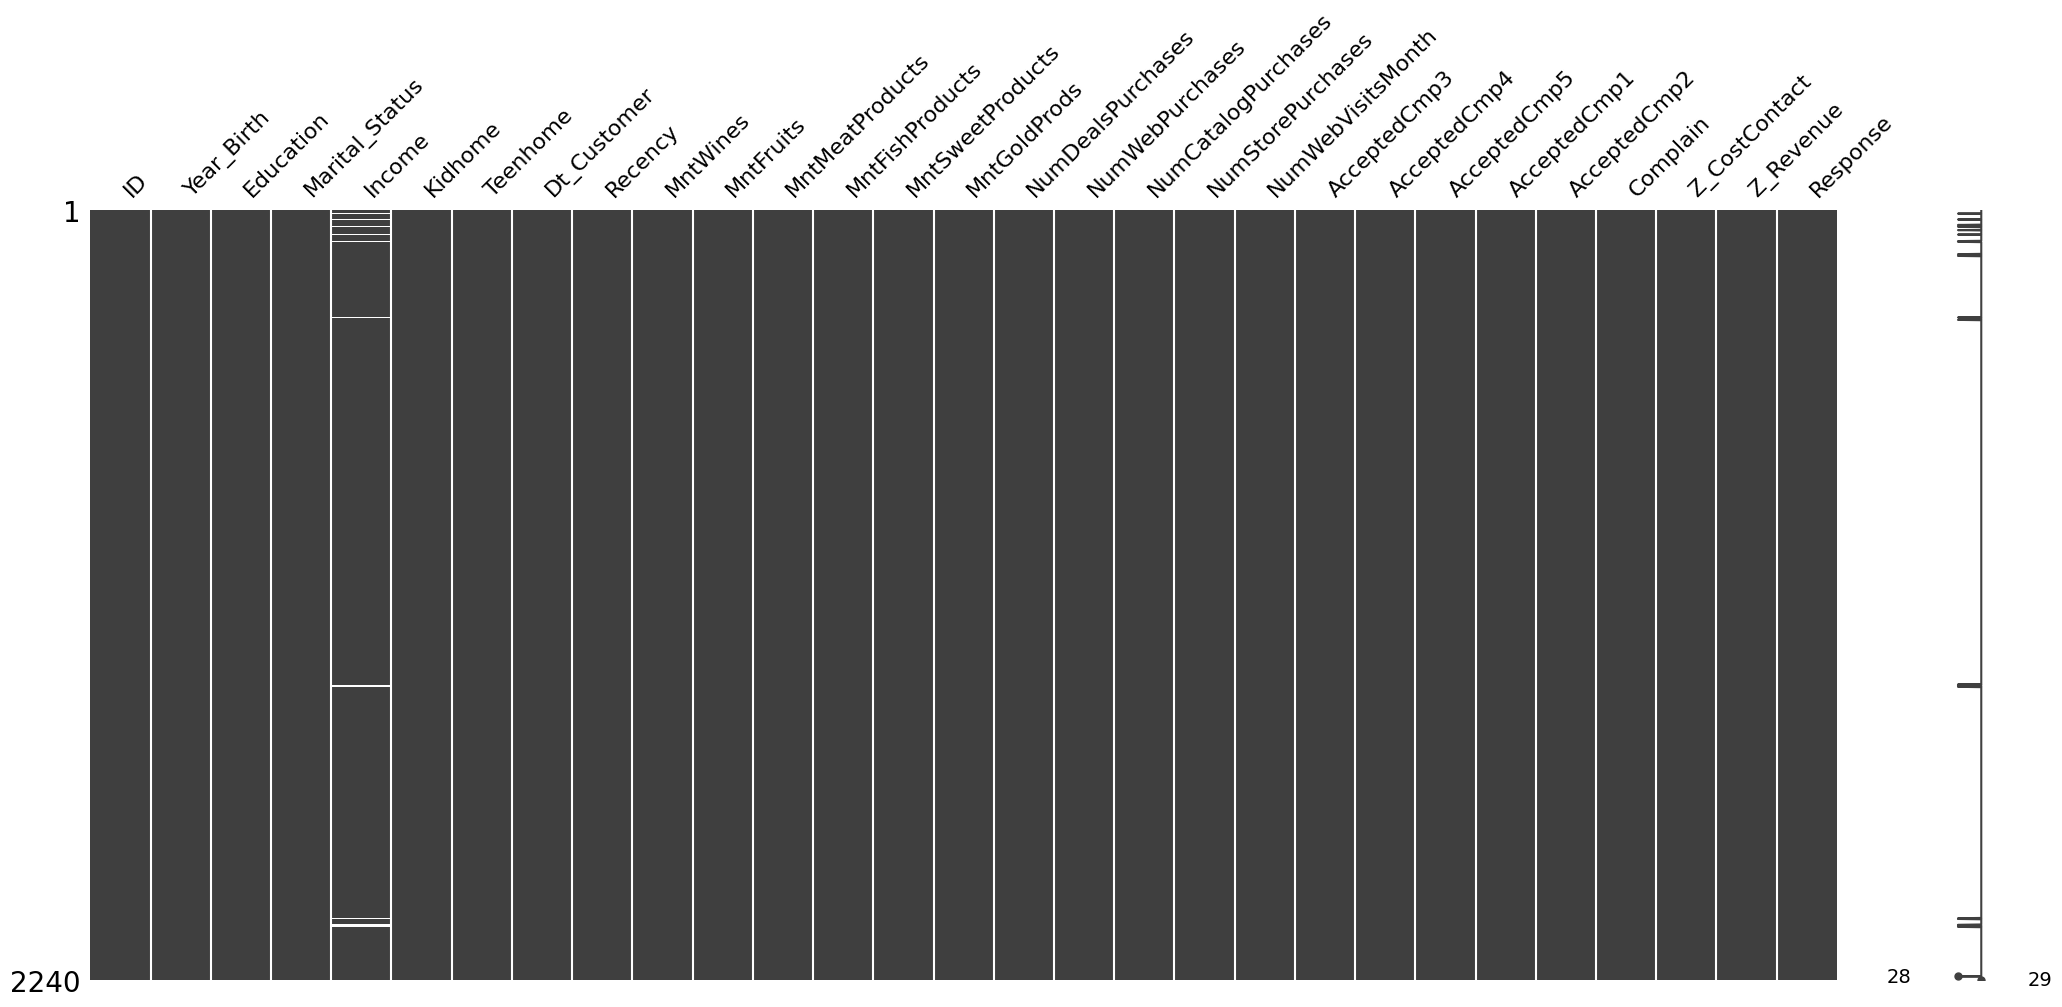

In [374]:
msno.matrix(data)

In [375]:
# View all rows with missing data
data[data.isna().any(axis=1)]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    15-11-2013       11         5          5                6   
27    20-02-2013       19         5          1                3   
43    05-11-2013       80        81         11               50   
48    01-01-2014       96        48          5               48   
58    17-06-2013       57        11          3               22   
71    14-09-2012       25        25          3               43   
90    19-11-2012        4       230         42              192   
91    27-05-2014       45         7          0                8   
92    23-11-2013       87       445         37              359   
128   11-07-2013       23       352          0               27   
133   11-08-2013       96       231         65              196   
312   03-06-2013       69       861        138              461   
319   23-08-2013       67       738         20              172   
1379  01-04-2013       39       187          5               65   
1382  03-09-2012       87        19          4               12   
1383  12-01-2014       49         5          1                9   
1386  02-03-2014       17        25          1               13   
2059  18-05-2013       52       375         42               48   
2061  31-05-2013       82        23          0               15   
2078  03-03-2013       82        71          1               16   
2079  23-06-2013       83       161          0               22   
2081  18-10-2013       95       264          0               21   
2084  30-10-2013       75       532        126              490   
2228  12-08-2012       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                  0                 2             1                  1   
27                  3               263           362                  0   
43                  3                 2            39                  1   
48 

### CONSIDERING MISSING DATA, CAN IT BE SAVED?

In [376]:
data[data['ID'] == 1994]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10  1994        1983  Graduation        Married     NaN        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10  15-11-2013       11         5          5                6   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                0                 2             1                  1   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
10                1                    0                  2   

    NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
10                  7             0             0             0             0   

    AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
10             0         0              3         11         0

### CONCLUSION MISSING DATA

Missing data was only found in the income column, with a total of 24 rows or equivalent to 1.07% of the 2240 rows of data. To handle this missing data, imputation will be carried out with a more accurate approach. This step involves grouping income by age range, education level, and marital status. Next, the missing values ​​will be filled using the median income value that matches the category. The following is a table showing the mean/median values ​​for each combination of age range and education level.

## SEARCHING FOR DUPLICATED DATA

In [377]:
data.duplicated().sum()

0

### DUPLICATED DATA CONCLUSION

After the inspection, no duplicate data was found in the data set. Therefore, this step can be considered complete, and the analysis will proceed to the next stage.

## EXPLORATORY DATA ANALYSIS (EDA) PART 1

### NUMERIC VARIABLES

Numeric variables are variables that have values ​​in the form of numbers and can be measured or calculated.

#### DESCRIPTIVE STATISTICS

In [378]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

##### SPECIAL DISCUSSION OF ID COLUMN

Customer ID value 0 checked

In [379]:
data[data['ID'] == 0]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
214   0        1985  Graduation        Married  70951.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
214  04-05-2013       66       239         10              554   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
214              254                87            54                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
214                3                    4                  9   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
214                  1             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
214             0             0         0              3         11         0

A check is performed to see whether the overall ID is relevant at the ID value == 0.

In [380]:
data[data['ID'] <= 10]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
214    0        1985  Graduation        Married  70951.0        0         0   
822    1        1961  Graduation         Single  57091.0        0         0   
1511   9        1975      Master         Single  46098.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
214   04-05-2013       66       239         10              554   
822   15-06-2014        0       464          5               64   
1511  18-08-2012       86        57          0               27   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
214               254                87            54                  1   
822                 7                 0            37                  1   
1511                0                 0            36                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
214                 3                    4                  9   
822                 7                    3                  7   
1511                3                    2                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
214                   1             0             0             0   
822                   5             0             0             0   
1511                  8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
214              0             0         0              3         11         0  
822              0             1         0              3         11         1  
1511             0             0         0              3         11         0

In [381]:
data[data['ID'] <= 100]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
153   92        1988  Graduation          Alone  34176.0        1         0   
214    0        1985  Graduation        Married  70951.0        0         0   
235   89        1975    2n Cycle        Married  22212.0        1         0   
491   22        1976  Graduation       Divorced  46310.0        1         0   
524   35        1987  Graduation        Married  25545.0        1         0   
660   55        1963  Graduation       Together  56253.0        0         1   
682   75        1982    2n Cycle       Together  41039.0        0         0   
768   20        1965    2n Cycle        Married  46891.0        0         1   
782   49        1970  Graduation         Single  20587.0        1         0   
822    1        1961  Graduation         Single  57091.0        0         0   
1037  67        1972      Master         Single  46423.0        1         1   
1474  25        1958  Graduation        Married  65148.0        0         1   
1511   9        1975      Master         Single  46098.0        1         1   
1543  73        1953         PhD         Single  51411.0        1         2   
1596  24        1960      Master       Together  17144.0        1         1   
1654  13        1947         PhD          Widow  25358.0        0         1   
1740  48        1964  Graduation       Together  55761.0        0         1   
1825  78        1969  Graduation        Married  25293.0        1         0   
1906  17        1971         PhD        Married  60491.0        0         1   
2116  87        1981    2n Cycle        Married  27733.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
153   12-05-2014       12         5          7               24   
214   04-05-2013       66       239         10              554   
235   09-12-2013       49         5          9               20   
491   03-12-2012       99       185          2               88   
524   08-09-2012       35        32          1               64   
660   07-12-2012       83       509          0               65   
682   25-07-2013       32        34         11              137   
768   01-09-2013       91        43         12               23   
782   11-05-2014       39         2          3                6   
822   15-06-2014        0       464          5               64   
1037  18-09-2013        6        68          0               16   
1474  16-11-2012        9       460         35              422   
1511  18-08-2012       86        57          0               27   
1543  26-05-2013       81        14          0                3   
1596  15-02-2014       96        18          2               19   
1654  22-07-2013       57        19          0                5   
1740  24-04-2014       97       136          1               12   
1825  15-09-2013       51        15          0               11   
1906  06-09-2013       81       637         47              237   
2116  26-08-2013       16         0          7                5   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
153                19                14            20                  4   
214               254                87            54                  1   
235                 6                 8            21                  2   
491                15                 5            14                  2   
524                16                12            85                  3   
660                 7                11             5                  4   
682               179                61            45                  1   
768                29                15            61                  1   
782                 4                 1             9                  1   
822                 7                 0            37                  1   
1037                0                 0             8                  3   
1474               33     

In [382]:
data[data['ID'] <= 1000]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
6     965        1971  Graduation       Divorced  55635.0        0         1   
11    387        1976       Basic        Married   7500.0        0         0   
41    503        1985      Master        Married  20559.0        1         0   
84    535        1987  Graduation       Divorced  81361.0        0         0   
86    273        1970      Master        Married  36138.0        1         1   
...   ...         ...         ...            ...      ...      ...       ...   
2162  977        1957  Graduation       Together  47320.0        0         1   
2177  492        1973         PhD           YOLO  48432.0        0         1   
2210  607        1955    2n Cycle       Divorced  41769.0        0         1   
2215  692        1954  Graduation       Together  36807.0        1         1   
2216  736        1983  Graduation       Together  28427.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
6     13-11-2012       34       235         65              164   
11    13-11-2012       59         6         16               11   
41    12-03-2013       88        13          1               29   
84    25-02-2014       18       163         23              424   
86    16-07-2013       48       130          0               16   
...          ...      ...       ...        ...              ...   
2162  01-08-2013       10       200         19              111   
2177  18-10-2012        3       322          3               50   
2210  13-02-2013       31       302         29              131   
2215  20-12-2012       88         4          2                5   
2216  21-03-2013       67        18          3               19   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
6                  50                49            27                  4   
11                 11                 1            16                  1   
41                  3                 0             7                  2   
84                 27                65            76                  1   
86                  0                 0             5                  5   
...               ...               ...           ...                ...   
2162               50                15            19                  6   
2177                4                 3            42                  5   
2210               32                 0            27                  6   
2215                0                 0             5                  1   
2216                3                 3             6                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
6                   7                    3                  7   
11                  2                    0                  3   
41                  2                    0                  3   
84                  3                   10                 13   
86                  3                    1                  4   
...               ...                  ...                ...   
2162                5                    1                  8   
2177                7                    1                  6   
2210                8                    1                  7   
2215                1                    0                  2   
2216                2                    0                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
6                     6             0             0             0   
11                    8             0             0             0   
41                    8             0             0             0   
84                    1             0             0             0   
86                    7             0             1             0   
...                 ...           ...           ...           ...   
2162                  6             0             0             

###### ID COLUMN CONCLUSION

Customer IDs that start at 0 and go up to thousands can be relevant, depending on the context and purpose of their use. Here are some factors to consider:

1. Uniqueness of ID: Customer IDs that start at 0 and go up will provide uniqueness for each customer, which makes them relevant in the database system to distinguish each entity (customer).

2. Order and Consistency: Using sequential IDs from 0 to thousands makes it easier to manage and sort data, but it must be ensured that there is no duplication of customer IDs in the system.

3. Scalability: If customers grow rapidly, a system that uses sequential IDs is still relevant as long as the system can handle the increasing amount of data.

4. Security and Privacy: IDs that are too predictable (e.g. 0, 1, 2, 3...) may be risky in some contexts, because outsiders can guess other customer IDs. However, this is not a big issue if the IDs are only used for internal purposes.

5. Use in Applications: If customer IDs are only used for internal references and are not used in URLs or as sensitive information, then such sequential IDs are still relevant. However, if used for more sensitive or public purposes, it may be better to use a more random ID or one with a prefix.

**In general, customer IDs starting at 0 and increasing to thousands remain relevant as long as the system can properly manage and use them as needed.**

##### SPECIAL DISCUSSION OF THE PURCHASE COLUMN (NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases) REGARDING THE PURCHASE OF GOODS

In descriptive statistics, the purchase column (NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases) has a value of 0, this must be verified against the purchased goods, if there are no purchases but the purchased goods have the number/value of the purchased goods, then it is indicated that the data is illogical.

In [383]:
# Verify the purchase column with the purchased item
datapembelianverif = data[(data['NumDealsPurchases']==0) & (data['NumWebPurchases']==0) & (data['NumCatalogPurchases']==0) & (data['NumStorePurchases']==0)]
datapembelianverif

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
655    5555        1975  Graduation       Divorced  153924.0        0   
981    3955        1965  Graduation       Divorced    4861.0        0   
1524  11110        1973  Graduation         Single    3502.0        1   
2132  11181        1949         PhD        Married  156924.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
655          0  07-02-2014       81         1          1                1   
981          0  22-06-2014       20         2          1                1   
1524         0  13-04-2013       56         2          1                1   
2132         0  29-08-2013       85         2          1                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
655                 1                 1             1                  0   
981                 1                 0             1                  0   
1524                0                 0             1                  0   
2132                1                 1             1                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
655                 0                    0                  0   
981                 0                    0                  0   
1524                0                    0                  0   
2132                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
655                   0             0             0             0   
981                  14             0             0             0   
1524                 14             0             0             0   
2132                  0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
655              0             0         0              3         11         0  
981              0             0         0              3         11         0  
1524             0             0         0              3         11         0  
2132             0             0         0              3         11         0

In [384]:
# Checking whether all purchase columns with a value of 0 can still be saved
data[data['ID'].isin([5555, 3955, 11110, 11181])]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
655    5555        1975  Graduation       Divorced  153924.0        0   
981    3955        1965  Graduation       Divorced    4861.0        0   
1524  11110        1973  Graduation         Single    3502.0        1   
2132  11181        1949         PhD        Married  156924.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
655          0  07-02-2014       81         1          1                1   
981          0  22-06-2014       20         2          1                1   
1524         0  13-04-2013       56         2          1                1   
2132         0  29-08-2013       85         2          1                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
655                 1                 1             1                  0   
981                 1                 0             1                  0   
1524                0                 0             1                  0   
2132                1                 1             1                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
655                 0                    0                  0   
981                 0                    0                  0   
1524                0                    0                  0   
2132                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
655                   0             0             0             0   
981                  14             0             0             0   
1524                 14             0             0             0   
2132                  0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
655              0             0         0              3         11         0  
981              0             0         0              3         11         0  
1524             0             0         0              3         11         0  
2132             0             0         0              3         11         0

###### CONCLUSION OF THE PURCHASE COLUMN REGARDING THE PURCHASE OF GOODS

There are 4 customers who have a purchase column (NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases) with a value of 0, the items purchased have a quantity/value of items purchased (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds), then the data is indicated as illogical. The data does not have the same ID (the purchase column is filled in), so the data can be deleted for smooth further analysis.

##### DESCRIPTIVE STATISTICS CONCLUSION

Here is the summary of each column in the given data:

1. **ID:** There are 2240 entries with a unique ID for each employee, the minimum ID value is 0 and the maximum ID is 11191. There are no missing values.

2. **Year_Birth:** The birth year of employees ranges from 1893 to 1996. The average age of employees is around 1968.8, with most employees born between 1959 and 1977.

3. **Income:** The income of employees ranges from 1730 to 666666. The average income is around 52247.25, but there is a very large variation with a standard deviation of 25173.07.

4. **Kidhome:** The number of young children owned by customers is on average 0.44, with the majority of customers having no young children. This column has a minimum value of 0 and a maximum value of 2.

5. **Teenhome:** The average number of teenage children owned by customers is 0.51, with most customers not having teenage children. The minimum value is 0 and the maximum value is 2.

6. **Recency:** The average recency value is 49.11, indicating how recent the interaction with the employee was. This column records interactions on a scale of 0 to 99. Note the customer's first sign-up date and the Recency, whether there is a Recency that is greater than the customer's first sign-up date.

7. **MntWines:** The average number of Wines purchased by customers is 303.94, with a spending range of 0 to 1493. The fairly large standard deviation indicates high variation.

8. **MntFruits:** The average number of Fruits customers purchased was 26.30, with a minimum value of 0 and a maximum of 199.

9. **MntMeatProducts:** The average number of Meat customers purchased was 166.95, with a spending range of 0 to 1725.

10. **MntFishProducts:** The average number of Meat Products customers purchased was 37.53, with a minimum value of 0 and a maximum of 259.

11. **MntSweetProducts:** The average number of Sweet Products customers purchased was 27.06, with a spending range of 0 to 263.

12. **MntGoldProds:** The average number of Gold Products customers purchased was 44.02, with a minimum value of 0 and a maximum of 362.

13. **NumDealsPurchases:** The average number of discounted purchases was 2.33, with a standard deviation of 1.93. The maximum recorded value is 15.

14. **NumWebPurchases:** The average number of web purchases was 4.08, with a maximum value of 27.

15. **NumCatalogPurchases:** The average number of catalog purchases was 2.66, with a maximum value of 28.

16. **NumStorePurchases:** The average number of in-store purchases was 5.79, with a maximum value of 13.

17. **NumWebVisitsMonth:** The average number of web visits per month was 5.32, with a maximum value of 20.

18. **AcceptedCmp3:** The average participation in campaign 3 was 0.07, with most customers not participating.

19. **AcceptedCmp4:** The average participation in campaign 4 was 0.07, similar to campaign 3.

20. **AcceptedCmp5:** The average participation in campaign 5 was 0.07, with many customers not responding.

21. **AcceptedCmp1:** The average participation in campaign 1 was 0.06, indicating that most customers did not participate.

22. **AcceptedCmp2:** The average participation in campaign 2 was 0.06, with most customers not participating.

23. **Complain:** The average number of complaints received was 0.01, indicating that most customers did not complain.

24. **Z_CostContact:** The company's average contact cost per customer was 3.0, with no variation (fixed value).

25. **Z_Revenue:** The company's average revenue per customer is 11.0, with no variation (fixed value).

26. **Response:** The average response to the campaign is 0.15, with most customers not responding to the campaign.

#### HISTOGRAM GRAPH

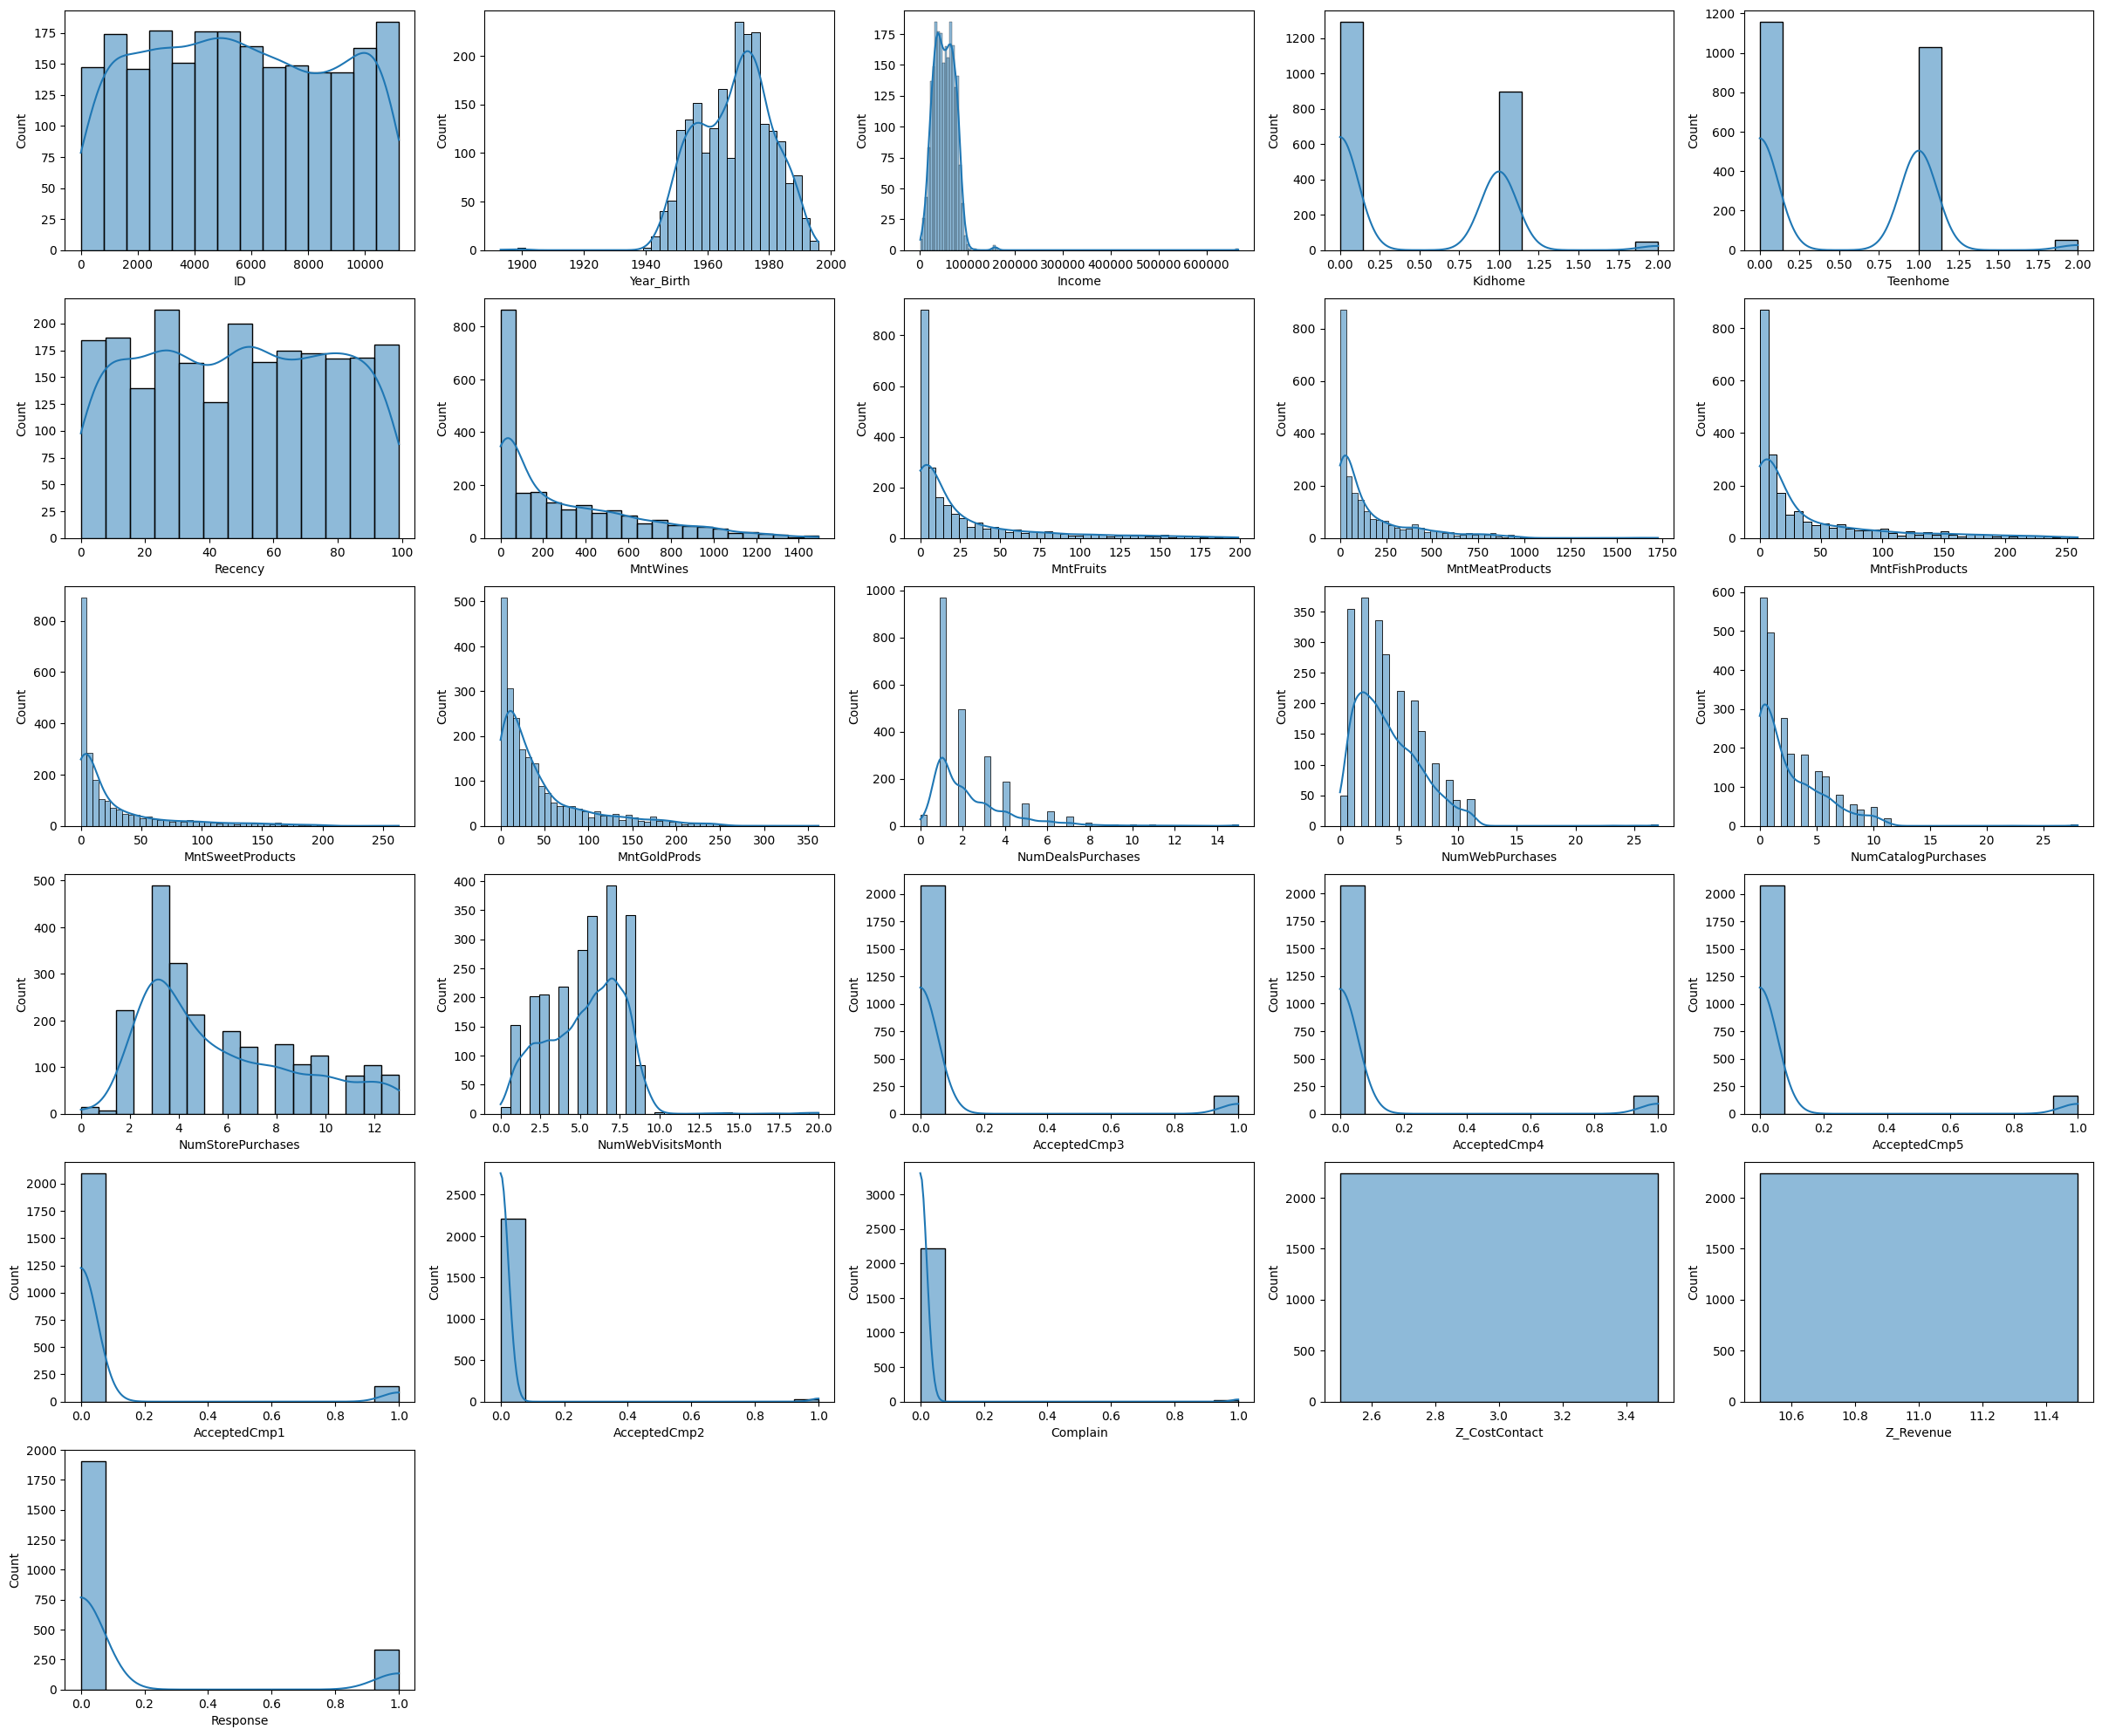

In [385]:
# get numeric columns
numerik = data.select_dtypes(include = 'number') # float and int

plt.figure(figsize = (30,25)) # (column, row)
posisi = 1
for kolom in numerik.columns:
    plt.subplot(6, 5, posisi) # (row, column, position)
    sns.histplot(data[kolom], kde = True)
    posisi += 1

# print graph
plt.show()

#### STATISTICAL TEST

- Because NaN data or Missing Data cannot be run in Statistical Tests, Missing Data is temporarily deleted.

In [386]:
# copy our data
df_copy= data.copy()

# then drop missing values
df_copy = df_copy.dropna()

In [387]:
# Fetch only numeric columns
numeric_columns = df_copy.select_dtypes(include=[np.number]).columns

- I chose to use a variety of statistical test methods to test the normality of the data to get a more complete picture. Each statistical test, such as Shapiro-Wilk, Anderson-Darling, and Kolmogorov-Smirnov, has its own advantages and disadvantages, depending on the characteristics of the sample and the purpose of the analysis. By combining these methods, I can ensure that the normality test results are more robust and reduce the potential for errors in interpretation. This approach provides higher accuracy in choosing the right statistical model or transformation technique for further analysis.

In [388]:
# Function to test normality
def normality_tests(data):
    results = {}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p_value)

    # Liliefors Test
    lilliefors_stat, lilliefors_p_value = lilliefors(data)
    results['Liliefors Test'] = (lilliefors_stat, lilliefors_p_value)

    # Shapiro-Wilk Test
    sw_stat, sw_p_value = stats.shapiro(data)
    results['Shapiro-Wilk'] = (sw_stat, sw_p_value)

    # D'Agostino and Pearson's Test
    dagostino_stat, dagostino_p_value = stats.normaltest(data)
    results['D\'Agostino Pearson'] = (dagostino_stat, dagostino_p_value)

    return results

# Function to determine normality based on p-value
def check_normality(p_value):
    if p_value > 0.05:
        return "Normal"
    else:
        return "Not Normal"

# Loop to test each numeric column
for column in numeric_columns:
    print(f"RESULTS FOR {column}:")
    results = normality_tests(df_copy[column])  # Removing missing values
    for test, (stat, p_value) in results.items():
        normality_status = check_normality(p_value)
        print(f"{test} - Statistic: {stat:.4f}, p-value: {p_value:.4f} -> {normality_status}")
    print("\n")

RESULTS FOR ID:
Kolmogorov-Smirnov - Statistic: 0.9991, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0605, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9540, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 1647.0525, p-value: 0.0000 -> Not Normal


RESULTS FOR Year_Birth:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0591, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9755, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 72.1689, p-value: 0.0000 -> Not Normal


RESULTS FOR Income:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0542, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.7771, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 2943.3736, p-value: 0.0000 -> Not Normal


RESULTS FOR Kidhome:
Kolmogorov-Smirnov - Statistic: 0.5000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/_lilliefors.py:279: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: Input data has range zero. The results may not be accurate.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1580: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1776: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



#### OUTLIERS

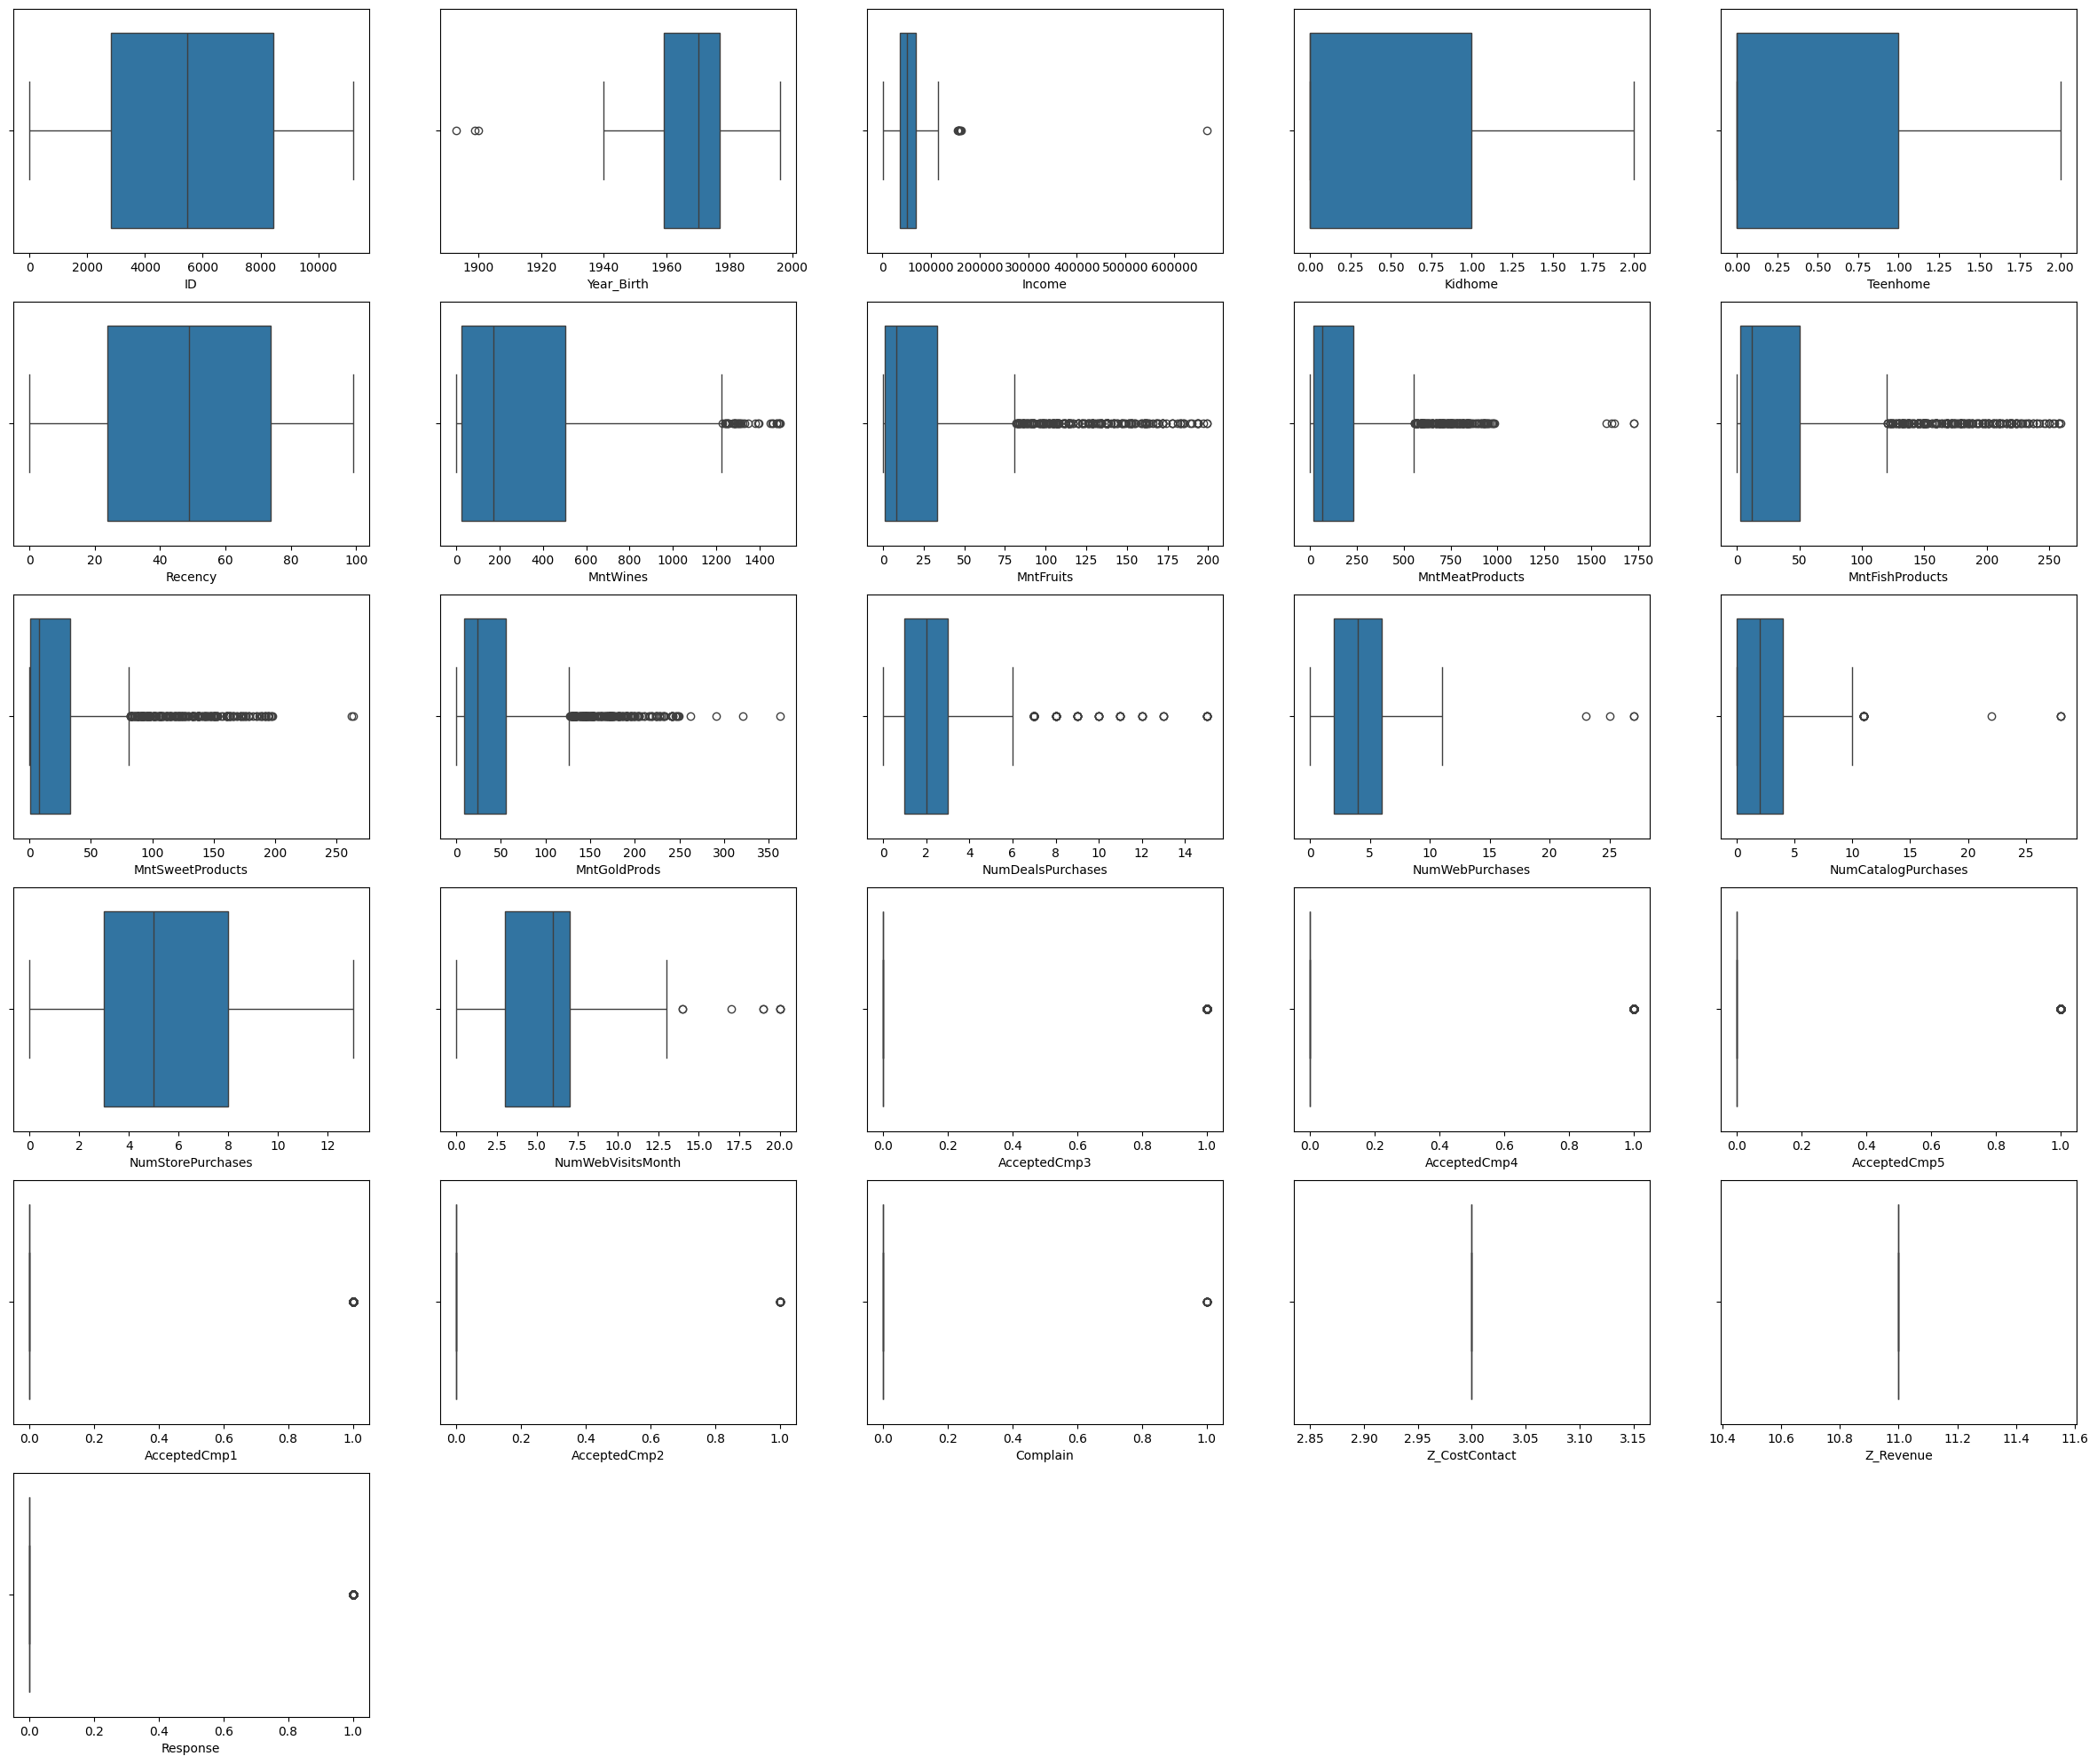

In [389]:
# Select numeric columns
numeric_columns = data.select_dtypes(include='number')  # Includes float and int

plt.figure(figsize=(30, 25))  # (width, height)
position = 1
for column in numeric_columns.columns:
    plt.subplot(6, 5, position)  # (rows, columns, position)
    sns.boxplot(x=data[column])
    position += 1

# Display the plots
plt.show()

##### IQR

In [390]:
# Select numeric columns only
numeric_columns = data.select_dtypes(include='number')
list_outliers_count = []

for column in numeric_columns.columns:
    q3 = numeric_columns.describe().loc['75%', column]
    q1 = numeric_columns.describe().loc['25%', column]
    iqr = q3 - q1
    whisker = 1.5 * iqr
    upper_bound = q3 + whisker
    lower_bound = q1 - whisker

    # Count of outliers
    outliers_count = len(data[(data[column] > upper_bound) | (data[column] < lower_bound)])
    list_outliers_count.append(outliers_count)

outliers_data = pd.DataFrame({
    'Column': numeric_columns.columns,
    'Outliers Count': list_outliers_count
})

In [391]:
# Sort by 'Outliers Count' in descending order
outliers_data_sorted = outliers_data.sort_values(by='Outliers Count', ascending=False)
outliers_data_sorted

Column  Outliers Count
25             Response             334
10     MntSweetProducts             248
7             MntFruits             227
9       MntFishProducts             223
11         MntGoldProds             207
8       MntMeatProducts             175
18         AcceptedCmp4             167
17         AcceptedCmp3             163
19         AcceptedCmp5             163
20         AcceptedCmp1             144
12    NumDealsPurchases              86
6              MntWines              35
21         AcceptedCmp2              30
14  NumCatalogPurchases              23
22             Complain              21
2                Income               8
16    NumWebVisitsMonth               8
13      NumWebPurchases               4
1            Year_Birth               3
15    NumStorePurchases               0
5               Recency               0
4              Teenhome               0
3               Kidhome               0
23        Z_CostContact               0
24            Z_Revenue               0
0                    ID               0

##### OUTLIERS IN Response

Outliers in Response as many as 334

In [392]:
data[data['Response'] == 1]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
8      4855        1974         PhD       Together  30351.0        1   
15     2114        1946         PhD         Single  82800.0        0   
33     7373        1952         PhD       Divorced  46610.0        0   
39     2968        1943         PhD       Divorced  48948.0        0   
...     ...         ...         ...            ...      ...      ...   
2194   7118        1957  Graduation        Married  73803.0        0   
2198   2632        1954  Graduation        Married  50501.0        1   
2202  11133        1973         PhD           YOLO  48432.0        0   
2221   7366        1982      Master         Single  75777.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
8            0  06-06-2013       19        14          0               24   
15           0  24-11-2012       23      1006         22              115   
33           2  29-10-2012        8        96         12               96   
39           0  01-02-2013       53       437          8              206   
...        ...         ...      ...       ...        ...              ...   
2194         1  01-08-2012       61       833         80              363   
2198         1  18-06-2013       10       297          0               38   
2202         1  18-10-2012        3       322          3               50   
2221         0  04-07-2013       12       712         26              538   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
8                   3                 3             2                  1   
15                 59                68            45                  1   
33                 33                22            43                  6   
39                160                49            42                  2   
...               ...               ...           ...                ...   
2194               52                26           174                  2   
2198               13                 0           152                  7   
2202                4                 3            42                  5   
2221               69                13            80                  1   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
8                   3                    0                  2   
15                  7                    6                 12   
33                  4                    1                  6   
39                  7                   10                  5   
...               ...                  ...                ...   
2194                9                    5                  6   
2198                5                    4                  4   
2202                7                    1                  6   
2221                3                    6                 11   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
8                     9             0             0             0   
15                    3             0             0             1   
33                    6             0             0             0   
39                    6             1             0             0   
...                 ...           ...           ...           ...   
2194                  6             1     

###### CONCLUSION OUTLIERS ON Response

The data I analyzed has a Response variable with values ​​1 and 0. However, the data distribution shows that the value 0 has a much higher frequency compared to the value 1, so the value 1 can be considered an outlier based on its distribution characteristics.

Nevertheless, the value 1 is maintained in the analysis because it is still logically and contextually relevant to the research objectives.

##### OUTLIERS ON MntSweetProducts

Outliers in MntSweetProducts are 248

In [393]:
data[data['MntSweetProducts'] >= 82]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
12     2125        1959  Graduation       Divorced  63033.0        0   
27     5255        1986  Graduation         Single      NaN        1   
40     8601        1980  Graduation        Married  80011.0        0   
51     4114        1964      Master        Married  79143.0        0   
...     ...         ...         ...            ...      ...      ...   
2175   1772        1975         PhD        Married  79174.0        0   
2190   4418        1983      Master         Single  89616.0        0   
2193   8722        1957    2n Cycle        Married  82347.0        0   
2217   9589        1948         PhD          Widow  82032.0        0   
2235  10870        1967  Graduation        Married  61223.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
12           0  15-11-2013       82       194         61              480   
27           0  20-02-2013       19         5          1                3   
40           1  29-04-2013        3       421         76              536   
51           0  11-08-2012        2       650         37              780   
...        ...         ...      ...       ...        ...              ...   
2175         0  11-01-2013        2      1074         37              518   
2190         0  25-02-2013       36       671         47              655   
2193         0  06-11-2012       38       556         54              845   
2217         0  05-04-2014       54       332        194              377   
2235         1  13-06-2013       46       709         43              182   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
12                225               112            30                  1   
27                  3               263           362                  0   
40                 82               178           102                  2   
51                 27               167            32                  1   
...               ...               ...           ...                ...   
2175              193                92           129                  1   
2190              145               111            15                  1   
2193              202               133            63                  1   
2217              149               125            57                  0   
2235               42               118           247                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
12                  3                    4                  8   
27                 27                    0                  0   
40                  8                    6                  5   
51                  6                    9                 13   
...               ...                  ...                ...   
2175                5                    6                  7   
2190                7                    5                 12   
2193                7                    7                 10   
2217                4                    6                  7   
2235                9                    3                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
12                    2             0             0             0   
27                    1             0             0             0   
40                    4             0             0             0   
51                    3             0             0             0   
...                 ...           ...           ...           ...   
2175                  2             0     

Search above 250

In [394]:
data[data['MntSweetProducts'] >= 250]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
27    5255        1986  Graduation         Single       NaN        1   
1898  4619        1945         PhD         Single  113734.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
27           0  20-02-2013       19         5          1                3   
1898         0  28-05-2014        9         6          2                3   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
27                  3               263           362                  0   
1898                1               262             3                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
27                 27                    0                  0   
1898               27                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
27                    1             0             0             0   
1898                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
27               0             0         0              3         11         0  
1898             0             0         0              3         11         0

###### OUTLIERS CONCLUSION ON MntSweetProducts

There are outliers in MntSweetProducts above 82 for 2 years, outliers in MntSweetProducts are not deleted because the data is still accepted (logical) for further processing.

##### OUTLIERS ON MntFruits

Outliers in MntFruits are 227

In [395]:
data[data['MntFruits'] >= 82]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0     5524        1957  Graduation         Single  58138.0        0         0   
29    1966        1965         PhD        Married  84618.0        0         0   
45    1371        1976  Graduation         Single  79941.0        0         0   
53    2225        1977  Graduation       Divorced  82582.0        0         0   
72    6312        1959  Graduation        Married  65031.0        0         1   
...    ...         ...         ...            ...      ...      ...       ...   
2172  4084        1975  Graduation       Together  60934.0        0         1   
2185  9723        1960  Graduation        Married  67716.0        0         1   
2203  2736        1978  Graduation        Married  73807.0        0         1   
2206  1092        1980  Graduation        Married  61014.0        0         1   
2217  9589        1948         PhD          Widow  82032.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0     04-09-2012       58       635         88              546   
29    22-11-2013       96       684        100              801   
45    28-06-2014       72       123        164              266   
53    07-06-2014       54       510        120              550   
72    17-03-2013       29       258        107              291   
...          ...      ...       ...        ...              ...   
2172  17-01-2014       41       224        155              155   
2185  10-01-2013        8       530        142              217   
2203  02-01-2013       88       366        124              156   
2206  11-08-2012       17       269        129              495   
2217  05-04-2014       54       332        194              377   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
29                 21                66             0                  1   
45                227                30           174                  1   
53                156                40           241                  1   
72                 84                37            86                  4   
...               ...               ...           ...                ...   
2172              192                93            54                  2   
2185               62                 9            56                  4   
2203               71                78            54                  2   
2206              182                43            29                  4   
2217              149               125            57                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
29                  6                    9                 10   
45                  2                    4                  9   
53                  4                    9                  7   
72                 10                    3                 13   
...               ...                  ...                ...   
2172                6                    4                 11   
2185                7                    4                 13   
2203                5                    5                 11   
2206                9                    3                  4   
2217                4                    6                  7   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
29                    2             0             0             1   
45                    1             0             0             0   
53                    1             1             0             0   
72                    7             0             0             0   
...                 ...           ...           ...           ...   
2172                  4             0             0  

In [396]:
data[data['MntFruits'] >= 180]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
109   10991        1960      Master        Married   89058.0        0   
198    6422        1954  Graduation        Married   86718.0        0   
288   10102        1966  Graduation          Widow   79946.0        0   
447    1137        1964  Graduation         Single   81246.0        0   
591    7627        1975      Master        Married   92163.0        0   
646    4611        1970  Graduation       Together  105471.0        0   
855    1456        1979  Graduation         Single   60474.0        0   
1280   3698        1983  Graduation       Together   78687.0        0   
1480   2849        1979  Graduation         Single   60474.0        0   
1508   3967        1971         PhD        Married   78931.0        0   
1526    202        1948         PhD          Widow   82032.0        0   
1552   8091        1956  Graduation        Married   63943.0        0   
1612   9242        1990  Graduation         Single   64509.0        0   
1910   5832        1960    2n Cycle       Together   92556.0        0   
1921   3283        1972    2n Cycle        Married   70932.0        0   
1946  10676        1982  Graduation        Married   63211.0        0   
2217   9589        1948         PhD          Widow   82032.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
109          0  07-12-2012       18       454        194              106   
198          0  17-01-2013       20       344        189              482   
288          0  12-05-2014       19       395        183              565   
447          0  29-12-2013       87       398        190              537   
591          0  12-12-2012       25       817        183              797   
646          0  21-01-2013       36      1009        181              104   
855          1  01-04-2013       25       265        199              303   
1280         0  09-08-2012       13       817        185              687   
1480         1  01-04-2013       25       265        199              303   
1508         0  25-10-2013       19       331        197              170   
1526         0  05-04-2014       54       332        194              377   
1552         1  02-09-2012       50       423        184              368   
1612         0  17-08-2013       19       836        185              575   
1910         0  20-04-2014       32       493        183              352   
1921         1  19-01-2014       57       200        193              100   
1946         0  02-11-2012        3       145        193              459   
2217         0  05-04-2014       54       332        194              377   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
109                31                22            43                  1   
198                50                33           172                  1   
288               166               141            28                  1   
447                61               156            37                  1   
591               106               163            20                  0   
646               202                21           207                  0   
855               234                 9           170                  7   
1280              145                55           241                  1   
1480              234                 9           170                  7   
1508               58               152            35                  1   
1526              149               125            57                  0   
1552               13                97            21                  1   
1612               24                25            77                  1   
1910              184                23            28                  0   
1921               46               185           185                  2   
1946              205                26           145                  2   
2217           

###### OUTLIERS CONCLUSION ON MntFruits

There are outliers in MntSweetProducts above 82 for 2 years, outliers in MntFruits are not deleted because the data is still accepted (logical) for further processing.

##### OUTLIERS ON MntFishProducts

Outliers in MntFishProducts are 223

In [397]:
data[data['MntFishProducts'] >= 121]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
12     2125        1959  Graduation       Divorced  63033.0        0   
17     4939        1946  Graduation       Together  37760.0        0   
39     2968        1943         PhD       Divorced  48948.0        0   
45     1371        1976  Graduation         Single  79941.0        0   
...     ...         ...         ...            ...      ...      ...   
2188  10652        1957      Master       Together  65487.0        0   
2190   4418        1983      Master         Single  89616.0        0   
2193   8722        1957    2n Cycle        Married  82347.0        0   
2206   1092        1980  Graduation        Married  61014.0        0   
2217   9589        1948         PhD          Widow  82032.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
12           0  15-11-2013       82       194         61              480   
17           0  31-08-2012       20        84          5               38   
39           0  01-02-2013       53       437          8              206   
45           0  28-06-2014       72       123        164              266   
...        ...         ...      ...       ...        ...              ...   
2188         0  10-01-2014       48       240         67              500   
2190         0  25-02-2013       36       671         47              655   
2193         0  06-11-2012       38       556         54              845   
2206         1  11-08-2012       17       269        129              495   
2217         0  05-04-2014       54       332        194              377   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
12                225               112            30                  1   
17                150                12            28                  2   
39                160                49            42                  2   
45                227                30           174                  1   
...               ...               ...           ...                ...   
2188              199                 0           163                  3   
2190              145               111            15                  1   
2193              202               133            63                  1   
2206              182                43            29                  4   
2217              149               125            57                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
12                  3                    4                  8   
17                  4                    1                  6   
39                  7                   10                  5   
45                  2                    4                  9   
...               ...                  ...                ...   
2188                3                    5                  6   
2190                7                    5                 12   
2193                7                    7                 10   
2206                9                    3                  4   
2217                4                    6                  7   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
12                    2             0             0             0   
17                    7             0             0             0   
39                    6             1             0             0   
45                    1             0             0             0   
...                 ...           ...           ...           ...   
2188                  2             0     

###### CONCLUSION OF OUTLIERS ON MntFishProducts

There are outliers in MntFishProducts above 121 for 2 years, outliers in MntFishProducts are not deleted because the data is still accepted (logical) for further processing.

##### OUTLIERS ON MntGoldProds

Outliers on MntGoldProds are 207

In [398]:
data[data['MntGoldProds'] >= 127]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
18     6565        1949      Master        Married  76995.0        0   
27     5255        1986  Graduation         Single      NaN        1   
45     1371        1976  Graduation         Single  79941.0        0   
53     2225        1977  Graduation       Divorced  82582.0        0   
55     6260        1955      Master       Together  82384.0        0   
...     ...         ...         ...            ...      ...      ...   
2178   4377        1971  Graduation        Married  52914.0        0   
2188  10652        1957      Master       Together  65487.0        0   
2194   7118        1957  Graduation        Married  73803.0        0   
2198   2632        1954  Graduation        Married  50501.0        1   
2235  10870        1967  Graduation        Married  61223.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
18           1  28-03-2013       91      1012         80              498   
27           0  20-02-2013       19         5          1                3   
45           0  28-06-2014       72       123        164              266   
53           0  07-06-2014       54       510        120              550   
55           0  19-11-2012       55       984         51              432   
...        ...         ...      ...       ...        ...              ...   
2178         1  07-01-2013       32       254         10               44   
2188         0  10-01-2014       48       240         67              500   
2194         1  01-08-2012       61       833         80              363   
2198         1  18-06-2013       10       297          0               38   
2235         1  13-06-2013       46       709         43              182   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
18                  0                16           176                  2   
27                  3               263           362                  0   
45                227                30           174                  1   
53                156                40           241                  1   
55                180               120           190                  1   
...               ...               ...           ...                ...   
2178               30                10           227                  2   
2188              199                 0           163                  3   
2194               52                26           174                  2   
2198               13                 0           152                  7   
2235               42               118           247                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
18                 11                    4                  9   
27                 27                    0                  0   
45                  2                    4                  9   
53                  4                    9                  7   
55                  3                   10                 13   
...               ...                  ...                ...   
2178                7                    3                  3   
2188                3                    5                  6   
2194                9                    5                  6   
2198                5                    4                  4   
2235                9                    3                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
18                    5             0             0             0   
27                    1             0             0             0   
45                    1             0             0             0   
53                    1             1             0             0   
55                    1             0             0             1   
...                 ...           ...           ...           ...   
2178                  7             1     

In [399]:
data[data['MntGoldProds'] >= 250]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
27     5255        1986  Graduation         Single     NaN        1         0   
1328   4246        1982      Master         Single  6560.0        0         0   
1806   6237        1966         PhD         Single  7144.0        0         2   
1975  10311        1969  Graduation        Married  4428.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
27    20-02-2013       19         5          1                3   
1328  12-12-2013        2        67         11               26   
1806  07-12-2013       92        81          4               33   
1975  05-10-2013        0        16          4               12   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
27                  3               263           362                  0   
1328                4                 3           262                  0   
1806                5                 2           291                  0   
1975                2                 4           321                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
27                 27                    0                  0   
1328                1                    0                  1   
1806               23                    1                  1   
1975               25                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
27                    1             0             0             0   
1328                 17             0             0             0   
1806                  0             0             0             0   
1975                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
27               0             0         0              3         11         0  
1328             0             0         0              3         11         0  
1806             0             0         0              3         11         0  
1975             0             0         0              3         11         0

###### OUTLIERS CONCLUSION ON MntGoldProds

There are outliers in MntFishProducts above 127 for 2 years, outliers in MntFishProducts are not deleted because the data is still accepted (logical) for further processing.

##### OUTLIERS ON MntMeatProducts

Outliers in MntMeatProducts are 175

In [400]:
data[data['MntMeatProducts'] >= 558]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
21     5376        1979  Graduation        Married   2447.0        1   
29     1966        1965         PhD        Married  84618.0        0   
51     4114        1964      Master        Married  79143.0        0   
76     1859        1972      Master        Married  75251.0        0   
77     7503        1976  Graduation         Single  75825.0        0   
...     ...         ...         ...            ...      ...      ...   
2190   4418        1983      Master         Single  89616.0        0   
2193   8722        1957    2n Cycle        Married  82347.0        0   
2211  10469        1981  Graduation       Together  88325.0        0   
2213   3661        1995    2n Cycle         Single  80617.0        0   
2228   8720        1978    2n Cycle       Together      NaN        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
21           0  06-01-2013       42         1          1             1725   
29           0  22-11-2013       96       684        100              801   
51           0  11-08-2012        2       650         37              780   
76           0  27-08-2012       34       721        111              925   
77           0  12-10-2012       40      1032        105              779   
...        ...         ...      ...       ...        ...              ...   
2190         0  25-02-2013       36       671         47              655   
2193         0  06-11-2012       38       556         54              845   
2211         0  05-02-2014       42       519         71              860   
2213         0  12-10-2012       42       594         51              631   
2228         0  12-08-2012       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
21                  1                 1             1                 15   
29                 21                66             0                  1   
51                 27               167            32                  1   
76                 97                18            18                  1   
77                137               105            51                  0   
...               ...               ...           ...                ...   
2190              145               111            15                  1   
2193              202               133            63                  1   
2211               93                27            53                  1   
2213               72                55            32                  1   
2228               12                 4            22                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
21                  0                   28                  0   
29                  6                    9                 10   
51                  6                    9                 13   
76                  7                    6                  5   
77                  5                    8                  9   
...               ...                  ...                ...   
2190                7                    5                 12   
2193                7                    7                 10   
2211                6                    2                  9   
2213                4                    6                  8   
2228                0                    0                  1   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
21                    1             0             0             0   
29                    2             0             0             1   
51                    3             0             0             0   
76                    5             0             0             0   
77                    4             1             0             0   
...                 ...           ...           ...           ...   
2190                  2             0     

In [401]:
data[data['MntMeatProducts'] >= 1500]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
21    5376        1979  Graduation        Married    2447.0        1   
164   8475        1973         PhD        Married  157243.0        0   
687   1501        1982         PhD        Married  160803.0        0   
1653  4931        1977  Graduation       Together  157146.0        0   
2228  8720        1978    2n Cycle       Together       NaN        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
21           0  06-01-2013       42         1          1             1725   
164          1  01-03-2014       98        20          2             1582   
687          0  04-08-2012       21        55         16             1622   
1653         0  29-04-2013       13         1          0             1725   
2228         0  12-08-2012       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
21                  1                 1             1                 15   
164                 1                 2             1                 15   
687                17                 3             4                 15   
1653                2                 1             1                  0   
2228               12                 4            22                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
21                  0                   28                  0   
164                 0                   22                  0   
687                 0                   28                  1   
1653                0                   28                  0   
2228                0                    0                  1   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
21                    1             0             0             0   
164                   0             0             0             0   
687                   0             0             0             0   
1653                  1             0             0             0   
2228                  0             0             1             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
21               0             0         0              3         11         0  
164              0             0         0              3         11         0  
687              0             0         0              3         11         0  
1653             0             0         0              3         11         0  
2228             0             0         0              3         11         0

###### OUTLIERS CONCLUSION ON MntMeatProducts

There are outliers in MntMeatProducts above 558 for 2 years, outliers in MntMeatProducts are not deleted because the data is still accepted (logical) for further processing.

##### OUTLIERS ON AcceptedCmp4

Outliers in AcceptedCmp4 were 167

In [402]:
data[data['AcceptedCmp4'] == 1]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
22    1993        1949         PhD        Married  58607.0        0         1   
32    5710        1970  Graduation       Together  40548.0        0         1   
60    6853        1982      Master         Single  75777.0        0         0   
73    8132        1975         PhD        Married  60631.0        1         1   
86     273        1970      Master        Married  36138.0        1         1   
...    ...         ...         ...            ...      ...      ...       ...   
2186  2666        1972      Master        Married  76234.0        0         1   
2207  4333        1954  Graduation       Together  32144.0        1         1   
2221  7366        1982      Master         Single  75777.0        0         0   
2228  8720        1978    2n Cycle       Together      NaN        0         0   
2237  7270        1981  Graduation       Divorced  56981.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
22    23-12-2012       63       867          0               86   
32    10-10-2012       31       110          0                5   
60    04-07-2013       12       712         26              538   
73    05-04-2013       88       565          6               65   
86    16-07-2013       48       130          0               16   
...          ...      ...       ...        ...              ...   
2186  06-02-2014       21       519         50              167   
2207  23-03-2014       76        41          0               10   
2221  04-07-2013       12       712         26              538   
2228  12-08-2012       53        32          2             1607   
2237  25-01-2014       91       908         48              217   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
22                  0                 0            19                  3   
32                  2                 0             3                  2   
60                 69                13            80                  1   
73                  0                 6            19                  5   
86                  0                 0             5                  5   
...               ...               ...           ...                ...   
2186              130                 0            41                  1   
2207                0                 0             3                  4   
2221               69                13            80                  1   
2228               12                 4            22                  0   
2237               32                12            24                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
22                  2                    3                  9   
32                  2                    1                  4   
60                  3                    6                 11   
73                  9                    2                  8   
86                  3                    1                  4   
...               ...                  ...                ...   
2186                8                    3                 11   
2207                2                    1                  3   
2221                3                    6                 11   
2228                0                    0                  1   
2237                2                    3                 13   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
22                    8             0             1             0   
32                    5             0             1             0   
60                    1             0             1             1   
73                    7             0             1             0   
86                    7             0             1             0   
...                 ...           ...           ...           ...   
2186                  3             0             1  

###### CONCLUSION OUTLIERS ON AcceptedCmp4

The data I analyzed has the AcceptedCmp4 variable with values ​​1 and 0. However, the data distribution shows that the value 0 has a much higher frequency compared to the value 1, so the value 1 can be considered an outlier based on its distribution characteristics.

Nevertheless, the value 1 is maintained in the analysis because it is still logically and contextually relevant to the research objectives.

##### OUTLIERS ON AcceptedCmp3

Outliers in AcceptedCmp3 were 163

In [403]:
data[data['AcceptedCmp3'] == 1]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
9      5899        1950         PhD       Together   5648.0        1   
39     2968        1943         PhD       Divorced  48948.0        0   
53     2225        1977  Graduation       Divorced  82582.0        0   
67     9369        1979    2n Cycle         Single  88194.0        0   
77     7503        1976  Graduation         Single  75825.0        0   
...     ...         ...         ...            ...      ...      ...   
2194   7118        1957  Graduation        Married  73803.0        0   
2197  10722        1973  Graduation       Together  55593.0        0   
2198   2632        1954  Graduation        Married  50501.0        1   
2224   4286        1970         PhD         Single  57642.0        0   
2230   7004        1984  Graduation         Single  11012.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
9            1  13-03-2014       68        28          0                6   
39           0  01-02-2013       53       437          8              206   
53           0  07-06-2014       54       510        120              550   
67           1  19-03-2014       19       688         14              309   
77           0  12-10-2012       40      1032        105              779   
...        ...         ...      ...       ...        ...              ...   
2194         1  01-08-2012       61       833         80              363   
2197         1  21-08-2013       63       293          8              124   
2198         1  18-06-2013       10       297          0               38   
2224         1  09-01-2014       24       580          6               58   
2230         0  16-03-2013       82        24          3               26   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
9                   1                 1            13                  1   
39                160                49            42                  2   
53                156                40           241                  1   
67                201                24            38                  1   
77                137               105            51                  0   
...               ...               ...           ...                ...   
2194               52                26           174                  2   
2197               11                 4           106                  2   
2198               13                 0           152                  7   
2224                8                 0            27                  3   
2230                7                 1            23                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
9                   1                    0                  0   
39                  7                   10                  5   
53                  4                    9                  7   
67                 11                   10                 10   
77                  5                    8                  9   
...               ...                  ...                ...   
2194                9                    5                  6   
2197                6                    6                  3   
2198                5                    4                  4   
2224                7                    6                  6   
2230                3                    1                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
9                    20             1             0             0   
39                    6             1             0             0   
53                    1             1             0             0   
67                    5             1             0             0   
77                    4             1             0             0   
...                 ...           ...           ...           ...   
2194                  6             1     

###### CONCLUSION OF DATA OUTLIERS ON AcceptedCmp3

The data I analyzed has the AcceptedCmp3 variable with values ​​1 and 0. However, the data distribution shows that the value 0 has a much higher frequency compared to the value 1, so the value 1 can be considered an outlier based on its distribution characteristics.

Nevertheless, the value 1 is maintained in the analysis because it is logically and contextually still relevant to the research objectives.

##### OUTLIERS ON AcceptedCmp5

Outliers in AcceptedCmp5 were 163

In [404]:
data[data['AcceptedCmp5'] == 1]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
15     2114        1946         PhD         Single  82800.0        0   
29     1966        1965         PhD        Married  84618.0        0   
55     6260        1955      Master       Together  82384.0        0   
60     6853        1982      Master         Single  75777.0        0   
88     8504        1973  Graduation        Married  79593.0        0   
...     ...         ...         ...            ...      ...      ...   
2168  10394        1984  Graduation        Married  90000.0        0   
2171   3968        1970    2n Cycle       Divorced  65706.0        0   
2175   1772        1975         PhD        Married  79174.0        0   
2187   5721        1956         PhD        Married  84117.0        0   
2221   7366        1982      Master         Single  75777.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
15           0  24-11-2012       23      1006         22              115   
29           0  22-11-2013       96       684        100              801   
55           0  19-11-2012       55       984         51              432   
60           0  04-07-2013       12       712         26              538   
88           0  12-05-2014       70       350         60              568   
...        ...         ...      ...       ...        ...              ...   
2168         0  23-12-2013       91       675        144              133   
2171         0  28-06-2013       77       918         10              129   
2175         0  11-01-2013        2      1074         37              518   
2187         0  11-05-2014       60       611         76              749   
2221         0  04-07-2013       12       712         26              538   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
15                 59                68            45                  1   
29                 21                66             0                  1   
55                180               120           190                  1   
60                 69                13            80                  1   
88                110               133           145                  1   
...               ...               ...           ...                ...   
2168               94               192           241                  1   
2171               13                 0           129                  1   
2175              193                92           129                  1   
2187               59                45            26                  1   
2221               69                13            80                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
15                  7                    6                 12   
29                  6                    9                 10   
55                  3                   10                 13   
60                  3                    6                 11   
88                  5                    6                  7   
...               ...                  ...                ...   
2168                4                    8                  5   
2171               11                    3                 12   
2175                5                    6                  7   
2187                7                   10                  6   
2221                3                    6                 11   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
15                    3             0             0             1   
29                    2             0             0             1   
55                    1             0             0             1   
60                    1             0             1             1   
88                    2             0             0             1   
...                 ...           ...           ...           ...   
2168                  1             1     

###### CONCLUSION OF DATA OUTLIERS ON AcceptedCmp5

The data I analyzed has the AcceptedCmp5 variable with values ​​1 and 0. However, the data distribution shows that the value 0 has a much higher frequency compared to the value 1, so the value 1 can be considered an outlier based on its distribution characteristics.

Nevertheless, the value 1 is maintained in the analysis because it is logically and contextually still relevant to the research objectives.

##### OUTLIERS ON AcceptedCmp1

Outliers in AcceptedCmp1 were 144

In [405]:
data[data['AcceptedCmp1'] == 1]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
15     2114        1946         PhD         Single  82800.0        0   
18     6565        1949      Master        Married  76995.0        0   
53     2225        1977  Graduation       Divorced  82582.0        0   
67     9369        1979    2n Cycle         Single  88194.0        0   
87     4452        1957  Graduation         Single  50388.0        0   
...     ...         ...         ...            ...      ...      ...   
2168  10394        1984  Graduation        Married  90000.0        0   
2174   2829        1955  Graduation        Married  65210.0        0   
2175   1772        1975         PhD        Married  79174.0        0   
2193   8722        1957    2n Cycle        Married  82347.0        0   
2236   4001        1946         PhD       Together  64014.0        2   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
15           0  24-11-2012       23      1006         22              115   
18           1  28-03-2013       91      1012         80              498   
53           0  07-06-2014       54       510        120              550   
67           1  19-03-2014       19       688         14              309   
87           1  28-05-2014        3       292          6               37   
...        ...         ...      ...       ...        ...              ...   
2168         0  23-12-2013       91       675        144              133   
2174         1  10-03-2014       25       626          0               70   
2175         0  11-01-2013        2      1074         37              518   
2193         0  06-11-2012       38       556         54              845   
2236         1  10-06-2014       56       406          0               30   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
15                 59                68            45                  1   
18                  0                16           176                  2   
53                156                40           241                  1   
67                201                24            38                  1   
87                  0                 3            34                  4   
...               ...               ...           ...                ...   
2168               94               192           241                  1   
2174                0                 7            28                  2   
2175              193                92           129                  1   
2193              202               133            63                  1   
2236                0                 0             8                  7   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
15                  7                    6                 12   
18                 11                    4                  9   
53                  4                    9                  7   
67                 11                   10                 10   
87                  6                    1                  6   
...               ...                  ...                ...   
2168                4                    8                  5   
2174                9                    3                  8   
2175                5                    6                  7   
2193                7                    7                 10   
2236                8                    2                  5   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
15                    3             0             0             1   
18                    5             0             0             0   
53                    1             1             0             0   
67                    5             1             0             0   
87                    7             0             1             0   
...                 ...           ...           ...           ...   
2168                  1             1     

###### CONCLUSION OF DATA OUTLIERS ON AcceptedCmp1

The data I analyzed has the variable AcceptedCmp1 with values ​​1 and 0. However, the data distribution shows that the value 0 has a much higher frequency compared to the value 1, so the value 1 can be considered an outlier based on its distribution characteristics.

Nevertheless, the value 1 is maintained in the analysis because it is logically and contextually still relevant to the research objectives.

##### OUTLIERS ON NumDealsPurchases

Outliers in NumDealsPurchases were 86

In [406]:
data[data['NumDealsPurchases'] >= 7]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
21    5376        1979  Graduation        Married   2447.0        1         0   
24    1409        1951  Graduation       Together  40689.0        0         1   
49    6566        1954         PhD        Married  72550.0        1         1   
54    9381        1978  Graduation        Married  66373.0        1         1   
69    1357        1970  Graduation       Together  74854.0        1         2   
...    ...         ...         ...            ...      ...      ...       ...   
2090  4865        1974      Master       Divorced  53367.0        1         1   
2144  5136        1973  Graduation         Single  65333.0        0         1   
2198  2632        1954  Graduation        Married  50501.0        1         1   
2226  4478        1979  Graduation        Married  63777.0        1         1   
2236  4001        1946         PhD       Together  64014.0        2         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
21    06-01-2013       42         1          1             1725   
24    18-03-2013       69       270          3               27   
49    08-11-2012       39       826         50              317   
54    12-06-2013       57       328          9              124   
69    08-04-2013       90       856         59              487   
...          ...      ...       ...        ...              ...   
2090  31-08-2013        2       229          7              140   
2144  17-01-2014       58       654          7               92   
2198  18-06-2013       10       297          0               38   
2226  24-03-2013       87       457          5              106   
2236  10-06-2014       56       406          0               30   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
21                  1                 1             1                 15   
24                 39                 6            99                  7   
49                 50                38            38                  9   
54                 12                24           109                  7   
69                 58                29            73                  7   
...               ...               ...           ...                ...   
2090               10                 3            11                  7   
2144                0                15            30                  7   
2198               13                 0           152                  7   
2226               15                17            53                  8   
2236                0                 0             8                  7   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
21                  0                   28                  0   
24                  7                    1                  5   
49                  5                    2                 12   
54                  4                    2                 10   
69                  2                    5                  5   
...               ...                  ...                ...   
2090                5                    1                  8   
2144                9                    4                  8   
2198                5                    4                  4   
2226               11                    1                  6   
2236                8                    2                  5   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
21                    1             0             0             0   
24                    8             0             0             0   
49                    8             0             0             0   
54                    3             0             0             0   
69                    5             0             0             0   
...                 ...           ...           ...           ...   
2090                  7             0             0  

In [407]:
data[data['NumDealsPurchases'] >= 14]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
21     5376        1979  Graduation        Married    2447.0        1   
164    8475        1973         PhD        Married  157243.0        0   
432     238        1967    2n Cycle       Together   67309.0        1   
687    1501        1982         PhD        Married  160803.0        0   
1042  10749        1991  Graduation         Single    8028.0        0   
1245   6862        1971  Graduation       Divorced    1730.0        0   
1846   9931        1963         PhD        Married    4023.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
21           0  06-01-2013       42         1          1             1725   
164          1  01-03-2014       98        20          2             1582   
432          1  23-01-2013       76       515         47              181   
687          0  04-08-2012       21        55         16             1622   
1042         0  18-09-2012       62        73         18               66   
1245         0  18-05-2014       65         1          1                3   
1846         1  23-06-2014       29         5          0                1   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
21                  1                 1             1                 15   
164                 1                 2             1                 15   
432               149                95            95                 15   
687                17                 3             4                 15   
1042                7                12             2                 15   
1245                1                 1             1                 15   
1846                1                 1             1                 15   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
21                  0                   28                  0   
164                 0                   22                  0   
432                 9                    6                  9   
687                 0                   28                  1   
1042                0                    1                  0   
1245                0                    0                  0   
1846                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
21                    1             0             0             0   
164                   0             0             0             0   
432                   7             0             0             0   
687                   0             0             0             0   
1042                 19             0             0             0   
1245                 20             0             0             0   
1846                 19             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
21               0             0         0              3         11         0  
164              0             0         0              3         11         0  
432              0             0         0              3         11         0  
687              0             0         0              3         11         0  
1042             0             0         0              3         11         0  
1245             0             0         0              3         11         0  
1846             0             0         0              3         11         0

###### CONCLUSION OF DATA OUTLIERS ON NumDealsPurchases

There are outliers in NumDealsPurchases above 7 for 2 years, outliers in NumDealsPurchases are not deleted because the data is still accepted (logical) for further processing.

##### OUTLIERS ON MntWines

Outliers on MntWines as many as 35

In [408]:
data[data['MntWines'] >= 1230]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
111    7431        1991         PhD         Single  68126.0        0   
161    9260        1945         PhD        Married  70356.0        0   
295    2926        1952      Master       Together  55951.0        0   
424    6932        1941         PhD        Married  93027.0        0   
430    3725        1961         PhD         Single  84865.0        0   
466    7999        1955         PhD       Together  75261.0        0   
497   11088        1971         PhD       Together  78642.0        0   
515     203        1975      Master         Single  81169.0        0   
523    4943        1953  Graduation        Married  70503.0        0   
543    5547        1982         PhD        Married  84169.0        0   
559    3174        1959  Graduation       Together  87771.0        0   
824    5536        1959  Graduation       Together  87771.0        0   
826    9499        1954  Graduation        Married  93404.0        1   
870   10140        1983         PhD       Together  70123.0        0   
917    8362        1982         PhD        Married  84169.0        0   
937    1204        1970         PhD        Married  67536.0        0   
987    4580        1969  Graduation        Married  75759.0        0   
990    8545        1954  Graduation       Divorced  85683.0        0   
1001   7962        1987         PhD         Single  95169.0        0   
1010   5236        1979  Graduation       Together  77568.0        0   
1052   4475        1949         PhD        Married  69098.0        0   
1191   8732        1969      Master          Widow  67369.0        0   
1458  10133        1970  Graduation         Single  93790.0        0   
1488   9743        1955  Graduation        Married  76998.0        0   
1492   1763        1988  Graduation       Together  87679.0        0   
1577   9298        1947         PhD       Together  81574.0        0   
1641   1665        1964         PhD       Divorced  64140.0        0   
1749    737        1949         PhD        Married  80360.0        0   
1922   3138        1956  Graduation         Single  91249.0        0   
1953   7919        1976         PhD       Together  72335.0        0   
1961   3009        1962         PhD          Widow  71670.0        0   
1992   6248        1947      Master         Single  91712.0        0   
2067   7899        1952         PhD        Married  77610.0        0   
2098   1103        1976      Master        Married  81929.0        1   
2127   6292        1986         PhD        Married  82333.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
111          0  10-11-2012       40      1332         17              311   
161          0  05-11-2012       20      1349         16              249   
295          1  23-08-2012       62      1241          0               80   
424          0  13-04-2013       77      1285         42              716   
430          0  09-05-2013        1      1248         16              349   
466          0  23-04-2013       17      1239         17              413   
497          1  21-04-2013       83      1396          0              322   
515          0  14-04-2013       47      1288         20              613   
523          0  30-09-2012       73      1379         33              216   
543          0  07-08-2013        9      1478         19              403   
559          1  22-05-2013       61      1492         38              287   
824          1  22-05-2013       61      1492         38              287   
826          2  07-05-2013       97      1279         15              287   
870          0  28-09-2013       27      1308          0              396   
917          0  07-08-2013        9      1478         19              403   
937          1  22-05-2013       45      1253          0              447   
987          0  25-10-2013       46      1394         22              708   
990          0  21-03-2014    

###### CONCLUSION OF DATA OUTLIERS ON MntWines

There are MntWines outliers above 1230 for 2 years, outliers in MntWines are not removed because the data is still accepted (logical) for further processing.

##### OUTLIERS ON AcceptedCmp2

Outliers in AcceptedCmp2 are 30



In [409]:
data[data['AcceptedCmp2'] == 1]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
252   10089        1974  Graduation       Divorced  102692.0        0   
295    2926        1952      Master       Together   55951.0        0   
342    9707        1969         PhD        Married   55212.0        0   
417    5067        1994  Graduation       Together   80134.0        0   
430    3725        1961         PhD         Single   84865.0        0   
559    3174        1959  Graduation       Together   87771.0        0   
575    2574        1977         PhD        Married   61996.0        0   
804    3483        1958  Graduation        Married   48192.0        0   
822       1        1961  Graduation         Single   57091.0        0   
824    5536        1959  Graduation       Together   87771.0        0   
845    5848        1970  Graduation       Together   81205.0        0   
870   10140        1983         PhD       Together   70123.0        0   
920    9972        1955         PhD       Together   46015.0        1   
990    8545        1954  Graduation       Divorced   85683.0        0   
1087   1509        1958         PhD       Together   84460.0        0   
1237   9757        1972  Graduation       Together   84906.0        0   
1281   9516        1971    2n Cycle       Divorced   49118.0        0   
1308   5758        1982  Graduation        Married   65169.0        0   
1462   2945        1955         PhD       Together   46015.0        1   
1641   1665        1964         PhD       Divorced   64140.0        0   
1687   2570        1968  Graduation       Together   56534.0        0   
1710    477        1986  Graduation        Married   83512.0        0   
1915  10176        1968  Graduation         Single   57107.0        0   
1922   3138        1956  Graduation         Single   91249.0        0   
1926  10872        1969         PhD        Married   55212.0        0   
1961   3009        1962         PhD          Widow   71670.0        0   
2099   3422        1975  Graduation        Married   76068.0        0   
2125   2088        1972  Graduation       Together   84906.0        0   
2167   3520        1990      Master         Single   91172.0        0   
2171   3968        1970    2n Cycle       Divorced   65706.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
252          0  05-04-2013        5       168        148              444   
295          1  23-08-2012       62      1241          0               80   
342          1  23-11-2012       65      1103          0               45   
417          0  14-02-2014       11       966         26              282   
430          0  09-05-2013        1      1248         16              349   
559          1  22-05-2013       61      1492         38              287   
575          1  31-01-2013       27      1050         12              144   
804          0  06-04-2013       76      1039         43              204   
822          0  15-06-2014        0       464          5               64   
824          1  22-05-2013       61      1492         38              287   
845          0  13-01-2014       43       724         74              929   
870          0  28-09-2013       27      1308          0              396   
920          1  13-04-2014       25        38          0                2   
990          0  21-03-2014        6      1296         17              311   
1087         0  04-01-2013       80       152         27              103   
1237         0  04-10-2013       98       997         15              414   
1281         0  18-08-2012       90       620         54              239   
1308         0  14-01-2014       23      1074          0               69   
1462         1  13-04-2014       25        38          0                2   
1641         2  23-09-2013       71      1459          0               61   
1687         1  23-07-2013       35       691          7               61   
1710         0  17-06-2014       31      1060      

###### CONCLUSION OF OUTLIERS ON AcceptedCmp2

The data I analyzed has the AcceptedCmp2 variable with values ​​1 and 0. However, the data distribution shows that the value 0 has a much higher frequency compared to the value 1, so the value 1 can be considered an outlier based on its distribution characteristics.

Nevertheless, the value 1 is maintained in the analysis because it is still logically and contextually relevant to the research objectives.

##### OUTLIERS ON NumCatalogPurchases

Outliers in NumCatalogPurchases are 23

In [410]:
data[data['NumCatalogPurchases'] >= 11]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
21     5376        1979  Graduation        Married    2447.0        1   
104    8908        1959  Graduation        Married   87195.0        0   
164    8475        1973         PhD        Married  157243.0        0   
288   10102        1966  Graduation          Widow   79946.0        0   
586    9058        1955  Graduation          Widow   79800.0        0   
591    7627        1975      Master        Married   92163.0        0   
627    4299        1960  Graduation       Together   70971.0        0   
636    6945        1952  Graduation         Single   84574.0        0   
687    1501        1982         PhD        Married  160803.0        0   
764    4508        1952  Graduation         Single   75127.0        0   
777    4964        1958         PhD       Together   74250.0        0   
934    4843        1952  Graduation         Single   75127.0        0   
984    5718        1950  Graduation        Married   80763.0        0   
1212   2324        1972  Graduation       Together   77044.0        0   
1452   6246        1953  Graduation         Single   73892.0        0   
1465  10524        1963      Master       Divorced   49476.0        0   
1492   1763        1988  Graduation       Together   87679.0        0   
1653   4931        1977  Graduation       Together  157146.0        0   
1745   9292        1952  Graduation        Married   81795.0        0   
1828   4687        1958      Master        Married   80739.0        0   
1906     17        1971         PhD        Married   60491.0        0   
1940   1139        1984         PhD        Married   73356.0        0   
1958   2109        1990  Graduation         Single   96843.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
21           0  06-01-2013       42         1          1             1725   
104          0  08-05-2014       35       217         76              690   
164          1  01-03-2014       98        20          2             1582   
288          0  12-05-2014       19       395        183              565   
586          0  23-09-2012       65      1060         21              530   
591          0  12-12-2012       25       817        183              797   
627          1  21-09-2012       28      1001         17              572   
636          0  04-06-2013       72       387         20              713   
687          0  04-08-2012       21        55         16             1622   
764          0  22-05-2014       92       203         35              305   
777          0  26-01-2014       90       680         11              392   
934          0  22-05-2014       92       203         35              305   
984          0  15-08-2013       17       674        168              108   
1212         1  27-10-2013       12       625         38              242   
1452         0  13-11-2013       40       703        102              601   
1465         1  20-06-2013       29       386         23               95   
1492         0  27-07-2013       62      1259        172              815   
1653         0  29-04-2013       13         1          0             1725   
1745         0  26-10-2012       74       324        132              693   
1828         0  23-05-2013       92       674         92              736   
1906         1  06-09-2013       81       637         47              237   
1940         0  06-02-2014       56      1050         14              322   
1958         0  23-04-2013       60       448         71              951   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
21                  1                 1             1                 15   
104                50                26            38                  1   
164                 1                 2             1                 15   
288               166               141            28                  1   
586                32      

In [411]:
data[data['NumCatalogPurchases'] >= 20]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
21    5376        1979  Graduation        Married    2447.0        1   
164   8475        1973         PhD        Married  157243.0        0   
687   1501        1982         PhD        Married  160803.0        0   
1653  4931        1977  Graduation       Together  157146.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
21           0  06-01-2013       42         1          1             1725   
164          1  01-03-2014       98        20          2             1582   
687          0  04-08-2012       21        55         16             1622   
1653         0  29-04-2013       13         1          0             1725   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
21                  1                 1             1                 15   
164                 1                 2             1                 15   
687                17                 3             4                 15   
1653                2                 1             1                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
21                  0                   28                  0   
164                 0                   22                  0   
687                 0                   28                  1   
1653                0                   28                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
21                    1             0             0             0   
164                   0             0             0             0   
687                   0             0             0             0   
1653                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
21               0             0         0              3         11         0  
164              0             0         0              3         11         0  
687              0             0         0              3         11         0  
1653             0             0         0              3         11         0

###### CONCLUSION OUTLIERS ON NumCatalogPurchases

There are outliers in NumCatalogPurchases above 11 for 2 years, outliers in NumCatalogPurchases are not deleted because the data is still accepted (logical) for further processing.

##### OUTLIERS ON COMPLAINTS

Outliers in Complaints were 21

In [412]:
data[data['Complain'] == 1]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
78    10401        1976    2n Cycle       Together  26326.0        0   
147    3120        1981  Graduation       Together  38547.0        1   
192    7829        1900    2n Cycle       Divorced  36640.0        1   
271    5726        1983      Master         Single  31788.0        1   
355    6201        1978  Graduation         Single  38643.0        1   
358    6142        1943      Master        Married  65073.0        0   
590    3710        1984         PhD         Single  39684.0        1   
972   10995        1988    2n Cycle        Married  15716.0        1   
1041   6730        1954  Graduation        Married  38998.0        1   
1069   2875        1978  Graduation        Married  67023.0        0   
1180    359        1950  Graduation       Together  48070.0        0   
1201   9500        1959  Graduation        Married  58113.0        0   
1211   7192        1955  Graduation       Together  65748.0        0   
1277  10637        1964  Graduation        Married  40800.0        1   
1323  10971        1977  Graduation         Single  37774.0        2   
1461   9483        1959  Graduation       Together  57957.0        0   
1571   9916        1954  Graduation        Married  38998.0        1   
1720   6742        1979  Graduation        Married  17688.0        1   
1850   4427        1995    2n Cycle         Single  83257.0        0   
1924   7966        1959  Graduation         Single  80982.0        1   
2018    255        1951  Graduation       Divorced  22263.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
78           0  04-09-2013       12         1          0                5   
147          0  28-08-2013       49         6          1               10   
192          0  26-09-2013       99        15          6                8   
271          0  20-03-2014       15        16          7               23   
355          1  29-11-2013       45        22          2               14   
358          0  20-08-2013       65       629         17              177   
590          0  12-10-2012       41        19          0               35   
972          0  12-11-2012        8        16          5               30   
1041         1  03-11-2012       92        34          1               14   
1069         0  04-03-2014       93       444         44              382   
1180         1  13-01-2013       33       373         14               83   
1201         1  25-01-2013       66       221        104              169   
1211         1  15-04-2013       58       172         73               93   
1277         2  01-01-2013       77        24          0               27   
1323         0  03-09-2012       28       173          8              107   
1461         1  19-08-2013       24       290         59              177   
1571         1  03-11-2012       92        34          1               14   
1720         0  13-01-2013       82         2          2                1   
1850         0  18-09-2012       56       536         27              590   
1924         1  08-01-2013       48       505        137              401   
2018         1  30-03-2014       31        17          0                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
78                  0                 3             9                  1   
147                 0                 1             4                  1   
192                 7                 4            25                  1   
271                 0                 8             6                  3   
355                 0                 1            10                  2   
358                69                 0             8                  1   
590                 6                 4            17                  2   
972                 8                 7            26                  3   
1041                0                 0      

###### OUTLIERS CONCLUSION ON COMPLAINTS

The data I analyzed has a Complain variable with values ​​1 and 0. However, the data distribution shows that the value 0 has a much higher frequency compared to the value 1, so the value 1 can be considered an outlier based on its distribution characteristics.

Nevertheless, the value 1 is maintained in the analysis because it is still logically and contextually relevant to the research objectives.

##### OUTLIERS ON Income

Outliers in Income are 8

In [413]:
data[data['Income'] >= 150000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Married  157243.0        0   
617    1503        1976         PhD       Together  162397.0        1   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
1653   4931        1977  Graduation       Together  157146.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
164          1  01-03-2014       98        20          2             1582   
617          1  03-06-2013       31        85          1               16   
655          0  07-02-2014       81         1          1                1   
687          0  04-08-2012       21        55         16             1622   
1300         0  04-06-2013       37        39          1                9   
1653         0  29-04-2013       13         1          0             1725   
2132         0  29-08-2013       85         2          1                2   
2233         0  02-06-2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
164                 1                 2             1                 15   
617                 2                 1             2                  0   
655                 1                 1             1                  0   
687                17                 3             4                 15   
1300                2                 0             8                  0   
1653                2                 1             1                  0   
2132                1                 1             1                  0   
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
164                 0                   22                  0   
617                 0                    0                  1   
655                 0                    0                  0   
687                 0                   28                  1   
1300                1                    0                  1   
1653                0                   28                  0   
2132                0                    0                  0   
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
164                   0             0             0             0   
617                   1             0             0             0   
655                   0             0             0             0   
687                   0             0             0             0   
1300                  1             0             0             0   
1653                  1             0             0             0   
2132                  0             0             0             0   
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
164              0             0         0              3         11         0  
617              0             0         0              3         11         0  
655              0             0         0              3         11         0  
687              0             0         0              3         11         0  
1300             0             0         0              3         11         0  
1653             0             0         0              3         11         0  
2132             0             0         0              3         11         0  
2233             0             0         0              3         11         0

In [414]:
data[data['Income'] >= 600000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2233         0  02-06-2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2233             0             0         0              3         11         0

###### OUTLIERS CONCLUSION ON Income (There is 1 line with Income 666666)



There are outliers Income above 150000 dollars for 2 years, outliers in Income have illogical numbers, there is income 666666 dollars. The number is the same every number from the beginning to the end, this indicates an input error, outliers income with a value of 666666 dollars will be deleted because the data is not logical to be processed further.

##### OUTLIERS ON NumWebVisitsMonth

Outliers in NumWebVisitsMonth were 8

In [415]:
data[data['NumWebVisitsMonth'] >= 13.5]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
9      5899        1950         PhD       Together  5648.0        1         1   
774    4303        1957         PhD       Together  6835.0        0         1   
981    3955        1965  Graduation       Divorced  4861.0        0         0   
1042  10749        1991  Graduation         Single  8028.0        0         0   
1245   6862        1971  Graduation       Divorced  1730.0        0         0   
1328   4246        1982      Master         Single  6560.0        0         0   
1524  11110        1973  Graduation         Single  3502.0        1         0   
1846   9931        1963         PhD        Married  4023.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
9     13-03-2014       68        28          0                6   
774   08-12-2012       76       107          2               12   
981   22-06-2014       20         2          1                1   
1042  18-09-2012       62        73         18               66   
1245  18-05-2014       65         1          1                3   
1328  12-12-2013        2        67         11               26   
1524  13-04-2013       56         2          1                1   
1846  23-06-2014       29         5          0                1   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
9                   1                 1            13                  1   
774                 2                 2            12                  0   
981                 1                 0             1                  0   
1042                7                12             2                 15   
1245                1                 1             1                 15   
1328                4                 3           262                  0   
1524                0                 0             1                  0   
1846                1                 1             1                 15   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
9                   1                    0                  0   
774                 0                    0                  1   
981                 0                    0                  0   
1042                0                    1                  0   
1245                0                    0                  0   
1328                1                    0                  1   
1524                0                    0                  0   
1846                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
9                    20             1             0             0   
774                  20             0             0             0   
981                  14             0             0             0   
1042                 19             0             0             0   
1245                 20             0             0             0   
1328                 17             0             0             0   
1524                 14             0             0             0   
1846                 19             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
9                0             0         0              3         11         0  
774              0             0         0              3         11         0  
981              0             0         0              3         11         0  
1042             0             0         0              3         11         0  
1245             0             0         0              3         11         0  
1328             0             0         0              3         11         0  
1524             0             0         0              3         11         0  
1846             0             0         0              3         11         0

###### OUTLIERS CONCLUSION ON NumWebVisitsMonth

There are outliers in NumWebVisitsMonth above 13.5 for 2 years, outliers in NumWebVisitMonth are not deleted because the data is still accepted (logical) for further processing.

##### OUTLIERS ON NumWebPurchases

Outliers in NumWebPurchases are 4

In [416]:
data[data['NumWebPurchases'] >= 23]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
27     5255        1986  Graduation         Single       NaN        1   
1806   6237        1966         PhD         Single    7144.0        0   
1898   4619        1945         PhD         Single  113734.0        0   
1975  10311        1969  Graduation        Married    4428.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
27           0  20-02-2013       19         5          1                3   
1806         2  07-12-2013       92        81          4               33   
1898         0  28-05-2014        9         6          2                3   
1975         1  05-10-2013        0        16          4               12   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
27                  3               263           362                  0   
1806                5                 2           291                  0   
1898                1               262             3                  0   
1975                2                 4           321                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
27                 27                    0                  0   
1806               23                    1                  1   
1898               27                    0                  0   
1975               25                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
27                    1             0             0             0   
1806                  0             0             0             0   
1898                  1             0             0             0   
1975                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
27               0             0         0              3         11         0  
1806             0             0         0              3         11         0  
1898             0             0         0              3         11         0  
1975             0             0         0              3         11         0

###### CONCLUSION OUTLIERS ON NumWebPurchases

There are outliers in NumWebPurchases above 23 for 2 years, outliers in NumWebPurchases are not deleted because the data is still accepted (logical) for further processing.

##### OUTLIERS ON Year_Birth

Outliers in Year_Birth as many as 3

In [417]:
data[data['Year_Birth'] <= 1900]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192  26-09-2013       99        15          6                8   
239  17-05-2014       23         8          0                5   
339  26-09-2013       36       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192                  5             0             0             0   
239                  4             0             0             0   
339                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
192             0             0         1              3         11         0  
239             0             0         0              3         11         0  
339             0             0         0              3         11         0

In [418]:
data[data['Year_Birth'] <= 1946]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
15     2114        1946         PhD         Single   82800.0        0   
17     4939        1946  Graduation       Together   37760.0        0   
34     8755        1946      Master        Married   68657.0        0   
39     2968        1943         PhD       Divorced   48948.0        0   
103    9370        1945         PhD        Married   65846.0        0   
161    9260        1945         PhD        Married   70356.0        0   
182   10562        1946      Master        Married   66835.0        0   
192    7829        1900    2n Cycle       Divorced   36640.0        1   
239   11004        1893    2n Cycle         Single   60182.0        0   
282    8652        1946  Graduation       Together   37760.0        0   
339    1150        1899         PhD       Together   83532.0        0   
358    6142        1943      Master        Married   65073.0        0   
393     455        1946         PhD        Married   51012.0        0   
415    7106        1943         PhD        Married   75865.0        0   
424    6932        1941         PhD        Married   93027.0        0   
442    5029        1946  Graduation        Married   18100.0        0   
494    6605        1944         PhD       Divorced   55614.0        0   
499     466        1944  Graduation        Married   65275.0        0   
514     182        1946         PhD       Together   44124.0        0   
519    3711        1944      Master        Married   80184.0        0   
611    4587        1944      Master          Widow   45006.0        0   
790    6543        1945      Master       Together   62847.0        0   
803    9930        1944         PhD         Single   82716.0        0   
894    8800        1943         PhD       Divorced   48948.0        0   
1144    819        1945  Graduation          Widow   63285.0        0   
1150   1453        1943         PhD          Widow   57513.0        0   
1270   1740        1944  Graduation        Married   55956.0        0   
1298   1577        1946  Graduation        Married   78569.0        0   
1329    158        1945         PhD       Together   71604.0        0   
1357   7712        1946         PhD         Single   62159.0        0   
1413   4310        1944  Graduation        Married   80589.0        0   
1444   1553        1946  Graduation       Together   82657.0        0   
1487   5529        1946         PhD       Together   64014.0        2   
1570   4261        1946         PhD         Single   82800.0        0   
1637  10711        1945  Graduation        Married   69755.0        0   
1742    263        1945         PhD         Single   45576.0        0   
1747   7881        1946      Master        Married   66835.0        0   
1771   7592        1946         PhD        Married   51012.0        0   
1898   4619        1945         PhD         Single  113734.0        0   
1923   4994        1943      Master         Single   77598.0        0   
1950   6663        1940         PhD         Single   51141.0        0   
2084   5250        1943      Master          Widow       NaN        0   
2236   4001        1946         PhD       Together   64014.0        2   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
15           0  24-11-2012       23      1006         22              115   
17           0  31-08-2012       20        84          5               38   
34           0  20-02-2013        4       482         34              471   
39           0  01-02-2013       53       437          8              206   
103          0  17-05-2013       68       562         81              276   
161          0  05-11-2012       20      1349         16              249   
182          0  28-09-2013       21       620         26              195   
192          0  26-09-2013       99        15          6                8   
239          1  17-05-2014       23         8          0                5   
282          0  31-08-2012

###### CONCLUSION OUTLIERS ON Year_Birth

There are outliers in the Year_Birth column, namely data with a birth year below 1900. In addition, data with a birth year below 1946 is also considered an outlier and is removed, because the information is considered less relevant and does not have a significant impact on the analysis to be carried out. The remaining data is considered logical enough to be processed further.

##### OUTLIERS CONCLUSION (OUTLIERS ALL COLUMNS)

Outliers are focused by one Income outlier, namely Income with a value of 666666. The Income value of 666666 indicates an input error, this outlier must be resolved by deleting the row or replacing it with the median Income based on Education, Age, Marital Status.

For outliers in other columns, there are no indications of illogical outliers, so they can be processed further.

### CORRELATION

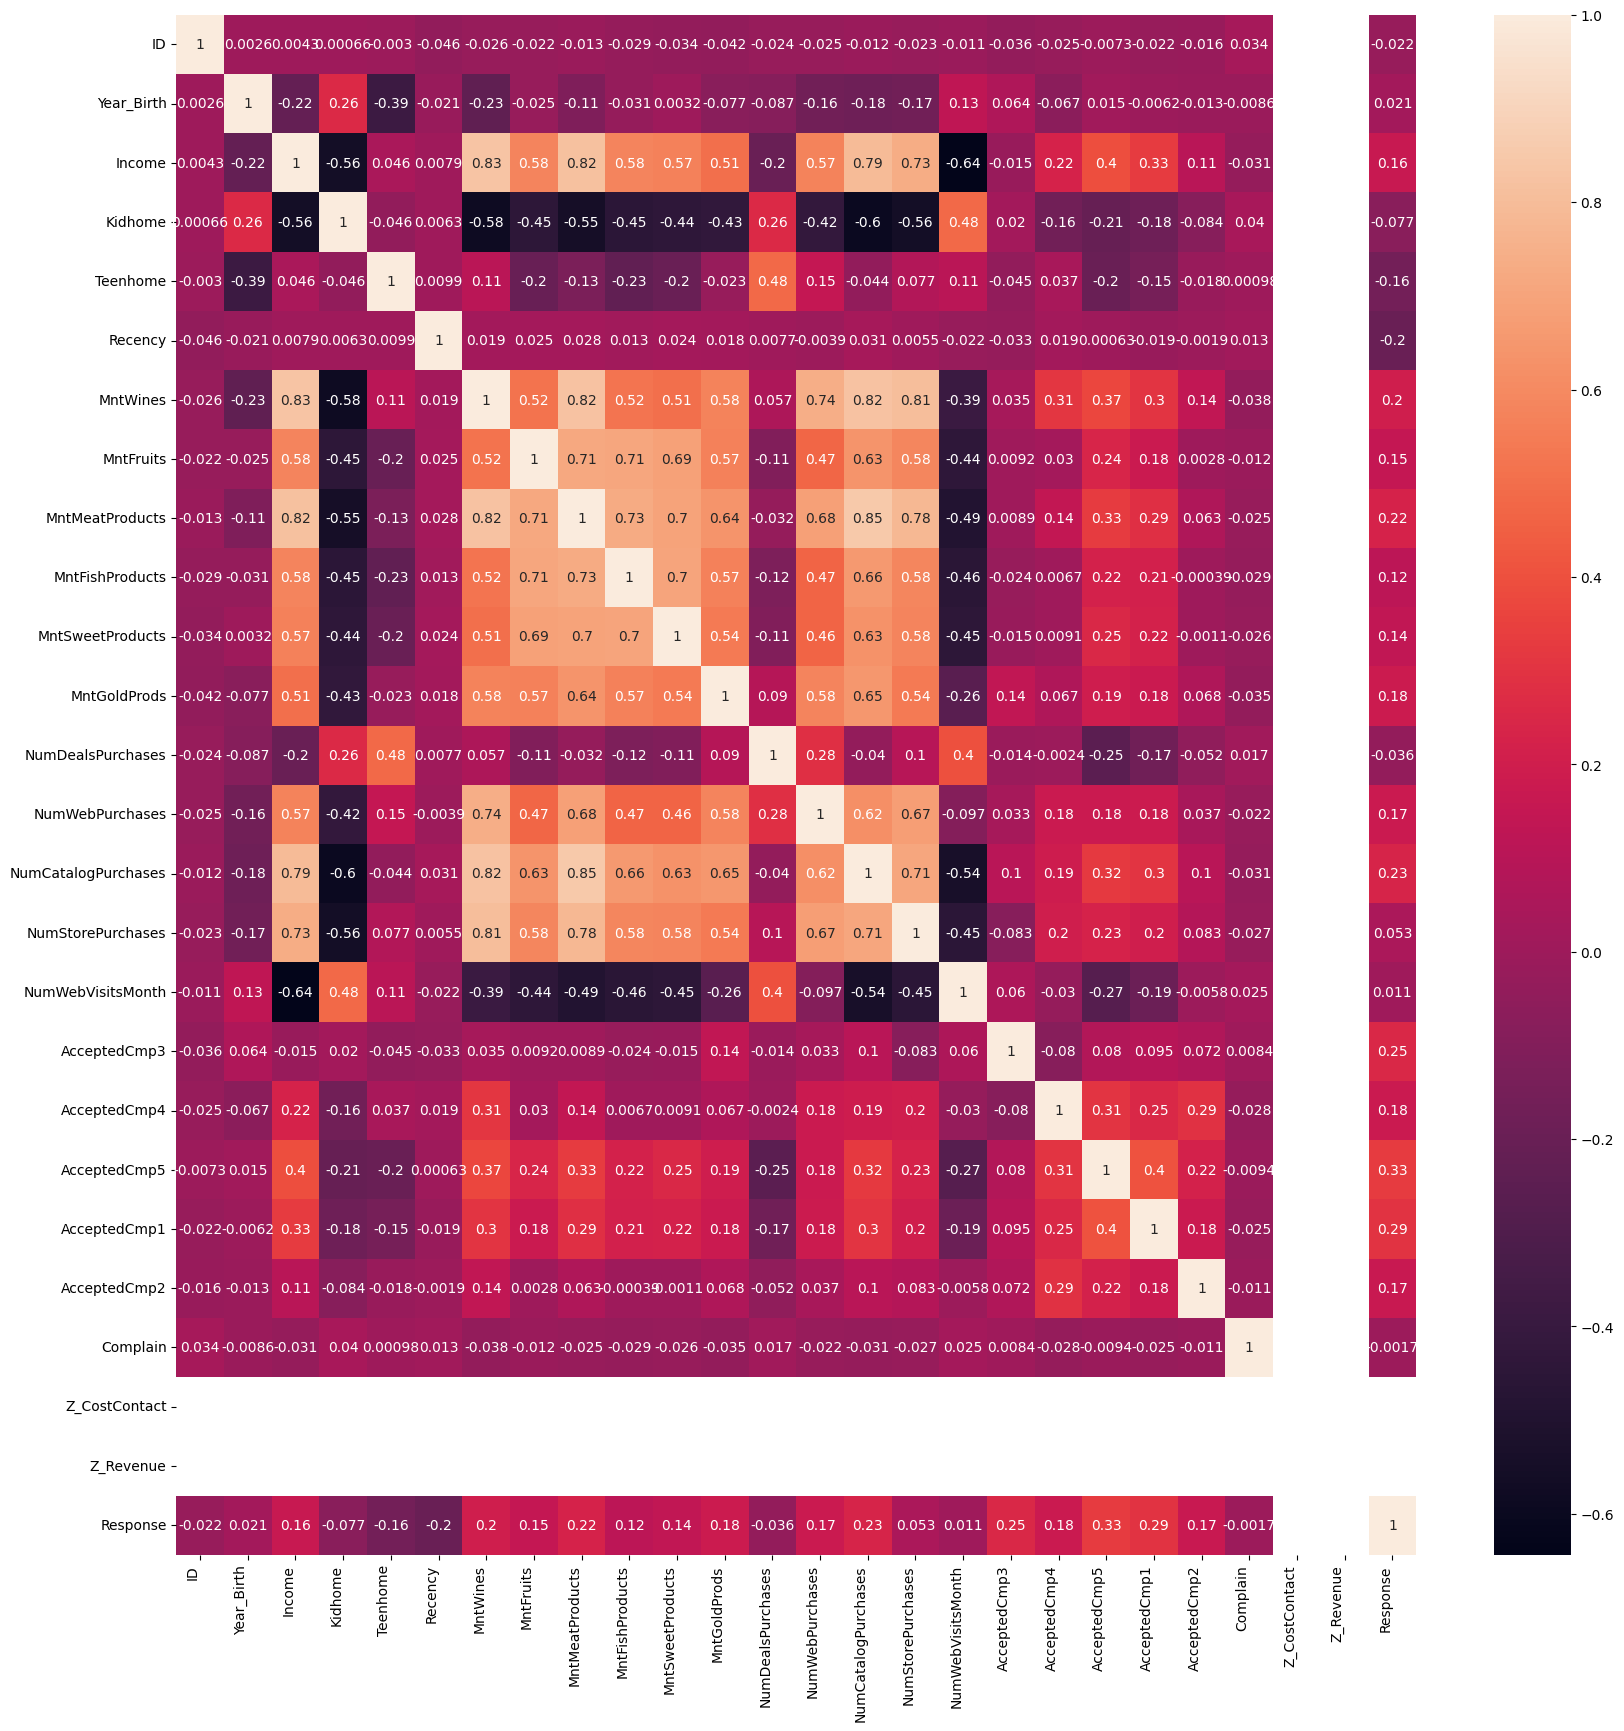

In [419]:
plt.figure(figsize=(20, 20))
sns.heatmap(numerik.corr(method='spearman'), annot=True)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # The y-axis label remains vertical.
plt.show()

#### CORRELATION CONCLUSION

After using the .corr and heatmap methods to evaluate the correlation between columns, several important points were found that support the analysis process, namely:

1. The variables "Z_CostContact" and "Z_Revenue" show a symmetrical histogram distribution and appear empty (white blank) on the heatmap. This indicates that both variables have no influence on the data. Therefore, this variable can be removed at the data cleaning stage.

2. The best correlation is indicated by a value close to 1 or a lighter color on the heatmap. Several pairs of variables with high correlations found are:

 - "MntWines" with "MntMeatProducts" (0.82)
 - "NumCatalogPurchases" with "MntMeatProducts" (0.85) and "MntWines" (0.82).
 - "Income" with "MntWines" (0.83) and "MntMeatProducts" (0.82).

These variables with correlation values ​​approaching 1 are interesting for further analysis because they have the potential to provide insights or findings that can increase the depth of the analysis.

## CATEGORY VARIABLES

### DESCRIPTIVE STATISTICS

In [420]:
# df.describe(include = 'object') # same thing
data.describe(exclude = 'number')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

### UNIQUE VALUES

In [421]:
# take all categorical ones
kategorik = data.select_dtypes(include = 'object')

# calculate unique values ​​of each variable
kategorik.nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

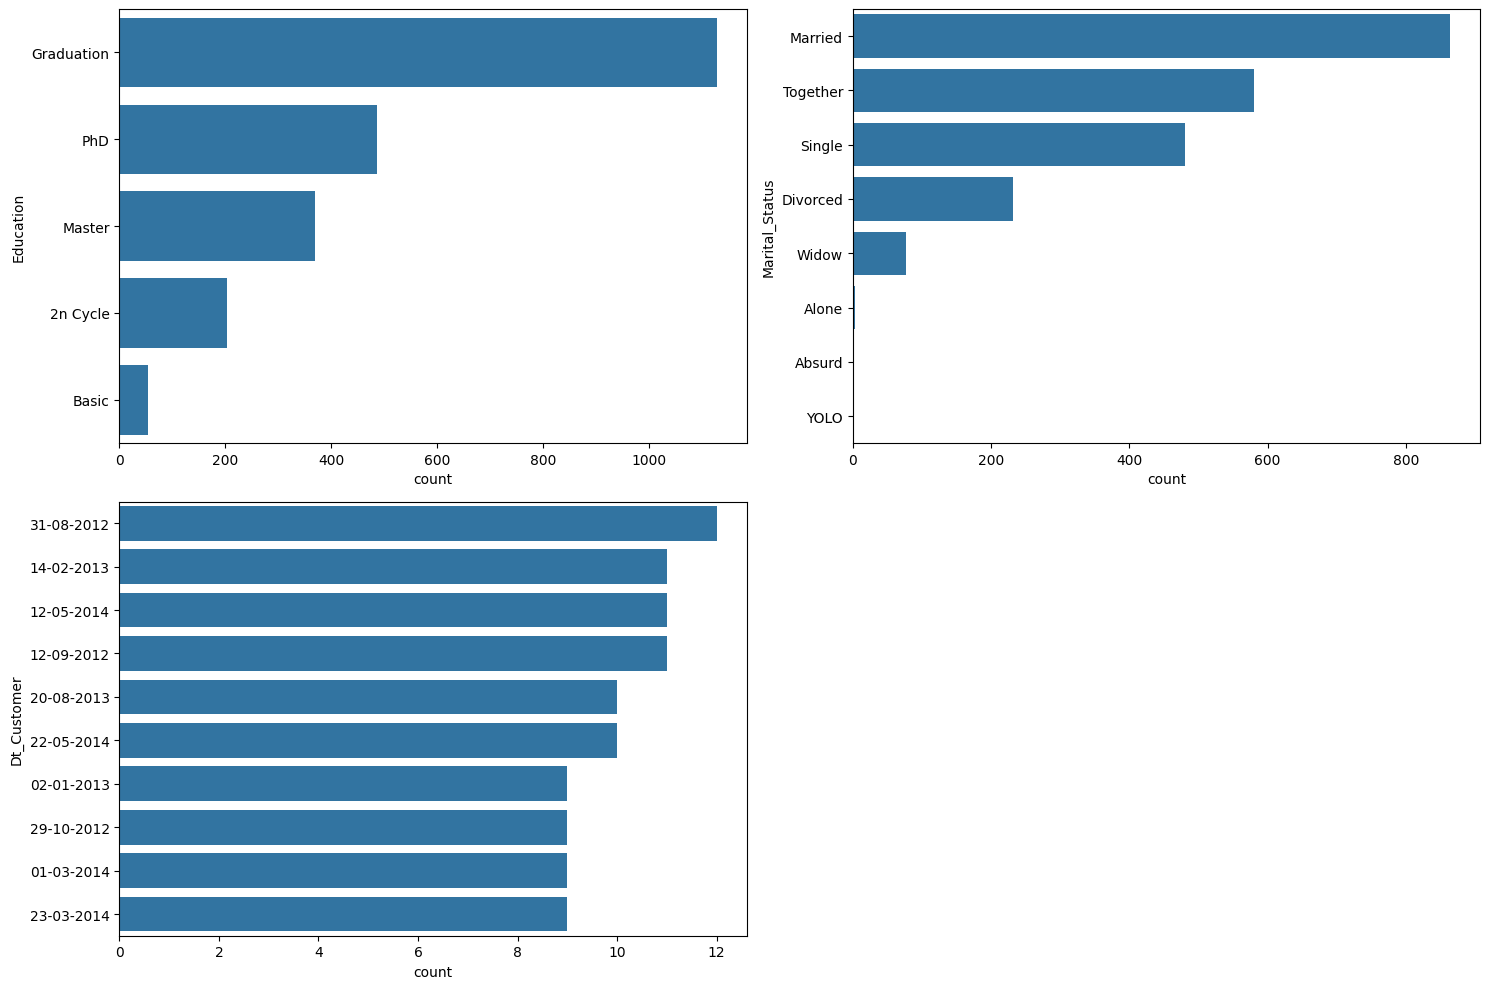

In [422]:
# take all categorical ones
kategorik = data.select_dtypes(include = 'object')

plt.figure(figsize = (15,10)) # (column, row)
posisi = 1
for kolom in kategorik.columns:
    plt.subplot(2, 2, posisi) # (row, column, position)
    sns.barplot(data[kolom].value_counts().sort_values(ascending = False).head(10), orient = 'h')
    posisi += 1
    plt.tight_layout() # so as not to collide

# print graph
plt.show()

### CONCLUSION OF CATEGORY VARIABLES

1. The Dt_Customer column, which is currently an object data type, needs to be changed to a datetime type, because this column contains the customer's registration date, which should have a date and time format (datetime).

2. The Marital_Status column contains several terms such as "Absurd" and "YOLO" which do not correspond to the definition of marital status. We will assume that individuals who choose these terms may still be Single. If they have a partner, the correct status is "Cohabitation" (will be replaced with "Cohabitation" according to [Reference](https://en.wikipedia.org/wiki/Cohabitation)) or "Married". In addition, the statuses "Single" and "Alone" are considered to have similar meanings, as are "Divorced" and "Widow". To simplify the analysis, the new "Marital_Status" column will consist of the categories "Single", "Cohabitation", "Married", and "Divorced".

3. The Education column contains the value "2n Cycle", which according to one of the [reference sources](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=First%20cycle%20is%20for%20the,offered%20at%20all%20three%20cycles.) refers to a Master's degree. In addition, education with the status "Basic" refers to individuals who have only completed education up to the upper secondary school level or informal education that does not continue to higher education, according to the [definition of basic education](https://uis.unesco.org/en/glossary-term/basic-education). Therefore, the content of the Education column will be updated, where "2n Cycle" will be classified as "Master", and "Basic" will be replaced with "Non-degree" according to [reference](https://dictionary.cambridge.org/dictionary/english/non-graduate). In addition, the value of "Graduation" will be replaced with "Bachelor" to avoid ambiguity in definition.

# UNDERSTANDING DATA CONCLUSION

Data Understanding Conclusions are as follows:

1. Data begins with the use of separators because the data for each column is in one column.

2. Missing Data is only in the Income column with 24 Missing Data or 1.07% of 2240. Consideration was given to the missing data, it was decided to take the average based on Education, Age, Marital Status of customers, then the missing data was filled in by the average of each education.

3. There is no Duplicated Data.

4. ID has a value of 0, the value of 0 to thousands on the ID is considered still relevant, because it is only a unique sign for each customer, not a sign that must have a combination of numbers.

5. Four customers have a column of goods purchases and the number of goods purchased is zero, indicating illogical data. Because this data does not have a similar ID to other valid data, the row can be deleted to support more accurate analysis.

6. Data is not normally distributed based on Statistical Tests.

7. There is an Income value of 666666.0 dollars, an illogical number. This Income value will be replaced according to the average Income based on Education, Age, Marital Status of customers who are the same as the owner of the Income.

8. The variables "Z_CostContact" and "Z_Revenue" can be removed because they do not affect the data, as seen from the symmetrical histogram distribution and appear empty in the heatmap.

9. High correlation is found between "MntWines", "MntMeatProducts", "NumCatalogPurchases", and "Income", with values ​​close to 1. These variables are interesting for further analysis.

10. The Dt_Customer column needs to be changed to a datetime type because it contains customer registration date data.

11. The Marital_Status column will be simplified to "Single", "Cohabitation", "Married", and "Divorced" by adjusting irrelevant terms such as "YOLO" and "Absurd".

12. The Education column will be updated: "2n Cycle" to "Master", "Basic" to "Non-degree", and "Graduation" to "Bachelor" for consistency and clarity.

13. Outlier data in the Year_Birth column below 1900 and 1946 are removed because they are considered less relevant and insignificant to the analysis. The remaining data is considered logical for further processing.

# DATA CLEANING

Based on the results of the Data Understanding analysis, the following steps were taken:

1. Filling in the empty data in the Income column with the average Income based on education level, age, and marital status.

2. Deleting four customers with zero purchase data was considered illogical for a more accurate analysis.

3. Replacing the illogical outlier value in the Income column (666666.0 dollars) with the average Income according to the customer's education level.

4. Deleting the Z_CostContact and Z_Revenue variables because they have no effect on the data.

5. Changing the Dt_Customer column to a datetime type because it contains the customer's registration date.

6. Simplifying the Marital_Status column to "Single", "Cohabitation", "Married", and "Divorced" by replacing irrelevant terms.

7. Updating the Education column: replacing "2n Cycle" to "Master", "Basic" to "Non-degree", and "Graduation" to "Bachelor" for consistency.

8. Delete Year_Birth below 1946 because it is less relevant and not significant to the analysis.

In this data cleaning, **ADDITION OF COLUMN** will also be carried out. **ADDITION OF COLUMN** consists of the following:

1. Grouping generations based on customer age
2. Grouping income based on Q1,Q2,Q3
3. Grouping customers who receive promos and do not receive promos
4. Knowing the occupants in one house based on data
5. Adding price information per product and total spending on each item
6. Adding monetary information on customer purchases
7. Adding information on customer purchase frequency

**ADDITION OF COLUMN** functions to group columns that have many unique values ​​and columns that are needed for further analysis.

## DELETE CUSTOMER DATA WITH ZERO PURCHASE

In [423]:
# Verify the purchase column with the purchased item
datapembelianverif = data[(data['NumDealsPurchases']==0) & (data['NumWebPurchases']==0) & (data['NumCatalogPurchases']==0) & (data['NumStorePurchases']==0)]
datapembelianverif

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
655    5555        1975  Graduation       Divorced  153924.0        0   
981    3955        1965  Graduation       Divorced    4861.0        0   
1524  11110        1973  Graduation         Single    3502.0        1   
2132  11181        1949         PhD        Married  156924.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
655          0  07-02-2014       81         1          1                1   
981          0  22-06-2014       20         2          1                1   
1524         0  13-04-2013       56         2          1                1   
2132         0  29-08-2013       85         2          1                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
655                 1                 1             1                  0   
981                 1                 0             1                  0   
1524                0                 0             1                  0   
2132                1                 1             1                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
655                 0                    0                  0   
981                 0                    0                  0   
1524                0                    0                  0   
2132                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
655                   0             0             0             0   
981                  14             0             0             0   
1524                 14             0             0             0   
2132                  0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
655              0             0         0              3         11         0  
981              0             0         0              3         11         0  
1524             0             0         0              3         11         0  
2132             0             0         0              3         11         0

In [424]:
# Delete Customer ID 5555,3955,11110,11181 who has 0 purchases but the item purchases contain numbers
data.drop([655,981,1524,2132],axis = 0,inplace=True)

In [425]:
data[(data['NumDealsPurchases']==0) & (data['NumWebPurchases']==0) & (data['NumCatalogPurchases']==0) & (data['NumStorePurchases']==0)]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

## DELETE VARIABLES Z_CostContact AND Z_Revenue

In [426]:
data.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [427]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

## CHANGE DATA TYPE Dt_Customer TO DATETIME TYPE

In [428]:
# Convert Dt_Customer column to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [429]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-null   i

### CHECKING AVAILABLE RECENCY

#### MAKE OLD COLUMN JOIN ON DATA

In [430]:
# take the most recent data (max) from the data
current_date = data['Dt_Customer'].max()
current_date

Timestamp('2014-06-29 00:00:00')

In [431]:
last_join = data.groupby('ID')['Dt_Customer'].max()
last_join

ID
0       2013-05-04
1       2014-06-15
9       2012-08-18
13      2013-07-22
17      2013-09-06
           ...    
11176   2014-05-12
11178   2014-03-23
11187   2013-05-20
11188   2014-02-25
11191   2013-12-07
Name: Dt_Customer, Length: 2236, dtype: datetime64[ns]

In [432]:
# change in day form
jarak_join_pertamasekarang = (current_date - last_join).dt.days
jarak_join_pertamasekarang = jarak_join_pertamasekarang.rename('JoinedTime(days)')
jarak_join_pertamasekarang

ID
0        421
1         14
9        680
13       342
17       296
        ... 
11176     48
11178     98
11187    405
11188    124
11191    204
Name: JoinedTime(days), Length: 2236, dtype: int64

**NOTES**

Data variable is changed to data_merge

In [433]:
# Merge JoinedTime(days) to data with the same ID
data_merge = pd.merge(data, jarak_join_pertamasekarang, on='ID')
data_merge

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2231  10870        1967  Graduation        Married  61223.0        0   
2232   4001        1946         PhD       Together  64014.0        2   
2233   7270        1981  Graduation       Divorced  56981.0        0   
2234   8235        1956      Master       Together  69245.0        0   
2235   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2231         1  2013-06-13       46       709         43              182   
2232         1  2014-06-10       56       406          0               30   
2233         0  2014-01-25       91       908         48              217   
2234         1  2014-01-24        8       428         30              214   
2235         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2231               42               118           247                  2   
2232                0                 0             8                  7   
2233               32                12            24                  1   
2234               80                30            61                  2   
2235                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2231                9                    3                  4   
2232                8                    2                  5   
2233                2                    3                 13   
2234                6                    5                 10   
2235                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2231                  5             0     

In [434]:
# Move the Recency column to the side of Frequency
# Determine the position of the 'Frequency' column
freq_index = data_merge.columns.get_loc('MntWines')

# Move the 'Recency' column to the position before 'Frequency'
LamaBergabungHari_column = data_merge.pop('JoinedTime(days)')
data_merge.insert(freq_index - 1, 'JoinedTime(days)', LamaBergabungHari_column)
data_merge

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2231  10870        1967  Graduation        Married  61223.0        0   
2232   4001        1946         PhD       Together  64014.0        2   
2233   7270        1981  Graduation       Divorced  56981.0        0   
2234   8235        1956      Master       Together  69245.0        0   
2235   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  JoinedTime(days)  Recency  MntWines  MntFruits  \
0            0  2012-09-04               663       58       635         88   
1            1  2014-03-08               113       38        11          1   
2            0  2013-08-21               312       26       426         49   
3            0  2014-02-10               139       26        11          4   
4            0  2014-01-19               161       94       173         43   
...        ...         ...               ...      ...       ...        ...   
2231         1  2013-06-13               381       46       709         43   
2232         1  2014-06-10                19       56       406          0   
2233         0  2014-01-25               155       91       908         48   
2234         1  2014-01-24               156        8       428         30   
2235         1  2012-10-15               622       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2231              182               42               118           247   
2232               30                0                 0             8   
2233              217               32                12            24   
2234              214               80                30            61   
2235               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2231                  2                9                    3   
2232                  7                8                    2   
2233                  1                2                    3   
2234                  2                6                    5   
2235                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2231               

#### CHECKING CUSTOMER JOINTING TIME AND RECENCY

In [435]:
data_merge[data_merge['JoinedTime(days)'] < data_merge['Recency']]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
45    1371        1976  Graduation         Single  79941.0        0         0   
53    2225        1977  Graduation       Divorced  82582.0        0         0   
88    8504        1973  Graduation        Married  79593.0        0         0   
91    9235        1957  Graduation         Single      NaN        1         1   
94    2230        1970         PhD        Married  23626.0        1         0   
...    ...         ...         ...            ...      ...      ...       ...   
2178  3266        1964  Graduation        Married  42523.0        0         0   
2183  5721        1956         PhD        Married  84117.0        0         0   
2195  9014        1975  Graduation        Married  37085.0        1         1   
2219  1448        1963      Master        Married  33562.0        1         2   
2232  4001        1946         PhD       Together  64014.0        2         1   

     Dt_Customer  JoinedTime(days)  Recency  MntWines  MntFruits  \
45    2014-06-28                 1       72       123        164   
53    2014-06-07                22       54       510        120   
88    2014-05-12                48       70       350         60   
91    2014-05-27                33       45         7          0   
94    2014-05-24                36       84        27          2   
...          ...               ...      ...       ...        ...   
2178  2014-04-23                67       96        14         36   
2183  2014-05-11                49       60       611         76   
2195  2014-06-26                 3       65        39          1   
2219  2014-06-25                 4       33        21         12   
2232  2014-06-10                19       56       406          0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
45                266              227                30           174   
53                550              156                40           241   
88                568              110               133           145   
91                  8                2                 0             1   
94                 14                0                 0             0   
...               ...              ...               ...           ...   
2178               11                3                26            35   
2183              749               59                45            26   
2195               16                2                 0             3   
2219               12                0                 3             3   
2232               30                0                 0             8   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
45                    1                2                    4   
53                    1                4                    9   
88                    1                5                    6   
91                    1                1                    0   
94                    3                3                    1   
...                 ...              ...                  ...   
2178                  1                1                    1   
2183                  1                7                   10   
2195                  4                3                    0   
2219                  3                2                    0   
2232                  7                8                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
45                    9                  1             0             0   
53                    7                  1             1             0   
88                    7                  2             0             0   
91                    2                  7             0             0   
94                    3                  5             0             0   
...                 ...                ...           ...           ...   
2178                  4       

There are 146 customer data whose recency is longer than the first time the customer registered, this is illogical because customers have a first time they registered and it can be assumed that the first time a customer registered was the first time the customer shopped.

#### CONCLUSION CHECKING THE AVAILABLE RECENCY

Customer data whose recency is older than the time the customer first registered is replaced with the length of time he or she joined.

In [436]:
# Change recency greater than JoinLength(Days) to JoinLength(Days) number in recency
data_merge['Recency'] = data_merge.apply(lambda row: row['JoinedTime(days)'] if row['Recency'] > row['JoinedTime(days)'] else row['Recency'], axis=1)

In [437]:
data_merge[data_merge['JoinedTime(days)'] < data_merge['Recency']]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, JoinedTime(days), Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []

In [438]:
data_merge[data_merge['ID'] == 1371]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
45  1371        1976  Graduation         Single  79941.0        0         0   

   Dt_Customer  JoinedTime(days)  Recency  MntWines  MntFruits  \
45  2014-06-28                 1        1       123        164   

    MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
45              266              227                30           174   

    NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
45                  1                2                    4   

    NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
45                  9                  1             0             0   

    AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
45             0             0             0         0         0

## SIMPLIFYING THE COLUMN Marital_Status

In [439]:
data_merge['Marital_Status'].value_counts()

Marital_Status
Married     863
Together    580
Single      479
Divorced    230
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [440]:
# Create a function to replace the name composition of the 'Marital_Status' column
def maritalstatus (marital) :
    if marital == 'Together' :
        return 'Cohabitation'
    elif marital == 'Absurd' :
        return 'Single'
    elif marital == 'YOLO' :
        return 'Single'
    elif marital == 'Widow':
        return 'Divorced'
    elif marital == 'Alone':
        return 'Single'
    else :
        return marital

# Apply the maritalstatus function to the Marital_Status variable to change it
data_merge['Marital_Status'] = data_merge['Marital_Status'].apply(maritalstatus)

# Check the Marital_Status variable after changing it
data_merge['Marital_Status'].value_counts()

Marital_Status
Married         863
Cohabitation    580
Single          486
Divorced        307
Name: count, dtype: int64

## COLUMN MODIFICATION Education

In [441]:
data_merge['Education'].value_counts()

Education
Graduation    1124
PhD            485
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [442]:
# Create a function to change the name composition of the 'Education' column
def edulevel (edu) :
    if edu == '2n Cycle' :
        return 'Master'
    elif edu == 'Basic' :
        return 'Non-degree'
    elif edu == 'Graduation' :
        return 'Bachelor'
    elif edu == 'PhD':
        return 'Doctoral'
    else :
        return edu

# Apply the edulevel function to the Education variable to change
data_merge['Education'] = data_merge['Education'].apply(edulevel)

# Check the Education variable after changing it
data_merge['Education'].value_counts()

Education
Bachelor      1124
Master         573
Doctoral       485
Non-degree      54
Name: count, dtype: int64

## ADDING COLUMN

### GROUPING GENERATIONS BASED ON CUSTOMER AGE

### ADDITION OF AGE COLUMN

In [443]:
# View the last member registration date as a reference for when the data was taken.
data_merge['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [444]:
# Use the insert() function to add the Age column in the desired column order.
data_merge.insert(2, 'Age', data_merge['Year_Birth'].apply(lambda x : 2014-x))

# Check the Age column
data_merge.head()

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957   57  Bachelor         Single  58138.0        0         0   
1  2174        1954   60  Bachelor         Single  46344.0        1         1   
2  4141        1965   49  Bachelor   Cohabitation  71613.0        0         0   
3  6182        1984   30  Bachelor   Cohabitation  26646.0        1         0   
4  5324        1981   33  Doctoral        Married  58293.0        1         0   

  Dt_Customer  JoinedTime(days)  Recency  MntWines  MntFruits  \
0  2012-09-04               663       58       635         88   
1  2014-03-08               113       38        11          1   
2  2013-08-21               312       26       426         49   
3  2014-02-10               139       26        11          4   
4  2014-01-19               161       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0

### ADDITIONAL GENERATION

In [445]:
data_merge['Age'].describe()

count    2236.000000
mean       45.188283
std        11.986154
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [446]:
def rangeumur (int) :
    if int < 11 :
        return 'Gen Alpha'
    elif 12 <= int <= 27 :
        return 'Gen Z'
    elif 28 <= int <= 43 :
        return 'Millennials'
    elif 44 <= int <= 59 :
        return 'Gen X'
    elif 60 <= int <= 78 :
        return 'Baby Boomers'
    else :
        return 'Silent Generation-Elder'

data_merge.insert(3,'Age_Range',data_merge['Age'].apply(rangeumur))
data_merge

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2231  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2232   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2233   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2234   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2235   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome Dt_Customer  JoinedTime(days)  Recency  MntWines  \
0           0         0  2012-09-04               663       58       635   
1           1         1  2014-03-08               113       38        11   
2           0         0  2013-08-21               312       26       426   
3           1         0  2014-02-10               139       26        11   
4           1         0  2014-01-19               161       94       173   
...       ...       ...         ...               ...      ...       ...   
2231        0         1  2013-06-13               381       46       709   
2232        2         1  2014-06-10                19       19       406   
2233        0         0  2014-01-25               155       91       908   
2234        0         1  2014-01-24               156        8       428   
2235        1         1  2012-10-15               622       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2231         43              182               42               118   
2232          0               30                0                 0   
2233         48              217               32                12   
2234         30              214               80                30   
2235          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2231           247                  2                9                    3   
2232             8                  7                8                    2   
2233            24                  1                2                    3   
2234            61                  2                6                    5   
2235            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4              

### GROUPING INCOME BASED ON Q1, Q2, Q3

In [447]:
data_merge['Income'].describe()

count      2212.000000
mean      52197.422242
std       24962.089394
min        1730.000000
25%       35335.500000
50%       51381.500000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [448]:
# Create grouping for age categories based on quantiles and create columns for them.

def labelincome(x):
    if x <= 35303:
        return 'Lower'
    elif x <= 51371:
        return 'Lower-Middle'
    elif x <= 68468:
        return 'Upper-Middle'
    else:
        return 'Upper'

data_merge.insert(7,'IncomeCategory',data_merge['Income'].apply(labelincome))

data_merge

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2231  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2232   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2233   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2234   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2235   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

     IncomeCategory  Kidhome  Teenhome Dt_Customer  JoinedTime(days)  Recency  \
0      Upper-Middle        0         0  2012-09-04               663       58   
1      Lower-Middle        1         1  2014-03-08               113       38   
2             Upper        0         0  2013-08-21               312       26   
3             Lower        1         0  2014-02-10               139       26   
4      Upper-Middle        1         0  2014-01-19               161       94   
...             ...      ...       ...         ...               ...      ...   
2231   Upper-Middle        0         1  2013-06-13               381       46   
2232   Upper-Middle        2         1  2014-06-10                19       19   
2233   Upper-Middle        0         0  2014-01-25               155       91   
2234          Upper        0         1  2014-01-24               156        8   
2235   Upper-Middle        1         1  2012-10-15               622       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2231       709         43              182               42               118   
2232       406          0               30                0                 0   
2233       908         48              217               32                12   
2234       428         30              214               80                30   
2235        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2231           247                  2                9                    3   
2232             8                  7                8                    2   
2233            24                  1                2                    3   
2234            61                  2                6                    5   
2235            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1    

### GROUPING CUSTOMERS WHO RECEIVE PROMOTIONS AND CUSTOMERS WHO DO NOT RECEIVE PROMOTIONS

In [449]:
# function to divide customers who never received a promo or received it once or more
def campaign (campaignacc) :
    if campaignacc == 0:
        return 'Never accepted promos'
    else :
        return 'Accepted promos'

# Added total promo/campaign received column for analysis
data_merge.insert(29,'PromoReceived',data_merge[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1))

data_merge.insert(30,'PromoAcceptedCat',data_merge['PromoReceived'].apply(campaign))
data_merge

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2231  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2232   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2233   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2234   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2235   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

     IncomeCategory  Kidhome  Teenhome Dt_Customer  JoinedTime(days)  Recency  \
0      Upper-Middle        0         0  2012-09-04               663       58   
1      Lower-Middle        1         1  2014-03-08               113       38   
2             Upper        0         0  2013-08-21               312       26   
3             Lower        1         0  2014-02-10               139       26   
4      Upper-Middle        1         0  2014-01-19               161       94   
...             ...      ...       ...         ...               ...      ...   
2231   Upper-Middle        0         1  2013-06-13               381       46   
2232   Upper-Middle        2         1  2014-06-10                19       19   
2233   Upper-Middle        0         0  2014-01-25               155       91   
2234          Upper        0         1  2014-01-24               156        8   
2235   Upper-Middle        1         1  2012-10-15               622       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2231       709         43              182               42               118   
2232       406          0               30                0                 0   
2233       908         48              217               32                12   
2234       428         30              214               80                30   
2235        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2231           247                  2                9                    3   
2232             8                  7                8                    2   
2233            24                  1                2                    3   
2234            61                  2                6                    5   
2235            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1    

## KNOWING THE RESIDENTS IN ONE HOUSE BASED ON DATA

In [450]:
data_merge.groupby(['Marital_Status'])[['Kidhome','Teenhome']].sum()

Kidhome  Teenhome
Marital_Status                   
Cohabitation        261       307
Divorced            114       186
Married             394       442
Single              225       199

In [451]:
def totfam_member (fam_member) :
    if fam_member == 'Married' :
        return 2
    elif fam_member == 'Cohabitation' :
        return 2
    else :
        return 1

data_merge.insert(9,'FamilyHomeMember',data_merge['Marital_Status'].apply(totfam_member) + data_merge['Kidhome'] + data_merge['Teenhome'])
data_merge

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2231  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2232   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2233   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2234   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2235   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

     IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
0      Upper-Middle        0                 1         0  2012-09-04   
1      Lower-Middle        1                 3         1  2014-03-08   
2             Upper        0                 2         0  2013-08-21   
3             Lower        1                 3         0  2014-02-10   
4      Upper-Middle        1                 3         0  2014-01-19   
...             ...      ...               ...       ...         ...   
2231   Upper-Middle        0                 3         1  2013-06-13   
2232   Upper-Middle        2                 5         1  2014-06-10   
2233   Upper-Middle        0                 1         0  2014-01-25   
2234          Upper        0                 3         1  2014-01-24   
2235   Upper-Middle        1                 4         1  2012-10-15   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
0                  663       58       635         88              546   
1                  113       38        11          1                6   
2                  312       26       426         49              127   
3                  139       26        11          4               20   
4                  161       94       173         43              118   
...                ...      ...       ...        ...              ...   
2231               381       46       709         43              182   
2232                19       19       406          0               30   
2233               155       91       908         48              217   
2234               156        8       428         30              214   
2235               622       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2231               42               118           247                  2   
2232                0                 0             8                  7   
2233               32                12            24                  1   
2234               80                30            61                  2   
2235                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...

## ADDING PRICE INFORMATION PER PRODUCT AND TOTAL SPENDING FOR EACH ITEM

The following information is based on references for the average price of each type of product:


Wine Products [Reference](https://www.quora.com/How-much-does-wine-cost-per-ounce-on-average)
* **$ 32 /bottle** Average

Fruit Products [Reference](https://agro-market24.eu/fruits-exchange-price-buy-sell-19)
* **$ 4/kg** Average

Meat Products [Reference](https://www.statista.com/statistics/675826/average-prices-meat-beef-worldwide/)
* **$ 5/kg** Average (Avg

Fish Products [Reference](https://www.selinawamucii.com/insights/prices/united-states-of-america/fish/)
* **$ 8.5 /kg** Average

Sweet Products [Reference](https://www.statista.com/statistics/643582/average-unit-price-candy-and-chocolate-us-by-segment/)
* Chocolate, Cookies, etc.
* **$ 2.27/pcs** Average

Gold Products [Reference](https://www.amazon.in/Skin-Care/b?ie=UTF8&node=1374407031)
* Beauty, Skincare, Cosmetics, etc.
* **$ 10/pcs** Average

In [452]:
# Create a new variable for product expenditure price data
Prod1 = data['MntWines']*32
Prod2 = data['MntFruits']*4
Prod3 = data['MntMeatProducts']*5
Prod4 = data['MntFishProducts']*8.5
Prod5 = data['MntSweetProducts']*2.27
Prod6 = data['MntGoldProds']*10

data_merge.insert(20,'WinesExpense', Prod1)
data_merge.insert(21,'FruitsExpense', Prod2)
data_merge.insert(22,'MeatExpense', Prod3)
data_merge.insert(23,'FishExpense', Prod4)
data_merge.insert(24,'SweetExpense', Prod5)
data_merge.insert(25,'GoldExpense', Prod6)

In [453]:
data_merge

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2231  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2232   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2233   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2234   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2235   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

     IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
0      Upper-Middle        0                 1         0  2012-09-04   
1      Lower-Middle        1                 3         1  2014-03-08   
2             Upper        0                 2         0  2013-08-21   
3             Lower        1                 3         0  2014-02-10   
4      Upper-Middle        1                 3         0  2014-01-19   
...             ...      ...               ...       ...         ...   
2231   Upper-Middle        0                 3         1  2013-06-13   
2232   Upper-Middle        2                 5         1  2014-06-10   
2233   Upper-Middle        0                 1         0  2014-01-25   
2234          Upper        0                 3         1  2014-01-24   
2235   Upper-Middle        1                 4         1  2012-10-15   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
0                  663       58       635         88              546   
1                  113       38        11          1                6   
2                  312       26       426         49              127   
3                  139       26        11          4               20   
4                  161       94       173         43              118   
...                ...      ...       ...        ...              ...   
2231               381       46       709         43              182   
2232                19       19       406          0               30   
2233               155       91       908         48              217   
2234               156        8       428         30              214   
2235               622       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  WinesExpense  \
0                 172                88            88       20320.0   
1                   2                 1             6         352.0   
2                 111                21            42       13632.0   
3                  10                 3             5         352.0   
4                  46                27            15        5536.0   
...               ...               ...           ...           ...   
2231               42               118           247       27296.0   
2232                0                 0             8         160.0   
2233               32                12            24         288.0   
2234               80                30            61          96.0   
2235                2                 1            21       22688.0   

      FruitsExpense  MeatExpense  FishExpense  SweetExpense  GoldExpense  \
0             352.0       2730.0       1462.0        199.76        880.0   
1               4.0         30.0         17.0          2.27         60.0   
2             196.0        635.0        943.5         47.67        420.0   
3              16.0        100.0         85.0          6.81         50.0   
4             172.0        590.0        391.0         61.29        150.0 

## ADDING CUSTOMER PURCHASE MONETARY INFORMATION

In [454]:
data_merge.insert(26,'Monetary',data_merge[['WinesExpense','FruitsExpense','MeatExpense','FishExpense','SweetExpense','GoldExpense']].sum(axis=1))
data_merge

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2231  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2232   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2233   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2234   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2235   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

     IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
0      Upper-Middle        0                 1         0  2012-09-04   
1      Lower-Middle        1                 3         1  2014-03-08   
2             Upper        0                 2         0  2013-08-21   
3             Lower        1                 3         0  2014-02-10   
4      Upper-Middle        1                 3         0  2014-01-19   
...             ...      ...               ...       ...         ...   
2231   Upper-Middle        0                 3         1  2013-06-13   
2232   Upper-Middle        2                 5         1  2014-06-10   
2233   Upper-Middle        0                 1         0  2014-01-25   
2234          Upper        0                 3         1  2014-01-24   
2235   Upper-Middle        1                 4         1  2012-10-15   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
0                  663       58       635         88              546   
1                  113       38        11          1                6   
2                  312       26       426         49              127   
3                  139       26        11          4               20   
4                  161       94       173         43              118   
...                ...      ...       ...        ...              ...   
2231               381       46       709         43              182   
2232                19       19       406          0               30   
2233               155       91       908         48              217   
2234               156        8       428         30              214   
2235               622       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  WinesExpense  \
0                 172                88            88       20320.0   
1                   2                 1             6         352.0   
2                 111                21            42       13632.0   
3                  10                 3             5         352.0   
4                  46                27            15        5536.0   
...               ...               ...           ...           ...   
2231               42               118           247       27296.0   
2232                0                 0             8         160.0   
2233               32                12            24         288.0   
2234               80                30            61          96.0   
2235                2                 1            21       22688.0   

      FruitsExpense  MeatExpense  FishExpense  SweetExpense  GoldExpense  \
0             352.0       2730.0       1462.0        199.76        880.0   
1               4.0         30.0         17.0          2.27         60.0   
2             196.0        635.0        943.5         47.67        420.0   
3              16.0        100.0         85.0          6.81         50.0   
4             172.0        590.0        391.0         61.29        150.0 

## ADDING CUSTOMER PURCHASE FREQUENCY INFORMATION

In [455]:
data_merge.insert(31,'Frequency',data_merge[['NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases']].sum(axis=1))
data_merge

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2231  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2232   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2233   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2234   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2235   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

     IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
0      Upper-Middle        0                 1         0  2012-09-04   
1      Lower-Middle        1                 3         1  2014-03-08   
2             Upper        0                 2         0  2013-08-21   
3             Lower        1                 3         0  2014-02-10   
4      Upper-Middle        1                 3         0  2014-01-19   
...             ...      ...               ...       ...         ...   
2231   Upper-Middle        0                 3         1  2013-06-13   
2232   Upper-Middle        2                 5         1  2014-06-10   
2233   Upper-Middle        0                 1         0  2014-01-25   
2234          Upper        0                 3         1  2014-01-24   
2235   Upper-Middle        1                 4         1  2012-10-15   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
0                  663       58       635         88              546   
1                  113       38        11          1                6   
2                  312       26       426         49              127   
3                  139       26        11          4               20   
4                  161       94       173         43              118   
...                ...      ...       ...        ...              ...   
2231               381       46       709         43              182   
2232                19       19       406          0               30   
2233               155       91       908         48              217   
2234               156        8       428         30              214   
2235               622       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  WinesExpense  \
0                 172                88            88       20320.0   
1                   2                 1             6         352.0   
2                 111                21            42       13632.0   
3                  10                 3             5         352.0   
4                  46                27            15        5536.0   
...               ...               ...           ...           ...   
2231               42               118           247       27296.0   
2232                0                 0             8         160.0   
2233               32                12            24         288.0   
2234               80                30            61          96.0   
2235                2                 1            21       22688.0   

      FruitsExpense  MeatExpense  FishExpense  SweetExpense  GoldExpense  \
0             352.0       2730.0       1462.0        199.76        880.0   
1               4.0         30.0         17.0          2.27         60.0   
2             196.0        635.0        943.5         47.67        420.0   
3              16.0        100.0         85.0          6.81         50.0   
4             172.0        590.0        391.0         61.29        150.0 

## HANDLING MISSING VALUE

In [456]:
medianAEMI = data_merge.groupby(['Age_Range','Education','Marital_Status'])[['Income']].median()
medianAEMI

Income
Age_Range               Education  Marital_Status         
Baby Boomers            Bachelor   Cohabitation    51315.0
                                   Divorced        64587.0
                                   Married         58207.5
                                   Single          60689.0
                        Doctoral   Cohabitation    64259.0
...                                                    ...
Millennials             Non-degree Married         20425.0
                                   Single          16581.0
Silent Generation-Elder Doctoral   Cohabitation    83532.0
                        Master     Divorced        36640.0
                                   Single          60182.0

[63 rows x 1 columns]

In [457]:
medianHandMissVal = medianAEMI.copy()

In [458]:
# Fill in missing values ​​with median
for i in data_merge[data_merge['Income'].isna()].index :
    data_merge['Income'][i] = medianHandMissVal.loc[[(data_merge['Age_Range'][i],data_merge['Education'][i],data_merge['Marital_Status'][i])],'Income'].values

# Double check for the presence of missing values
data_merge[data_merge.isna().any(axis=1)].sort_values(by='Age',ascending=False)

<ipython-input-458-9bc67b9abb9b>:3: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-458-9bc67b9abb9b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
655   2564        1953   61  Baby Boomers  Bachelor   Cohabitation  61278.0   
1524  7998        1958   56         Gen X  Bachelor   Cohabitation  28087.0   
2132   271        1969   45         Gen X  Bachelor       Divorced  40590.0   
981   3056        1978   36   Millennials  Bachelor       Divorced  63693.0   

     IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
655    Upper-Middle        0                 3         1  2014-01-04   
1524          Lower        1                 4         1  2012-12-11   
2132   Lower-Middle        1                 3         1  2013-10-02   
981    Upper-Middle        0                 2         1  2013-10-14   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
655                176       87       111          3               28   
1524               565       77        53          8               17   
2132               270       30       154          0               50   
981                258       63       587         43              337   

      MntFishProducts  MntSweetProducts  MntGoldProds  WinesExpense  \
655                 2                 6            15           NaN   
1524               13                 0            21           NaN   
2132                6                11            37           NaN   
981                42                87            54           NaN   

      FruitsExpense  MeatExpense  FishExpense  SweetExpense  GoldExpense  \
655             NaN          NaN          NaN           NaN          NaN   
1524            NaN          NaN          NaN           NaN          NaN   
2132            NaN          NaN          NaN           NaN          NaN   
981             NaN          NaN          NaN           NaN          NaN   

      Monetary  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
655        0.0                  2                3                    1   
1524       0.0                  3                2                    2   
2132       0.0                  5                3                    4   
981        0.0                  3               11                    6   

      NumStorePurchases  Frequency  NumWebVisitsMonth  AcceptedCmp3  \
655                   4         10                  6             0   
1524                  2          9                  7             0   
2132                  3         15                  6             1   
981                   9         29                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  PromoReceived  \
655              0             0             0             0              0   
1524             0             0             0             0              0   
2132             0             0             0             0              1   
981              0             0             0             0              0   

           PromoAcceptedCat  Complain  Response  
655   Never accepted promos         0         0  
1524  Never accepted promos         0         0  
2132        Accepted promos         0         0  
981   Never accepted promos         0         0

Because there was a previous data merger, the Customer Data that had a purchase value of 0 but contained a number for the purchase of goods in the data_merge was deleted.

In [459]:
# Delete Customer ID 5555,3955,11110,11181 who has 0 purchases but the item purchases contain numbers
data_merge.drop([655,981,1524,2132],axis = 0,inplace=True)

<Axes: >

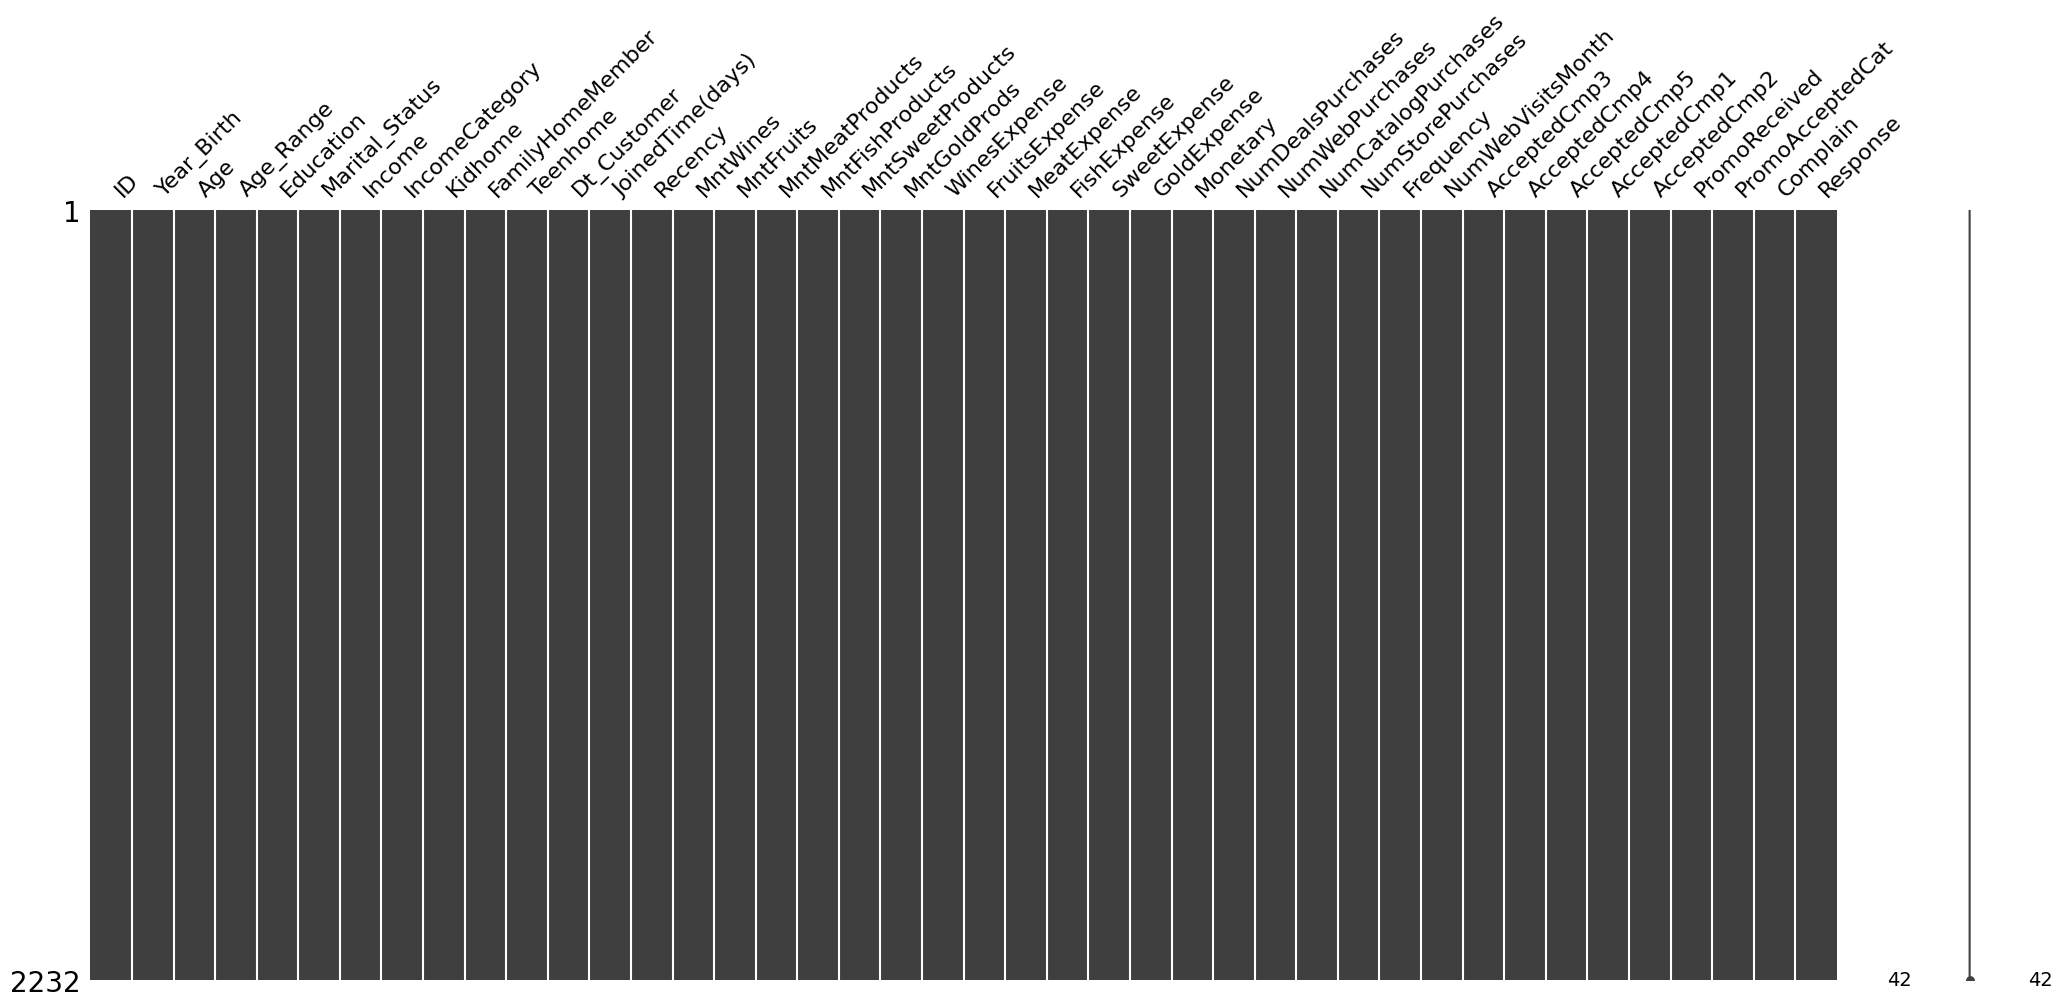

In [460]:
msno.matrix(data_merge)

## HANDLING OUTLIERS

### OUTLIER INCOME

In [461]:
data_merge[data_merge['Income'] >= 150000]

ID  Year_Birth  Age    Age_Range Education Marital_Status    Income  \
164   8475        1973   41  Millennials  Doctoral        Married  157243.0   
617   1503        1976   38  Millennials  Doctoral   Cohabitation  162397.0   
686   1501        1982   32  Millennials  Doctoral        Married  160803.0   
1298  5336        1971   43  Millennials    Master   Cohabitation  157733.0   
1650  4931        1977   37  Millennials  Bachelor   Cohabitation  157146.0   
2229  9432        1977   37  Millennials  Bachelor   Cohabitation  666666.0   

     IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
164           Upper        0                 3         1  2014-03-01   
617           Upper        1                 4         1  2013-06-03   
686           Upper        0                 2         0  2012-08-04   
1298          Upper        1                 3         0  2013-06-04   
1650          Upper        0                 2         0  2013-04-29   
2229          Upper        1                 3         0  2013-06-02   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
164                120       98        20          2             1582   
617                391       31        85          1               16   
686                694       21        55         16             1622   
1298               390       37        39          1                9   
1650               426       13         1          0             1725   
2229               392       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  WinesExpense  \
164                 1                 2             1         640.0   
617                 2                 1             2        2720.0   
686                17                 3             4       28768.0   
1298                2                 0             8       17856.0   
1650                2                 1             1          96.0   
2229                8                 1            12          96.0   

      FruitsExpense  MeatExpense  FishExpense  SweetExpense  GoldExpense  \
164             8.0       7910.0          8.5          4.54         10.0   
617             4.0         80.0         17.0          2.27         20.0   
686           408.0       4190.0       1130.5        231.54        400.0   
1298          316.0       3110.0       1759.5        397.25        950.0   
1650            4.0         40.0        195.5          4.54        180.0   
2229            8.0         40.0        170.0          0.00        170.0   

      Monetary  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
164    8581.04                 15                0                   22   
617    2843.27                  0                0                    0   
686   35128.04                 15                0                   28   
1298  24388.75                  0                1                    0   
1650    520.04                  0                0                   28   
2229    484.00                  4                3                    1   

      NumStorePurchases  Frequency  NumWebVisitsMonth  AcceptedCmp3  \
164                   0         37                  0             0   
617                   1          1                  1             0   
686                   1         44                  0             0   
1298                  1          2                  1             0   
1650                  0         28                  1             0   
2229                  3         11                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  PromoReceived  \
164              0             0             0             0              0   
617              0             0             0             0              0   
686              0             0             0             0              0   
1298             0             0             0             0      

In [462]:
medianAEMI = data_merge.groupby(['Age_Range','Education','Marital_Status'])[['Income']].median()
medianAEMI

Income
Age_Range               Education  Marital_Status         
Baby Boomers            Bachelor   Cohabitation    50054.5
                                   Divorced        64587.0
                                   Married         58207.5
                                   Single          60689.0
                        Doctoral   Cohabitation    64259.0
...                                                    ...
Millennials             Non-degree Married         20425.0
                                   Single          16581.0
Silent Generation-Elder Doctoral   Cohabitation    83532.0
                        Master     Divorced        36640.0
                                   Single          60182.0

[63 rows x 1 columns]

In [463]:
# Filter rows with ID 9432
id_target = 9432

# Take groups based on Age_Range, Education, and Marital_Status
group_key = (
    data_merge.loc[data_merge['ID'] == id_target, 'Age_Range'].values[0],
    data_merge.loc[data_merge['ID'] == id_target, 'Education'].values[0],
    data_merge.loc[data_merge['ID'] == id_target, 'Marital_Status'].values[0]
)

# Take the median Income of the group in medianAEMI
try:
    median_income = medianAEMI.loc[group_key, 'Income']

    # Change the Income value for ID 9432
    data_merge.loc[data_merge['ID'] == id_target, 'Income'] = median_income
except KeyError:
    print(f"No median value was found for group {group_key} in medianAEMI.")

In [464]:
data_merge[data_merge['ID'] == 9432]

ID  Year_Birth  Age    Age_Range Education Marital_Status   Income  \
2229  9432        1977   37  Millennials  Bachelor   Cohabitation  47889.0   

     IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
2229          Upper        1                 3         0  2013-06-02   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
2229               392       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  WinesExpense  \
2229                8                 1            12          96.0   

      FruitsExpense  MeatExpense  FishExpense  SweetExpense  GoldExpense  \
2229            8.0         40.0        170.0           0.0        170.0   

      Monetary  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2229     484.0                  4                3                    1   

      NumStorePurchases  Frequency  NumWebVisitsMonth  AcceptedCmp3  \
2229                  3         11                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  PromoReceived  \
2229             0             0             0             0              0   

           PromoAcceptedCat  Complain  Response  
2229  Never accepted promos         0         0

### OUTLIERS YEAR_BIRTH

In [465]:
data_merge[data_merge['Year_Birth'] <= 1945]

ID  Year_Birth  Age                Age_Range Education  \
39     2968        1943   71             Baby Boomers  Doctoral   
103    9370        1945   69             Baby Boomers  Doctoral   
161    9260        1945   69             Baby Boomers  Doctoral   
192    7829        1900  114  Silent Generation-Elder    Master   
239   11004        1893  121  Silent Generation-Elder    Master   
339    1150        1899  115  Silent Generation-Elder  Doctoral   
358    6142        1943   71             Baby Boomers    Master   
415    7106        1943   71             Baby Boomers  Doctoral   
424    6932        1941   73             Baby Boomers  Doctoral   
494    6605        1944   70             Baby Boomers  Doctoral   
499     466        1944   70             Baby Boomers  Bachelor   
519    3711        1944   70             Baby Boomers    Master   
611    4587        1944   70             Baby Boomers    Master   
789    6543        1945   69             Baby Boomers    Master   
802    9930        1944   70             Baby Boomers  Doctoral   
893    8800        1943   71             Baby Boomers  Doctoral   
1142    819        1945   69             Baby Boomers  Bachelor   
1148   1453        1943   71             Baby Boomers  Doctoral   
1268   1740        1944   70             Baby Boomers  Bachelor   
1327    158        1945   69             Baby Boomers  Doctoral   
1411   4310        1944   70             Baby Boomers  Bachelor   
1634  10711        1945   69             Baby Boomers  Bachelor   
1739    263        1945   69             Baby Boomers  Doctoral   
1895   4619        1945   69             Baby Boomers  Doctoral   
1920   4994        1943   71             Baby Boomers    Master   
1947   6663        1940   74             Baby Boomers  Doctoral   
2081   5250        1943   71             Baby Boomers    Master   

     Marital_Status    Income IncomeCategory  Kidhome  FamilyHomeMember  \
39         Divorced   48948.0   Lower-Middle        0                 1   
103         Married   65846.0   Upper-Middle        0                 2   
161         Married   70356.0          Upper        0                 2   
192        Divorced   36640.0   Lower-Middle        1                 2   
239          Single   60182.0   Upper-Middle        0                 2   
339    Cohabitation   83532.0          Upper        0                 2   
358         Married   65073.0   Upper-Middle        0                 2   
415         Married   75865.0          Upper        0                 2   
424         Married   93027.0          Upper        0                 2   
494        Divorced   55614.0   Upper-Middle        0                 1   
499         Married   65275.0   Upper-Middle        0                 2   
519         Married   80184.0          Upper        0                 2   
611        Divorced   45006.0   Lower-Middle        0                 1   
789    Cohabitation   62847.0   Upper-Middle        0                 2   
802          Single   82716.0          Upper        0                 1   
893        Divorced   48948.0   Lower-Middle        0                 1   
1142       Divorced   63285.0   Upper-Middle        0                 1   
1148       Divorced   57513.0   Upper-Middle        0                 1   
1268        Married   55956.0   Upper-Middle        0                 2   
1327   Cohabitation   71604.0          Upper        0                 2   
1411        Married   80589.0          Upper        0                 2   
1634        Married   69755.0          Upper        0                 2   
1739         Single   45576.0   Lower-Middle        0                 1   
1895         Single  113734.0          Upper        0                 1   
1920         Single   77598.0          Upper        0                 1   
1947         Single   51141.0   Lower-Middle        0                 1   
2081       Divorced   59354.0          Upper        0                 1   

      Teenhome Dt_Customer  Joi

In [466]:
data_merge.drop(data_merge[data_merge['Year_Birth'] <= 1900].index, inplace=True)

In [467]:
data_merge[data_merge['Year_Birth'] <= 1900]

Empty DataFrame
Columns: [ID, Year_Birth, Age, Age_Range, Education, Marital_Status, Income, IncomeCategory, Kidhome, FamilyHomeMember, Teenhome, Dt_Customer, JoinedTime(days), Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, WinesExpense, FruitsExpense, MeatExpense, FishExpense, SweetExpense, GoldExpense, Monetary, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, Frequency, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, PromoReceived, PromoAcceptedCat, Complain, Response]
Index: []

# EXPLORATORY DATA ANALYSIS (EDA) PART 2

In [468]:
data_merge

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2231  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2232   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2233   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2234   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2235   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

     IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
0      Upper-Middle        0                 1         0  2012-09-04   
1      Lower-Middle        1                 3         1  2014-03-08   
2             Upper        0                 2         0  2013-08-21   
3             Lower        1                 3         0  2014-02-10   
4      Upper-Middle        1                 3         0  2014-01-19   
...             ...      ...               ...       ...         ...   
2231   Upper-Middle        0                 3         1  2013-06-13   
2232   Upper-Middle        2                 5         1  2014-06-10   
2233   Upper-Middle        0                 1         0  2014-01-25   
2234          Upper        0                 3         1  2014-01-24   
2235   Upper-Middle        1                 4         1  2012-10-15   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
0                  663       58       635         88              546   
1                  113       38        11          1                6   
2                  312       26       426         49              127   
3                  139       26        11          4               20   
4                  161       94       173         43              118   
...                ...      ...       ...        ...              ...   
2231               381       46       709         43              182   
2232                19       19       406          0               30   
2233               155       91       908         48              217   
2234               156        8       428         30              214   
2235               622       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  WinesExpense  \
0                 172                88            88       20320.0   
1                   2                 1             6         352.0   
2                 111                21            42       13632.0   
3                  10                 3             5         352.0   
4                  46                27            15        5536.0   
...               ...               ...           ...           ...   
2231               42               118           247       27296.0   
2232                0                 0             8         160.0   
2233               32                12            24         288.0   
2234               80                30            61          96.0   
2235                2                 1            21       22688.0   

      FruitsExpense  MeatExpense  FishExpense  SweetExpense  GoldExpense  \
0             352.0       2730.0       1462.0        199.76        880.0   
1               4.0         30.0         17.0          2.27         60.0   
2             196.0        635.0        943.5         47.67        420.0   
3              16.0        100.0         85.0          6.81         50.0   
4             172.0        590.0        391.0         61.29        150.0 

## TYPE DATA

In [469]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2235
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Year_Birth           2229 non-null   int64         
 2   Age                  2229 non-null   int64         
 3   Age_Range            2229 non-null   object        
 4   Education            2229 non-null   object        
 5   Marital_Status       2229 non-null   object        
 6   Income               2229 non-null   float64       
 7   IncomeCategory       2229 non-null   object        
 8   Kidhome              2229 non-null   int64         
 9   FamilyHomeMember     2229 non-null   int64         
 10  Teenhome             2229 non-null   int64         
 11  Dt_Customer          2229 non-null   datetime64[ns]
 12  JoinedTime(days)     2229 non-null   int64         
 13  Recency              2229 non-null   i

## DESCRIPTIVE STATISTICS

In [470]:
data_merge.describe()

ID   Year_Birth          Age         Income      Kidhome  \
count   2229.000000  2229.000000  2229.000000    2229.000000  2229.000000   
mean    5590.293854  1968.915657    45.084343   51893.586586     0.444594   
min        0.000000  1940.000000    18.000000    1730.000000     0.000000   
25%     2829.000000  1959.000000    37.000000   35523.000000     0.000000   
50%     5455.000000  1970.000000    44.000000   51369.000000     0.000000   
75%     8427.000000  1977.000000    55.000000   68274.000000     1.000000   
max    11191.000000  1996.000000    74.000000  162397.000000     2.000000   
std     3243.055395    11.705278    11.705278   21176.882310     0.538636   

       FamilyHomeMember     Teenhome                    Dt_Customer  \
count       2229.000000  2229.000000                           2229   
mean           2.597129     0.506505  2013-07-09 21:51:26.406460416   
min            1.000000     0.000000            2012-07-30 00:00:00   
25%            2.000000     0.000000            2013-01-16 00:00:00   
50%            3.000000     0.000000            2013-07-08 00:00:00   
75%            3.000000     1.000000            2013-12-30 00:00:00   
max            5.000000     2.000000            2014-06-29 00:00:00   
std            0.906842     0.544746                            NaN   

       JoinedTime(days)      Recency     MntWines    MntFruits  \
count       2229.000000  2229.000000  2229.000000  2229.000000   
mean         354.089278    46.992373   304.677434    26.338717   
min            0.000000     0.000000     0.000000     0.000000   
25%          181.000000    22.000000    24.000000     2.000000   
50%          356.000000    47.000000   176.000000     8.000000   
75%          529.000000    72.000000   505.000000    33.000000   
max          699.000000    99.000000  1493.000000   199.000000   
std          202.203325    28.875319   336.798991    39.762328   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count      2229.000000      2229.000000       2229.000000   2229.000000   
mean        167.319874        37.628084         27.118439     44.067743   
min           0.000000         0.000000          0.000000      0.000000   
25%          16.000000         3.000000          1.000000      9.000000   
50%          68.000000        12.000000          8.000000     24.000000   
75%         232.000000        50.000000         33.000000     56.000000   
max        1725.000000       259.000000        263.000000    362.000000   
std         225.872753        54.703832         41.325376     52.109274   

       WinesExpense  FruitsExpense  MeatExpense  FishExpense  SweetExpense  \
count    2229.00000    2229.000000  2229.000000  2229.000000   2229.000000   
mean     9736.45581     105.306415   836.397488   319.644235     61.620978   
min         0.00000       0.000000     0.000000     0.000000      0.000000   
25%       768.00000       8.000000    80.000000    25.500000      2.270000   
50%      5568.00000      32.000000   340.000000   102.000000     18.160000   
75%     16160.00000     132.000000  1160.000000   425.000000     77.180000   
max     47776.00000     796.000000  8625.000000  2201.500000    597.010000   
std     10772.54964     159.052270  1129.610883   464.926148     93.850147   

       GoldExpense      Monetary  NumDealsPurchases  NumWebPurchases  \
count  2229.000000   2229.000000        2229.000000      2229.000000   
mean    440.735756  11500.160682           2.329296         4.093315   
min       0.000000     71.770000           0.000000         0.000000   
25%      90.000000   1013.080000           1.000000         2.000000   
50%     240.000000   7085.390000           2.000000         4.000000   
75%     560.000000  19059.820000           3.000000         6.000000   
max    3620.000000  51869.610000          15.000000        27.000000   
std     521.049811  11988.694163           1.932930         2.774644   

       NumCatalogPurchases  NumStorePurchases    Frequency  

## HISTOGRAM GRAPH

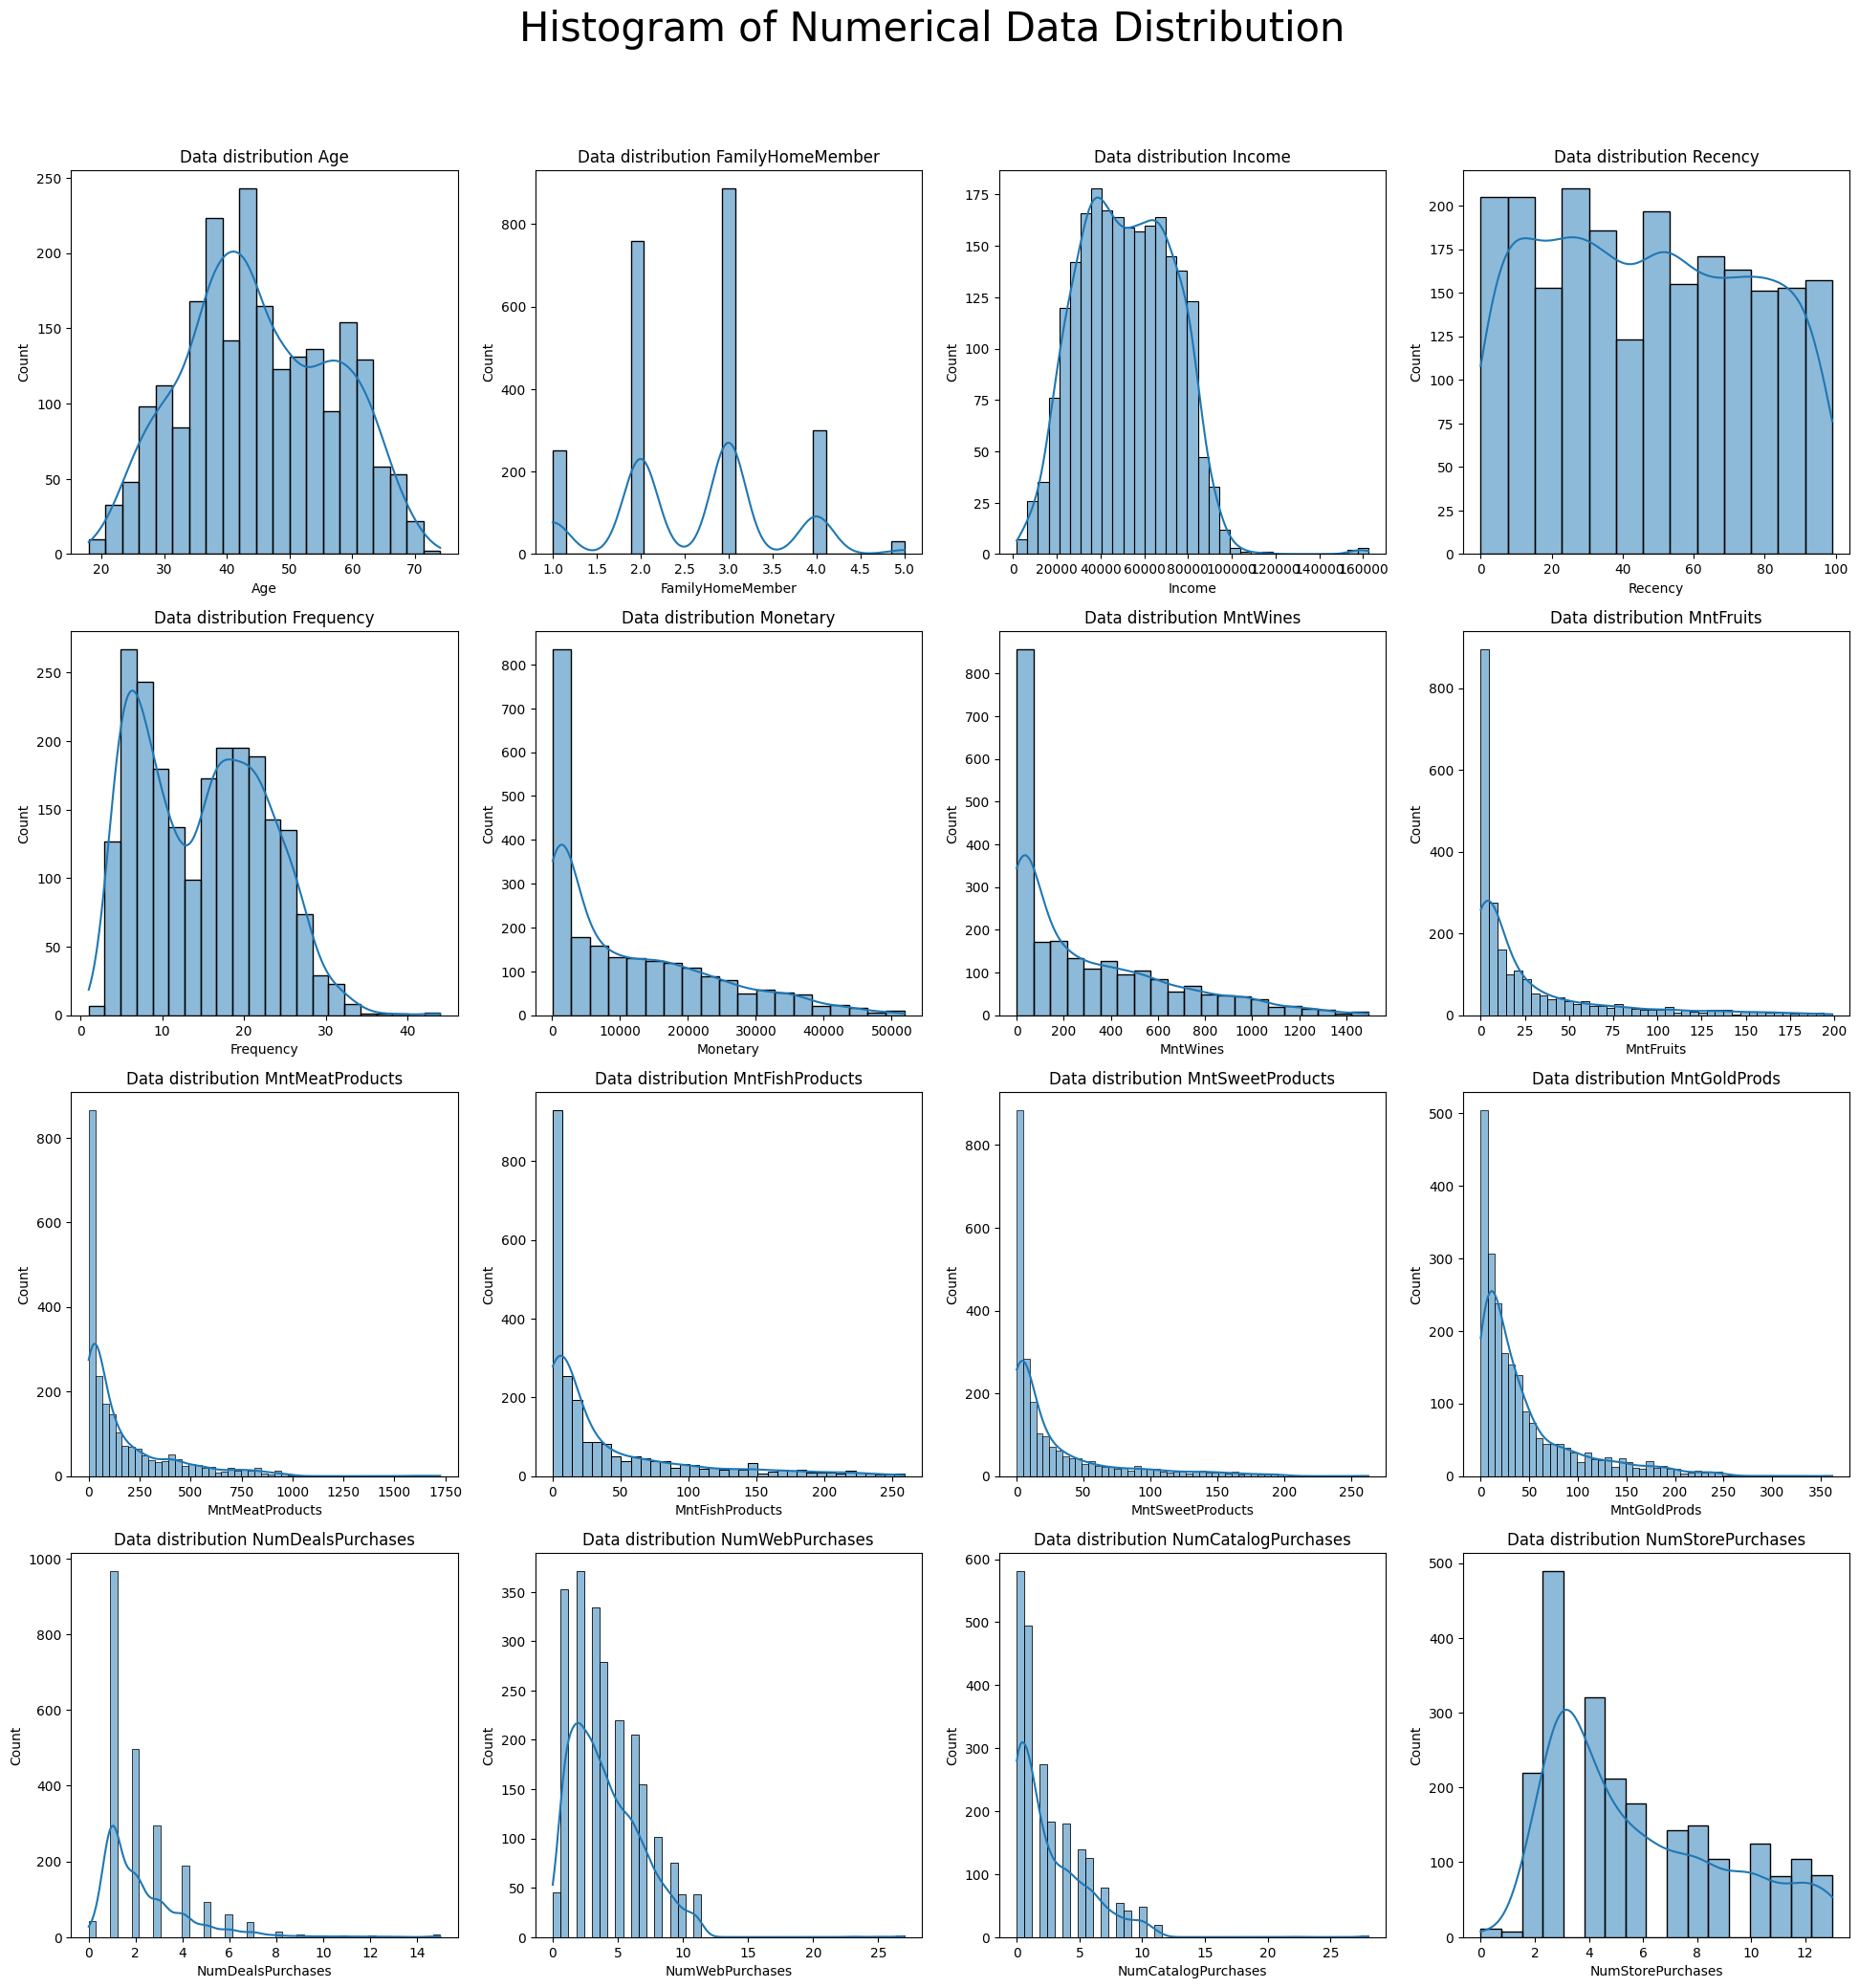

In [471]:
listKolomclean = ['Age','FamilyHomeMember','Income','Recency','Frequency','Monetary','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','PromoReceived']
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,24))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==19 :
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.histplot(data=data_merge, x=listKolomclean[kolom], kde=True)
            plt.title(f'Data distribution {listKolomclean[kolom]}')
            kolom+=1

plt.suptitle('Histogram of Numerical Data Distribution', size=30, y=0.95)
plt.show()

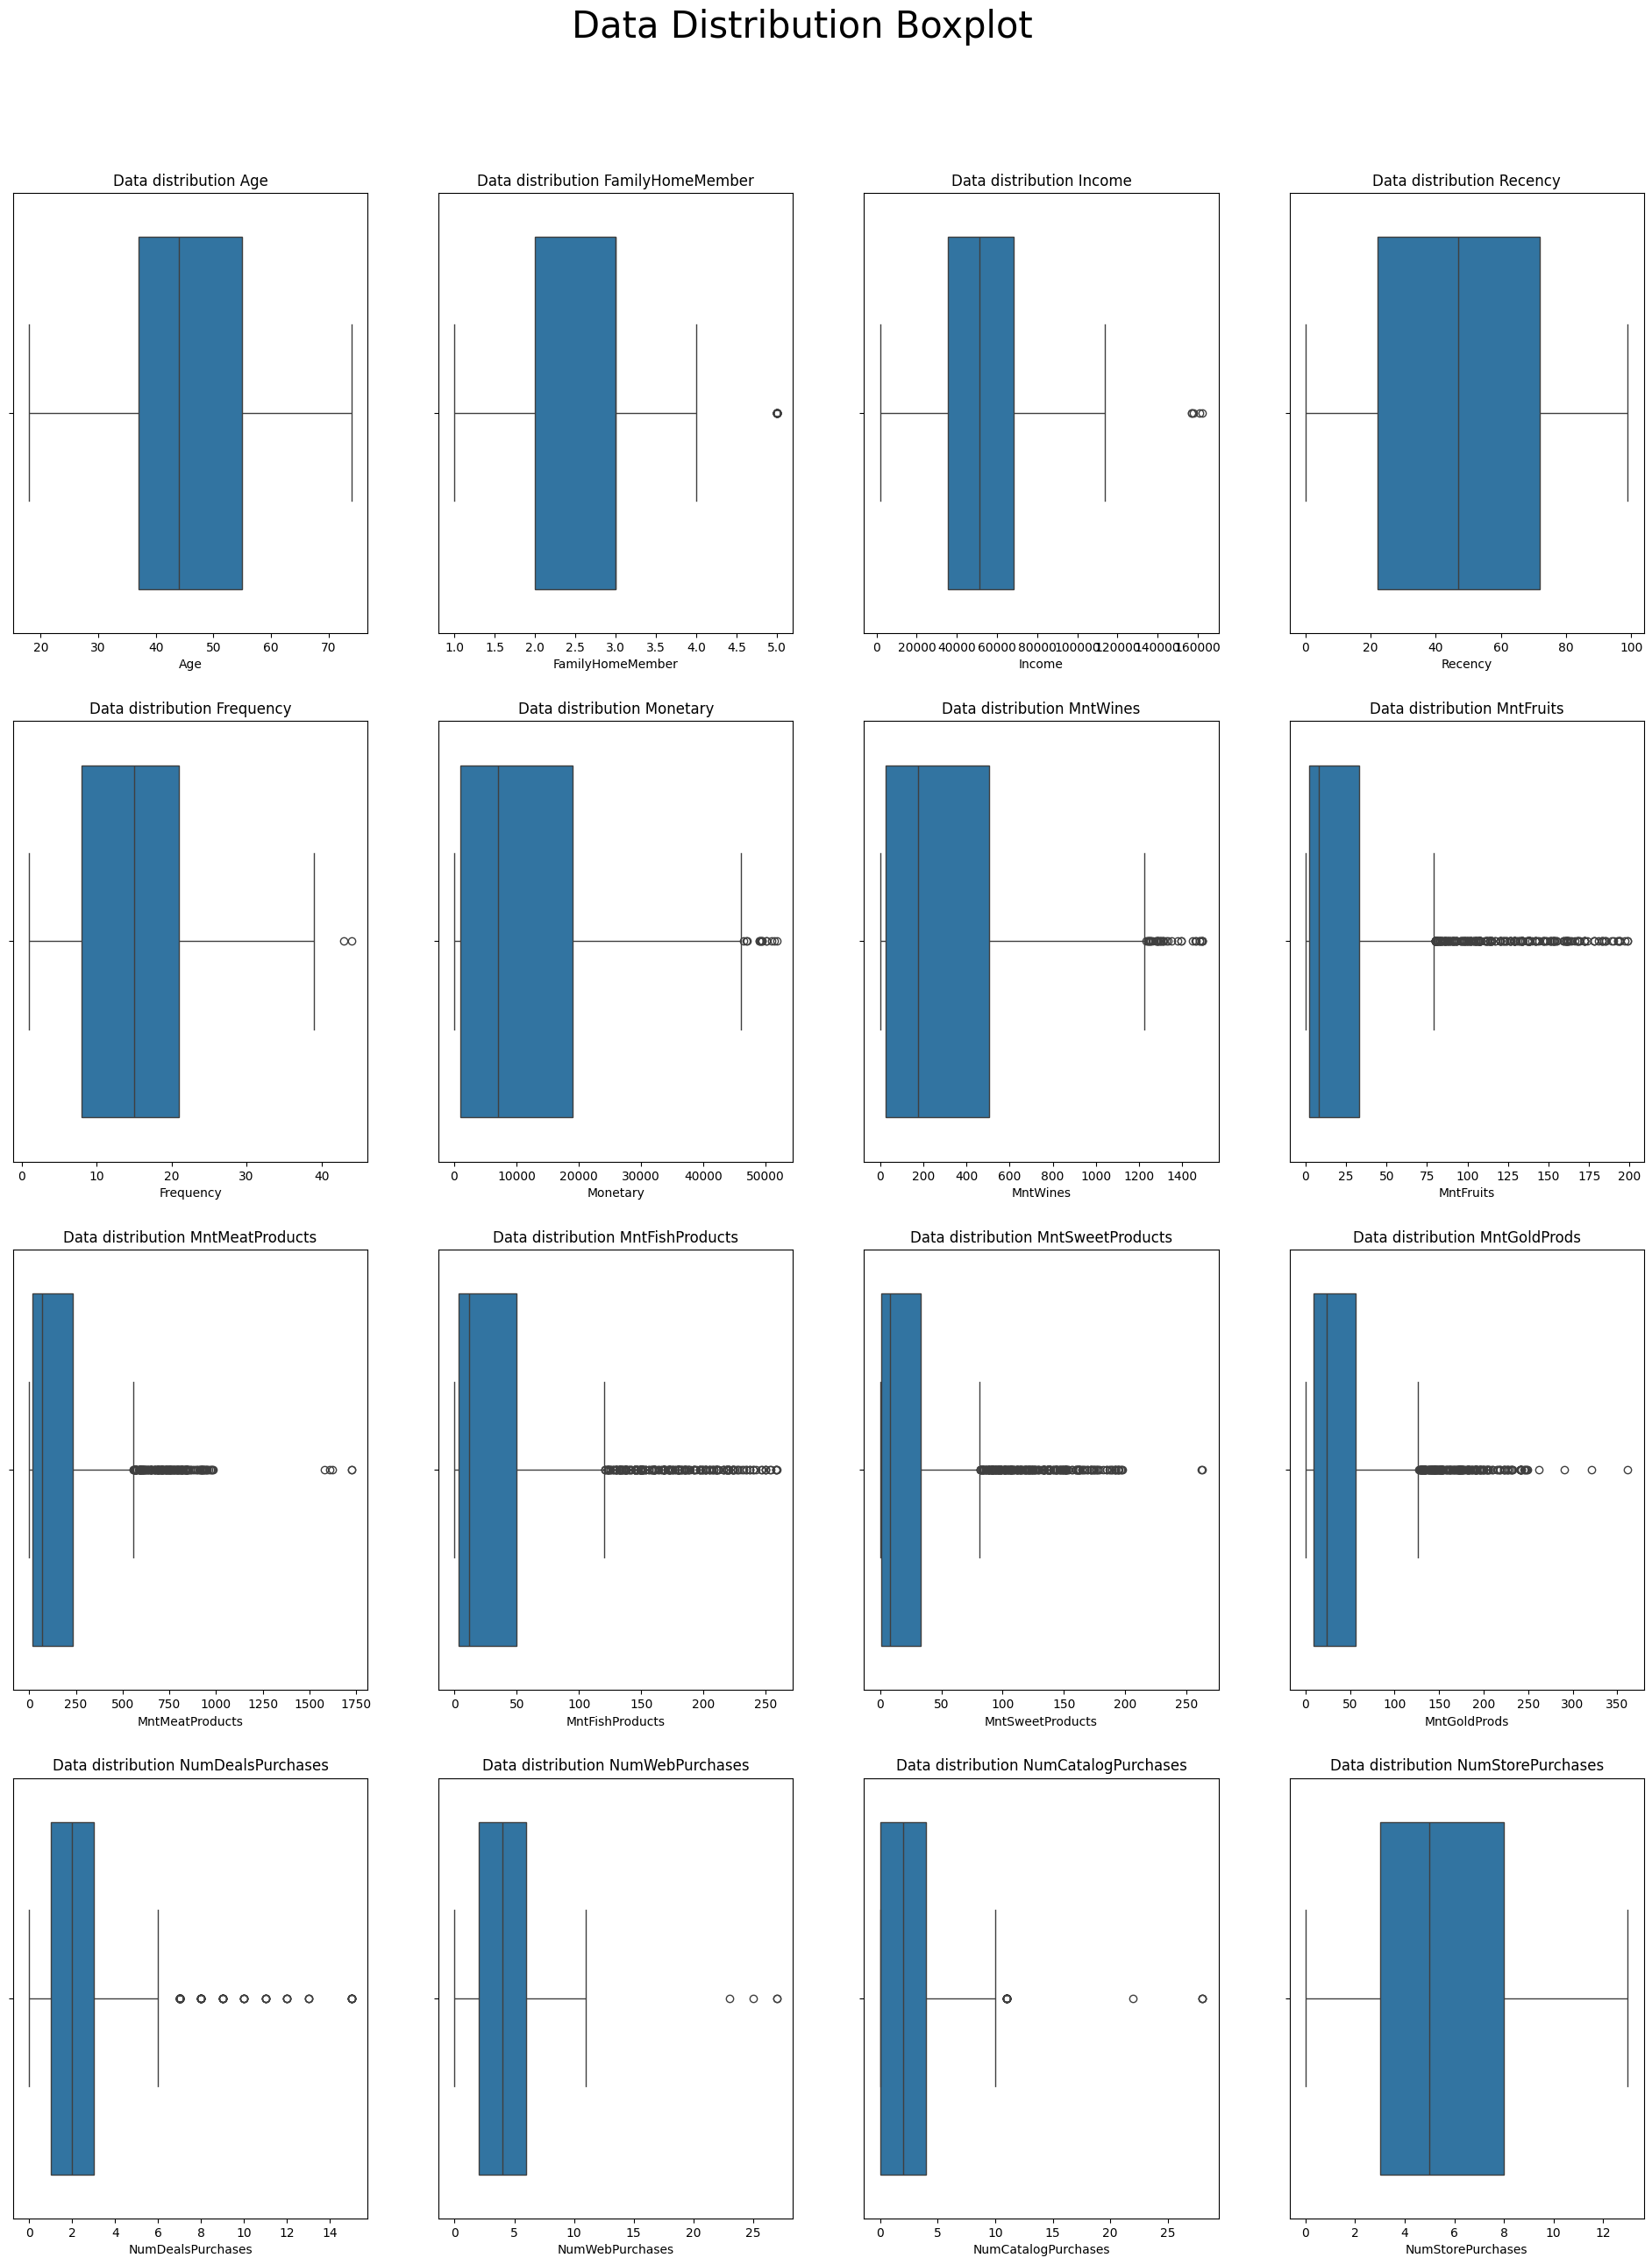

In [472]:
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,30))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==20 :
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.boxplot(data=data_merge, x=listKolomclean[kolom])
            plt.title(f'Data distribution {listKolomclean[kolom]}')
            kolom+=1

plt.suptitle('Data Distribution Boxplot', size=30, y=0.95)
plt.show()

## STATISTICAL TEST

In [473]:
# Fetch only numeric columns
numeric_columns = data_merge.select_dtypes(include=[np.number]).columns

In [474]:
# Function to test normality
def normality_tests(data):
    results = {}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p_value)

    # Liliefors Test
    lilliefors_stat, lilliefors_p_value = lilliefors(data)
    results['Liliefors Test'] = (lilliefors_stat, lilliefors_p_value)

    # Shapiro-Wilk Test
    sw_stat, sw_p_value = stats.shapiro(data)
    results['Shapiro-Wilk'] = (sw_stat, sw_p_value)

    # D'Agostino and Pearson's Test
    dagostino_stat, dagostino_p_value = stats.normaltest(data)
    results['D\'Agostino Pearson'] = (dagostino_stat, dagostino_p_value)

    return results

# Function to determine normality based on p-value
def check_normality(p_value):
    if p_value > 0.05:
        return "Normal"
    else:
        return "Not Normal"

# Loop to test each numeric column
for column in numeric_columns:
    print(f"RESULTS FOR {column}:")
    results = normality_tests(data_merge[column])  # Removing missing values
    for test, (stat, p_value) in results.items():
        normality_status = check_normality(p_value)
        print(f"{test} - Statistic: {stat:.4f}, p-value: {p_value:.4f} -> {normality_status}")
    print("\n")

RESULTS FOR ID:
Kolmogorov-Smirnov - Statistic: 0.9991, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0611, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9541, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 1657.9192, p-value: 0.0000 -> Not Normal


RESULTS FOR Year_Birth:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0578, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9834, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 185.9809, p-value: 0.0000 -> Not Normal


RESULTS FOR Age:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0578, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9834, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 185.9809, p-value: 0.0000 -> Not Normal


RESULTS FOR Income:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.

## GLOBAL DEMOGRAPHICS

1. General Customer Characteristics:

 - Age:
Year_Birth and Age provide an overview of the age group of customers.
Age_Range helps classify age for easier segmentation analysis.
Education: Education shows the education level of customers.
Marital Status: Marital_Status describes the family status of customers (single, married, etc.).

 - Income:
Income provides information on the amount of income.
IncomeCategory groups customers based on income range.

2. Family Structure:

 - Family Members at Home:
Kidhome (young children at home) and Teenhome (teenagers at home).
FamilyHomeMember gives the total family members at home.

3. Loyalty and Relationship Duration:

 - Join Date: Dt_Customer shows when the customer became a customer.
Relationship Duration: JoinedTime(days) counts the days since joining.
Last Interacted: Recency (how many days since the last interaction with the customer).

4. Shopping and Spending Behavior:

 - Total Spending:
Monetary gives the total spending of the customer.

 - Specific spending in categories such as:
     - Wine: MntWines and WinesExpense.
     - Fruits: MntFruits and FruitsExpense.
     - Meat: MntMeatProducts and MeatExpense.
     - Fish: MntFishProducts and FishExpense.
     - Sweets: MntSweetProducts and SweetExpense.
     - Gold Products: MntGoldProds and GoldExpense.
 - Purchase Frequency:
   - Purchases by channel: NumWebPurchases, NumCatalogPurchases, and NumStorePurchases.
 - Total purchases on promotions or discounts: NumDealsPurchases.
Frequency shows the total frequency of shopping.

5. Promotion Acceptance:

 - Promotion Acceptance:
Marketing campaigns accepted: AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5.
PromoReceived and PromoAcceptedCat provide analysis of promotions received and accepted.
Offer Response: Response reflects the level of engagement with the promotion.

6. Customer Satisfaction:

 - Complaint: Complain indicates whether the customer has ever filed a complaint.

7. Segmentation and Scoring:

 - RFM Analysis:
RFM_Score, R_Score, F_Score, and M_Score help analyze based on:
     - Recency: Distance from last interaction.
     - Frequency: Frequency of shopping.
    - Monetary: Value of shopping.

 - FM_Score combines Frequency and Monetary for more specific segmentation.

 - Customer Segmentation:
Customer_Segment classifies customers based on habits and characteristics.

8. Digital Interactions:

 - Website Visits: NumWebVisitsMonth shows the number of visits to the website.

In [475]:
data_merge.columns

Index(['ID', 'Year_Birth', 'Age', 'Age_Range', 'Education', 'Marital_Status',
       'Income', 'IncomeCategory', 'Kidhome', 'FamilyHomeMember', 'Teenhome',
       'Dt_Customer', 'JoinedTime(days)', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'WinesExpense', 'FruitsExpense', 'MeatExpense',
       'FishExpense', 'SweetExpense', 'GoldExpense', 'Monetary',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'Frequency', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'PromoReceived', 'PromoAcceptedCat', 'Complain', 'Response'],
      dtype='object')

### GENERAL CUSTOMER CHARACTERISTICS

#### GENERATION

In [476]:
# Count the number of customers in each age category
age_range_counts = data_merge['Age_Range'].value_counts()
age_range_counts

Age_Range
Millennials     937
Gen X           831
Baby Boomers    314
Gen Z           147
Name: count, dtype: int64

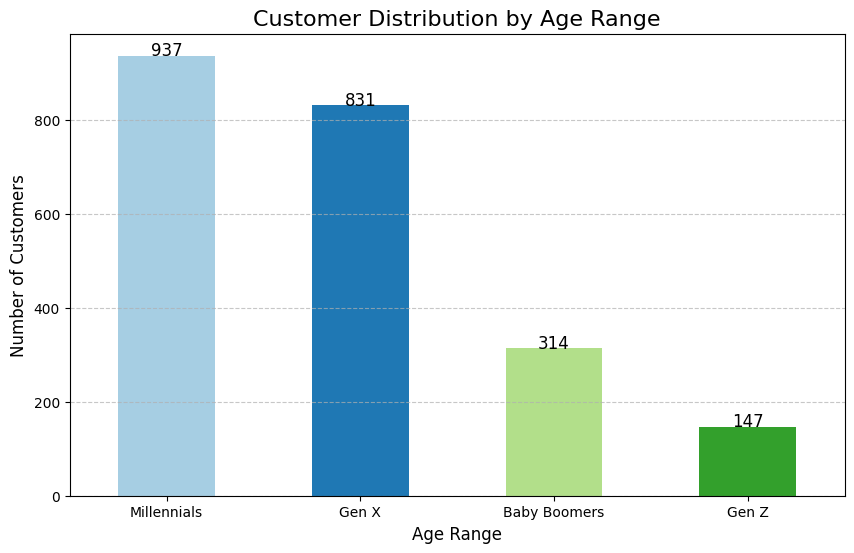

In [477]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = age_range_counts.plot(kind='bar', color=plt.cm.Paired(range(len(age_range_counts))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Customer Distribution by Age Range', fontsize=16)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('Age_Range.png')
plt.show()

The data provided represents the distribution of people across different generational age groups. Here’s an analysis of the information:

1. Millennials (937 people):

 - The Millennials group has the largest representation, with 937 individuals. This suggests that Millennials form the largest portion of the population in this dataset. Millennials, typically aged 25-40, are a key demographic in consumer markets, likely to be engaged in a variety of purchasing behaviors, from online shopping to experience-based purchases.

2. Gen X (831 people):

 - The Gen X group has 831 individuals. This group is slightly smaller than Millennials, but still significant. Gen X, usually aged 41-56, is often characterized by a strong work ethic and financial stability. They may have purchasing power and are likely to focus on value-driven purchases or investments.

3. Baby Boomers (314 people):

 - The Baby Boomers group has 314 individuals, which is a smaller portion compared to Millennials and Gen X. Baby Boomers, typically aged 57-75, may be less active in online shopping but could still have significant purchasing power, particularly in health-related products, luxury items, and home goods.

4. Gen Z (147 people):

 - The Gen Z group has the smallest representation with 147 individuals. Gen Z, typically aged 18-24, is the youngest generation in the dataset. While they are tech-savvy and active online, their smaller number might reflect a lower purchasing volume or more selective purchasing behaviors, as many in this generation are still in school or early stages of their careers.

Summary:

Millennials represent the largest group, indicating their prominence in the market and their strong purchasing power.
Gen X follows closely behind, suggesting they are also an important demographic with a considerable impact on spending.
Baby Boomers, though smaller in number, likely hold significant purchasing power due to their age and accumulated wealth, particularly for certain product categories.
Gen Z has the smallest group, which could be due to their younger age or still-developing financial independence. However, they are still important for brands targeting younger, digitally native customers.

#### EDUCATION

In [478]:
# Count the number of customers in each age category
education_value = data_merge['Education'].value_counts()
education_value

Education
Bachelor      1120
Master         571
Doctoral       484
Non-degree      54
Name: count, dtype: int64

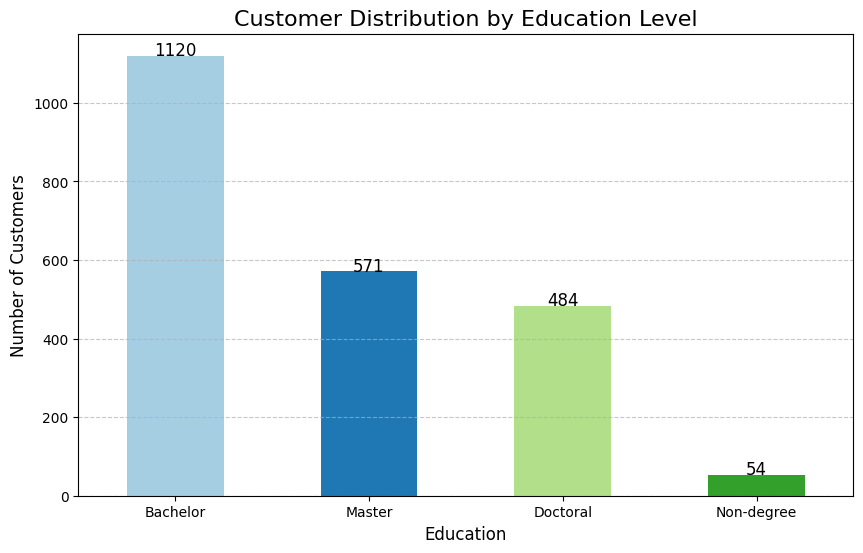

In [479]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = education_value.plot(kind='bar', color=plt.cm.Paired(range(len(education_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Customer Distribution by Education Level', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Save the image
plt.savefig('Education.png')
plt.show()

The data provided represents the distribution of people across different education levels. Here's the analysis of the information:

1. Bachelor's Degree (1120 people):

 - The Bachelor's Degree group has the largest representation, with 1120 individuals. This indicates that the majority of people in the dataset have completed a Bachelor's degree. This group is likely to have a broad range of professions, many of whom may be early in their careers or already in mid-level professional roles. They are an important demographic for industries targeting a well-educated, working population.

2. Master's Degree (571 people):

 - The Master's Degree group has 571 individuals. This is the second-largest group, reflecting that a significant portion of the population has pursued advanced education beyond the Bachelor's level. People with Master's degrees are likely to be in specialized or higher-level positions within their careers, and they may have higher earning potential and purchasing power compared to those with only a Bachelor's degree.

3. Doctoral Degree (484 people):

 - The Doctoral Degree group has 484 individuals. While this group is smaller than those with Bachelor's or Master's degrees, it still represents a notable portion of the population. Doctoral degree holders are typically in research, academia, or high-level specialized roles. This group may have a more focused range of consumer interests, especially in areas like education, research tools, and high-end professional services.

4. Non-degree (54 people):

 - The Non-degree group has 54 individuals, the smallest representation in this dataset. This group likely includes people who did not complete formal higher education, but may still be successful in their careers or involved in technical, entrepreneurial, or hands-on fields. Despite its smaller size, this group could still hold specific purchasing power depending on their industry or role.

Summary:

Bachelor's Degree holders make up the largest portion of the dataset, highlighting a well-educated workforce with diverse professional opportunities.
Master's Degree holders are the second-largest group, likely contributing to higher-paying roles and specialized industries.
Doctoral Degree holders represent a smaller but highly specialized and influential demographic, often in leadership, research, or academic positions.
Non-degree holders, though smaller in number, may still represent a niche market with distinct needs and interests, particularly in technical or trade professions.

#### MARITAL STATUS

In [480]:
# Count the number of customers in each age category
marital_status_value = data_merge['Marital_Status'].value_counts()
marital_status_value

Marital_Status
Married         863
Cohabitation    577
Single          485
Divorced        304
Name: count, dtype: int64

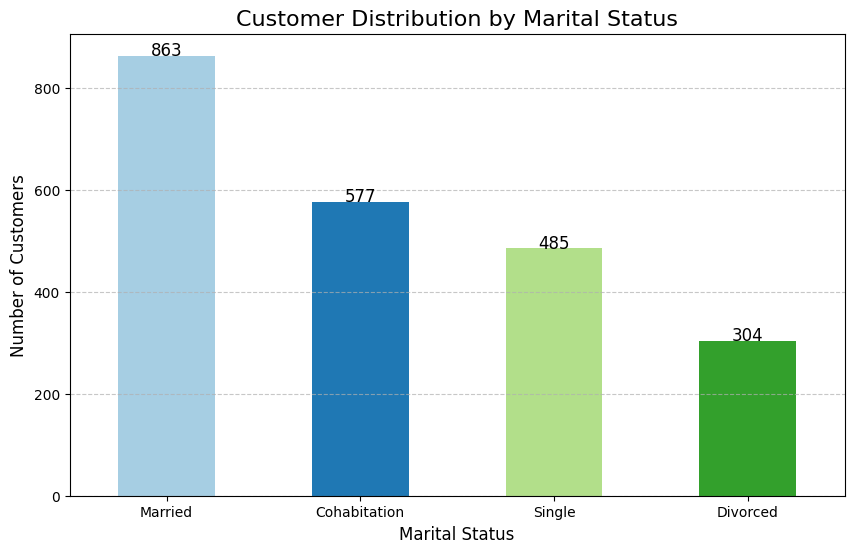

In [481]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = marital_status_value.plot(kind='bar', color=plt.cm.Paired(range(len(marital_status_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Customer Distribution by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Save the image
plt.savefig('Marital_Status.png')
plt.show()

The data provided represents the distribution of people across different marital statuses. Here's an analysis of the information:

1. Married (863 people):

 - The Married group has the largest representation, with 863 individuals. This suggests that a significant portion of the population is married. Married individuals may represent a demographic with more established household structures and purchasing behaviors, often involving family-oriented products, home goods, and long-term financial planning.

2. Cohabitation (577 people):

 - The Cohabitation group has 577 individuals. This indicates that a notable portion of the population is living together in a relationship without formal marriage. This group may have similar purchasing behaviors to married individuals, but without the legal and societal structures of marriage. They could be interested in products and services related to home living, entertainment, or shared financial goals.

3. Single (485 people):

 - The Single group has 485 individuals. This suggests that a significant number of individuals are not currently in a committed relationship. Single individuals may have different purchasing patterns, focusing more on personal needs, leisure activities, travel, or products that cater to individual lifestyles.

4. Divorced (304 people):

 - The Divorced group has 304 individuals. This group is the smallest in terms of marital status, but it still represents a significant portion of the population. Divorced individuals may have different purchasing behaviors, such as focusing on personal development, new living arrangements, or re-establishing financial independence after a divorce.

Summary:

Married individuals make up the largest group, which could indicate a stable and family-oriented customer base with a focus on home, family, and long-term financial products.
Cohabiting individuals, while slightly fewer than married ones, also represent a large group with potential purchasing behaviors similar to married people.
Single individuals, though a significant portion, might have different consumption patterns, often centered around personal choices, entertainment, or travel.
Divorced individuals form the smallest group but still represent a niche market with distinct needs related to personal recovery, new living situations, and independence.

#### INCOME CATEGORY

In [482]:
# Count the number of customers in each age category
income_value = data_merge['IncomeCategory'].value_counts()
income_value

IncomeCategory
Upper           577
Lower-Middle    551
Lower           551
Upper-Middle    550
Name: count, dtype: int64

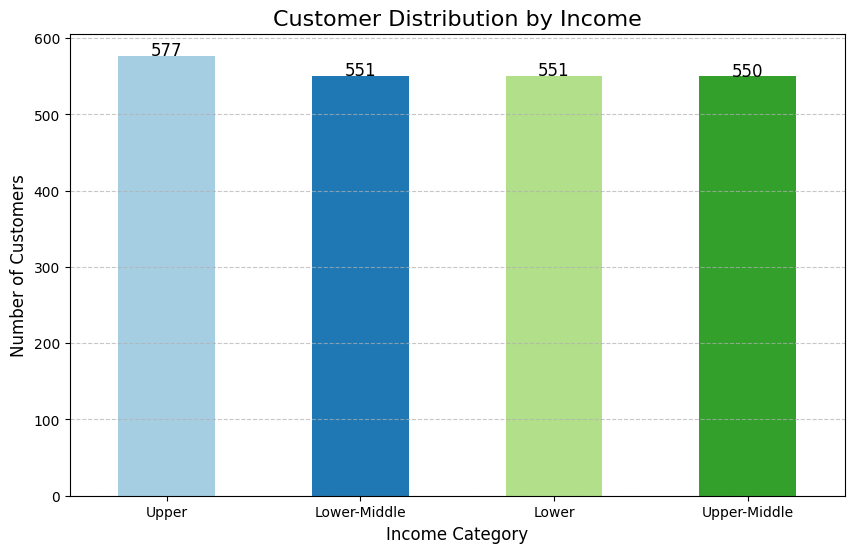

In [483]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = income_value.plot(kind='bar', color=plt.cm.Paired(range(len(income_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Customer Distribution by Income', fontsize=16)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Save the image
plt.savefig('IncomeCategory.png')
plt.show()

The data provided represents the distribution of people across different income categories. Here's the analysis of the information:

1. Upper Income Category (577 people):

 - The Upper income category has the largest representation, with 577 individuals. This group likely includes people with high purchasing power and disposable income. They may have more influence on consumer markets, focusing on luxury goods, high-end services, investment products, and premium experiences.

2. Lower-Middle Income Category (551 people):

 - The Lower-Middle income category has 551 individuals. This group represents a substantial portion of the population. People in this category typically have a moderate level of disposable income, and their purchasing behaviors might focus on value-for-money products, practical household goods, and affordable luxury.

3. Lower Income Category (551 people):

 - The Lower income category also has 551 individuals, the same as the Lower-Middle category. This suggests that a similar proportion of people fall into this income group, which often has more limited purchasing power. Consumers in this group might prioritize basic necessities and affordable products, and could be more price-sensitive.

4. Upper-Middle Income Category (550 people):

 - The Upper-Middle income category has 550 individuals, slightly smaller than the Upper category. This group represents people with a strong income level, though not at the top tier. They may have some disposable income for higher-quality goods and services, but may also be more value-conscious compared to the Upper income group.

Summary:

Upper income individuals are the largest group, representing people with significant purchasing power and a focus on luxury goods and services.
Lower-Middle and Lower income categories have the same number of people, indicating that a large portion of the population has moderate to low incomes. These individuals are likely focused on practical, everyday products and services.
Upper-Middle income individuals, although slightly smaller in number than the Upper group, are still an influential demographic with a focus on quality products, but are typically more budget-conscious than the Upper income group.

### FAMILY STRUCTURE

#### KIDHOME

In [484]:
# Count the number of customers in each age category
Kidhome_value = data_merge['Kidhome'].value_counts()
Kidhome_value

Kidhome
0    1286
1     895
2      48
Name: count, dtype: int64

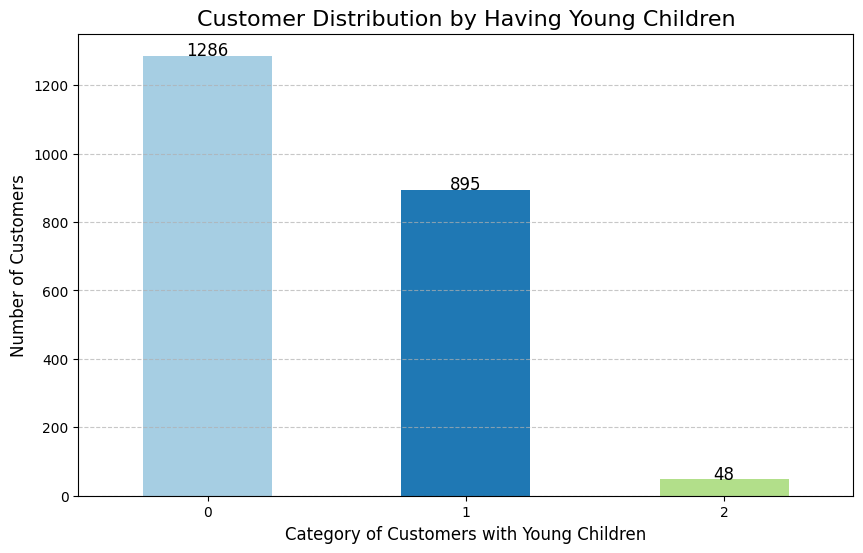

In [485]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = Kidhome_value.plot(kind='bar', color=plt.cm.Paired(range(len(Kidhome_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Customer Distribution by Having Young Children', fontsize=16)
plt.xlabel('Category of Customers with Young Children', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Save the image
plt.savefig('Kidhome.png')
plt.show()

The data provided represents the distribution of people with children at home (Kidhome) in the dataset. Here's the analysis of the information:

1. 0 Kids at Home (1286 people):

 - The 0 Kids at Home group has the largest representation, with 1286 individuals. This suggests that a significant portion of the population in the dataset does not have children living at home. These individuals may have different purchasing behaviors compared to those with children, focusing more on personal needs, travel, leisure, and perhaps higher discretionary spending.

2. 1 Kid at Home (895 people):

 - The 1 Kid at Home group has 895 individuals. This is the second-largest group, indicating that many people in the dataset have one child living at home. Families in this category may prioritize products and services related to child care, education, family-oriented goods, and products that cater to the needs of both parents and children.

3. 2 Kids at Home (48 people):

 - The 2 Kids at Home group has 48 individuals, which is much smaller than the other two groups. This suggests that the number of families with two children in the dataset is relatively low. Families with two children may have different needs compared to those with one or no children, focusing on larger family products, additional child-focused services, or educational support for multiple children.

Summary:

0 Kids at Home individuals make up the largest group, indicating that the majority of the population does not have children at home, which could influence their focus on individual or couple-based purchasing behaviors.
1 Kid at Home is the second-largest group, representing families with one child. This group likely has purchasing needs related to parenting, child care, and family-friendly products and services.
2 Kids at Home is the smallest group, with a more niche demographic, possibly focusing on larger family goods, education, or products that cater to households with multiple children.

#### TEENHOME

In [486]:
# Count the number of customers in each age category
Teenhome_value = data_merge['Teenhome'].value_counts()
Teenhome_value

Teenhome
0    1152
1    1025
2      52
Name: count, dtype: int64

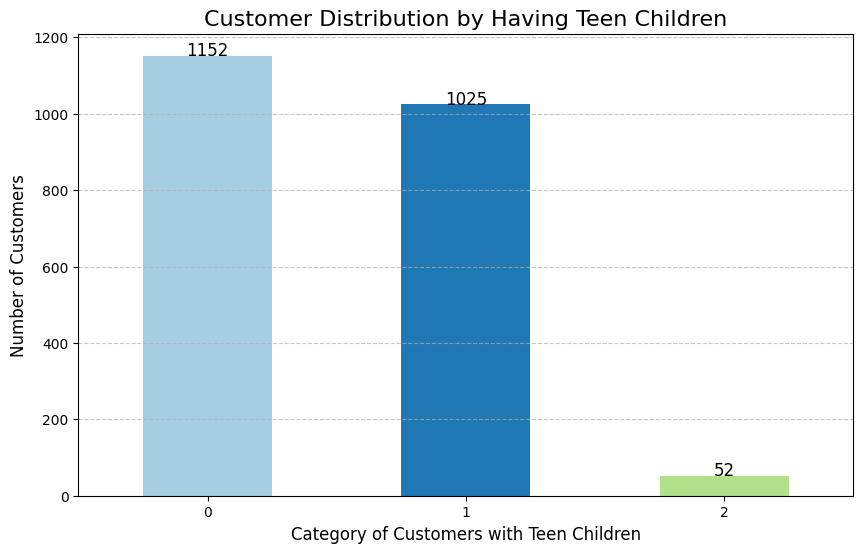

In [487]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = Teenhome_value.plot(kind='bar', color=plt.cm.Paired(range(len(Teenhome_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Customer Distribution by Having Teen Children', fontsize=16)
plt.xlabel('Category of Customers with Teen Children', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Save the image
plt.savefig('Teenhome.png')
plt.show()

The data provided represents the distribution of people with teenagers at home (Teenhome) in the dataset. Here's the analysis of the information:

1. 0 Teenagers at Home (1152 people):

 - The 0 Teenagers at Home group has the largest representation, with 1152 individuals. This suggests that a significant portion of the population does not have teenagers living at home. People in this group are likely to have different purchasing behaviors, with a focus on products and services that cater to personal or couple needs, rather than those tailored for teenagers.

2. 1 Teenager at Home (1025 people):

 - The 1 Teenager at Home group has 1025 individuals. This is the second-largest group, indicating that many individuals in the dataset have one teenager at home. Families in this group may prioritize products and services related to teenagers, such as education, technology, clothing, and entertainment targeted at this age group. This group might also have unique needs around preparing teenagers for adulthood and college.

3. 2 Teenagers at Home (52 people):

 - The 2 Teenagers at Home group has 52 individuals, the smallest group in the dataset. This indicates that families with two teenagers are relatively rare in this dataset. These families may face specific purchasing challenges or needs related to managing the expenses of multiple teenagers, including items such as clothing, education, extracurricular activities, and technology.

Summary:

0 Teenagers at Home individuals make up the largest group, representing people without teenagers in their household. Their purchasing decisions are likely more focused on personal or couple-centric needs.
1 Teenager at Home represents a significant portion of the population and may focus on products and services designed for the teenage demographic, including education, technology, and fashion.
2 Teenagers at Home represents the smallest group, focusing on family needs related to managing multiple teenagers, which could include larger household expenses, education, and lifestyle choices for adolescents.

#### FAMILY HOME MEMBER

In [488]:
# Count the number of customers in each age category
FamilyHomeMember_value = data_merge['FamilyHomeMember'].value_counts()
FamilyHomeMember_value

FamilyHomeMember
3    887
2    758
4    300
1    252
5     32
Name: count, dtype: int64

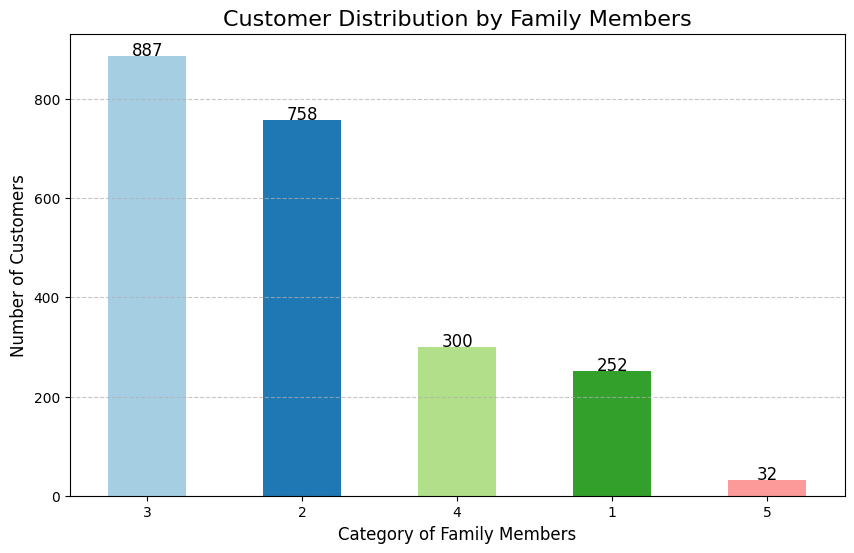

In [489]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = FamilyHomeMember_value.plot(kind='bar', color=plt.cm.Paired(range(len(FamilyHomeMember_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Customer Distribution by Family Members', fontsize=16)
plt.xlabel('Category of Family Members', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Save the image
plt.savefig('FamilyHomeMember.png')
plt.show()

The data provided represents the distribution of people based on the number of family members at home (FamilyHomeMember). Here's the analysis of the information:

1. 3 Family Members at Home (887 people):

 - The 3 Family Members at Home group is the largest, with 887 individuals. This indicates that a significant portion of the population in this dataset has a small family structure, typically with parents and one child. This group is likely to make purchasing decisions that reflect a small, close-knit family, with needs for family-oriented products, including food, entertainment, and child-related goods.

2. 2 Family Members at Home (758 people):

 - The 2 Family Members at Home group has 758 individuals. This is the second-largest group, representing people who may have couples or a parent and a child living together. Their purchasing decisions may lean toward products that cater to two people, such as home appliances, groceries, and lifestyle items for couples or small families.

3. 4 Family Members at Home (300 people):

 - The 4 Family Members at Home group has 300 individuals. This suggests a family structure with parents and two children. This group is likely to have different purchasing needs, such as larger family-sized products, multi-child educational services, and items like family cars, larger living spaces, and home entertainment.

4. 1 Family Member at Home (252 people):

 - The 1 Family Member at Home group has 252 individuals. This indicates a smaller segment of the population living alone. These individuals are likely to focus on products that cater to single-person households, such as personal care items, small living appliances, or products designed for single lifestyles.

5. 5 Family Members at Home (32 people):

 - The 5 Family Members at Home group is the smallest, with 32 individuals. This group represents larger families, possibly with parents and three children. Purchasing needs for this group might include bulk purchases, family-sized items, and services related to managing larger households, such as childcare, education, and family vacations.

Summary:

3 Family Members at Home is the largest group, which could indicate a prevalence of nuclear families with one child, likely focusing on family-oriented products and services.
2 Family Members at Home represents couples or smaller households, likely with a focus on products for two people, such as home goods, lifestyle products, and couple-related services.
4 Family Members at Home households are smaller but significant, representing families with two children who may require larger household products, educational support, and family-sized services.
1 Family Member at Home represents individuals living alone, with likely purchasing behavior centered around personal items and services.
5 Family Members at Home is the smallest group, but represents larger families that may need bulk items, educational services, and larger family-oriented solutions.

### SHOPPING AND SPENDING BEHAVIOR

#### LAST SHOPPING

In [490]:
data_merge['Recency'].value_counts()

Recency
56    36
3     33
49    32
2     31
30    30
      ..
41    14
59    14
58    14
44    12
99    10
Name: count, Length: 100, dtype: int64

In [491]:
def Recency_group(row):
    # Recency (within the appropriate range)
    if row['Recency'] <= 9:
        return '0-9'
    elif row['Recency'] <= 19:
        return '10-19'
    elif row['Recency'] <= 29:
        return '20-29'
    elif row['Recency'] <= 39:
        return '30-39'
    elif row['Recency'] <= 49:
        return '40-49'
    elif row['Recency'] <= 59:
        return '50-59'
    elif row['Recency'] <= 69:
        return '60-69'
    elif row['Recency'] <= 79:
        return '70-79'
    elif row['Recency'] <= 89:
        return '80-89'
    elif row['Recency'] <= 99:
        return '90-99'
    else:
        return '100 or more'


# Assuming rfm_df is an existing DataFrame, for example:
# rfm_df = pd.read_csv('data.csv') # Data with 'Recency', 'Frequency', 'Monetary' columns

# Applying the Recency_group function to the rfm_df DataFrame and creating the 'Group_Recency' column
data_merge['Group_Recency'] = data_merge.apply(Recency_group, axis=1)

In [492]:
grouprecency_counts = data_merge['Group_Recency'].value_counts()
grouprecency_counts

Group_Recency
0-9      258
20-29    244
10-19    241
30-39    234
50-59    224
40-49    213
70-79    210
80-89    207
60-69    206
90-99    192
Name: count, dtype: int64

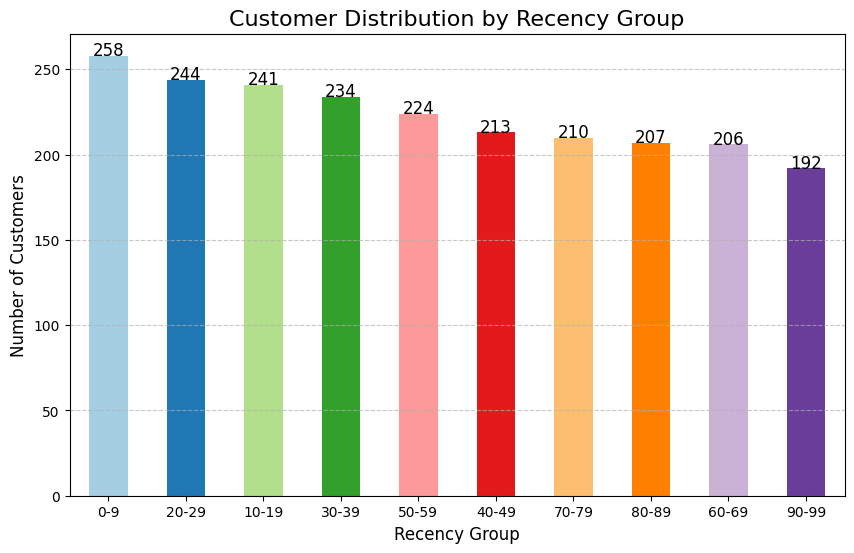

In [493]:
# Creating a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = grouprecency_counts.plot(kind='bar', color=plt.cm.Paired(range(len(grouprecency_counts))))

# Adding values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines by using `axis='x'`

# Adding title and labels
plt.title('Customer Distribution by Recency Group', fontsize=16)
plt.xlabel('Recency Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('Recency_group.png')
plt.show()

The data provided represents the distribution of people based on their recency group, categorized by the number of days since their last activity (Group_Recency). Here's the analysis of the information:

1. 0-9 Days (258 people):

 - The 0-9 days group has the largest representation, with 258 people. This indicates that the highest number of individuals are highly active, engaging in recent activity within the last 9 days. These individuals are likely the most engaged and responsive, making them an important target for marketing, promotions, or new product launches.

2. 20-29 Days (244 people):

 - The 20-29 days group follows closely with 244 individuals. This group represents people who have been inactive for a short period (20-29 days). They might still be engaged or interested, and targeting them with reminders, promotions, or re-engagement strategies could help bring them back to active status.

3. 10-19 Days (241 people):

 - The 10-19 days group has 241 individuals. Similar to the previous group, these individuals are relatively recent but not as immediate as those in the 0-9 days range. They are still worth targeting with content or offers that could rekindle their interest.

4. 30-39 Days (234 people):

 - The 30-39 days group has 234 individuals. This group shows moderate recency, with activity within the last month. They may need stronger incentives or targeted messaging to encourage re-engagement or remind them of the benefits they might be missing out on.

5. 50-59 Days (224 people):

 - The 50-59 days group has 224 people. These individuals have been inactive for a bit longer, but they are still within a reasonable period to be targeted with strategies that address potential reasons for their inactivity (e.g., offering new products, special deals, or reminders of past benefits).

6. 40-49 Days (213 people):

 - The 40-49 days group has 213 individuals. This group is slightly less engaged but still within a period where re-engagement could be effective. Tailored promotions or personalized offers might help bring them back.

7. 70-79 Days (210 people):

 - The 70-79 days group has 210 individuals. These individuals are approaching a longer period of inactivity. Strategies to reactivate this group could include loyalty rewards, re-engagement emails, or exclusive offers to bring them back into active status.

8. 80-89 Days (207 people):

 - The 80-89 days group has 207 people. This group is nearing a longer stretch of inactivity, and it may require more personalized or compelling reasons to return, such as discounts, new features, or product updates.

9. 60-69 Days (206 people):

 - The 60-69 days group has 206 individuals. Similar to the 70-79 days group, these individuals have been inactive for some time and may need more attention or incentives to re-engage with the service or product.

10. 90-99 Days (192 people):

 - The 90-99 days group has the smallest representation, with 192 people. These individuals have been inactive for a significant amount of time. It might require more intensive efforts, such as personalized outreach, special promotions, or an update on new offerings, to bring them back into the fold.

Summary:

The 0-9 days group is the most recent and the most active, representing individuals who are highly engaged.
The groups from 10-29 days indicate recent activity and could benefit from gentle re-engagement tactics, such as promotions or reminders.
30-49 days and 50-59 days groups are still within a short-term window but may require more compelling offers to bring them back.
Individuals in the 60-99 days range represent longer-term inactivity. These people will likely need more personalized or incentive-driven re-engagement strategies to prompt a return.

#### SHOPPING FREQUENCY

In [494]:
data_merge

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2231  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2232   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2233   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2234   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2235   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

     IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
0      Upper-Middle        0                 1         0  2012-09-04   
1      Lower-Middle        1                 3         1  2014-03-08   
2             Upper        0                 2         0  2013-08-21   
3             Lower        1                 3         0  2014-02-10   
4      Upper-Middle        1                 3         0  2014-01-19   
...             ...      ...               ...       ...         ...   
2231   Upper-Middle        0                 3         1  2013-06-13   
2232   Upper-Middle        2                 5         1  2014-06-10   
2233   Upper-Middle        0                 1         0  2014-01-25   
2234          Upper        0                 3         1  2014-01-24   
2235   Upper-Middle        1                 4         1  2012-10-15   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
0                  663       58       635         88              546   
1                  113       38        11          1                6   
2                  312       26       426         49              127   
3                  139       26        11          4               20   
4                  161       94       173         43              118   
...                ...      ...       ...        ...              ...   
2231               381       46       709         43              182   
2232                19       19       406          0               30   
2233               155       91       908         48              217   
2234               156        8       428         30              214   
2235               622       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  WinesExpense  \
0                 172                88            88       20320.0   
1                   2                 1             6         352.0   
2                 111                21            42       13632.0   
3                  10                 3             5         352.0   
4                  46                27            15        5536.0   
...               ...               ...           ...           ...   
2231               42               118           247       27296.0   
2232                0                 0             8         160.0   
2233               32                12            24         288.0   
2234               80                30            61          96.0   
2235                2                 1            21       22688.0   

      FruitsExpense  MeatExpense  FishExpense  SweetExpense  GoldExpense  \
0             352.0       2730.0       1462.0        199.76        880.0   
1               4.0         30.0         17.0          2.27         60.0   
2             196.0        635.0        943.5         47.67        420.0   
3              16.0        100.0         85.0          6.81         50.0   
4             172.0        590.0        391.0         61.29        150.0 

In [495]:
# Calculate the grand total for each type of purchase
total_overall = {
    'NumDealsPurchases': data_merge['NumDealsPurchases'].median(),
    'NumWebPurchases': data_merge['NumWebPurchases'].median(),
    'NumCatalogPurchases': data_merge['NumCatalogPurchases'].median(),
    'NumStorePurchases': data_merge['NumStorePurchases'].median()
}

In [496]:
total_overall

{'NumDealsPurchases': 2.0,
 'NumWebPurchases': 4.0,
 'NumCatalogPurchases': 2.0,
 'NumStorePurchases': 5.0}

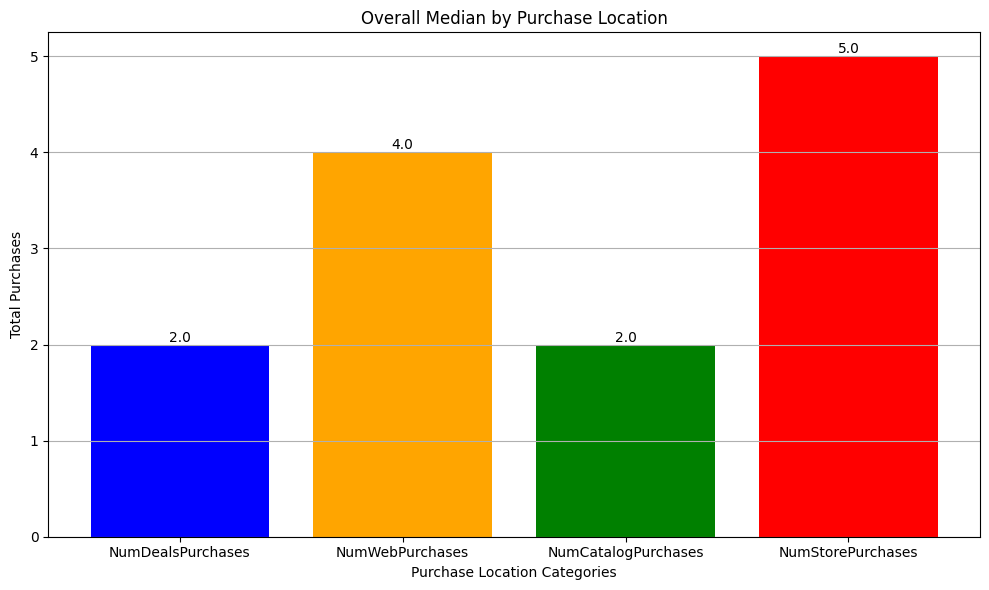

In [497]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(total_overall.keys(), total_overall.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Overall Median by Purchase Location')
plt.xlabel('Purchase Location Categories')
plt.ylabel('Total Purchases')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display values above the bars
for index, value in enumerate(total_overall.values()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('total_overall.png')
plt.show()

The data provided represents the median number of purchases made in each category: deals, web, catalog, and store. Here's the analysis of the information:

1. NumDealsPurchases (Median: 2.0):

 - The median number of purchases for deals is 2.0, indicating that, for many individuals, purchasing through deals is relatively low. This suggests that most customers tend to make only a few purchases with discounts or special offers. It implies that customers may not always seek out deals but do engage with them occasionally.

2. NumWebPurchases (Median: 4.0):

 - The median number of web purchases is 4.0, suggesting that, on average, customers tend to make a moderate number of purchases online. This is consistent with the growing trend of e-commerce, where people are increasingly making purchases via websites, with some customers making purchases more regularly.

3. NumCatalogPurchases (Median: 2.0):

 - The median number of catalog purchases is 2.0, similar to the number of deal purchases. This indicates that catalog shopping is less frequent compared to other channels. Catalogs may still play a role for some customers, but they are less commonly used as a primary shopping method compared to web or in-store purchases.

4. NumStorePurchases (Median: 5.0):

 - The median number of store purchases is 5.0, which is the highest of all categories. This indicates that in-store shopping remains the most popular purchasing method for the individuals in this dataset, with many people making purchases at physical stores more frequently than online, via catalogs, or through deals.

Summary:

In-store purchases are the most frequent, with a median of 5.0, indicating a strong preference for shopping in physical stores.
Web purchases are also common, with a median of 4.0, showing a significant shift toward online shopping.
Deals and catalog purchases have the lowest medians, 2.0, suggesting that while people engage with deals and catalogs, these channels are used less frequently compared to stores and web purchases.

#### EXPENDITURE

##### UNIT

In [499]:
# Calculate the grand total for each type of purchase
total_pengeluaran_overall = {
    'MntWines': data_merge['MntWines'].median(),
    'MntFruits': data_merge['MntFruits'].median(),
    'MntMeatProducts': data_merge['MntMeatProducts'].median(),
    'MntFishProducts': data_merge['MntFishProducts'].median(),
    'MntSweetProducts': data_merge['MntSweetProducts'].median(),
    'MntGoldProds': data_merge['MntGoldProds'].median()
}

In [500]:
total_pengeluaran_overall

{'MntWines': 176.0,
 'MntFruits': 8.0,
 'MntMeatProducts': 68.0,
 'MntFishProducts': 12.0,
 'MntSweetProducts': 8.0,
 'MntGoldProds': 24.0}

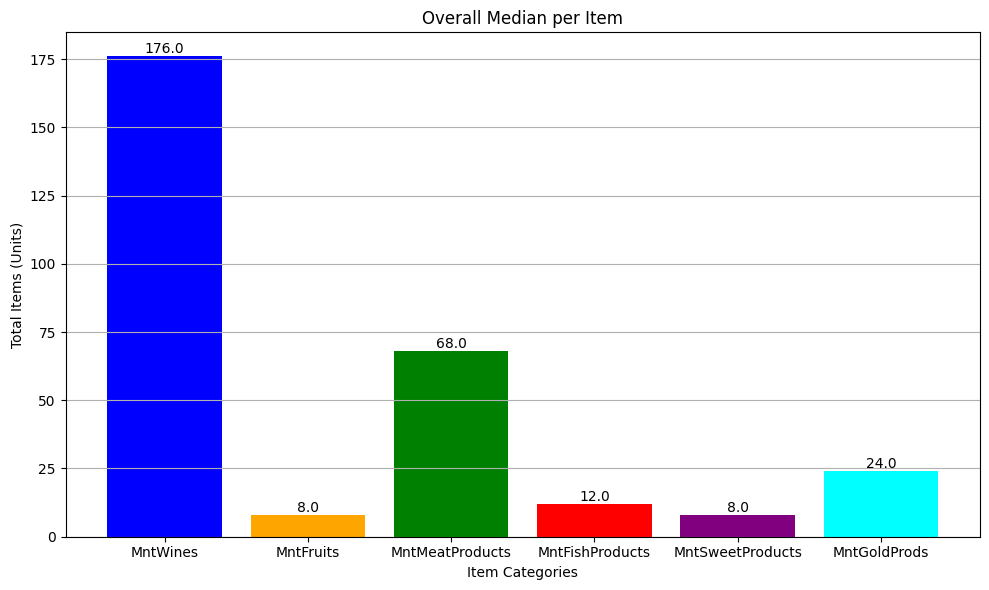

In [501]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(total_pengeluaran_overall.keys(), total_pengeluaran_overall.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.title('Overall Median per Item')
plt.xlabel('Item Categories')
plt.ylabel('Total Items (Units)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Displaying values above the bars
for index, value in enumerate(total_pengeluaran_overall.values()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('total_pengeluaran_champions2.png')
plt.show()

The data provided represents the median number of units purchased for various product categories. Here's the analysis of the information:

1. MntWines (Median: 176.0):

 - The median number of units purchased for wines is 176.0, which is the highest among the categories. This indicates that, for many customers, wine is purchased in larger quantities compared to other product categories. This could suggest that wine is a relatively popular and frequent purchase, possibly due to its usage in various social settings, gatherings, or regular consumption.

2. MntFruits (Median: 8.0):

 - The median number of fruit units purchased is 8.0. While this is much lower than wine, it still reflects a moderate level of purchase. This indicates that fruits are typically bought in smaller quantities, possibly due to perishability, seasonal availability, or customers purchasing only the amount they need at a time.

3. MntMeatProducts (Median: 68.0):

 - The median number of meat products purchased is 68.0, indicating a moderate level of purchases in this category. Meat products are likely bought in bulk for household use, but this is still lower than the wine purchases, reflecting the nature of the product (where bulk buying may be more common than smaller, frequent purchases).

4. MntFishProducts (Median: 12.0):

 - The median number of fish products purchased is 12.0, showing that fish products are bought in modest quantities. This could suggest that fish is consumed less frequently compared to other protein sources like meat, or that customers buy fish in small quantities, depending on their specific consumption habits.

5. MntSweetProducts (Median: 8.0):

 - The median number of sweet products purchased is 8.0, similar to fruits. This indicates that sweets are purchased in smaller quantities compared to wines or meat products. People may buy sweets less frequently or in limited amounts, likely for occasional consumption rather than regular use.

6. MntGoldProds (Median: 24.0):

 - The median number of gold products purchased is 24.0, which is relatively high compared to categories like fruits and sweets but significantly lower than wines. This suggests that gold products are less commonly purchased, but when they are bought, they tend to be in higher quantities, possibly for investment or special occasions.

Summary:

Wine purchases are the most frequent, with a median of 176 units, indicating that it is the most popular and commonly purchased product in this dataset.
Meat products have a moderate level of purchases (68 units), showing that people buy meat in decent quantities, likely for regular household consumption.
Fish products and sweet products have moderate purchases at 12.0 and 8.0 units, respectively, suggesting they are consumed occasionally and in smaller quantities.
Gold products are bought in smaller quantities (24.0 units), reflecting that gold is a more infrequent, high-value purchase.

##### MONEY EXPEND

In [502]:
# Calculate the grand total for each type of purchase
total_expenditure = {
    'WinesExpense': data_merge['WinesExpense'].median(),
    'FruitsExpense': data_merge['FruitsExpense'].median(),
    'MeatExpense': data_merge['MeatExpense'].median(),
    'FishExpense': data_merge['FishExpense'].median(),
    'SweetExpense': data_merge['SweetExpense'].median(),
    'GoldExpense': data_merge['GoldExpense'].median()
}

In [503]:
total_expenditure

{'WinesExpense': 5568.0,
 'FruitsExpense': 32.0,
 'MeatExpense': 340.0,
 'FishExpense': 102.0,
 'SweetExpense': 18.16,
 'GoldExpense': 240.0}

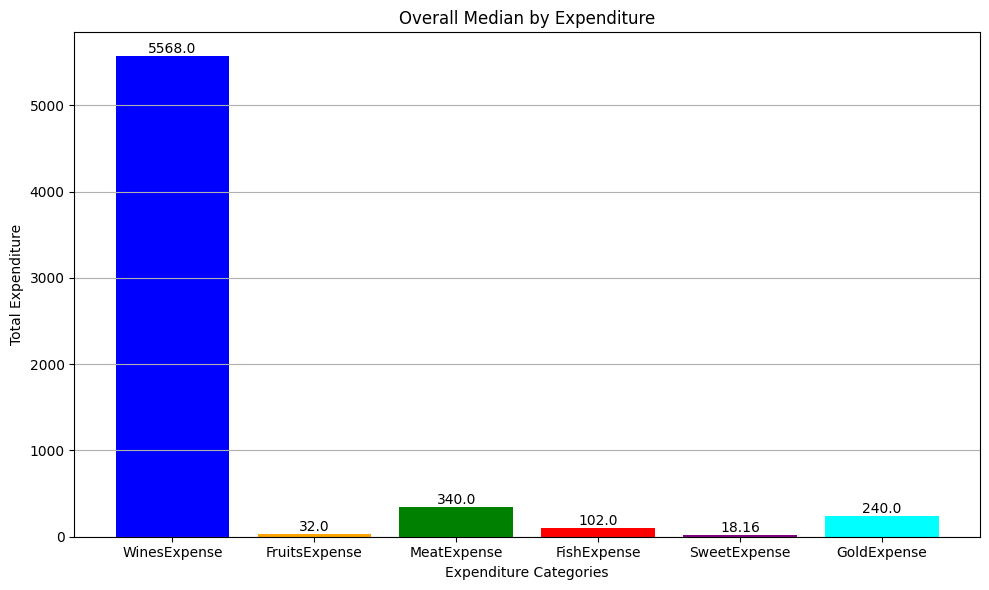

In [504]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(total_expenditure.keys(), total_expenditure.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.title('Overall Median by Expenditure')
plt.xlabel('Expenditure Categories')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display values above the bars
for index, value in enumerate(total_expenditure.values()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('total_expenditure.png')
plt.show()

The data provided represents the median money spent on various product categories. Here's the analysis of the information:

1. WinesExpense (Median: 5568.0):

 - The median expenditure on wines is 5568.0, which is the highest among all categories. This indicates that wine is not only the most frequently purchased item but also the one that generates the highest amount of spending. It reflects that wine purchases are substantial, suggesting that many customers invest a significant amount of money in this category, likely due to wine being a regular purchase or a high-value product.

2. FruitsExpense (Median: 32.0):

 - The median expenditure on fruits is 32.0, which is the lowest amount spent compared to other categories. Since fruits are typically bought in smaller quantities due to their perishability, the total expenditure remains relatively low. This suggests that although fruits are purchased regularly, they do not result in large spending amounts per transaction.

3. MeatExpense (Median: 340.0):

 - The median expenditure on meat is 340.0, indicating that meat is a significant expense for many customers. This is higher than fruits or sweets, reflecting the fact that meat purchases, especially for larger households or in bulk, tend to involve more spending. Meat is often a staple in many diets, contributing to moderate to high expenditures.

4. FishExpense (Median: 102.0):

 - The median expenditure on fish is 102.0, indicating that fish is a moderate expenditure for customers. Fish may not be as frequently purchased or as expensive as meat or wine, but it still represents a reasonable amount of spending for many people who regularly consume fish as part of their diet.

5. SweetExpense (Median: 18.16):

 - The median expenditure on sweets is 18.16, which is quite low compared to the other categories. This suggests that while people may purchase sweets occasionally, the total spending is relatively small. Sweets might be bought in smaller quantities or less frequently, contributing to lower overall expenditures.

6. GoldExpense (Median: 240.0):

 - The median expenditure on gold is 240.0, indicating that while gold is purchased less frequently than everyday items like food, it still represents a considerable amount of spending. Gold is likely a high-value purchase made on special occasions or for investment purposes, leading to moderate spending compared to the more frequently purchased goods.

Summary:

Wines account for the highest median expenditure at 5568.0, indicating that wine purchases involve significant spending, possibly due to bulk purchases or higher-priced bottles.
Meat and gold also have moderate to high expenditures at 340.0 and 240.0, respectively, reflecting substantial spending on items that are either essential (meat) or considered high-value investments (gold).
Fish and sweets have lower median expenditures at 102.0 and 18.16, respectively, suggesting that while they are bought regularly, they do not contribute to significant financial outlays compared to other categories.
Fruits have the lowest median expenditure at 32.0, aligning with their lower per-unit cost and frequent but smaller purchases.

#### EXPENDITURE VERSUS

##### GENERATION VS EXPENDITURE

In [505]:
# Calculate total purchases of each product category for each generation
generational_expend = data_merge.groupby('Age_Range')[['Monetary']].median()
generational_expend

Monetary
Age_Range             
Baby Boomers  8536.815
Gen X         8533.200
Gen Z         9455.110
Millennials   5626.970

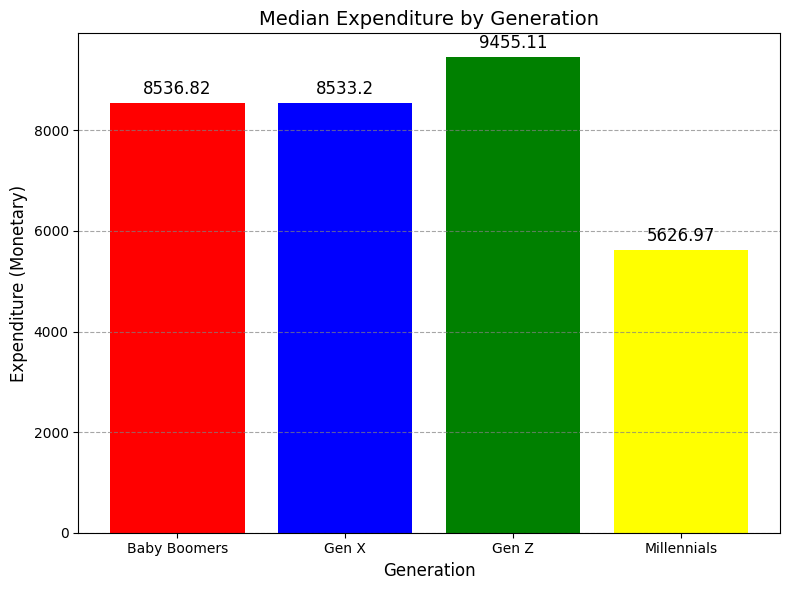

In [506]:
# Preparing data for visualization
generations = generational_expend.index
expenditures = generational_expend['Monetary']

# Bar Chart with grid lines and numbers above the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(generations, expenditures, color=['red', 'blue', 'green', 'yellow'])

# Adding horizontal lines on each bar (grid lines)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Adding numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Median Expenditure by Generation', fontsize=14)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Expenditure (Monetary)', fontsize=12)

# Displaying grid on x and y axes
plt.tight_layout()
# Saving the image
plt.savefig('expenditure(Monetary)_generational.png')
plt.show()

The data provided represents the monetary expenditures across different generations. Here's an analysis of the spending patterns by generation:

1. Baby Boomers (Expenditure: 8536.815):

 - Baby Boomers have the highest expenditure at 8536.815. This suggests that this generation tends to spend more on products, likely due to their established financial status, higher disposable income, and longer consumer history. Baby Boomers are often in their peak earning years or have accumulated wealth over time, which allows them to make larger purchases.

2. Gen X (Expenditure: 8533.200):

 - Gen X has a slightly lower expenditure than Baby Boomers at 8533.200. However, their spending is still substantial. Gen X is typically in a financially stable period of life, often balancing family responsibilities and work while still having a significant income. Their expenditure is comparable to that of Baby Boomers, indicating strong purchasing power in this generation as well.

3. Gen Z (Expenditure: 9455.110):

 - Gen Z has the highest expenditure at 9455.110, even surpassing Baby Boomers and Gen X. This may be surprising, considering that Gen Z is younger and may still be in the early stages of their careers. However, their higher expenditure could be due to factors like greater access to disposable income through early employment, more frequent online purchases, or a preference for trendy or luxury products, which tend to have higher price points.

4. Millennials (Expenditure: 5626.970):

 - Millennials have the lowest expenditure at 5626.970. Despite being a highly tech-savvy and influential demographic, Millennials may be spending less compared to other generations. This could be due to factors such as economic challenges (e.g., student loans, high cost of living, or housing issues), delayed major life milestones (e.g., marriage, homeownership), or a more frugal, value-oriented approach to spending. It’s also possible that Millennials prioritize experiences over material goods, leading to different expenditure patterns.

Summary:

Gen Z leads in terms of monetary expenditure, spending 9455.110, possibly due to a high level of consumption driven by trends, technology, and access to disposable income.
Baby Boomers and Gen X have similar expenditure levels at around 8536.815 and 8533.200, respectively, suggesting that both generations are financially comfortable with substantial spending power.
Millennials have the lowest expenditure at 5626.970, likely due to financial constraints or different spending habits compared to older generations, such as prioritizing savings or alternative consumption patterns (e.g., digital goods or experiences).

##### EDUCATION VS EXPENDITURE

In [507]:
# Calculate total purchases of each product category for each generation
education_expend = data_merge.groupby('Education')[['Monetary']].median()
education_expend

Monetary
Education           
Bachelor     7269.27
Doctoral     8976.05
Master       6285.17
Non-degree   4740.81

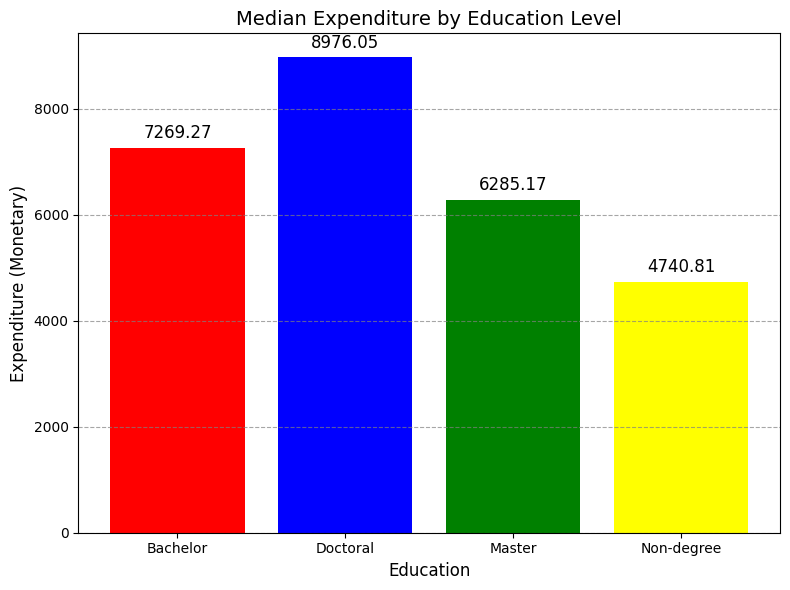

In [508]:
# Preparing data for visualization
generations = education_expend.index  # Replace with education_expend data
expenditures = education_expend['Monetary']  # Ensure 'Monetary' matches the data

# Bar Chart with grid lines and numbers above the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(generations, expenditures, color=['red', 'blue', 'green', 'yellow'])

# Adding horizontal lines on each bar (grid lines)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Adding numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Median Expenditure by Education Level', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Expenditure (Monetary)', fontsize=12)

# Displaying grid on both x and y axes
plt.tight_layout()
# Saving the image
plt.savefig('expenditure(Education)_education.png')
plt.show()

The data represents monetary expenditure across different educational levels. Here's an analysis of the spending patterns based on education:

1. Doctoral (Expenditure: 8976.05):

 - People with a Doctoral degree have the highest expenditure at 8976.05. This suggests that individuals with a Doctoral degree tend to have higher incomes, possibly due to their specialized knowledge and advanced career positions. As a result, they have greater financial stability and the ability to spend more on products and services. They may also prioritize high-quality or premium products, leading to larger monetary outlays.

2. Bachelor (Expenditure: 7269.27):

 - Individuals with a Bachelor's degree have a moderate expenditure of 7269.27. This group is likely to be in the workforce with solid income levels, allowing for substantial spending. People with a Bachelor's degree may have more career opportunities and higher earnings compared to those with lower levels of education, contributing to a higher expenditure compared to non-degree holders.

3. Master (Expenditure: 6285.17):

 - Individuals with a Master's degree have an expenditure of 6285.17, which is somewhat lower than those with Doctoral or Bachelor's degrees. This could be due to factors such as the relatively newer career stage of people with a Master's degree, possibly still building their financial foundation. However, it’s important to note that Master's degree holders are likely in advanced positions with a strong income, but they may be more cautious with their spending compared to Doctoral degree holders.

4. Non-degree (Expenditure: 4740.81):

 - Those with Non-degree qualifications have the lowest expenditure at 4740.81. This lower expenditure could be attributed to factors like lower average incomes, fewer job opportunities, or more limited financial resources. Non-degree holders may spend less on products and services due to financial constraints, and they may prioritize essential items over discretionary purchases.

Summary:

Doctoral degree holders have the highest expenditure (8976.05), likely due to advanced careers and higher earnings.
Bachelor's degree holders spend moderately (7269.27), reflecting stable financial situations and access to well-paying jobs.
Master's degree holders have slightly lower expenditure (6285.17), potentially due to being at a relatively earlier career stage or prioritizing savings.
Non-degree holders have the lowest expenditure (4740.81), which could be due to financial constraints or fewer high-paying job opportunities.

##### MARITAL STATUS VS EXPENSES

In [509]:
# Calculate total purchases of each product category for each generation
maritalstatus_expend = data_merge.groupby('Marital_Status')[['Monetary']].median()
maritalstatus_expend

Monetary
Marital_Status          
Cohabitation    7038.280
Divorced        8857.405
Married         6900.290
Single          6966.670

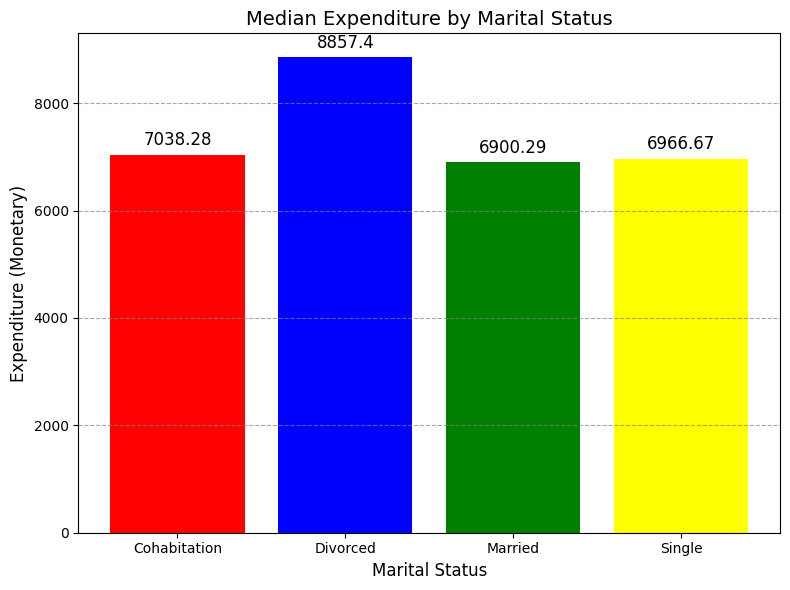

In [510]:
# Preparing data for visualization
generations = maritalstatus_expend.index  # Replace with maritalstatus_expend data
expenditures = maritalstatus_expend['Monetary']  # Ensure 'Monetary' matches the data

# Bar Chart with grid lines and numbers above the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(generations, expenditures, color=['red', 'blue', 'green', 'yellow'])

# Adding horizontal lines on each bar (grid lines)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Adding numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Median Expenditure by Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Expenditure (Monetary)', fontsize=12)

# Displaying grid on both x and y axes
plt.tight_layout()
# Saving the image
plt.savefig('expenditure(MaritalStatus)_maritalstatus.png')
plt.show()

The data represents monetary expenditure across different marital statuses. Here's an analysis of the spending patterns based on marital status:

1. Divorced (Expenditure: 8857.405):

 - Divorced individuals have the highest expenditure at 8857.405. This could be due to various factors. After a divorce, individuals may experience a shift in their financial priorities, such as maintaining separate households, paying for legal costs, or rebuilding their personal life. These factors may contribute to higher spending on products, services, or lifestyle improvements. Additionally, divorced individuals may be more likely to spend on self-care or personal growth, leading to higher monetary outlays.

2. Cohabitation (Expenditure: 7038.280):

 - Cohabitating individuals spend 7038.280. People who live together without being married may have different financial priorities compared to married individuals. Cohabitants might share expenses more equally and possibly have fewer financial obligations (e.g., they may not have children or may not feel the need to spend as much on formal events). However, they still tend to spend a substantial amount on products and services, often spending on shared household needs and personal items.

3. Single (Expenditure: 6966.670):

 - Single individuals have an expenditure of 6966.670, which is similar to cohabitants but slightly lower. Single individuals often have the freedom to make individual purchasing decisions and may prioritize spending on personal interests, hobbies, or experiences. While they may not have the shared financial responsibilities of a couple, they might still have a solid disposable income that allows for spending in various categories.

4. Married (Expenditure: 6900.290):

 - Married individuals have the lowest expenditure at 6900.290. This lower expenditure might be due to more joint financial management within the household, where married couples pool resources and share costs, reducing the overall individual expenditure. Additionally, married individuals might be more focused on long-term financial goals (e.g., savings, investments, family planning), which could result in more cautious spending.

Summary:

Divorced individuals have the highest expenditure (8857.405), likely due to personal financial restructuring after a divorce or increased spending on personal growth.
Cohabitating individuals spend 7038.280, which is generally high but may reflect more shared financial responsibilities.
Single individuals spend 6966.670, showing that they have significant disposable income for personal purchases, though slightly less than cohabitants.
Married individuals have the lowest expenditure (6900.290), possibly because married couples tend to manage finances jointly, leading to more conservative individual spending.

##### INCOME CATEGORY VS EXPENDITURES

In [511]:
# Calculate total purchases of each product category for each generation
incomecategory_expend = data_merge.groupby('IncomeCategory')[['Monetary']].median()
incomecategory_expend

Monetary
IncomeCategory           
Lower            1719.000
Lower-Middle     5242.210
Upper           12540.520
Upper-Middle    10959.535

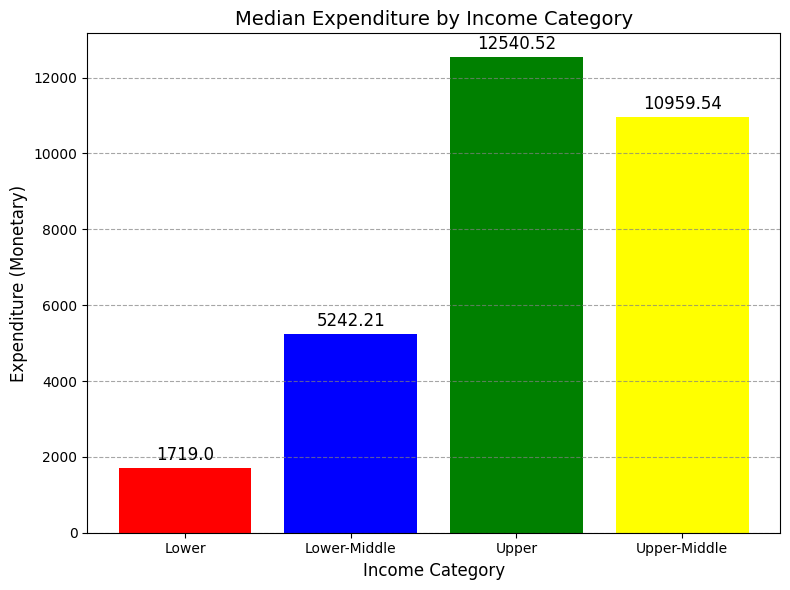

In [512]:
# Preparing data for visualization
generations = incomecategory_expend.index  # Replace with incomecategory_expend data
expenditures = incomecategory_expend['Monetary']  # Ensure 'Monetary' matches the data

# Bar Chart with grid lines and numbers above the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(generations, expenditures, color=['red', 'blue', 'green', 'yellow'])

# Adding horizontal lines on each bar (grid lines)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Adding numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Median Expenditure by Income Category', fontsize=14)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Expenditure (Monetary)', fontsize=12)

# Displaying grid on both x and y axes
plt.tight_layout()
# Saving the image
plt.savefig('expenditure(IncomeCategory).png')
plt.show()

The data represents monetary expenditure across different income categories. Here's an analysis of the spending patterns based on income category:

1. Upper (Expenditure: 12540.520):

 - Upper-income individuals have the highest expenditure at 12540.520. This group typically has the highest disposable income, enabling them to spend more on a wide range of goods and services. They are likely to make premium purchases, invest in high-quality products, and spend on luxury or non-essential items. Their higher earnings allow for more discretionary spending, leading to the highest overall expenditure.

2. Upper-Middle (Expenditure: 10959.535):

 - Upper-middle-income individuals spend 10959.535, which is still relatively high but slightly lower than those in the upper-income category. People in this category generally have substantial disposable income, allowing for significant spending on both necessities and luxuries. However, they might be more focused on value for money compared to the top income bracket, leading to a slightly lower expenditure than the upper-income group.

3. Lower-Middle (Expenditure: 5242.210):

 - Lower-middle-income individuals have an expenditure of 5242.210. While this is considerably lower than those in the upper and upper-middle income categories, it still reflects a reasonable amount of disposable income. Individuals in this group may spend more cautiously, balancing between necessities and discretionary items. They are likely to prioritize essential goods, but still have some capacity for non-essential purchases, depending on their financial obligations.

4. Lower (Expenditure: 1719.000):

 - Lower-income individuals have the lowest expenditure at 1719.000. People in this category typically have limited disposable income, focusing primarily on essential goods and services. Their spending is likely constrained by financial limitations, leading to lower overall expenditure. They may prioritize basic needs such as food, housing, and transportation, while discretionary spending is minimal.

Summary:

Upper-income individuals have the highest expenditure (12540.520), which reflects their substantial disposable income, allowing them to spend freely on luxury and non-essential items.
Upper-middle-income individuals spend 10959.535, which is still high but slightly lower than those in the upper-income category, indicating significant but more restrained spending.
Lower-middle-income individuals spend 5242.210, reflecting a balanced expenditure on both essentials and some discretionary items, but more cautious compared to higher income groups.
Lower-income individuals have the lowest expenditure (1719.000), as their spending is constrained by limited financial resources, focusing mostly on essentials.

##### FAMILY HOME MEMBER VS EXPENSES

In [513]:
# Calculate total purchases of each product category for each generation
familyhomemember_expend = data_merge.groupby('FamilyHomeMember')[['Monetary']].median()
familyhomemember_expend

Monetary
FamilyHomeMember           
1                 10051.115
2                  9400.720
3                  5741.630
4                  5361.540
5                  4862.945

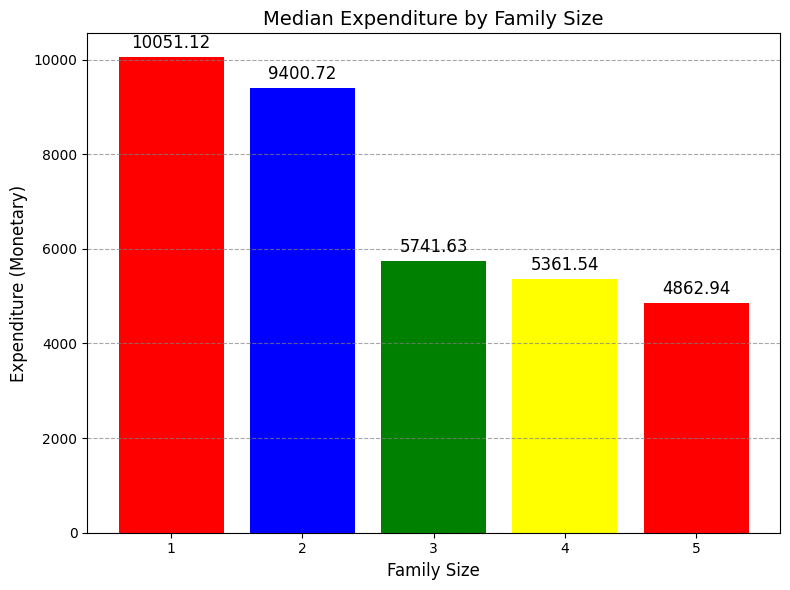

In [514]:
# Preparing data for visualization
generations = familyhomemember_expend.index  # Replace with familyhomemember_expend data
expenditures = familyhomemember_expend['Monetary']  # Ensure 'Monetary' matches the data

# Bar Chart with grid lines and numbers above the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(generations, expenditures, color=['red', 'blue', 'green', 'yellow'])

# Adding horizontal lines on each bar (grid lines)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Adding numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Median Expenditure by Family Size', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Expenditure (Monetary)', fontsize=12)

# Displaying grid on both x and y axes
plt.tight_layout()
# Saving the image
plt.savefig('expenditure(FamilySize).png')
plt.show()

The data represents monetary expenditure across different numbers of family home members. Here's an analysis of the spending patterns based on the number of family members:

1. 1 Family Member (Expenditure: 10051.115):

Single-member households have the highest expenditure at 10051.115. This group likely has a higher level of disposable income and may focus more on individual luxury or personal needs. With fewer financial obligations, such as fewer people to support, single individuals often have the freedom to spend more on personal products and experiences, leading to higher spending compared to larger households.

2. 2 Family Members (Expenditure: 9400.720):

Two-member households spend 9400.720, which is slightly lower than single-member households but still a significant amount. In a two-person household, the financial burden may be shared, but there are still likely to be some personal expenses for both individuals. This category may reflect couples without children or other family arrangements, where both individuals have disposable income but might prioritize joint household needs over individual spending.

3. 3 Family Members (Expenditure: 5741.630):

Three-member households have an expenditure of 5741.630. As the household size increases, financial resources may need to be spread across more people, leading to lower individual spending. Families with three members may allocate more of their income to necessities (e.g., housing, food, utilities) and less toward discretionary or luxury items, contributing to a decrease in total expenditure compared to smaller households.

4. 4 Family Members (Expenditure: 5361.540):

Four-member households spend 5361.540, continuing the trend of lower expenditure as the number of family members increases. With more people to support, household expenses are likely spread out more, and there may be fewer resources for individual luxuries or non-essential items. The focus of spending may shift more toward basic needs and family-related expenses, resulting in a reduced overall expenditure.

5. 5 Family Members (Expenditure: 4862.945):

Five-member households have the lowest expenditure at 4862.945. Larger families generally face more financial responsibilities, and spending tends to be concentrated on essential needs such as food, healthcare, and education. With more members to support, individual discretionary spending is often limited, leading to the lowest overall expenditure.

Summary:

Single-member households spend the most (10051.115), likely because they have fewer financial obligations and can prioritize personal luxury or discretionary purchases.
Two-member households spend 9400.720, reflecting a balance between shared expenses and individual spending.
Three-member households spend 5741.630, indicating a shift toward prioritizing family needs, with lower individual discretionary spending.
Four-member households spend 5361.540, continuing the trend of reduced expenditure as the family size increases, focusing more on essential needs.
Five-member households spend the least (4862.945), with a greater portion of income allocated to basic necessities and shared family expenses.

#### SHOPPING BEHAVIOR

##### GENERATIONS VS SHOPPING BEHAVIOR

In [515]:
# Calculate total purchases of each product category for each generation
generational_purchase = data_merge.groupby('Age_Range')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
generational_purchase

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Age_Range                                                             
Baby Boomers     332.0       13.0            110.0             19.5   
Gen X            236.0       10.0             80.0             13.0   
Gen Z             85.0       12.0             66.0             21.0   
Millennials       75.0        6.0             45.0             10.0   

              MntSweetProducts  MntGoldProds  
Age_Range                                     
Baby Boomers              13.0          33.0  
Gen X                      9.0          28.0  
Gen Z                     15.0          27.0  
Millennials                6.0          19.0

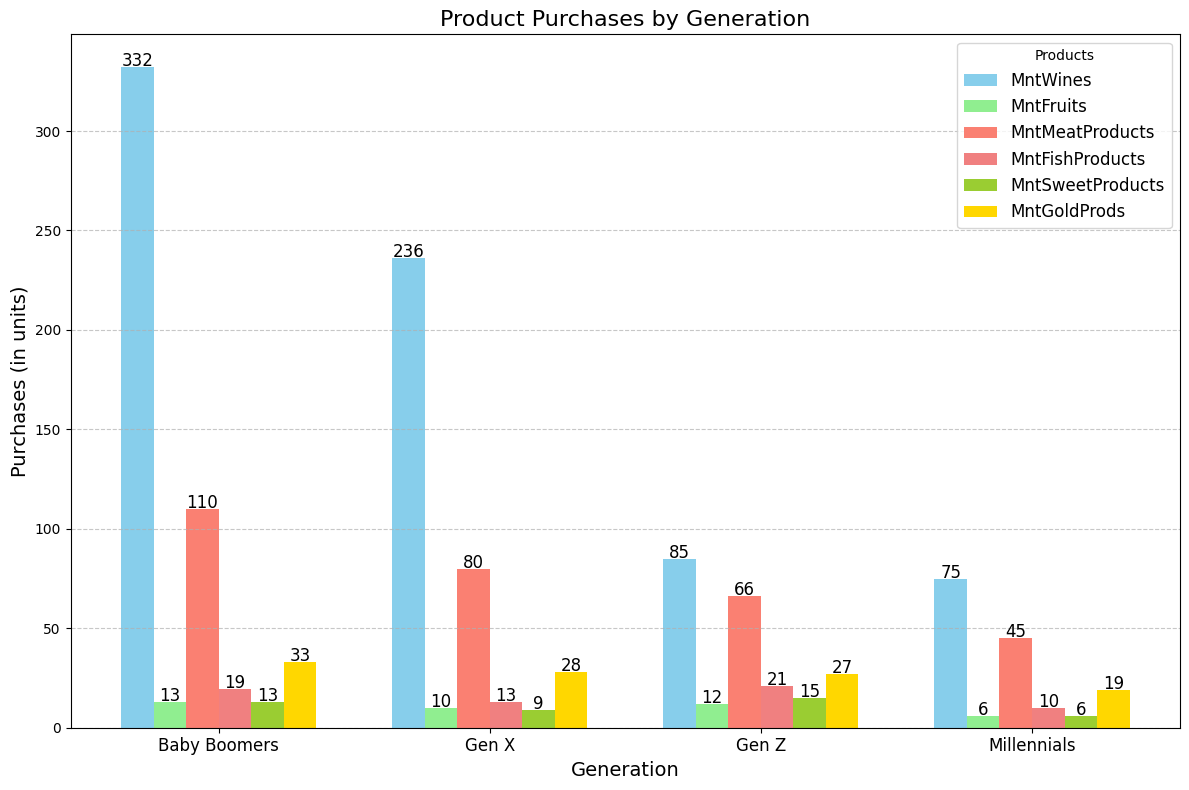

In [516]:
# Creating a bar chart with a larger chart size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the position and width of the bars
bar_width = 0.12
index = np.arange(len(generational_purchase))  # Position for generations

# Creating plots for each product
bars1 = plt.bar(index - 2.5*bar_width, generational_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, generational_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, generational_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, generational_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, generational_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, generational_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases by Generation', fontsize=16)
plt.xticks(index, generational_purchase.index, fontsize=12)  # Displaying generation labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical distance to prevent overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding label numbers for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('expenditure_generational.png')
plt.show()


The data represents the median purchases in units for different product categories across generations. Here’s an analysis of the purchasing patterns for each generation:

1. Baby Boomers:
 - MntWines: 332.0
     - Baby Boomers have the highest median purchase of wines (332 units), indicating a strong preference or higher consumption of wine compared to other generations.
 - MntFruits: 13.0
     - They purchase 13 units of fruits, which is relatively moderate but still higher than the younger generations.
 - MntMeatProducts: 110.0
     - Baby Boomers also show a higher median purchase of meat products (110 units), reflecting a likely preference for meat in their diet.
 - MntFishProducts: 19.5
     - They purchase 19.5 units of fish products, which is again higher compared to other generations except Gen Z.
 - MntSweetProducts: 13.0
     - The median purchase of sweet products (13 units) is fairly moderate, suggesting they do enjoy sweets but not to an extreme degree.
 - MntGoldProds: 33.0
     - Baby Boomers also purchase 33 units of gold products, which is relatively higher, indicating they may have more disposable income or inclination toward luxury items.
2. Gen X:
 - MntWines: 236.0
     - Gen X purchases 236 units of wines, which is the second highest after Baby Boomers, suggesting a strong preference for wine but less than Baby Boomers.
 - MntFruits: 10.0
     - They purchase 10 units of fruits, showing a somewhat moderate preference for fruits.
 - MntMeatProducts: 80.0
     - Gen X purchases 80 units of meat products, reflecting a balanced consumption, though lower than Baby Boomers.
 - MntFishProducts: 13.0
     - Gen X purchases 13 units of fish products, showing moderate consumption.
 - MntSweetProducts: 9.0
     - Their median purchase of sweets is 9 units, which is lower compared to the Baby Boomers, indicating a somewhat more restrained sweet consumption.
 - MntGoldProds: 28.0
     - They purchase 28 units of gold products, reflecting moderate luxury consumption but lower than Baby Boomers.
3. Gen Z:
 - MntWines: 85.0
     - Gen Z purchases 85 units of wines, which is the lowest among all generations, possibly due to younger age and less interest in alcoholic beverages.
 - MntFruits: 12.0
     - Their median purchase of fruits is 12 units, which is higher than Millennials but lower than Baby Boomers.
 - MntMeatProducts: 66.0
     - Gen Z purchases 66 units of meat products, reflecting a moderate consumption level.
 - MntFishProducts: 21.0
     - They purchase 21 units of fish products, which is the highest among all generations, indicating a stronger preference for fish compared to others.
 - MntSweetProducts: 15.0
     - Gen Z's median purchase of sweet products is 15 units, which is relatively high, suggesting a preference for sweets.
 - MntGoldProds: 27.0
     - Gen Z purchases 27 units of gold products, showing a moderate but noticeable interest in luxury items.
4. Millennials:
 - MntWines: 75.0
     - Millennials have the lowest median purchase of wines (75 units), possibly indicating a more limited interest in wine compared to older generations.
 - MntFruits: 6.0
     - They purchase only 6 units of fruits, the lowest among all groups, suggesting that they might prefer other products or have less focus on fruits.
 - MntMeatProducts: 45.0
     - Millennials show moderate consumption of meat products, purchasing 45 units, reflecting a balanced diet preference.
 - MntFishProducts: 10.0
     - Their median purchase of fish products is 10 units, showing a moderate consumption but lower than Gen Z and Baby Boomers.
 - MntSweetProducts: 6.0
     - Millennials purchase 6 units of sweet products, indicating a restrained preference for sweets compared to other generations.
 - MntGoldProds: 19.0
     - Millennials purchase 19 units of gold products, which is the lowest among all generations, suggesting a lower tendency toward luxury purchases compared to older generations.

Summary:

Baby Boomers have the highest median purchases across most categories, particularly for wines, meat products, and gold products, suggesting they have a preference for higher-end or more indulgent products.
Gen X also shows significant purchases, especially in wines and meat products, though their overall spending is generally lower than Baby Boomers.
Gen Z has a higher preference for fish products and sweets, with a lower interest in wine and gold products, which could be reflective of younger age and lifestyle preferences.
Millennials have the lowest purchases across most categories, particularly for fruits, wines, and gold products, suggesting more modest or selective consumption habits compared to older generations.

##### EDUCATION VS SHOPPING BEHAVIOR

In [517]:
# Calculate total purchases of each product category for each generation
education_purchase = data_merge.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
education_purchase

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Education                                                           
Bachelor       184.5       10.0             80.0             15.0   
Doctoral       276.5        4.0             69.0              6.0   
Master         145.0        8.0             59.0             12.0   
Non-degree       2.0        7.0              7.0              9.0   

            MntSweetProducts  MntGoldProds  
Education                                   
Bachelor                12.0          29.0  
Doctoral                 3.0          16.0  
Master                   7.0          23.0  
Non-degree               7.0          15.0

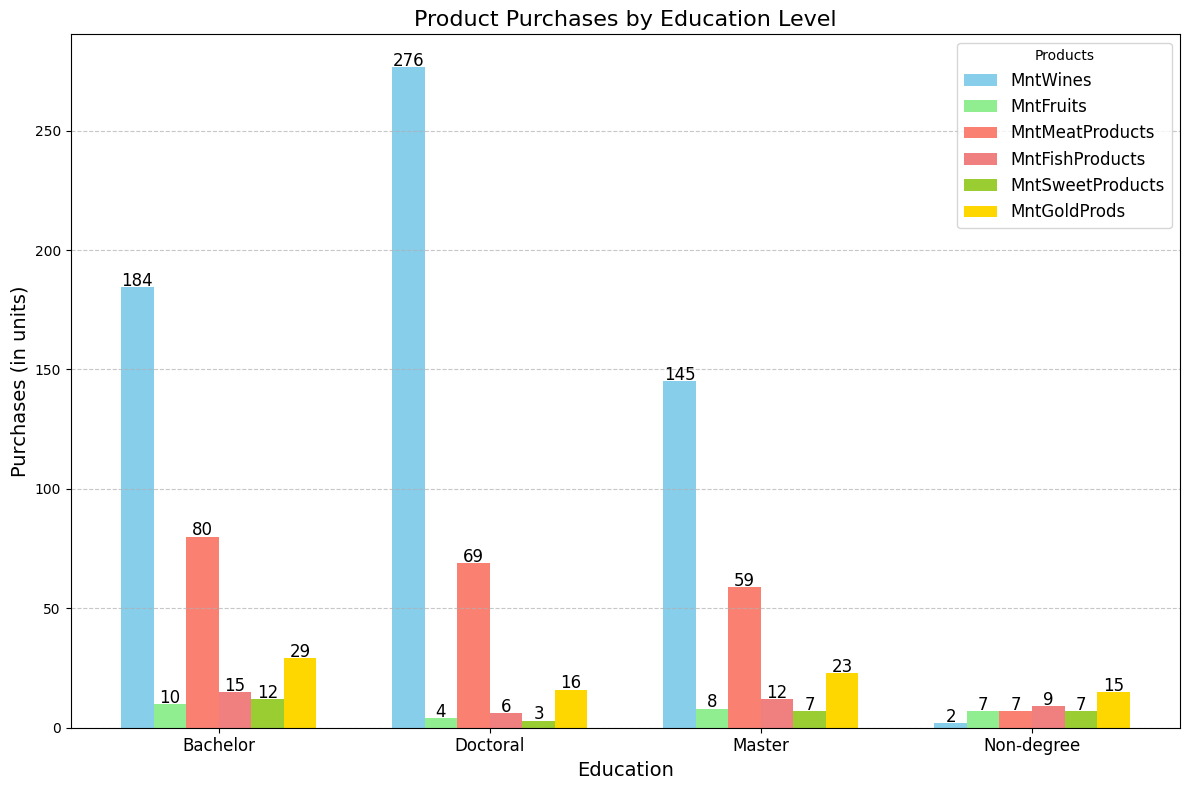

In [518]:
# Creating a bar chart with a larger chart size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the position and width of the bars
bar_width = 0.12
index = np.arange(len(education_purchase))  # Position based on education category

# Creating plots for each product
bars1 = plt.bar(index - 2.5*bar_width, education_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, education_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, education_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, education_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, education_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, education_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Education', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases by Education Level', fontsize=16)
plt.xticks(index, education_purchase.index, fontsize=12)  # Displaying education labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical space to prevent overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding label numbers for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('expenditure_education.png')
plt.show()

The data represents the median purchases in units for various product categories, segmented by education level. Here’s an analysis of the purchasing patterns for each education category:

1. Bachelor's Degree Holders:
 - MntWines: 184.5
     - Bachelor's degree holders purchase 184.5 units of wine, indicating a strong preference for wine. This could reflect higher disposable income or an affinity for wine among individuals with a higher education level.
 - MntFruits: 10.0
     - They purchase 10 units of fruits, which is a moderate preference for fruits, though not as high as other product categories.
 - MntMeatProducts: 80.0
     - Bachelor's degree holders show a moderate preference for meat products with 80 units purchased, which aligns with typical consumption patterns.
 - MntFishProducts: 15.0
     - They purchase 15 units of fish products, indicating a moderate interest in fish as part of their diet.
 - MntSweetProducts: 12.0
     - The purchase of sweet products is also moderate at 12 units, showing that while they enjoy sweets, it isn't a dominant part of their consumption.
 - MntGoldProds: 29.0
     - Bachelor's degree holders purchase 29 units of gold products, which is a moderate but noticeable interest in luxury items, likely reflecting higher income levels or a preference for investing in such products.
2. Doctoral Degree Holders:
 - MntWines: 276.5
     - Doctoral degree holders have the highest purchase of wines at 276.5 units, suggesting a strong preference for wine or a higher disposable income to support such purchases.
 - MntFruits: 4.0
     - They purchase 4 units of fruits, which is the lowest across all education levels, indicating that fruits might not be a major part of their regular diet.
 - MntMeatProducts: 69.0
     - The purchase of meat products is moderate at 69 units, lower than Bachelor's holders, but still a reasonable consumption level.
 - MntFishProducts: 6.0
     - They purchase 6 units of fish products, which is a moderate number, indicating a mild preference.
 - MntSweetProducts: 3.0
     - Doctoral degree holders have a relatively low preference for sweet products, purchasing only 3 units.
 - MntGoldProds: 16.0
     - The purchase of gold products is moderate at 16 units, reflecting a more restrained interest compared to Bachelor's holders.
3. Master's Degree Holders:
 - MntWines: 145.0
     - Master's degree holders purchase 145 units of wine, which is lower than Bachelor's and Doctoral degree holders, but still significant.
 - MntFruits: 8.0
     - They purchase 8 units of fruits, showing a moderate interest in fruits, though not as high as those with a Bachelor's degree.
 - MntMeatProducts: 59.0
     - The median purchase of meat products is 59 units, showing moderate consumption.
 - MntFishProducts: 12.0
     - Master's degree holders purchase 12 units of fish products, showing a reasonable preference for fish, slightly higher than those with Doctoral degrees.
 - MntSweetProducts: 7.0
     - The median purchase of sweet products is 7 units, indicating a mild preference for sweets.
 - MntGoldProds: 23.0
     - They purchase 23 units of gold products, which is a moderate interest in luxury items.
4. Non-degree Holders:
 - MntWines: 2.0
     - Non-degree holders purchase only 2 units of wine, which is the lowest across all education levels, indicating limited preference or consumption of wine.
 - MntFruits: 7.0
     - They purchase 7 units of fruits, which is relatively low compared to other education levels but still shows some interest in fruits.
 - MntMeatProducts: 7.0
     - The purchase of meat products is also low at 7 units, suggesting moderate consumption of meat.
 - MntFishProducts: 9.0
     - Non-degree holders purchase 9 units of fish products, which is relatively higher than their purchases of other product categories.
 - MntSweetProducts: 7.0
     - The purchase of sweet products is also 7 units, indicating a balanced preference for sweets.
 - MntGoldProds: 15.0
     - They purchase 15 units of gold products, showing some interest in luxury items, but still lower than other groups with higher education levels.

Summary:

Doctoral degree holders have the highest median purchases in wine and gold products, reflecting a likely higher income or a preference for luxury items, but show low interest in fruits, sweet products, and fish.
Bachelor's degree holders show balanced purchases across all categories, with a strong preference for wine and meat products, along with moderate purchases of gold.
Master's degree holders show moderate interest across most categories, with their highest purchases in wine and meat products, and a slightly higher preference for fish than Doctoral degree holders.
Non-degree holders have the lowest purchases in most categories, particularly in wine, but show a mild preference for fish products and gold, which might suggest a more restrained lifestyle with selective preferences.

##### MARITAL STATUS VS SHOPPING BEHAVIOR

In [519]:
# Calculate total purchases of each product category for each generation
marital_status_purchase = data_merge.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
marital_status_purchase

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Marital_Status                                                          
Cohabitation       186.0        8.0             68.0             12.0   
Divorced           210.5       10.0             75.5             13.0   
Married            173.0        7.0             64.0             12.0   
Single             156.0        9.0             64.0             12.0   

                MntSweetProducts  MntGoldProds  
Marital_Status                                  
Cohabitation                 9.0          24.0  
Divorced                     8.0          27.0  
Married                      8.0          22.0  
Single                       9.0          26.0

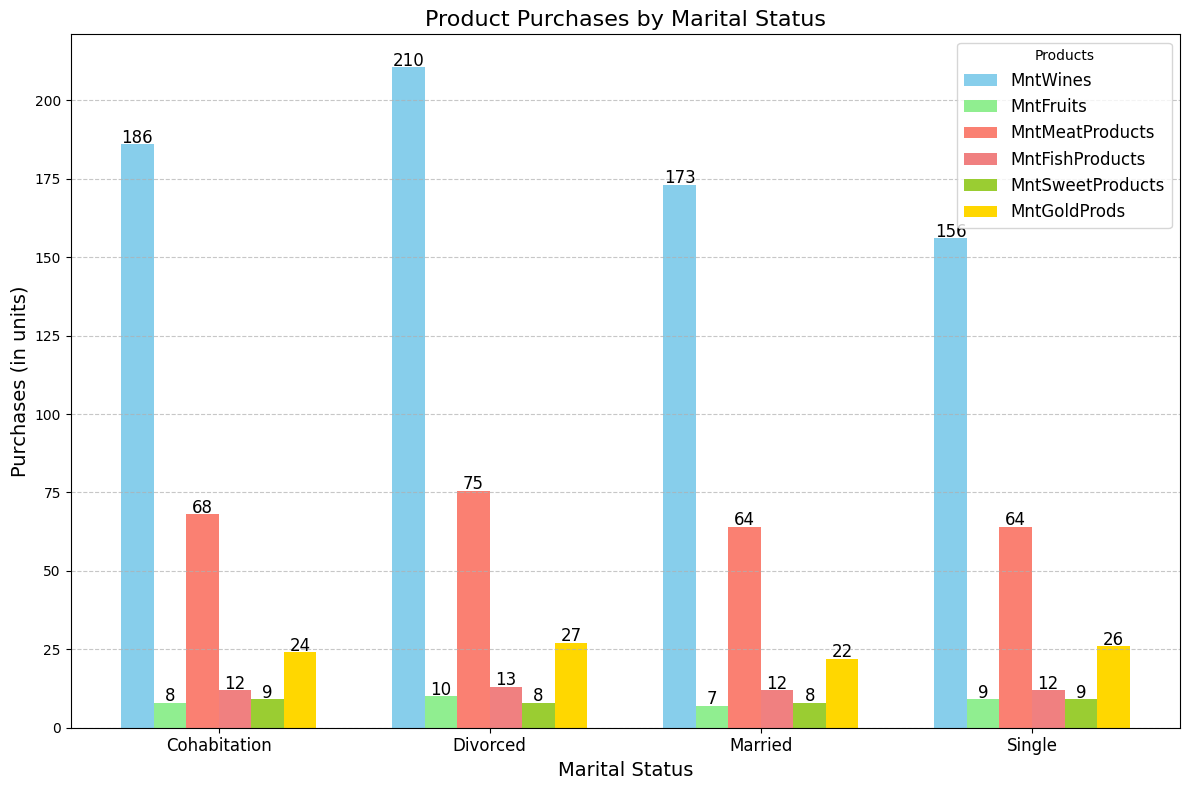

In [520]:
# Creating a bar chart with a larger chart size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the position and width of the bars
bar_width = 0.12
index = np.arange(len(marital_status_purchase))  # Position based on marital status category

# Creating plots for each product
bars1 = plt.bar(index - 2.5*bar_width, marital_status_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, marital_status_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, marital_status_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, marital_status_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, marital_status_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, marital_status_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases by Marital Status', fontsize=16)
plt.xticks(index, marital_status_purchase.index, fontsize=12)  # Displaying marital status labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical space to prevent overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding label numbers for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('expenditure_maritalstatus.png')
plt.show()


The analysis of median purchases in units for various product categories, segmented by marital status, provides insights into the purchasing behaviors of different groups. Here's a detailed breakdown of the purchasing patterns across Cohabitation, Divorced, Married, and Single marital statuses:

1. Cohabitation:
 - MntWines: 186.0
     - People in cohabitation relationships purchase 186 units of wine, which is relatively high, suggesting a moderate preference for wine.
 - MntFruits: 8.0
     - They purchase 8 units of fruits, indicating a mild interest in fruits, although not as high as other categories.
 - MntMeatProducts: 68.0
     - The purchase of meat products is moderate, with 68 units purchased, showing a balanced consumption of meat.
 - MntFishProducts: 12.0
     - Cohabitants purchase 12 units of fish products, showing a moderate preference for fish.
 - MntSweetProducts: 9.0
     - The purchase of sweet products is relatively low at 9 units, reflecting mild interest in sweets.
 - MntGoldProds: 24.0
     - 24 units of gold products are purchased, suggesting some interest in luxury or investment products.
2. Divorced:
 - MntWines: 210.5
     - Divorced individuals have the highest purchase of wine with 210.5 units, which could indicate a higher disposable income or a strong preference for wine.
 - MntFruits: 10.0
     - They purchase 10 units of fruits, showing a moderate interest in fruits.
 - MntMeatProducts: 75.5
     - The median purchase of meat products is 75.5 units, indicating a strong preference for meat compared to other groups.
 - MntFishProducts: 13.0
     - Divorced individuals purchase 13 units of fish products, which is slightly higher than other groups, showing a decent preference for fish.
 - MntSweetProducts: 8.0
     - They purchase 8 units of sweet products, indicating mild interest in sweets, similar to other groups.
 - MntGoldProds: 27.0
     - Divorced individuals purchase 27 units of gold products, showing a stronger preference for luxury items compared to other marital statuses.
3. Married:
 - MntWines: 173.0
     - Married individuals purchase 173 units of wine, which is lower than those who are cohabiting or divorced, indicating a more moderate preference for wine.
 - MntFruits: 7.0
     - They purchase 7 units of fruits, which is the lowest among all marital statuses, indicating a lesser preference for fruits.
 - MntMeatProducts: 64.0
     - Married people purchase 64 units of meat products, reflecting moderate meat consumption, similar to the cohabitation group.
 - MntFishProducts: 12.0
     - The purchase of fish products is 12 units, which is consistent with other groups and suggests a balanced preference for fish.
 - MntSweetProducts: 8.0
     - Sweet product purchases are consistent at 8 units, showing mild interest in sweets.
 - MntGoldProds: 22.0
     - Married individuals purchase 22 units of gold products, which is slightly lower than those in cohabitation and divorced statuses.
4. Single:
 - MntWines: 156.0
     - Single individuals purchase 156 units of wine, which is the lowest among all marital statuses, suggesting a more restrained preference for wine.
 - MntFruits: 9.0
     - They purchase 9 units of fruits, indicating a moderate interest in fruits, similar to the other groups.
 - MntMeatProducts: 64.0
     - The purchase of meat products is 64 units, which is consistent with the Married group, showing moderate consumption.
 - MntFishProducts: 12.0
     - Single individuals purchase 12 units of fish products, which aligns with the Married and Cohabitation groups.
 - MntSweetProducts: 9.0
     - Sweet product purchases are 9 units, showing mild interest in sweets, which is consistent with cohabitants.
 - MntGoldProds: 26.0
     - They purchase 26 units of gold products, which is slightly higher than the Married group, showing some interest in luxury items.

Summary:

Divorced individuals show the highest preference for wine and gold products, suggesting that they might be enjoying a period of higher disposable income or luxury preferences. They also have the highest purchase of meat and fish products, indicating a strong preference for protein-rich foods.
Cohabitants have a balanced purchasing pattern, with moderate purchases of wine, meat, and fish, along with moderate interest in gold products.
Married individuals show moderate consumption across most categories, particularly in meat, wine, and fish, but have the lowest interest in fruits compared to other groups.
Single individuals have the lowest preference for wine, but show a similar interest in fish products and gold as those who are divorced, with fruits and meat purchases being in line with married people.

##### INCOME CATEGORY VS SHOPPING BEHAVIOR

In [521]:
# Calculate total purchases of each product category for each generation
income_category_purchase = data_merge.groupby('IncomeCategory')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
income_category_purchase

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
IncomeCategory                                                          
Lower               10.0        3.0             12.0              4.0   
Lower-Middle        68.0        3.0             29.0              4.0   
Upper              571.0       43.0            398.0             71.0   
Upper-Middle       384.0       14.5            118.0             19.0   

                MntSweetProducts  MntGoldProds  
IncomeCategory                                  
Lower                        3.0          10.0  
Lower-Middle                 3.0          15.0  
Upper                       45.0          51.0  
Upper-Middle                13.0          40.5

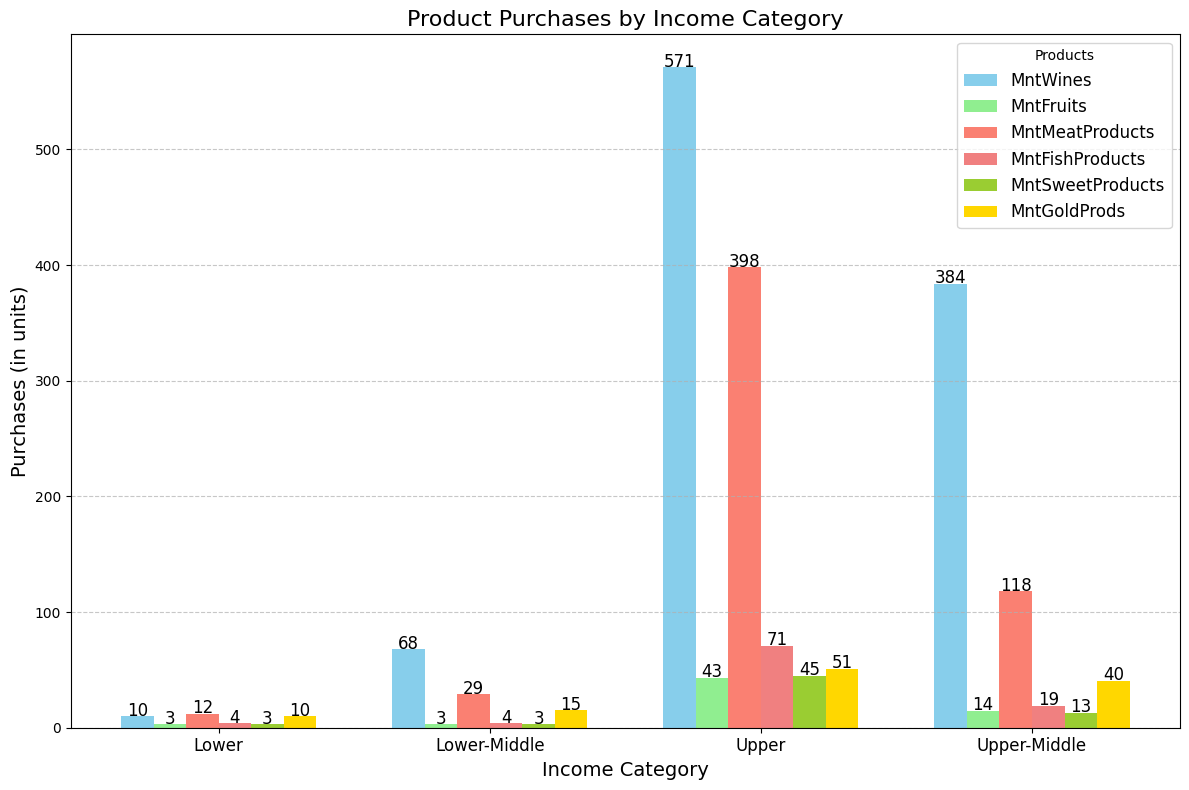

In [522]:
# Creating a bar chart with a larger chart size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the position and width of the bars
bar_width = 0.12
index = np.arange(len(income_category_purchase))  # Position based on income category

# Creating plots for each product
bars1 = plt.bar(index - 2.5*bar_width, income_category_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, income_category_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, income_category_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, income_category_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, income_category_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, income_category_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases by Income Category', fontsize=16)
plt.xticks(index, income_category_purchase.index, fontsize=12)  # Displaying income category labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical space to prevent overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding label numbers for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('expenditure_incomecategory.png')
plt.show()

Based on the data of product purchases per unit in different income categories (Lower, Lower-Middle, Upper, and Upper-Middle), here are the insights regarding consumer behavior across these groups:

1. Lower Income Category:
 - MntWines: 10.0
     - Wine purchases are relatively low (10 units), which suggests that consumers with lower incomes tend to spend less on luxury items like wine.
 - MntFruits: 3.0
     - The purchase of fruits is also low (3 units), reflecting a potential limitation in spending on fresh produce.
 - MntMeatProducts: 12.0
     - Meat purchases are higher (12 units), possibly due to meat being a more affordable staple food.
 - MntFishProducts: 4.0
     - Fish products are purchased at a moderate level (4 units), showing moderate interest in seafood within this income group.
 - MntSweetProducts: 3.0
     - Sweet products are also limited (3 units), indicating more conservative spending on snacks or sweets.
 - MntGoldProds: 10.0
     - The purchase of gold products is equal to wine (10 units), showing some interest in durable goods like gold despite the lower income.
2. Lower-Middle Income Category:
 - MntWines: 68.0
     - Wine purchases significantly increase (68 units) compared to the Lower income category, reflecting greater spending power for moderately higher-income consumers.
 - MntFruits: 3.0
     - Fruit purchases remain steady at 3 units, similar to the Lower category, indicating fruit remains a low-priority purchase.
 - MntMeatProducts: 29.0
     - Meat products see a larger purchase volume (29 units), reflecting that this is still an important part of the diet for consumers in this income range.
 - MntFishProducts: 4.0
     - Fish product purchases remain the same as in the Lower category (4 units), indicating a consistent preference for seafood.
 - MntSweetProducts: 3.0
     - Sweet products again remain at 3 units, showing consistent low spending on sweets.
 - MntGoldProds: 15.0
     - Gold product purchases (15 units) are higher than in the Lower category, indicating more disposable income for luxury or investment items.
3. Upper Income Category:
 - MntWines: 571.0
     - Wine purchases are significantly high (571 units), indicating that high-income consumers have a strong preference for wine.
 - MntFruits: 43.0
     - Fruit purchases are higher (43 units) than the lower-income categories, reflecting a greater ability to purchase fresh produce.
 - MntMeatProducts: 398.0
     - Meat purchases are very high (398 units), suggesting that meat is an essential part of the diet for high-income individuals.
 - MntFishProducts: 71.0
     - Fish products are also purchased in significant quantities (71 units), showing a preference for seafood among this group.
 - MntSweetProducts: 45.0
     - Sweet products are bought at a higher rate (45 units) compared to lower-income categories, indicating higher discretionary spending on treats.
 - MntGoldProds: 51.0
     - Gold product purchases (51 units) reflect an interest in investment or luxury goods.
4. Upper-Middle Income Category:
 - MntWines: 384.0
     - Wine purchases are still significant (384 units), though slightly lower than the Upper category, but still reflecting a strong preference for wine.
 - MntFruits: 14.5
     - Fruit purchases increase slightly (14.5 units) compared to Lower-Middle income, showing a higher preference for fresh produce.
 - MntMeatProducts: 118.0
     - Meat purchases are notable (118 units), reflecting a balanced diet with substantial meat consumption.
 - MntFishProducts: 19.0
     - Fish products are purchased at a moderate rate (19 units), showing a preference for seafood.
 - MntSweetProducts: 13.0
     - Sweet product purchases (13 units) are somewhat high compared to the Lower-Middle category, indicating a greater willingness to spend on snacks or sweets.
 - MntGoldProds: 40.5
     - Gold product purchases (40.5 units) are solid, though slightly lower than the Upper category, showing a continued interest in valuable items.

Summary:

Lower-income consumers focus more on essential products like meat, with minimal spending on luxury items.
Lower-Middle income consumers show a moderate increase in spending on luxury goods such as wine and gold.
Upper-income consumers spend significantly on luxury products like wine, seafood, and gold, reflecting their greater disposable income.
Upper-Middle income consumers have a balanced approach, spending on both necessities (meat) and luxuries (wine and gold), with slightly lower spending than the Upper income group.

##### FAMILY HOME MEMBER VS SHOPPING BEHAVIOR

In [523]:
# Calculate total purchases of each product category for each generation
familyhomemember_purchase = data_merge.groupby('FamilyHomeMember')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
familyhomemember_purchase

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
FamilyHomeMember                                                          
1                    460.0       34.0            351.5             58.5   
2                    289.5       17.0            124.5             25.0   
3                    110.0        5.0             44.0              7.0   
4                     48.0        2.0             20.5              3.0   
5                     43.5        1.0             28.5              3.0   

                  MntSweetProducts  MntGoldProds  
FamilyHomeMember                                  
1                             38.0          43.0  
2                             17.0          32.0  
3                              6.0          20.0  
4                              2.0          11.0  
5                              1.0          11.5

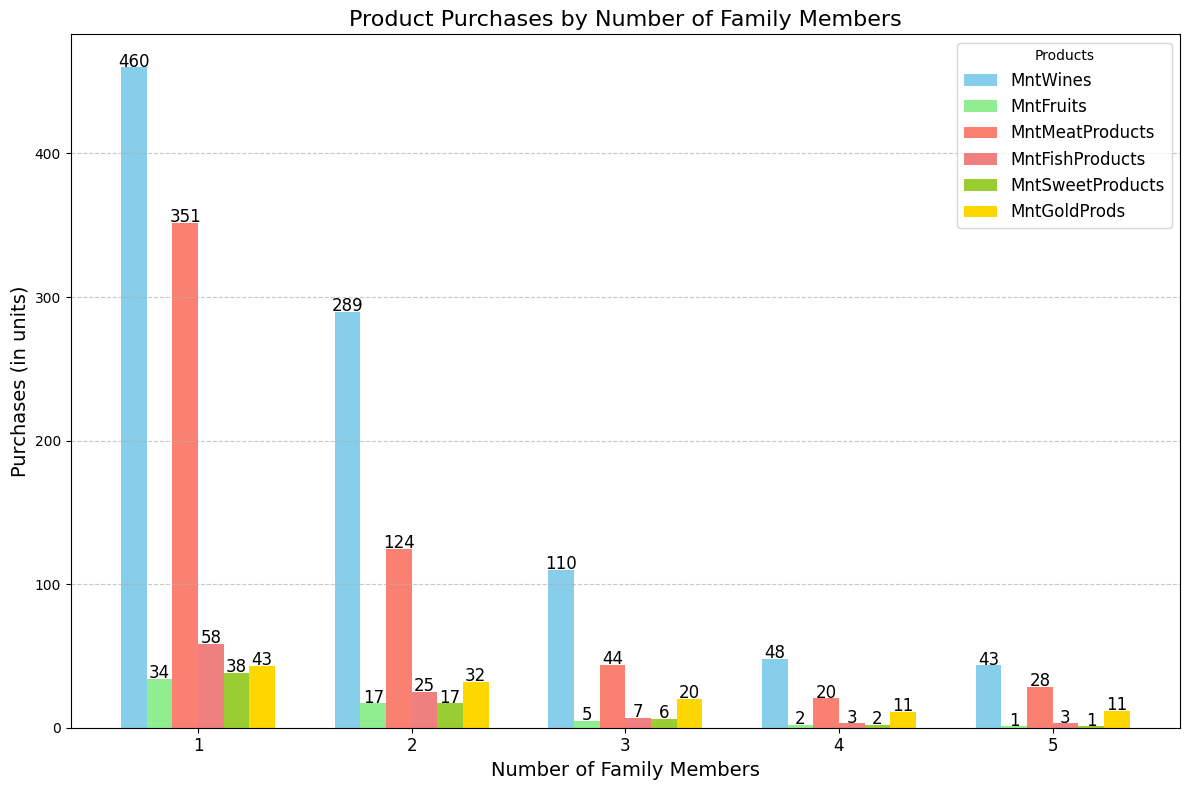

In [524]:
# Creating a bar chart with a larger chart size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the position and width of the bars
bar_width = 0.12
index = np.arange(len(familyhomemember_purchase))  # Position based on FamilyHomeMember category

# Creating plots for each product
bars1 = plt.bar(index - 2.5*bar_width, familyhomemember_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, familyhomemember_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, familyhomemember_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, familyhomemember_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, familyhomemember_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, familyhomemember_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Number of Family Members', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases by Number of Family Members', fontsize=16)
plt.xticks(index, familyhomemember_purchase.index, fontsize=12)  # Displaying FamilyHomeMember labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical space to prevent overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding label numbers for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('expenditure_familyhomemember.png')
plt.show()

The data presents the purchases per unit of various products for households with different numbers of family members. Here's a breakdown of consumer behavior:

1. Households with 1 Family Member:
 - MntWines: 460.0
     - Wine purchases are relatively high (460 units), suggesting that individuals living alone may prioritize luxury items like wine.
 - MntFruits: 34.0
     - Fruit purchases are moderate (34 units), reflecting a balanced diet with a focus on healthy food.
 - MntMeatProducts: 351.5
     - Meat purchases are substantial (351.5 units), indicating a preference for protein-rich foods.
 - MntFishProducts: 58.5
     - Fish purchases are also significant (58.5 units), showing an interest in seafood.
 - MntSweetProducts: 38.0
     - Sweet product purchases are relatively high (38 units), indicating a higher discretionary spending on snacks or treats.
 - MntGoldProds: 43.0
     - Gold product purchases (43 units) show an interest in luxury items, even for a single-member household.
2. Households with 2 Family Members:
 - MntWines: 289.5
     - Wine purchases drop significantly (289.5 units), but remain substantial, likely due to shared consumption.
 - MntFruits: 17.0
     - Fruit purchases decrease (17 units), possibly because the household buys larger quantities for shared consumption.
 - MntMeatProducts: 124.5
     - Meat purchases are moderate (124.5 units), reflecting a shared consumption but at a lower rate than single-member households.
 - MntFishProducts: 25.0
     - Fish purchases are also lower (25 units), but still considerable for a two-person household.
 - MntSweetProducts: 17.0
     - Sweet product purchases are moderate (17 units), similar to fruit purchases.
 - MntGoldProds: 32.0
     - Gold product purchases (32 units) are relatively high, showing that two-member households might still allocate resources toward luxury items.
3. Households with 3 Family Members:
 - MntWines: 110.0
     - Wine purchases significantly decrease (110 units), likely due to more diversified preferences and less individual consumption.
 - MntFruits: 5.0
     - Fruit purchases drop (5 units), indicating that with more members, the household might prioritize other essentials over fresh produce.
 - MntMeatProducts: 44.0
     - Meat purchases decrease to 44 units, reflecting the shared nature of consumption in a larger household.
 - MntFishProducts: 7.0
     - Fish purchases are low (7 units), indicating reduced consumption of seafood.
 - MntSweetProducts: 6.0
     - Sweet product purchases also decrease (6 units) in larger households.
 - MntGoldProds: 20.0
     - Gold product purchases (20 units) are still present but much lower than in smaller households, suggesting less spending on luxury items for larger households.
4. Households with 4 Family Members:
 - MntWines: 48.0
     - Wine purchases are significantly lower (48 units), reflecting more shared consumption.
 - MntFruits: 2.0
     - Fruit purchases are very low (2 units), showing that with more family members, fresh produce is likely bought in bulk but used less per person.
 - MntMeatProducts: 20.5
     - Meat purchases are reduced (20.5 units), indicating lower per-person consumption in a larger household.
 - MntFishProducts: 3.0
     - Fish purchases are low (3 units), suggesting seafood is not a major priority for larger households.
 - MntSweetProducts: 2.0
     - Sweet product purchases are minimal (2 units), reflecting reduced discretionary spending on snacks.
 - MntGoldProds: 11.0
     - Gold product purchases (11 units) are the lowest, reflecting a lower priority for luxury items in larger households.
5. Households with 5 Family Members:
 - MntWines: 43.5
     - Wine purchases are slightly lower (43.5 units) than in the 4-member households, continuing the trend of reduced per-person consumption in larger households.
 - MntFruits: 1.0
     - Fruit purchases are the lowest (1 unit), indicating a very minimal focus on fresh produce.
 - MntMeatProducts: 28.5
     - Meat purchases are relatively stable (28.5 units), possibly due to increased volume purchases for a larger household.
 - MntFishProducts: 3.0
     - Fish purchases remain low (3 units), suggesting minimal consumption.
 - MntSweetProducts: 1.0
     - Sweet product purchases are very low (1 unit), similar to the 4-member households, indicating a lower priority for snacks.
 - MntGoldProds: 11.5
     - Gold product purchases (11.5 units) are slightly higher than in the 4-member households, showing that luxury items are still bought but are generally less prioritized in larger households.

Summary:

Single-member households show the highest level of discretionary spending on products like wine, sweets, and gold, possibly due to the flexibility of personal preferences and disposable income.
As the number of family members increases, spending per unit on luxury items such as wine and gold decreases, while more essential items like meat and fresh produce tend to be purchased in larger quantities but shared.
Households with larger family sizes focus on basic products, and there is a noticeable reduction in the purchase of luxury items, likely due to the prioritization of essential needs and shared consumption among members.

## CONCLUSION OF EDA PART 2 (GLOBAL EDA)

1. Demographics:

 - Age Range:
     - The majority of data comes from Millennials (937) and Gen X (831).

 Baby Boomers (314) and Gen Z (147) have smaller numbers.

 - Education:
     - Most have a Bachelor's degree (1,120), followed by a Master's (571), and a Doctorate (484). Only a few do not have a formal degree (54).

 - Marital Status:
     - Most are married (863) or living together (577). The number of singles (485) and divorced (304) is lower.

2. Income:

 - The income category breakdown is relatively even between the "Lower," "Lower-Middle," "Upper-Middle," and "Upper" categories, with a slight edge in the "Upper" category (577).

3. Family:

 - Most do not have children at home (Kidhome 0: 1,286), while most households do not have teenagers (Teenhome 0: 1,152).
 - The most common households are 3 people (887) and 2 people (758), with large households (4–5 people) less common.

4. Monetary (Total Spending):

 - Age Range:
     - Gen Z spends the most (9,455), followed by Baby Boomers (8,536) and Gen X (8,533). Millennials spend the least (5,626).
 - Education:
     - PhD graduates spend the most (8,976), while non-degree holders spend the least (4,740).
 - Marital Status:
     - Those who are divorced spend the most (8,857), while those who are married or living alone spend slightly less.
 - Income Category:
     - Higher income correlates with higher spending, especially in the "Upper" category (12,540) compared to the "Lower" (1,719).
 - Family Members:
     - Households with fewer members (1–2 people) spend more than households with more members.

5. Shopping Preferences:

 - Age Range:
     - Baby Boomers are the highest value wine and food buyers, followed by Gen X. Millennials and Gen Z tend to have lower consumption across all categories.
 - Education:
     - PhD graduates are more likely to buy wine (276) than Master's or Bachelor's graduates.
 - Marital Status:
     - Small differences in food category spending, but divorced spend more on wine.
 - Income:
     - Spending on food and luxury goods increases with income, especially in the "Upper" category.
 - Family Members:
     - Households with fewer members have higher spending per food category, especially households with 1 member.
 - Key Takeaways:
     - Older generations (Baby Boomers, Gen X) and individuals with higher education (Doctoral) or higher income (“Upper”) have higher spending patterns, especially on wine and food. Smaller households spend more per capita than larger households, while Millennials and Gen Z have lower economic contributions across all categories.

#RFM

## VIEWING DATA COLUMN ID, RECENCY, FREQUENCY, MONETARY

In [525]:
data_merge[['ID','Recency', 'Frequency', 'Monetary']].head()

ID  Recency  Frequency  Monetary
0  5524       58         25  25943.76
1  2174       38          6    465.27
2  4141       26         21  15874.17
3  6182       26          8    609.81
4  5324       94         19   6900.29

## HISTOGRAM AND BOXPLOT VISUALIZATION OF RECENCY, FREQUENCY, MONETARY

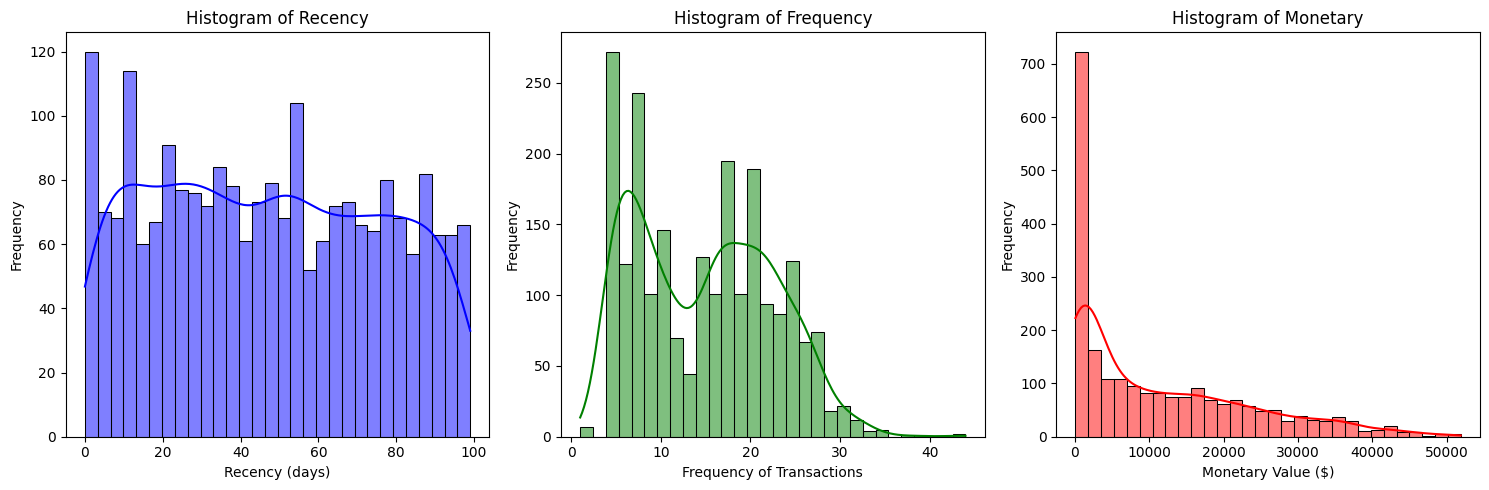

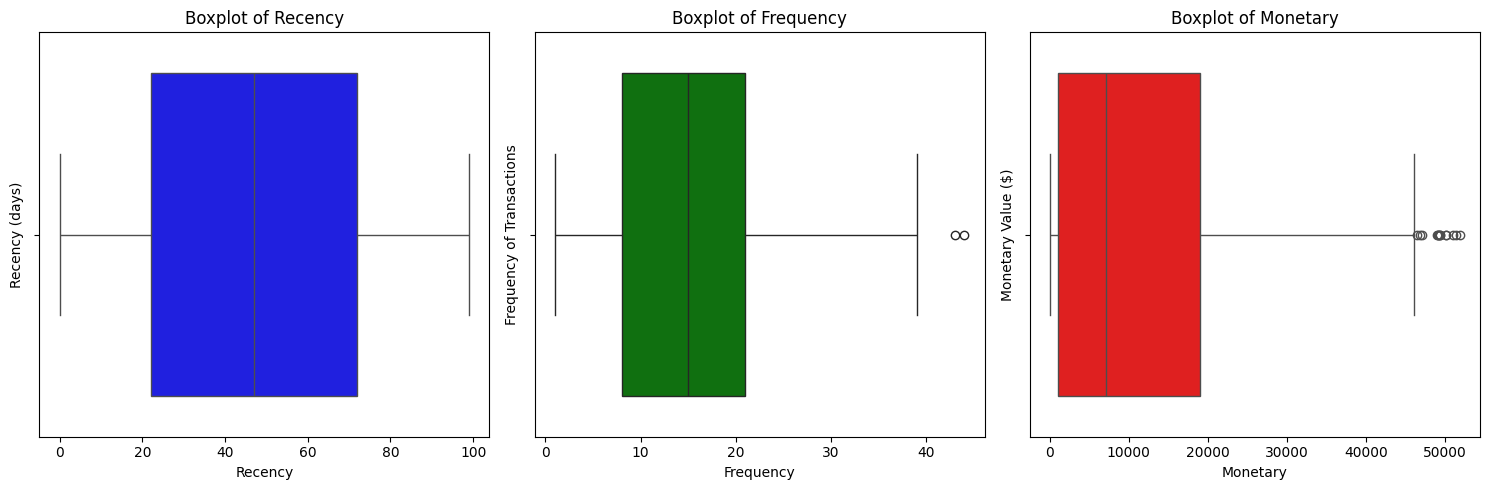

In [526]:
# Visualization of histograms for Recency, Frequency, and Monetary
plt.figure(figsize=(15, 5))

# Recency Histogram
plt.subplot(1, 3, 1)
sns.histplot(data_merge['Recency'], kde=True, color='blue', bins=30)
plt.title('Histogram of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')

# Frequency Histogram
plt.subplot(1, 3, 2)
sns.histplot(data_merge['Frequency'], kde=True, color='green', bins=30)
plt.title('Histogram of Frequency')
plt.xlabel('Frequency of Transactions')
plt.ylabel('Frequency')

# Monetary Histogram
plt.subplot(1, 3, 3)
sns.histplot(data_merge['Monetary'], kde=True, color='red', bins=30)
plt.title('Histogram of Monetary')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Frequency')

plt.tight_layout()
# Saving the image
plt.savefig('histogram_rfm.png')
plt.show()

# Visualization of boxplots for Recency, Frequency, and Monetary
plt.figure(figsize=(15, 5))

# Recency Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x=data_merge['Recency'], color='blue')
plt.title('Boxplot of Recency')
plt.ylabel('Recency (days)')

# Frequency Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=data_merge['Frequency'], color='green')
plt.title('Boxplot of Frequency')
plt.ylabel('Frequency of Transactions')

# Monetary Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=data_merge['Monetary'], color='red')
plt.title('Boxplot of Monetary')
plt.ylabel('Monetary Value ($)')

plt.tight_layout()
# Saving the boxplot image
plt.savefig('boxplot_rfm.png')
plt.show()

In [527]:
data_merge[['ID','Recency', 'Frequency', 'Monetary']].describe()

ID      Recency    Frequency      Monetary
count   2229.000000  2229.000000  2229.000000   2229.000000
mean    5590.293854    46.992373    14.895917  11500.160682
std     3243.055395    28.875319     7.656912  11988.694163
min        0.000000     0.000000     1.000000     71.770000
25%     2829.000000    22.000000     8.000000   1013.080000
50%     5455.000000    47.000000    15.000000   7085.390000
75%     8427.000000    72.000000    21.000000  19059.820000
max    11191.000000    99.000000    44.000000  51869.610000

## PERFORMING RFM_SCORE SEARCH

In [528]:
# Adding the 'RFM_Score' column to rfm_df based on customized categories
def rfm_score(row):
    # Recency (in days, based on appropriate percentiles or ranges)
    if row['Recency'] <= 22:  # 25% quantile
        r = 4
    elif row['Recency'] <= 47:  # Median (50% quantile)
        r = 3
    elif row['Recency'] <= 72:  # 75% quantile
        r = 2
    else:
        r = 1

    # Frequency (number of transactions)
    if row['Frequency'] <= 8:
        f = 1
    elif row['Frequency'] <= 15:
        f = 2
    elif row['Frequency'] <= 21:
        f = 3
    else:
        f = 4

    # Monetary (total spending)
    if row['Monetary'] <= 1013.08:  # 25% quantile
        m = 1
    elif row['Monetary'] <= 7085.39:  # Median (50% quantile)
        m = 2
    elif row['Monetary'] <= 19059.82:  # 75% quantile
        m = 3
    else:
        m = 4

    return r + f + m

# Assuming rfm_df is an existing DataFrame, for example:
# rfm_df = pd.read_csv('data.csv') # Data with 'Recency', 'Frequency', 'Monetary' columns

# Applying the rfm_score function to the rfm_df DataFrame and creating the 'RFM_Score' column
data_merge['RFM_Score'] = data_merge.apply(rfm_score, axis=1)

# Displaying the RFM results
data_merge[['ID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']].head()

ID  Recency  Frequency  Monetary  RFM_Score
0  5524       58         25  25943.76         10
1  2174       38          6    465.27          5
2  4141       26         21  15874.17          9
3  6182       26          8    609.81          5
4  5324       94         19   6900.29          6

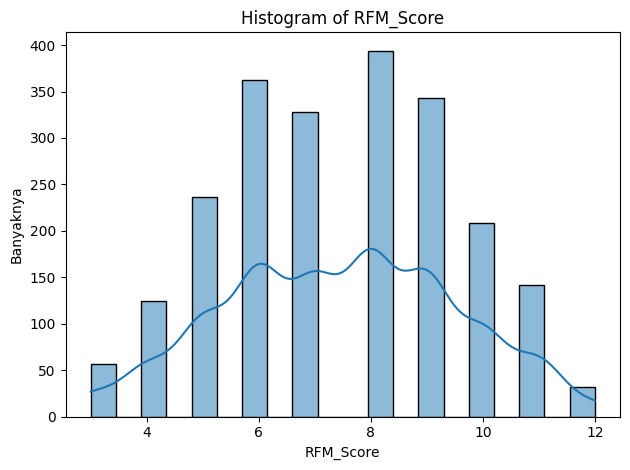

In [529]:
# RFM_Score Visualization
sns.histplot(data_merge['RFM_Score'], kde = True)
plt.title('Histogram of RFM_Score')
plt.xlabel('RFM_Score')
plt.ylabel('Banyaknya')
plt.tight_layout()
# Save image
plt.savefig('histogram_rfm_score.png')
plt.show()

## PERFORMING R_SCORE, F_SCORE, M_SCORE SEARCH

In [530]:
# Function to calculate RFM score based on customized categories
def rfm_score(row):
    # Recency (in days, based on appropriate percentiles or ranges)
    if row['Recency'] <= 22:  # 25% quantile
        r = 4
    elif row['Recency'] <= 47:  # Median (50% quantile)
        r = 3
    elif row['Recency'] <= 72:  # 75% quantile
        r = 2
    else:
        r = 1

    # Frequency (number of transactions)
    if row['Frequency'] <= 8:
        f = 1
    elif row['Frequency'] <= 15:
        f = 2
    elif row['Frequency'] <= 21:
        f = 3
    else:
        f = 4

    # Monetary (total spending)
    if row['Monetary'] <= 1013.08:  # 25% quantile
        m = 1
    elif row['Monetary'] <= 7085.39:  # Median (50% quantile)
        m = 2
    elif row['Monetary'] <= 19059.82:  # 75% quantile
        m = 3
    else:
        m = 4

    return pd.Series({'R_Score': r, 'F_Score': f, 'M_Score': m})

# Applying the rfm_score function to the rfm DataFrame
data_merge[['R_Score', 'F_Score', 'M_Score']] = data_merge.apply(rfm_score, axis=1)

# Calculating the RFM_Score column as the sum of R, F, and M
data_merge['RFM_Score'] = data_merge['R_Score'] + data_merge['F_Score'] + data_merge['M_Score']

# Displaying the RFM results
data_merge[['ID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'R_Score', 'F_Score', 'M_Score']].head()

ID  Recency  Frequency  Monetary  RFM_Score  R_Score  F_Score  M_Score
0  5524       58         25  25943.76         10        2        4        4
1  2174       38          6    465.27          5        3        1        1
2  4141       26         21  15874.17          9        3        3        3
3  6182       26          8    609.81          5        3        1        1
4  5324       94         19   6900.29          6        1        3        2

## DOING CUSTOMER SEGMENT

### WHY 7 SEGMENTS?

1. Enough to Distinguish Key Patterns:

  - With 7 segments, we are able to identify customers based on a combination of Recency and Frequency-Monetary (FM) scores.
  - For example:
     - Champions: Customers who have recently transacted (high recency) and frequently purchased with high value (high FM).
     - At Risk: Customers who used to be high value (high FM) but have not transacted in a long time (low recency).
     
     With this number, each segment has a unique and actionable behavior pattern.

2. Flexibility for Marketing Strategy:

  - Dividing customers into 7 segments allows companies to develop different strategies for each segment.
     - Champions: Give rewards to retain them.
     - Lost: Send big discounts to attract them back.
     - Potential Loyalists: Give promotions to level up to Loyal Customers.
     
     This strategy is not too complicated and still executable.

3. Balance between Simplicity and Detail:

  - The 7 segments are simple enough to analyze but also detailed enough to provide real insights, without overwhelming the marketing team or data with too many groups.

In [531]:
# Calculates FM_Score
data_merge['FM_Score'] = data_merge['F_Score'] + data_merge['M_Score']

# Customer Segmentation using IF-ELSE Conditions
def segment_customer(row):
  recency = row['R_Score']
  fm_combined = row['FM_Score']
  if recency >= 4 and fm_combined >= 6:
    return 'Champions'
  elif recency >= 3 and fm_combined >= 5:
    return 'Loyal Customers'
  elif recency >= 2 and fm_combined >= 5:
    return 'Potential Loyalist'
  elif recency >= 3 and fm_combined <= 4:
    return 'Promising'
  elif recency < 2 and fm_combined >= 5:
    return 'At Risk'
  elif recency < 2 and fm_combined <= 4:
    return 'Lost'
  else:
    return 'Uncategorized'

# Implement segmentation function
data_merge['Customer_Segment'] = data_merge.apply(segment_customer, axis=1)

# Displays RFM results
data_merge[['ID','Recency', 'Frequency', 'Monetary', 'RFM_Score', 'R_Score', 'F_Score', 'M_Score', 'FM_Score', 'Customer_Segment']].head()

ID  Recency  Frequency  Monetary  RFM_Score  R_Score  F_Score  M_Score  \
0  5524       58         25  25943.76         10        2        4        4   
1  2174       38          6    465.27          5        3        1        1   
2  4141       26         21  15874.17          9        3        3        3   
3  6182       26          8    609.81          5        3        1        1   
4  5324       94         19   6900.29          6        1        3        2   

   FM_Score    Customer_Segment  
0         8  Potential Loyalist  
1         2           Promising  
2         6     Loyal Customers  
3         2           Promising  
4         5             At Risk

## CUSTOMER SEGMENT DATA AND VISUALIZATION

In [532]:
data_merge['Customer_Segment'].value_counts()

Customer_Segment
Promising             460
Loyal Customers       454
At Risk               339
Potential Loyalist    329
Uncategorized         229
Champions             214
Lost                  204
Name: count, dtype: int64

In [533]:
data_merge['Customer_Segment'].value_counts()/len(data_merge)*100

Customer_Segment
Promising             20.637057
Loyal Customers       20.367878
At Risk               15.208614
Potential Loyalist    14.759982
Uncategorized         10.273665
Champions              9.600718
Lost                   9.152086
Name: count, dtype: float64

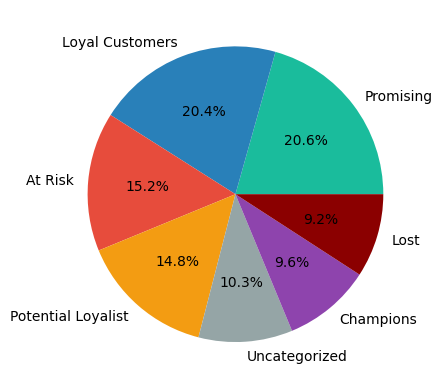

In [534]:
# More contrasting colors for each category in Customer_Segment
colors = {
    'Promising': '#1abc9c',          # Light green (indicating potential and hope)
    'Loyal Customers': '#2980b9',     # Dark blue (loyalty, trust)
    'At Risk': '#e74c3c',             # Bright red (warning, danger)
    'Potential Loyalist': '#f39c12',  # Orange (opportunity for loyalty, energetic)
    'Uncategorized': '#95a5a6',       # Light gray (undefined, neutral)
    'Champions': '#8e44ad',           # Purple (victory, achievement)
    'Lost': '#8B0000'                 # Dark red (loss, grim, seriousness)
}

# Getting the count of each category
value_counts = data_merge['Customer_Segment'].value_counts()

# Assigning colors according to the order of categories in value_counts
pie_colors = [colors.get(segment, '#7f8c8d') for segment in value_counts.index]

# Creating a pie chart with the adjusted colors and white-colored numbers
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=pie_colors)
# Saving the image
plt.savefig('pie_chart_customer_segment.png')
plt.show()

## PERFORMING 3D VISUALIZATION OF CUSTOMER_SEGMENT FOR R_SCORE, F_SCORE, M_SCORE

In [535]:
import plotly as py
import plotly.graph_objs as go

# More contrasting colors for each category in Customer_Segment
color_map = {
    'Promising': '#1abc9c',          # Light green (indicating potential and hope)
    'Loyal Customers': '#2980b9',     # Dark blue (loyalty, trust)
    'At Risk': '#e74c3c',             # Bright red (warning, danger)
    'Potential Loyalist': '#f39c12',  # Orange (opportunity for loyalty, energetic)
    'Uncategorized': '#95a5a6',       # Light gray (undefined, neutral)
    'Champions': '#8e44ad',           # Purple (victory, achievement)
    'Lost': '#8B0000'                 # Dark red (loss, grim, seriousness)
}

# Change marker colors using the mapping
colors = [color_map[segment] for segment in data_merge['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=data_merge['R_Score'],
    y=data_merge['F_Score'],
    z=data_merge['M_Score'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Use colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)

## PERFORMING 3D CUSTOMER_SEGMENT VISUALIZATION FOR RECENCY, FREQUENCY, MONETARY

In [536]:
import plotly as py
import plotly.graph_objs as go

# More contrasting colors for each category in Customer_Segment
color_map = {
    'Promising': '#1abc9c',          # Light green (indicating potential and hope)
    'Loyal Customers': '#2980b9',     # Dark blue (loyalty, trust)
    'At Risk': '#e74c3c',             # Bright red (warning, danger)
    'Potential Loyalist': '#f39c12',  # Orange (opportunity for loyalty, energetic)
    'Uncategorized': '#95a5a6',       # Light gray (undefined, neutral)
    'Champions': '#8e44ad',           # Purple (victory, achievement)
    'Lost': '#8B0000'                 # Dark red (loss, grim, seriousness)
}

# Change marker colors using the mapping
colors = [color_map[segment] for segment in data_merge['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=data_merge['Recency'],
    y=data_merge['Frequency'],
    z=data_merge['Monetary'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Use colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)

## RFM CONCLUSION

Based on the distribution of the number of customers in each segment, here is a breakdown of the number of customers per segment:

1. Promising: 20.65%
2. Loyal Customers: 20.34%
3. At Risk: 15.28%
4. Potential Loyalist: 14.74%
5. Uncategorized: 10.26%
6. Champions: 9.63%
7. Lost: 9.09%

Promising and Loyal Customers have the largest number of customers, indicating that the company has many opportunities to develop customers from this segment to be more loyal and even become Champions. The At Risk and Potential Loyalist segments provide opportunities for recovery and optimization, while Champions and Lost have the potential to increase revenue and reduce churn.

# FURTHER ANALYSIS

## MEDIAN PER SEGMENT

In [537]:
# Calculating median based on segmentation
median_per_segment = data_merge.groupby("Customer_Segment")[
    ["Recency", "Frequency", "Monetary", "RFM_Score", "R_Score", "F_Score", "M_Score", "FM_Score"]
].median()

median_per_segment

Recency  Frequency   Monetary  RFM_Score  R_Score  \
Customer_Segment                                                        
At Risk                86.0       19.0  15870.090        7.0      1.0   
Champions              10.0       21.0  18493.830       11.0      4.0   
Lost                   86.0        8.0   1112.010        4.0      1.0   
Loyal Customers        29.5       18.0  15653.845        9.0      3.0   
Potential Loyalist     58.0       20.0  15382.630        8.0      2.0   
Promising              22.0        8.0    933.370        7.0      4.0   
Uncategorized          60.0        8.0    965.160        5.0      2.0   

                    F_Score  M_Score  FM_Score  
Customer_Segment                                
At Risk                 3.0      3.0       6.0  
Champions               3.0      3.0       7.0  
Lost                    1.0      2.0       3.0  
Loyal Customers         3.0      3.0       5.0  
Potential Loyalist      3.0      3.0       6.0  
Promising               1.0      1.0       3.0  
Uncategorized           1.0      1.0       3.0

## FURTHER ANALYSIS DECISION

Why Analyze Champions First?

1. Champions Are the Best and Most Valuable Customers
  - Based on the data:
     - Recency: 10 (the lowest, meaning they recently made a purchase).
     - Frequency: 21 (the highest purchase frequency among all segments).
     - Monetary: 18,493.83 (the highest spending across all segments).
  - Champions lead in every metric, making them the most significant contributors to business revenue.

2. Opportunity to Increase Revenue

  - Champions are already loyal, but there is potential for upselling and cross-selling as they are more likely to spend more or explore other products.
  - By understanding their needs, you can further maximize their transaction value.

3. Retaining Key Customers

  - Losing Champions would greatly impact revenue due to their substantial contributions.
  - Analyzing Champions allows you to identify:
     - What they value most about your business.
     - Which strategies work best to retain them.

4. Leverage Champions as Advocates

  - Champions are likely to become advocates for your business. They can:
     - Attract new customers through referrals (word-of-mouth effect).
     - Strengthen your brand image and reputation.

5. Benchmark for Other Segments

  - Analyzing Champions helps uncover behavioral patterns that set them apart from other segments. These insights can be used to:
     - Elevate Loyal Customers to Champions.
     - Reactivate At Risk customers to make them active like Champions.

6. Quick ROI from Investments in Champions

  - Since Champions are already active and high-value, investing in understanding and retaining them yields faster returns compared to reactivating or acquiring new customers from other segments.

Conclusion

Analyzing Champions first is crucial because they are your most valuable customers. Understanding this segment helps you:

- Maximize revenue from your loyal customer base.
- Create strategies that can be applied to other segments.
- Retain the customers with the greatest impact on your business.

# EXPLORATORY DATA ANALYSIS (EDA) PART 3

Conduct an exploratory analysis to better understand the demographic characteristics of the Champions customer segment. This analysis aims to identify the customer profile in the segment based on demographic variables such as age, gender, geographic location, education level, employment status, and income level.

### CHAMPIONS SEGMENTATION ANALYSIS

In [538]:
datachampions = data_merge[data_merge['Customer_Segment'] == 'Champions']
datachampions

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
5      7446        1967   47         Gen X    Master   Cohabitation  62513.0   
23     4047        1954   60  Baby Boomers  Doctoral        Married  65324.0   
27     5255        1986   28   Millennials  Bachelor         Single  42160.0   
34     8755        1946   68  Baby Boomers    Master        Married  68657.0   
40     8601        1980   34   Millennials  Bachelor        Married  80011.0   
...     ...         ...  ...           ...       ...            ...      ...   
2194   2632        1954   60  Baby Boomers  Bachelor        Married  50501.0   
2197  10968        1969   45         Gen X  Bachelor         Single  57731.0   
2198  11133        1973   41   Millennials  Doctoral         Single  48432.0   
2202   1092        1980   34   Millennials  Bachelor        Married  61014.0   
2217   7366        1982   32   Millennials    Master         Single  75777.0   

     IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
5      Upper-Middle        0                 3         1  2013-09-09   
23     Upper-Middle        0                 3         1  2014-01-11   
27            Upper        1                 2         0  2013-02-20   
34            Upper        0                 2         0  2013-02-20   
40            Upper        0                 3         1  2013-04-29   
...             ...      ...               ...       ...         ...   
2194   Lower-Middle        1                 4         1  2013-06-18   
2197   Upper-Middle        0                 2         1  2012-11-23   
2198   Lower-Middle        0                 2         1  2012-10-18   
2202   Upper-Middle        0                 3         1  2012-08-11   
2217          Upper        0                 1         0  2013-07-04   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
5                  293       16       520         42               98   
23                 169        0       384          0              102   
27                 494       19         5          1                3   
34                 494        4       482         34              471   
40                 426        3       421         76              536   
...                ...      ...       ...        ...              ...   
2194               376       10       297          0               38   
2197               583        0       266         21              300   
2198               619        3       322          3               50   
2202               687       17       269        129              495   
2217               360       12       712         26              538   

      MntFishProducts  MntSweetProducts  MntGoldProds  WinesExpense  \
5                   0                42            14       16640.0   
23                 21                32             5       12288.0   
27                  3               263           362         160.0   
34                119                68            22       15424.0   
40                 82               178           102       13472.0   
...               ...               ...           ...           ...   
2194               13                 0           152       26656.0   
2197               65                 8            44        9376.0   
2198                4                 3            42        9504.0   
2202              182                43            29       10304.0   
2217               69                13            80       10624.0   

      FruitsExpense  MeatExpense  FishExpense  SweetExpense  GoldExpense  \
5             168.0        490.0          0.0         95.34        140.0   
23              0.0        510.0        178.5         72.64         50.0   
27              4.0         15.0         25.5        597.01       3620.0   
34            136.0       2355.0       1011.5        154.36        220.0   
40            304.0       2680.0        697.0        404.06       1020.0 

#### GENERAL CHARACTERISTICS OF CHAMPIONS CUSTOMERS

##### GENERATION

In [539]:
# Count the number of customers in each age category
age_range_counts = datachampions['Age_Range'].value_counts()
age_range_counts

Age_Range
Gen X           92
Millennials     78
Baby Boomers    34
Gen Z           10
Name: count, dtype: int64

In [540]:
len(datachampions)

214

In [541]:
# Calculating percentage
genx = round((92 / len(datachampions)) * 100)
mill = round((78 / len(datachampions)) * 100)
baby = round((34 / len(datachampions)) * 100)
genz = round((10 / len(datachampions)) * 100)

# Displaying results
print(f"Gen X: {genx}%")
print(f"Millennials: {mill}%")
print(f"Baby Boomers: {baby}%")
print(f"Gen Z: {genz}%")

Gen X: 43%
Millennials: 36%
Baby Boomers: 16%
Gen Z: 5%


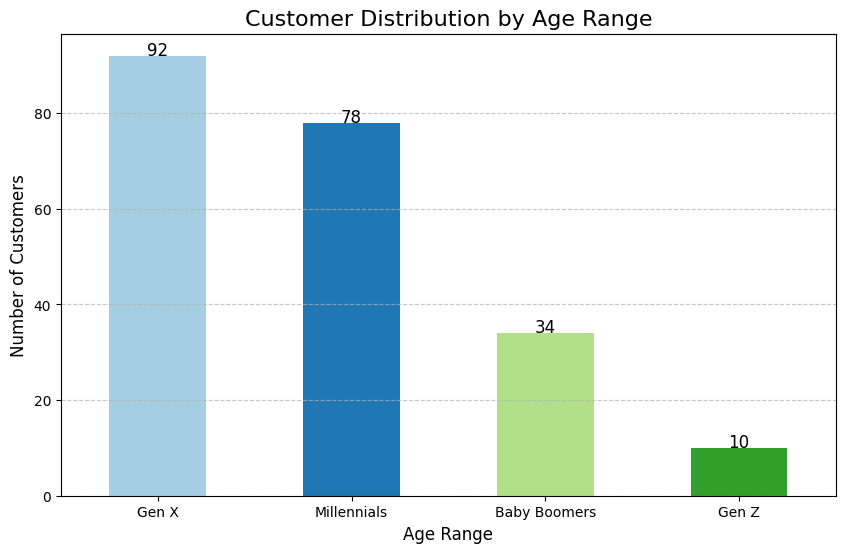

In [542]:
# Creating a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = age_range_counts.plot(kind='bar', color=plt.cm.Paired(range(len(education_value))))

# Adding values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines by using `axis='x'`

# Adding title and labels
plt.title('Customer Distribution by Age Range', fontsize=16)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Saving the image
plt.savefig('histogram_age_range_champions.png')
plt.show()

Conclusions based on the data provided:

- Gen X dominates with 92 people, indicating that this generation is the most represented.
- Millennials are in second place with 79 people, slightly less than Gen X.
- Baby Boomers have 34 people, a much smaller number than Gen X and Millennials.
- Gen Z is the least with only 10 people, most likely because of their young age so they have not participated much in the context of this data.

This conclusion shows that the Gen X and Millennials age groups are the largest groups, while Baby Boomers and Gen Z tend to be smaller in number.

##### EDUCATION

In [543]:
# Count the number of customers in each age category
education_value = datachampions['Education'].value_counts()
education_value

Education
Bachelor    108
Master       54
Doctoral     52
Name: count, dtype: int64

In [544]:
len(datachampions)

214

In [545]:
# Calculating percentage
bach = round((108 / len(datachampions)) * 100, 2)
mas = round((54 / len(datachampions)) * 100, 2)
doc = round((52 / len(datachampions)) * 100, 2)

# Displaying results
print(f"Bachelor: {bach}%")
print(f"Master: {mas}%")
print(f"Doctoral: {doc}%")

Bachelor: 50.47%
Master: 25.23%
Doctoral: 24.3%


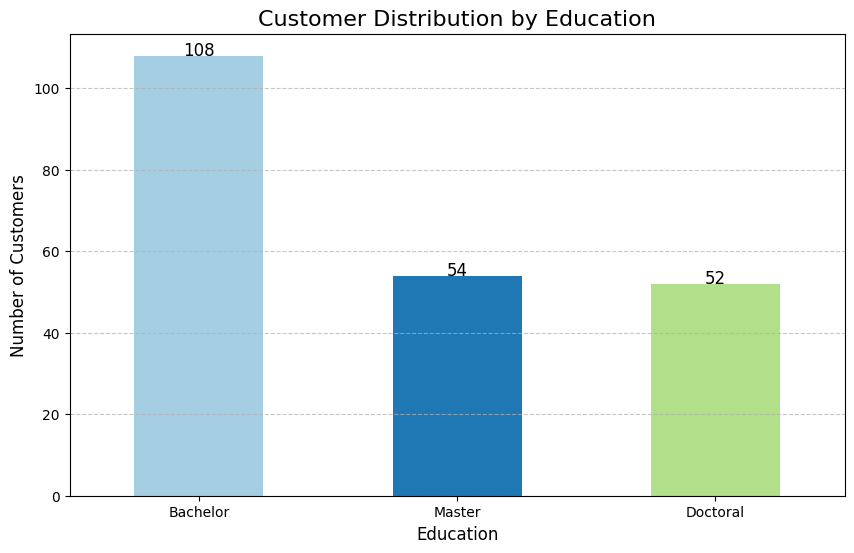

In [546]:
# Create a bar chart with different colors for each bar.
plt.figure(figsize=(10,6))
bars = education_value.plot(kind='bar', color=plt.cm.Paired(range(len(education_value))))

# Adds value above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Adding title and labels
plt.title('Customer Distribution by Education', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Saving the image
plt.savefig('histogram_education_champions.png')
plt.show()

Conclusions based on the education data provided:

- Bachelor's degree has the largest number, at 108, indicating that a bachelor's degree is the most common level of education.
- Master's degree is followed by 54, almost half of the number of bachelor's graduates.
- Doctoral degree has the smallest number, at 52, but not too far behind the number of master's graduates.

This conclusion suggests that the majority of individuals in this data have education at the bachelor's level, with the proportion decreasing at the master's and doctoral levels.

##### MARITAL STATUS

In [547]:
# Count the number of customers in each age category
marital_status_value = datachampions['Marital_Status'].value_counts()
marital_status_value

Marital_Status
Married         87
Cohabitation    59
Single          39
Divorced        29
Name: count, dtype: int64

In [548]:
len(datachampions)

214

In [549]:
# Calculating percentage
marr = round((87 / len(datachampions)) * 100,2)
coh = round((59 / len(datachampions)) * 100,2)
sing = round((39 / len(datachampions)) * 100,2)
div = round((29 / len(datachampions)) * 100,2)

# Displaying results
print(f"Married: {marr}%")
print(f"Cohabitation: {coh}%")
print(f"Single: {sing}%")
print(f"Divorced: {div}%")

Married: 40.65%
Cohabitation: 27.57%
Single: 18.22%
Divorced: 13.55%


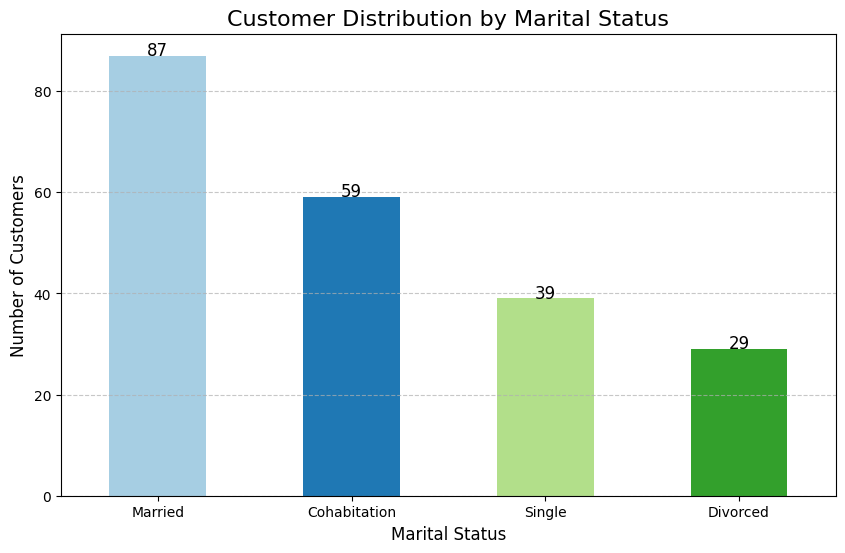

In [550]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = marital_status_value.plot(kind='bar', color=plt.cm.Paired(range(len(marital_status_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Adding title and labels
plt.title('Customer Distribution by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Saving the image
plt.savefig('histogram_marital_status_champions.png')
plt.show()

Conclusions based on the given marital status:

- Married is the most common status, with 87 people, indicating that the majority of individuals in this data are married.
- Cohabitation has 60 people, indicating that unmarried relationships are also quite significant.
- Single has 39 people, indicating that some individuals are not married.
- Divorced has the least number, with 29 people, indicating that divorce is a less common status in this data.

This conclusion suggests that the majority of individuals in this data have a marital status, either married or in a cohabitation relationship, with fewer being single or divorced.

##### INCOME CATEGORY

In [551]:
# Count the number of customers in each age category
income_value = datachampions['IncomeCategory'].value_counts()
income_value

IncomeCategory
Upper           106
Upper-Middle     74
Lower-Middle     28
Lower             6
Name: count, dtype: int64

In [552]:
len(datachampions)

214

In [553]:
# Calculating percentage
Upp = round((87 / len(datachampions)) * 100,2)
Upp_Mid = round((59 / len(datachampions)) * 100,2)
Low_Mid = round((39 / len(datachampions)) * 100,2)
Low = round((29 / len(datachampions)) * 100,2)

# Displaying results
print(f"Upper: {Upp}%")
print(f"Upper-Middle: {Upp_Mid}%")
print(f"Lower-Middle: {Low_Mid}%")
print(f"Lower: {Low}%")

Upper: 40.65%
Upper-Middle: 27.57%
Lower-Middle: 18.22%
Lower: 13.55%


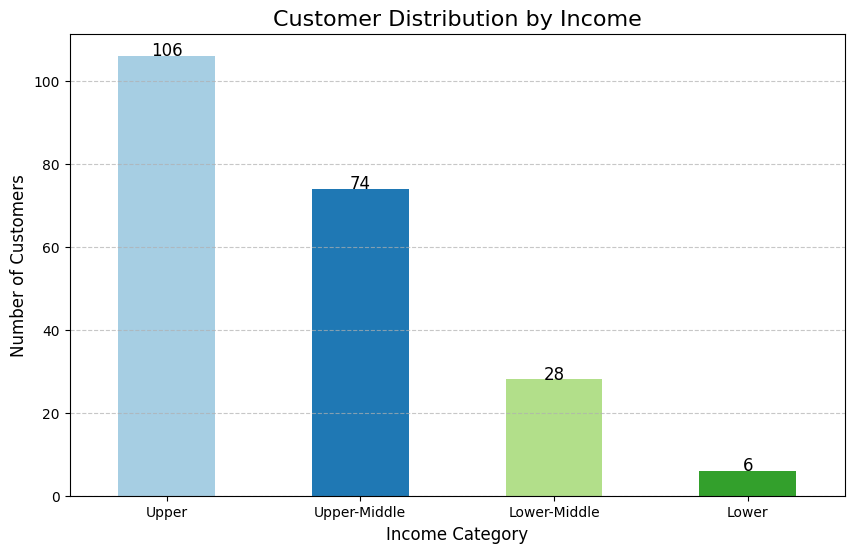

In [554]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = income_value.plot(kind='bar', color=plt.cm.Paired(range(len(income_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Adding title and labels
plt.title('Customer Distribution by Income', fontsize=16)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Saving the image
plt.savefig('histogram_income_champions.png')
plt.show()

Conclusions based on the income categories given:

- Upper is the most numerous category, with 106 people, indicating that most individuals in this data are in the high income category.
- Upper-Middle has 74 people, indicating that many individuals are in the upper middle income level.
- Lower-Middle has 28 people, indicating a group with lower incomes than the first two categories.
- Lower has the least number, with 6 people, indicating that only a few individuals are in the low income category.

This conclusion suggests that the majority of individuals in this data have incomes in the high or upper middle category, with only a few in the lower middle or low income categories.

#### FAMILY STRUCTURE

##### KIDHOME

In [555]:
# Count the number of customers in each age category
Kidhome_value = datachampions['Kidhome'].value_counts()
Kidhome_value

Kidhome
0    172
1     40
2      2
Name: count, dtype: int64

In [556]:
len(datachampions)

214

In [557]:
# Calculating percentage
nol = round((172 / len(datachampions)) * 100,2)
satu = round((40 / len(datachampions)) * 100,2)
dua = round((2 / len(datachampions)) * 100,2)

# Displaying results
print(f"0 Child: {nol}%")
print(f"1 Child: {satu}%")
print(f"2 Child: {dua}%")

0 Child: 80.37%
1 Child: 18.69%
2 Child: 0.93%


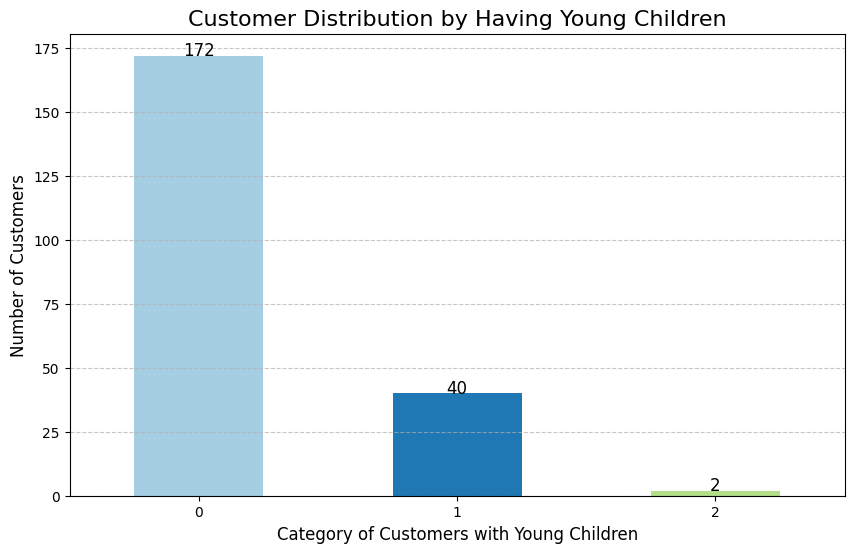

In [558]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = Kidhome_value.plot(kind='bar', color=plt.cm.Paired(range(len(Kidhome_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Adding title and labels
plt.title('Customer Distribution by Having Young Children', fontsize=16)
plt.xlabel('Category of Customers with Young Children', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Saving the image
plt.savefig('histogram_kidhome_champions.png')
plt.show()

Conclusions based on the number of children (Kidhome) given:

- 0 children is the largest number, with 172 people, indicating that the majority of individuals in this data do not have children.
- 1 child is recorded as many as 40 people, indicating a group that has one child.
- 2 children has the smallest number, with 2 people, indicating that only a few individuals have two children.

This conclusion suggests that the majority of individuals in this data do not have children, with a smaller number having one or two children.

##### TEENHOME

In [559]:
# Count the number of customers in each age category
Teenhome_value = datachampions['Teenhome'].value_counts()
Teenhome_value

Teenhome
0    108
1    103
2      3
Name: count, dtype: int64

In [560]:
len(datachampions)

214

In [561]:
# Calculating percentage
noll = round((108 / len(datachampions)) * 100,2)
satuu = round((103 / len(datachampions)) * 100,2)
duaa = round((3 / len(datachampions)) * 100,2)

# Displaying results
print(f"0 Teen: {noll}%")
print(f"1 Teen: {satuu}%")
print(f"2 Teen: {duaa}%")

0 Teen: 50.47%
1 Teen: 48.13%
2 Teen: 1.4%


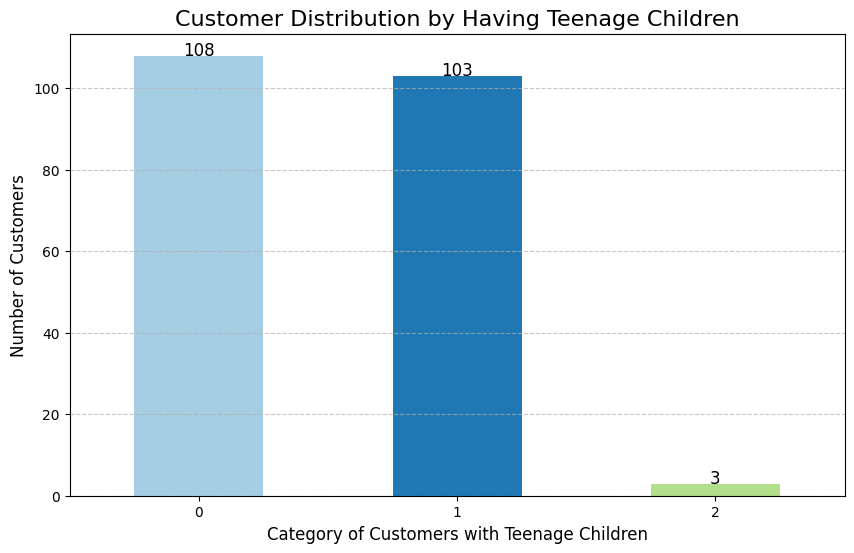

In [562]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = Teenhome_value.plot(kind='bar', color=plt.cm.Paired(range(len(Teenhome_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Adding title and labels
plt.title('Customer Distribution by Having Teenage Children', fontsize=16)
plt.xlabel('Category of Customers with Teenage Children', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Saving the image
plt.savefig('histogram_teenhome_champions.png')
plt.show()


Conclusions based on the number of teenage children (Teenhome) given:

- 0 teenage children is the largest number, with 109 people, indicating that the majority of individuals in this data do not have teenage children.
- 1 teenage child is recorded as many as 103 people, indicating a group that has one teenage child.
- 2 teenage children has the smallest number, with 3 people, indicating that only a few individuals have two teenage children.

This conclusion suggests that the majority of individuals in this data do not have teenage children, with a smaller number having one or two teenage children.

##### FAMILY HOME MEMBER

In [563]:
# Count the number of customers in each age category
FamilyHomeMember_value = datachampions['FamilyHomeMember'].value_counts()
FamilyHomeMember_value

FamilyHomeMember
2    91
3    68
1    32
4    20
5     3
Name: count, dtype: int64

In [564]:
len(datachampions)

214

In [565]:
# Calculating percentage
satuuu = round((32 / len(datachampions)) * 100,2)
duaaa = round((91 / len(datachampions)) * 100,2)
tigaaa = round((68 / len(datachampions)) * 100,2)
empattt = round((20 / len(datachampions)) * 100,2)
limaaa = round((3 / len(datachampions)) * 100,2)

# Display the results
print(f"1 Person in the Family: {satuuu}%")
print(f"2 People in the Family: {duaaa}%")
print(f"3 People in the Family: {tigaaa}%")
print(f"4 People in the Family: {empattt}%")
print(f"5 People in the Family: {limaaa}%")

1 Person in the Family: 14.95%
2 People in the Family: 42.52%
3 People in the Family: 31.78%
4 People in the Family: 9.35%
5 People in the Family: 1.4%


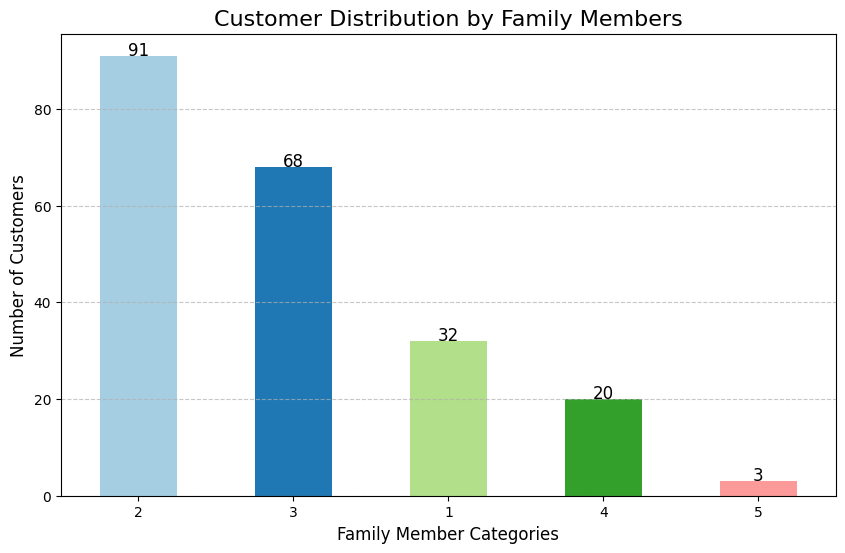

In [566]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = FamilyHomeMember_value.plot(kind='bar', color=plt.cm.Paired(range(len(FamilyHomeMember_value))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Adding title and labels
plt.title('Customer Distribution by Family Members', fontsize=16)
plt.xlabel('Family Member Categories', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
# Saving the image
plt.savefig('histogram_familyhomemember_champions.png')
plt.show()

Conclusions based on the number of family members in the home (FamilyHomeMember) given:

- 2 family members is the largest number, with 91 people, indicating that most individuals in this data live with one or two other family members.
- 3 family members are recorded as many as 69 people, indicating a group living with three family members.
- 1 family member has a number of 32 people, indicating that there are a number of individuals living alone.
- 4 family members are recorded as many as 20 people, indicating a group living with four family members.
- 5 family members have the smallest number, at 3 people, indicating that only a few individuals live with five family members.

This conclusion suggests that the majority of individuals in this data live with two or three family members, with a smaller number living with one, four, or five family members.

#### SHOPPING AND SPENDING BEHAVIOR

##### LAST SHOPING (RECENCY)

In [567]:
grouprecency_counts_champ = datachampions['Group_Recency'].value_counts()
grouprecency_counts_champ

Group_Recency
0-9      99
10-19    90
20-29    25
Name: count, dtype: int64

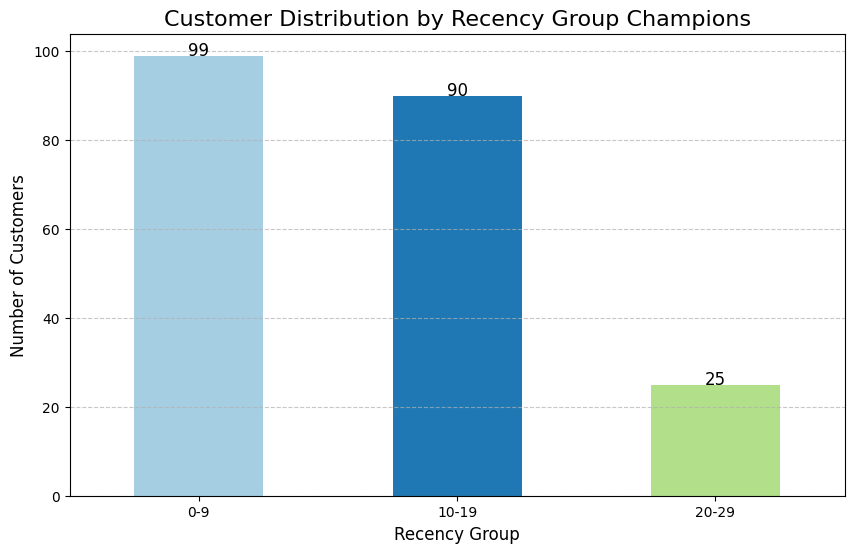

In [568]:
# Creating a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = grouprecency_counts_champ.plot(kind='bar', color=plt.cm.Paired(range(len(grouprecency_counts_champ))))

# Adding values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines by using `axis='x'`

# Adding title and labels
plt.title('Customer Distribution by Recency Group Champions', fontsize=16)
plt.xlabel('Recency Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('Recency_group.png')
plt.show()

The data provided represents the recency distribution of purchases across different ranges of recency, where "recency" refers to how recently a customer has made a purchase. Here’s the analysis:

1. Group 0-9 days (99 customers):

 - The largest group of customers falls within the 0-9 days range, with 99 customers making purchases recently. This suggests that a significant portion of customers is highly engaged and has made purchases within the last 9 days. This group could represent loyal or frequent buyers, who are more active and responsive to promotions or offers.

2. Group 10-19 days (90 customers):

 - The second largest group is within the 10-19 days range, with 90 customers. Although this group is slightly smaller than the first, it still represents a notable portion of the customer base. These customers have made purchases relatively recently, but not as soon as the 0-9 day group, which could indicate that they make purchases at a slightly lower frequency.

3. Group 20-29 days (25 customers):

 - The smallest group is within the 20-29 days range, with only 25 customers. This suggests that a smaller number of customers have made purchases in the past 20-29 days. These customers might be less frequent or may be starting to show signs of churn, as they have not made a purchase in the last 20 days compared to the other groups.

Summary:

High recency (0-9 days): A significant portion of customers are very recent purchasers, indicating strong engagement or frequent shopping behavior.
Moderate recency (10-19 days): The second largest group represents customers who have made purchases in the past 10-19 days, showing moderate recency.
Low recency (20-29 days): A much smaller group, suggesting that fewer customers are engaging after 20 days, potentially indicating a drop-off in engagement or less frequent purchasing behavior.
This analysis can help target marketing strategies, with a focus on re-engaging customers in the 20-29 day range to prevent churn, while maintaining the engagement of the 0-9 and 10-19 day groups.

##### SHOPPING FREQUENCY

In [569]:
# Calculate the grand total for each type of purchase
total_overall_champ = {
    'NumDealsPurchases': datachampions['NumDealsPurchases'].median(),
    'NumWebPurchases': datachampions['NumWebPurchases'].median(),
    'NumCatalogPurchases': datachampions['NumCatalogPurchases'].median(),
    'NumStorePurchases': datachampions['NumStorePurchases'].median()
}

In [570]:
total_overall_champ

{'NumDealsPurchases': 2.0,
 'NumWebPurchases': 6.0,
 'NumCatalogPurchases': 4.0,
 'NumStorePurchases': 8.0}

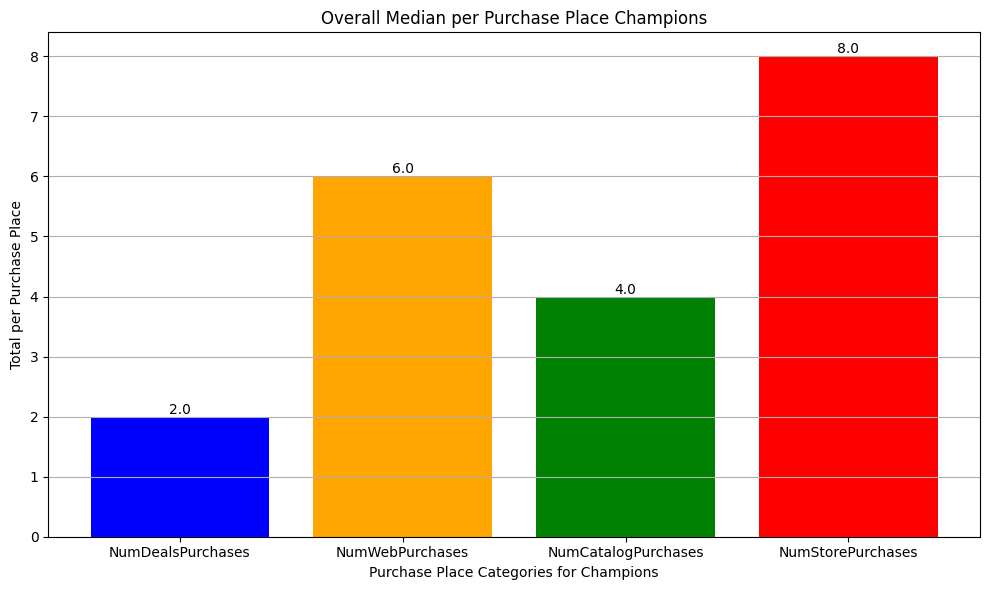

In [571]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(total_overall_champ.keys(), total_overall_champ.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Overall Median per Purchase Place Champions')
plt.xlabel('Purchase Place Categories for Champions')
plt.ylabel('Total per Purchase Place')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Displaying values above the bars
for index, value in enumerate(total_overall_champ.values()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('total_overall_champ.png')
plt.show()

The data provided shows the median values for different types of purchases across four categories. Here's an analysis of each category:

1. NumDealsPurchases (Median = 2.0):

 - The median number of purchases made through deals is 2. This indicates that, for most customers, the number of purchases made through deals is relatively low, suggesting that deals might not be the primary motivator for purchasing.

2. NumWebPurchases (Median = 6.0):

 - The median number of web-based purchases is 6. This suggests that customers tend to make a moderate number of purchases online, indicating that the web is an important channel for purchasing.

3. NumCatalogPurchases (Median = 4.0):

 - The median number of catalog-based purchases is 4. This implies that catalog purchases are somewhat common, though not as frequent as online purchases. Catalogs may still serve as a valuable channel, but likely not as dominant as
online purchasing.

4. NumStorePurchases (Median = 8.0):

 - The median number of store-based purchases is 8. This shows that in-store purchases are the most frequent, with many customers making a significant number of purchases directly from physical stores. This could suggest that the physical store still plays a crucial role in the purchasing habits of many customers.

Summary:

In-store purchases are the most common, with a higher median value compared to web, catalog, and deal-based purchases.
Web purchases come second in frequency, suggesting a strong presence of online shopping but not exceeding in-store purchases.
Catalog purchases are less frequent, and deal-based purchases are the least frequent, suggesting these may not be as significant in driving customer purchases compared to other channels.

##### EXPENDITURE

In [572]:
data_merge.reset_index(inplace=True)

In [573]:
data_merge

index     ID  Year_Birth  Age     Age_Range Education Marital_Status  \
0         0   5524        1957   57         Gen X  Bachelor         Single   
1         1   2174        1954   60  Baby Boomers  Bachelor         Single   
2         2   4141        1965   49         Gen X  Bachelor   Cohabitation   
3         3   6182        1984   30   Millennials  Bachelor   Cohabitation   
4         4   5324        1981   33   Millennials  Doctoral        Married   
...     ...    ...         ...  ...           ...       ...            ...   
2224   2231  10870        1967   47         Gen X  Bachelor        Married   
2225   2232   4001        1946   68  Baby Boomers  Doctoral   Cohabitation   
2226   2233   7270        1981   33   Millennials  Bachelor       Divorced   
2227   2234   8235        1956   58         Gen X    Master   Cohabitation   
2228   2235   9405        1954   60  Baby Boomers  Doctoral        Married   

       Income IncomeCategory  Kidhome  FamilyHomeMember  Teenhome Dt_Customer  \
0     58138.0   Upper-Middle        0                 1         0  2012-09-04   
1     46344.0   Lower-Middle        1                 3         1  2014-03-08   
2     71613.0          Upper        0                 2         0  2013-08-21   
3     26646.0          Lower        1                 3         0  2014-02-10   
4     58293.0   Upper-Middle        1                 3         0  2014-01-19   
...       ...            ...      ...               ...       ...         ...   
2224  61223.0   Upper-Middle        0                 3         1  2013-06-13   
2225  64014.0   Upper-Middle        2                 5         1  2014-06-10   
2226  56981.0   Upper-Middle        0                 1         0  2014-01-25   
2227  69245.0          Upper        0                 3         1  2014-01-24   
2228  52869.0   Upper-Middle        1                 4         1  2012-10-15   

      JoinedTime(days)  Recency  MntWines  MntFruits  MntMeatProducts  \
0                  663       58       635         88              546   
1                  113       38        11          1                6   
2                  312       26       426         49              127   
3                  139       26        11          4               20   
4                  161       94       173         43              118   
...                ...      ...       ...        ...              ...   
2224               381       46       709         43              182   
2225                19       19       406          0               30   
2226               155       91       908         48              217   
2227               156        8       428         30              214   
2228               622       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  WinesExpense  \
0                 172                88            88       20320.0   
1                   2                 1             6         352.0   
2                 111                21            42       13632.0   
3                  10                 3             5         352.0   
4                  46                27            15        5536.0   
...               ...               ...           ...           ...   
2224               42               118           247       27296.0   
2225                0                 0             8         160.0   
2226               32                12            24         288.0   
2227               80                30            61          96.0   
2228                2                 1            21       22688.0   

      FruitsExpense  MeatExpense  FishExpense  SweetExpense  GoldExpense  \
0             352.0       2730.0       1462.0        199.76        880.0   
1               4.0         30.0         17.0          2.27         60.0   
2             196.0        635.0        943.5         47.67        420.0   
3              16.0        100.0         85.0          6.81   

###### UNIT

In [574]:
# Calculate the grand total for each type of purchase
total_pengeluaran_champ2 = {
    'MntWines': datachampions['MntWines'].median(),
    'MntFruits': datachampions['MntFruits'].median(),
    'MntMeatProducts': datachampions['MntMeatProducts'].median(),
    'MntFishProducts': datachampions['MntFishProducts'].median(),
    'MntSweetProducts': datachampions['MntSweetProducts'].median(),
    'MntGoldProds': datachampions['MntGoldProds'].median()
}

In [575]:
total_pengeluaran_champ2

{'MntWines': 457.0,
 'MntFruits': 26.0,
 'MntMeatProducts': 229.0,
 'MntFishProducts': 35.0,
 'MntSweetProducts': 25.0,
 'MntGoldProds': 40.0}

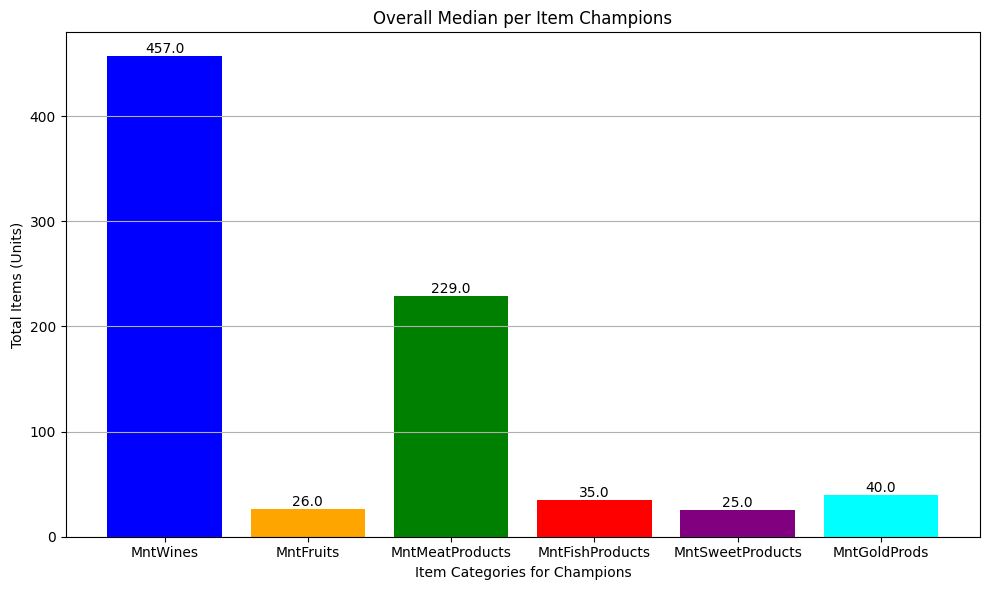

In [576]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(total_pengeluaran_champ2.keys(), total_pengeluaran_champ2.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.title('Overall Median per Item Champions')
plt.xlabel('Item Categories for Champions')
plt.ylabel('Total Items (Units)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Displaying values above the bars
for index, value in enumerate(total_pengeluaran_champ2.values()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('total_pengeluaran_champions2.png')
plt.show()

The data presents the median purchases for various product categories across all observed consumers. Here’s an interpretation of the values:

1. MntWines: 457.0
 - Wine is the highest median purchase among the categories, indicating that, for many consumers, wine is a common item to purchase. This suggests a relatively strong demand for wine, possibly due to both regular consumption and its status as a luxury product.

2. MntFruits: 26.0
 - Fruit purchases are moderate, with a median value of 26 units. This suggests that while fruits are commonly bought, they are not as frequent as some other categories. Consumers may purchase fruit for health reasons but might not prioritize it as much as other food products like meat.

3. MntMeatProducts: 229.0
 - Meat is the second most purchased product with 229 units. This high median value shows that meat is a staple in many households, with a significant portion of consumers prioritizing it in their shopping. It indicates that meat products are a core part of regular dietary consumption.

4. MntFishProducts: 35.0
 - Fish products have a median of 35 units, showing a moderate preference for seafood. While fish consumption is important for some consumers, it is not as dominant as meat. The purchase frequency reflects an average or balanced preference for fish compared to other animal-based products.

5. MntSweetProducts: 25.0
 - Sweet products have a median value of 25 units, indicating moderate consumption. This aligns with the general trend of sweet products being discretionary purchases—consumed less frequently than essential food items like meat and fruit, but still a regular part of many consumers' diets.

6. MntGoldProds: 40.0
 - Gold products, with a median of 40 units, show a clear but lower preference for luxury or non-essential items. While not as high as food items like meat or wine, the purchase of gold products is significant, suggesting a portion of consumers allocate resources toward luxury goods, albeit less frequently than essential food categories.

Summary:

Wine and Meat have the highest median values, signaling that these categories are most frequently purchased and are likely staples in many households.
Sweet products and fruits are purchased less frequently compared to meat and wine, suggesting that while they are part of the regular diet, they don't command as much attention or budget.
Gold products have a noticeable but relatively lower median, indicating occasional luxury purchases, often as a form of investment or gifting.

###### MONEY EXPEND

In [577]:
# Calculate the grand total for each type of purchase
total_pengeluaran_champ = {
    'WinesExpense': datachampions['WinesExpense'].median(),
    'FruitsExpense': datachampions['FruitsExpense'].median(),
    'MeatExpense': datachampions['MeatExpense'].median(),
    'FishExpense': datachampions['FishExpense'].median(),
    'SweetExpense': datachampions['SweetExpense'].median(),
    'GoldExpense': datachampions['GoldExpense'].median()
}

In [578]:
total_pengeluaran_champ

{'WinesExpense': 15632.0,
 'FruitsExpense': 90.0,
 'MeatExpense': 987.5,
 'FishExpense': 289.0,
 'SweetExpense': 54.480000000000004,
 'GoldExpense': 400.0}

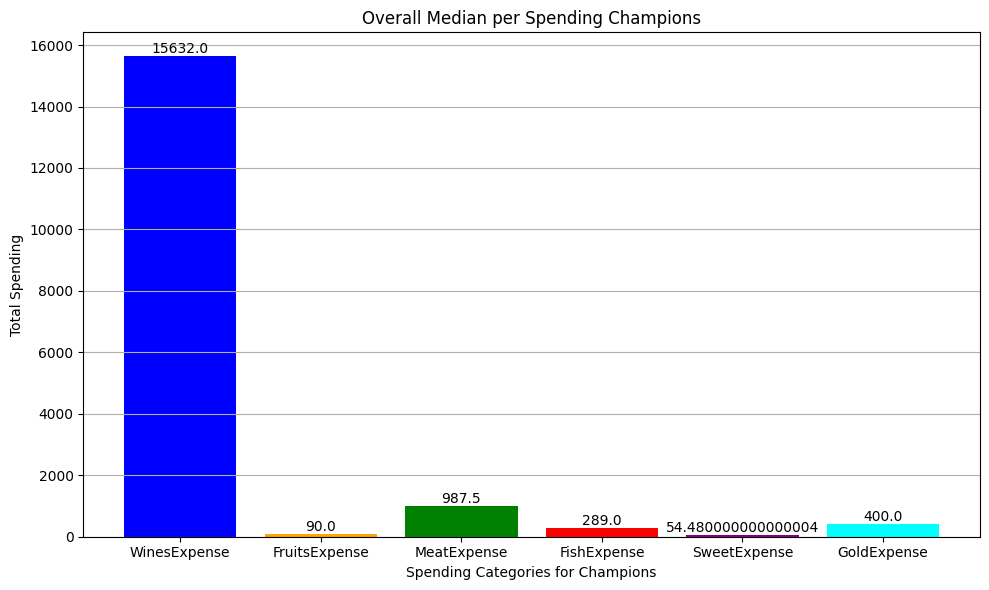

In [579]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(total_pengeluaran_champ.keys(), total_pengeluaran_champ.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.title('Overall Median per Spending Champions')
plt.xlabel('Spending Categories for Champions')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Displaying values above the bars
for index, value in enumerate(total_pengeluaran_champ.values()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('total_pengeluaran_champions.png')
plt.show()

The provided data shows the total money spent on various product categories. Here's a breakdown:

1. WinesExpense: 15632.0
 - Wine expenses are the highest, indicating that consumers are willing to spend significantly on wine. This suggests wine is a priority in their purchasing habits, possibly due to high frequency of purchase or higher prices per unit.

2. MeatExpense: 987.5
 - Meat expenses are substantial, but significantly lower than wine. This reflects that while meat is an important purchase for many consumers, it might not be as high-ticket or frequent as wine purchases.

3. FishExpense: 289.0
 - The expenditure on fish products is notably lower than meat and wine, which could be due to the fact that fish is not as essential or frequently purchased as other protein sources like meat. The overall spending shows it is a moderate category.

4. FruitsExpense: 90.0
 - Expenditure on fruits is relatively low, reinforcing the notion that fruits are not as high-priority or expensive as other food categories, though they are likely bought more frequently in smaller quantities.

5. SweetExpense: 54.48
 - The money spent on sweets is minimal, which aligns with the earlier observation that sweet products are less frequently purchased compared to other food categories.

6. GoldExpense: 400.0
 - Spending on gold products, while still relatively significant, is much lower compared to essential food items like wine and meat. This suggests that gold products, likely considered luxury items, are bought less frequently, though they still represent an area of interest for some consumers.

Summary:

Overall, consumers allocate the largest portion of their budget to wine, followed by meat and gold. Fish, fruits, and sweets are comparatively less prioritized in terms of money spent, suggesting that these categories might either be considered secondary in consumption or are bought in smaller quantities.

##### EXPENDITURE VERSUS

###### GENERATION VS EXPENDITURE

In [580]:
# Calculate total purchases of each product category for each generation
generational_expend = datachampions.groupby('Age_Range')[['Monetary']].median()
generational_expend

Monetary
Age_Range              
Baby Boomers  17089.765
Gen X         18524.350
Gen Z         14362.055
Millennials   18878.615

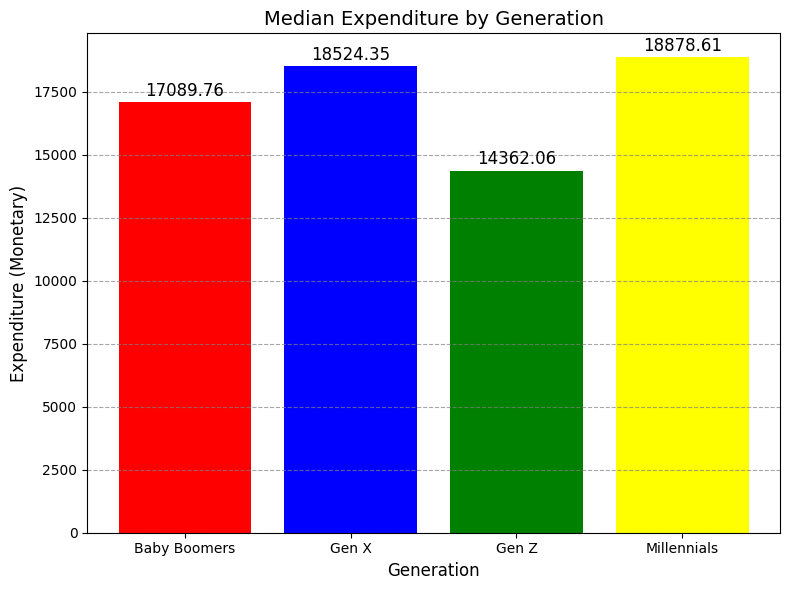

In [581]:
# Preparing data for visualization
generations = generational_expend.index
expenditures = generational_expend['Monetary']

# Bar Chart with lines and numbers above the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(generations, expenditures, color=['red', 'blue', 'green', 'yellow'])

# Adding horizontal grid lines for each bar
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Adding numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Median Expenditure by Generation', fontsize=14)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Expenditure (Monetary)', fontsize=12)

# Displaying grid on x and y axes
plt.tight_layout()
# Saving the image
plt.savefig('histogram_generational_expend(Pengeluaran)_champions.png')
plt.show()

Conclusion based on spending data (Monetary) by age range (Age_Range):

1. Millennials have the highest average spending of 19,059.82, indicating that this group spends more compared to other generations.

2. Gen X follows with an average spending of 18,524.35, which is also quite high, although slightly lower than Millennials.

3. Baby Boomers are recorded with an average spending of 17,089.77, which is lower than both Gen X and Millennials.

4. Gen Z has the lowest average spending of 14,362.06, which may reflect their younger age and lower income.

This conclusion suggests that Millennials spend more money compared to other generations, while Gen Z has lower spending, likely due to their younger age and lower income.

###### EDUCATION VS EXPENDITURE

In [582]:
# Calculate total purchases of each product category for each generation
education_expend = data_merge.groupby('Education')[['Monetary']].median()
education_expend

Monetary
Education           
Bachelor     7269.27
Doctoral     8976.05
Master       6285.17
Non-degree   4740.81

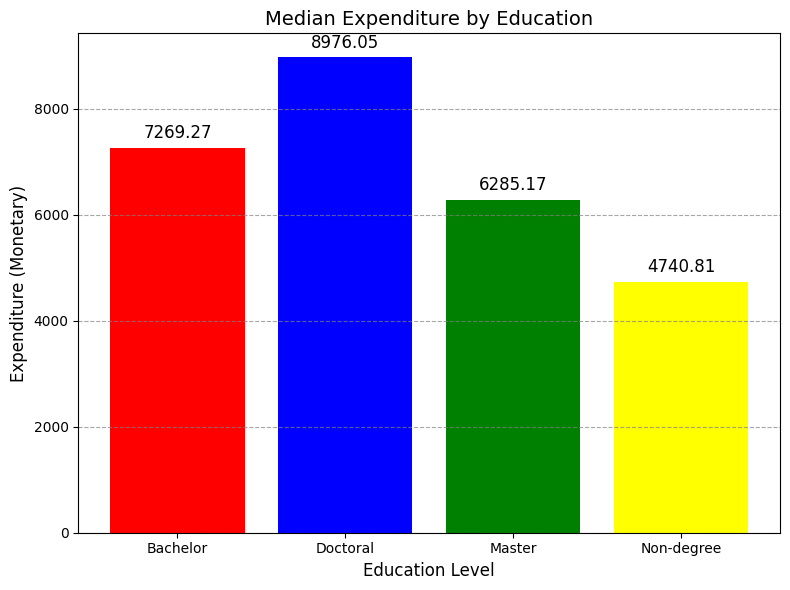

In [583]:
# Preparing data for visualization
generations = education_expend.index  # Replace with your 'education_expend' data
expenditures = education_expend['Monetary']  # Ensure 'Monetary' matches your data

# Bar Chart with lines and numbers above the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(generations, expenditures, color=['red', 'blue', 'green', 'yellow'])

# Adding horizontal grid lines for each bar
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Adding numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Median Expenditure by Education', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Expenditure (Monetary)', fontsize=12)

# Displaying grid on x and y axes
plt.tight_layout()
# Saving the image
plt.savefig('histogram_education_expend(Pengeluaran)_champions.png')
plt.show()

Conclusion based on expenditure data (Monetary) by education level (Education):

1. Doctoral has the highest average expenditure, which is 8,976.05, indicating that individuals with a doctoral degree tend to spend more money compared to other groups.

2. Bachelor is recorded with an average expenditure of 7,269.27, indicating that individuals with a bachelor's degree also spend more money compared to those with a master's degree or no degree.

3. Master has an average expenditure of 6,285.17, slightly lower than bachelor and doctoral.

4. Non-degree has the lowest average expenditure, which is 4,740.81, which may reflect that individuals without a formal degree spend less.

This conclusion suggests that individuals with a Doctoral degree spend more money compared to those with a Bachelor's, Master's, or Non-degree, with Non-degree spending the least.

###### MARITAL STATUS VS EXPENSES

In [584]:
# Calculate total purchases of each product category for each generation
maritalstatus_expend = datachampions.groupby('Marital_Status')[['Monetary']].median()
maritalstatus_expend

Monetary
Marital_Status          
Cohabitation    19294.00
Divorced        17785.62
Married         18577.06
Single          14899.00

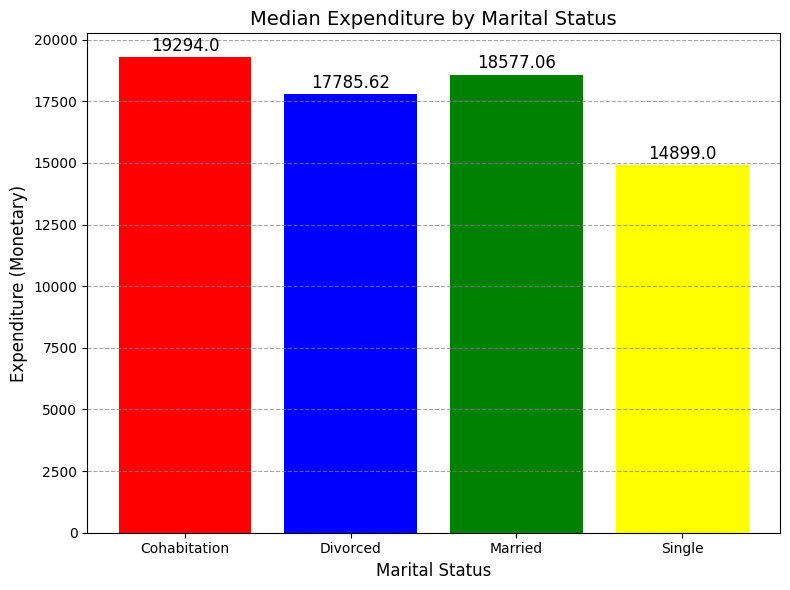

In [585]:
# Preparing data for visualization
generations = maritalstatus_expend.index  # Replace with your 'maritalstatus_expend' data
expenditures = maritalstatus_expend['Monetary']  # Ensure 'Monetary' matches your data

# Bar Chart with lines and numbers above the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(generations, expenditures, color=['red', 'blue', 'green', 'yellow'])

# Adding horizontal grid lines for each bar
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Adding numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Median Expenditure by Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Expenditure (Monetary)', fontsize=12)

# Displaying grid on x and y axes
plt.tight_layout()
# Saving the image
plt.savefig('histogram_maritalstatus_expend(Pengeluaran)_champions.png')
plt.show()

Conclusion based on spending data (Monetary) by marital status (Marital_Status):

1. Cohabitation (Being in a relationship without being married) has the highest average spending, which is 19,292.30, indicating that individuals in a cohabitation relationship tend to spend more money compared to other marital statuses.

2. Divorced (Divorced) has an average spending of 17,785.62, which is slightly lower compared to cohabitation but still higher compared to married or single status.

3. Married (Married) is recorded with an average spending of 18,577.06, slightly lower compared to divorced and cohabited.

4. Single (Single) has the lowest average spending, which is 14,899.00, indicating that individuals who are not married or in a relationship spend less money compared to married or divorced.

This conclusion shows that individuals in Cohabitation status spend more money compared to married, divorced, or single, with Single having the lowest spending.

###### INCOME CATEGORY VS EXPENDITURES

In [586]:
# Calculate total purchases of each product category for each generation
incomecategory_expend = datachampions.groupby('IncomeCategory')[['Monetary']].median()
incomecategory_expend

Monetary
IncomeCategory           
Lower           23130.995
Lower-Middle    22566.640
Upper           18017.080
Upper-Middle    17677.310

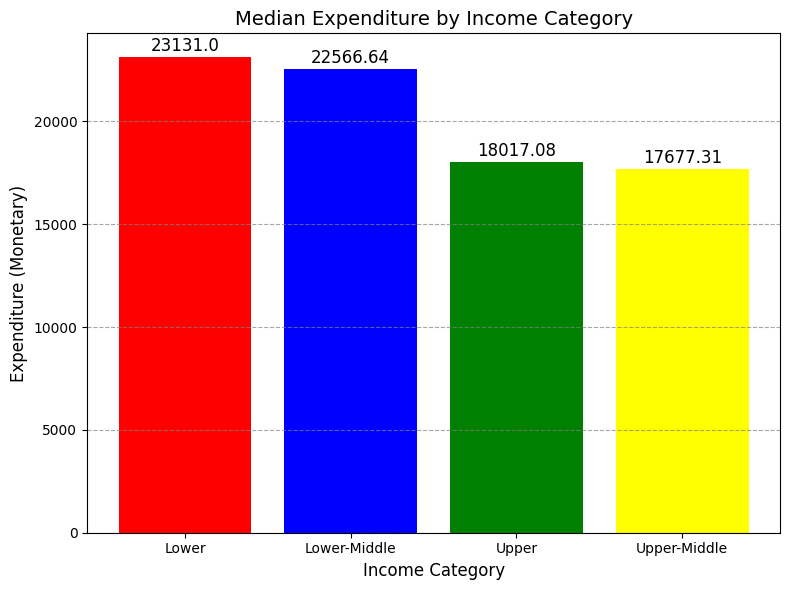

In [587]:
# Preparing data for visualization
generations = incomecategory_expend.index  # Replace with your 'incomecategory_expend' data
expenditures = incomecategory_expend['Monetary']  # Ensure 'Monetary' matches your data

# Bar Chart with lines and numbers above the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(generations, expenditures, color=['red', 'blue', 'green', 'yellow'])

# Adding horizontal grid lines for each bar
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Adding numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Median Expenditure by Income Category', fontsize=14)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Expenditure (Monetary)', fontsize=12)

# Displaying grid on x and y axes
plt.tight_layout()
# Saving the image
plt.savefig('histogram_incomecategory_expend(Pengeluaran)_champions.png')
plt.show()

Conclusion based on expenditure data (Monetary) by income category (IncomeCategory):

1. Lower-Middle (Lower-Middle Income) has the highest average expenditure, which is 22,566.64, indicating that individuals with income in this category tend to spend more money compared to other income categories.

2. Lower (Low Income) has an average expenditure of 19,180.17, which is also relatively high compared to the upper income category, although lower compared to Lower-Middle.

3. Upper (High Income) is recorded with an average expenditure of 18,017.08, which is lower compared to the lower income category.

4. Upper-Middle (Upper-Middle Income) has the lowest average expenditure, which is 17,677.31, indicating that individuals with higher income tend to spend less money compared to individuals in the lower income category.

This conclusion shows that individuals in the Lower-Middle category spend more money compared to other income categories, while individuals with Upper-Middle income have the lowest average expenditure.

###### FAMILY HOME MEMBER VS EXPENDITURE

In [588]:
# Calculate total purchases of each product category for each generation
familyhomemember_expend = datachampions.groupby('FamilyHomeMember')[['Monetary']].median()
familyhomemember_expend

Monetary
FamilyHomeMember          
1                 15743.55
2                 21856.26
3                 17551.17
4                 15746.92
5                  9518.49

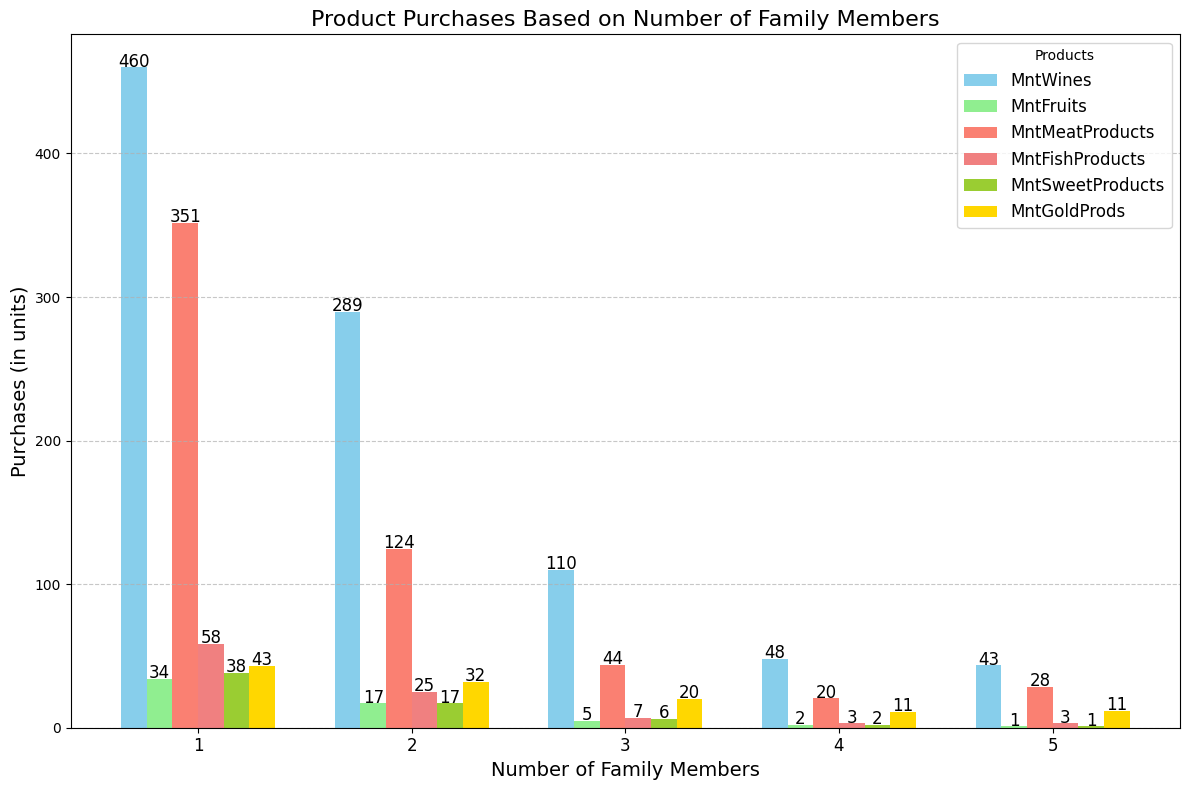

In [589]:
# Creating a bar chart with a larger figure size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the bar position and width
bar_width = 0.12
index = np.arange(len(familyhomemember_purchase))  # Position based on the FamilyHomeMember category

# Creating the plot for each product
bars1 = plt.bar(index - 2.5*bar_width, familyhomemember_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, familyhomemember_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, familyhomemember_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, familyhomemember_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, familyhomemember_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, familyhomemember_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Number of Family Members', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases Based on Number of Family Members', fontsize=16)
plt.xticks(index, familyhomemember_purchase.index, fontsize=12)  # Displaying FamilyHomeMember labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical spacing to avoid text overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding labels for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('histogram_familyhomemember_expend_champions.png')
plt.show()

Conclusion based on expenditure data (Monetary) according to the number of family members at home (FamilyHomeMember):

1. 2 family members have the highest average expenditure, which is 21,856.26, indicating that individuals living with two family members tend to spend more money compared to other family members.

2. 3 family members are recorded with an average expenditure of 17,569.00, indicating that the group with three family members spends less than the group with two family members.

3. 1 family member has an average expenditure of 15,743.55, which is lower compared to the two family members but higher compared to the four and five family members.

4. 4 family members have an average expenditure of 15,746.92, which is almost the same as the one family member, indicating that individuals living with four family members have similar expenditures to those living alone.

5. 5 family members have the lowest average expenditure, which is 9,518.49, indicating that individuals living with five family members tend to spend the least money.

This conclusion shows that the group with 2 family members spent the most money, while the group with 5 family members spent the least money.

##### SHOPPING BEHAVIOR

###### GENERATIONS VS SHOPPING BEHAVIOR

In [590]:
# Calculate total purchases of each product category for each generation
generational_purchase = datachampions.groupby('Age_Range')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
generational_purchase

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Age_Range                                                             
Baby Boomers     489.0       22.5            211.0             34.0   
Gen X            454.0       27.0            208.0             33.0   
Gen Z            544.5       61.5            424.0             93.0   
Millennials      451.5       26.0            232.0             40.5   

              MntSweetProducts  MntGoldProds  
Age_Range                                     
Baby Boomers              26.0          33.5  
Gen X                     24.5          37.0  
Gen Z                     54.0          99.0  
Millennials               22.0          42.0

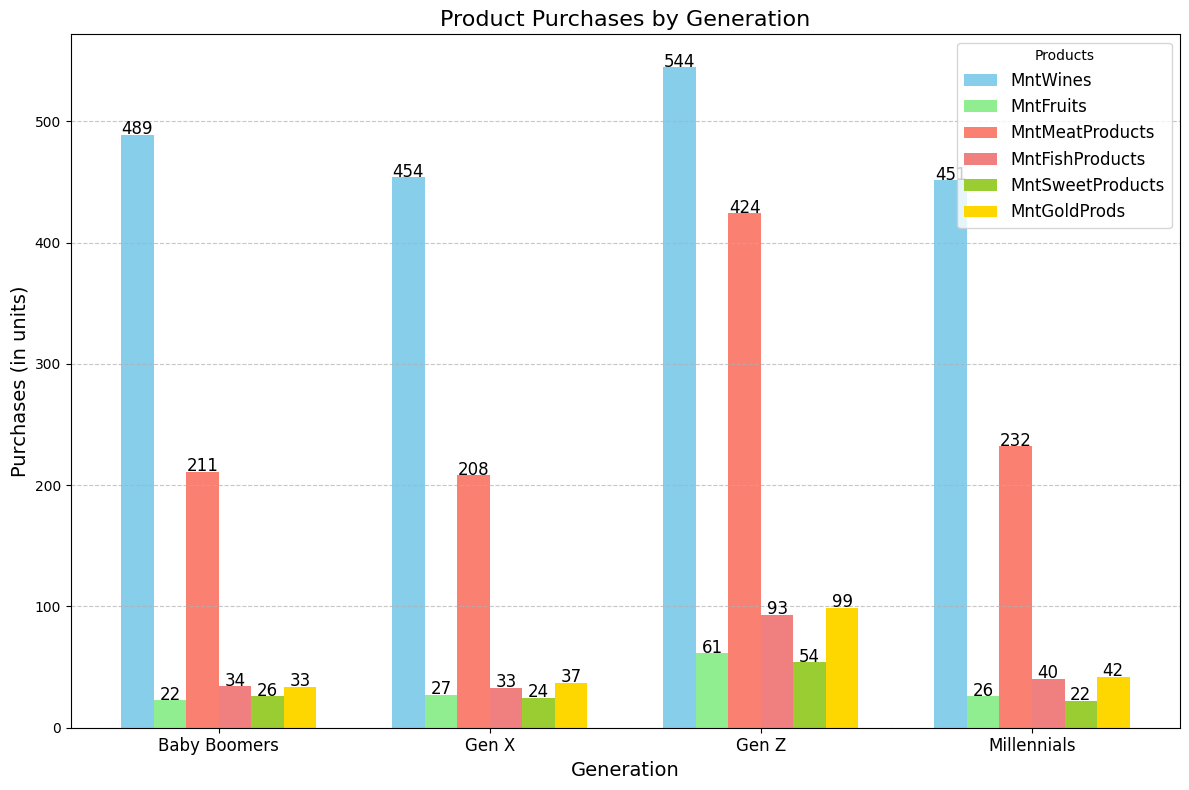

In [591]:
# Creating a bar chart with a larger figure size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the bar position and width
bar_width = 0.12
index = np.arange(len(generational_purchase))  # Generation positions

# Creating the plot for each product
bars1 = plt.bar(index - 2.5*bar_width, generational_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, generational_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, generational_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, generational_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, generational_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, generational_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases by Generation', fontsize=16)
plt.xticks(index, generational_purchase.index, fontsize=12)  # Displaying generation labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical spacing to avoid text overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding labels for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('histogram_generational_expend_champions.png')
plt.show()

Conclusion based on spending on various products (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) by age range (Age_Range):

1. Baby Boomers tend to spend more on MntMeatProducts (meat), with a spending amount of 211.0, compared to other categories. They also spend the most on MntWines (wine), at 489.0.

2. Gen X has the highest spending on MntWines (wine), with a spending amount of 454.0, which is slightly lower than Baby Boomers. They also spend the most on MntGoldProds (gold products), at 37.0.

3. Gen Z spends the most on MntFishProducts (fish products), at 93.0, and MntGoldProds (gold products) at 99.0, which is the highest spending among all age groups for this category. They also spend a lot on MntMeatProducts (meat) with 424.0.

4. Millennials have lower spending in most categories compared to other generations. They spend 451.0 on MntWines (wine) and 232.0 on MntMeatProducts (meat), lower than Gen X and Baby Boomers.

This conclusion shows that Gen Z has higher spending on fish and gold products, while Baby Boomers and Gen X spend more on wine and meat. Millennials have lower spending than other groups in most product categories.

###### EDUCATION VS SHOPPING BEHAVIOR

In [592]:
# Calculate total purchases of each product category for each generation
education_purchase = datachampions.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
education_purchase

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Education                                                          
Bachelor      422.0       31.0            280.5             45.5   
Doctoral      526.0       16.5            188.0             20.0   
Master        489.0       26.0            199.5             34.0   

           MntSweetProducts  MntGoldProds  
Education                                  
Bachelor               27.5          51.0  
Doctoral               20.0          19.5  
Master                 20.0          41.5

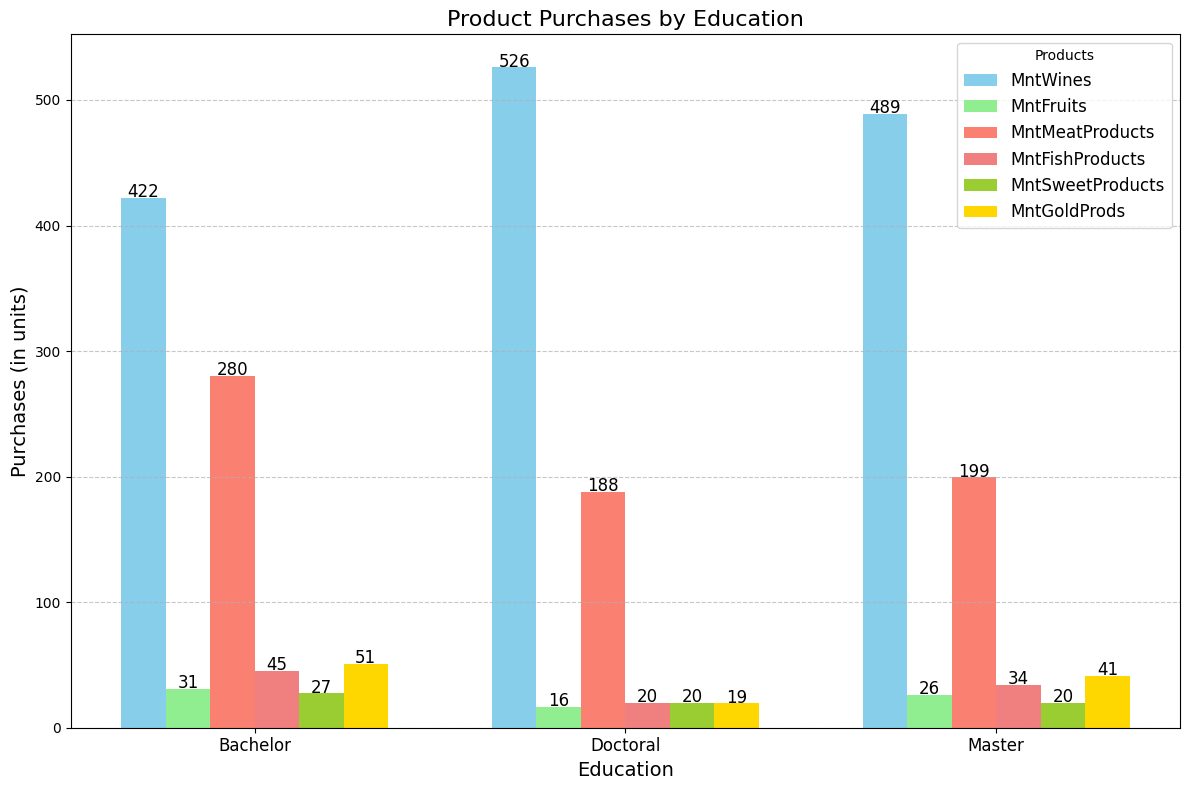

In [593]:
# Creating a bar chart with a larger figure size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the bar position and width
bar_width = 0.12
index = np.arange(len(education_purchase))  # Position based on education categories

# Creating the plot for each product
bars1 = plt.bar(index - 2.5*bar_width, education_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, education_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, education_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, education_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, education_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, education_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Education', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases by Education', fontsize=16)
plt.xticks(index, education_purchase.index, fontsize=12)  # Displaying education labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical spacing to avoid text overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding labels for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('histogram_education_expend_champions.png')
plt.show()

Conclusion based on spending on various products (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) by education level:

1. Doctorals have the highest spending on MntWines (wine), which is 526.0, higher than other education levels. However, their spending on other categories tends to be lower, such as MntFruits (fruit) and MntMeatProducts (meat).

2. Bachelors have the highest spending on MntMeatProducts (meat) with 279.0, indicating a greater preference for meat products compared to other education levels. They also spend more on MntGoldProds (gold products), with 51.0.

3. Masters spend the most on MntWines (wine), at 489.0, which is almost on par with Bachelors. They also spent more on MntGoldProds (gold products) compared to Doctorals.

This conclusion suggests that Doctorals tend to spend more on wine, while Bachelors spend more on meat and gold products. Masters have a more balanced spending, with significant spending on wine and gold products.

###### MARITAL STATUS VS SHOPPING BEHAVIOR

In [594]:
# Calculate total purchases of each product category for each generation
marital_status_purchase = datachampions.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
marital_status_purchase

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Marital_Status                                                          
Cohabitation       459.0       23.0            171.0             28.0   
Divorced           508.0       35.0            240.0             45.0   
Married            450.0       32.0            259.0             50.0   
Single             392.0       16.0            207.0             28.0   

                MntSweetProducts  MntGoldProds  
Marital_Status                                  
Cohabitation                24.0          37.0  
Divorced                    44.0          59.0  
Married                     32.0          40.0  
Single                      18.0          42.0

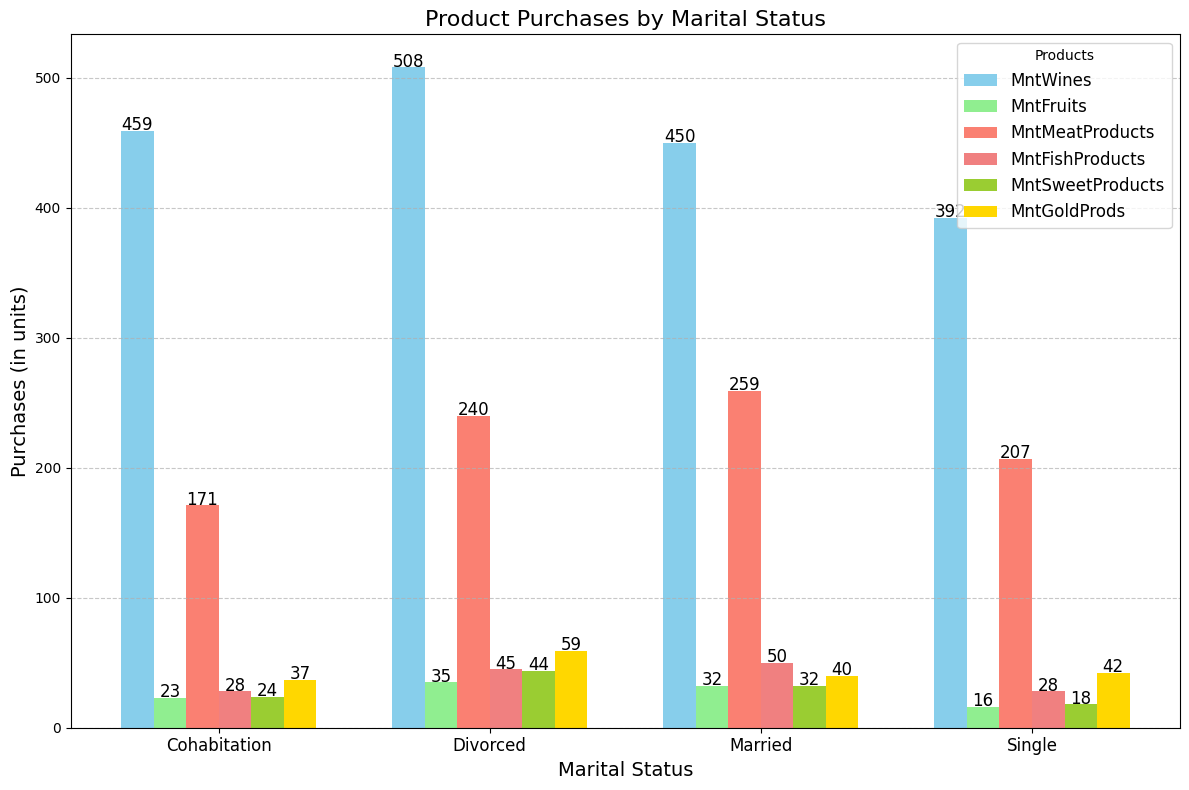

In [595]:
# Creating a bar chart with a larger figure size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the bar position and width
bar_width = 0.12
index = np.arange(len(marital_status_purchase))  # Position based on marital status categories

# Creating the plot for each product
bars1 = plt.bar(index - 2.5*bar_width, marital_status_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, marital_status_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, marital_status_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, marital_status_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, marital_status_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, marital_status_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases by Marital Status', fontsize=16)
plt.xticks(index, marital_status_purchase.index, fontsize=12)  # Displaying marital status labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical spacing to avoid text overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding labels for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('histogram_maritalstatus_expend_champions.png')
plt.show()

Conclusion based on spending on various products (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) by marital status (Marital_Status):

1. Divorced have the highest spending on MntWines (wines), which is 508.0, which is higher compared to other marital statuses. They also spend more on MntMeatProducts (meat) and MntGoldProds (gold products) compared to other groups.

2. Married have significant spending on MntMeatProducts (meat), which is 259.0, which is the highest spending among all marital statuses for this category. They also spend a lot on MntFishProducts (fish products), with 50.0.

3. Cohabitation spent the most on MntWines, at 458.5, but their spending on other categories was relatively lower compared to divorced or married.

4. Singles had the lowest average spending in most categories, especially for MntWines at 392.0, as well as MntFruits and MntSweetProducts, which showed lower spending compared to other statuses.

This conclusion suggests that divorced individuals spent the most money on products such as wine, meat, and gold, while singles spent the least on almost all product categories. Married individuals tended to have high spending on meat and fish products, while cohabitation individuals had high spending on wine.

###### INCOME CATEGORY VS SHOPPING BEHAVIOR

In [596]:
# Calculate total purchases of each product category for each generation
income_category_purchase = datachampions.groupby('IncomeCategory')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
income_category_purchase

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
IncomeCategory                                                          
Lower               11.5        6.0             21.5             13.0   
Lower-Middle       268.0        4.5             57.5              6.0   
Upper              525.0       38.0            398.0             69.0   
Upper-Middle       470.5       18.5            175.0             21.0   

                MntSweetProducts  MntGoldProds  
IncomeCategory                                  
Lower                        4.0          28.5  
Lower-Middle                 5.5          31.0  
Upper                       45.5          43.0  
Upper-Middle                18.0          37.5

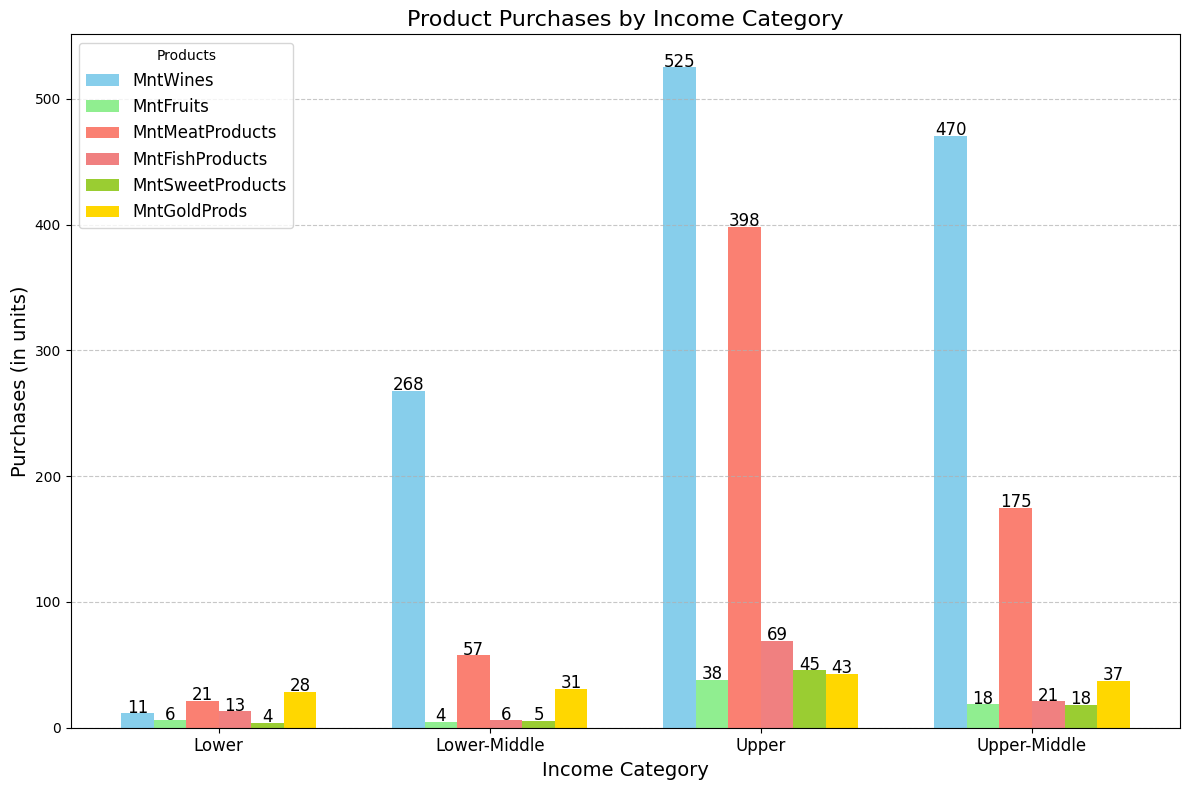

In [597]:
# Creating a bar chart with a larger figure size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the bar position and width
bar_width = 0.12
index = np.arange(len(income_category_purchase))  # Position based on income category

# Creating the plot for each product
bars1 = plt.bar(index - 2.5*bar_width, income_category_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, income_category_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, income_category_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, income_category_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, income_category_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, income_category_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases by Income Category', fontsize=16)
plt.xticks(index, income_category_purchase.index, fontsize=12)  # Displaying income category labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical spacing to avoid text overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding labels for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('histogram_incomecategory_expend_champions.png')
plt.show()

Conclusion based on spending on various products (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) by income category (IncomeCategory):

1. Upper (High Income) has the highest spending on MntMeatProducts (meat), which is 398.0, and MntWines (wine), which is 525.0. They also spend more on MntFishProducts (fish products) and MntSweetProducts (sweet products) compared to other income categories.

2. Upper-Middle (Upper Middle Income) has a significant spending on MntWines (wine) with 470.5, which is close to the spending of the Upper group, but their spending on MntMeatProducts (meat) is lower, which is 175.0. They also spend less on other products compared to the Upper group.

3. Lower-Middle had the lowest spending on MntFruits and MntFishProducts. They spent 268.0 on MntWines, which was higher than the Lower group but lower than both the Upper and Upper-Middle groups.

4. Lower had very low spending in almost all categories, with the highest spending on MntGoldProds at 25.0, although overall they spent the least in almost all product categories.

This conclusion shows that Upper spent the most money in most categories, especially on wine and meat, while Lower had the lowest spending. Upper-Middle had significant spending on wine, but lower in other product categories, and Lower-Middle spent more on wine than the Low-income group, but less than the High-income group.

###### FAMILY HOME MEMBER VS SHOPPING BEHAVIOR

In [598]:
# Calculate total purchases of each product category for each generation
familyhomemember_purchase = datachampions.groupby('FamilyHomeMember')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
familyhomemember_purchase

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
FamilyHomeMember                                                          
1                    512.0       46.0            424.0             67.0   
2                    532.0       36.0            309.0             49.0   
3                    394.5       19.0            149.5             23.0   
4                    413.0        2.0             59.5              9.0   
5                    230.0        7.0             89.0              0.0   

                  MntSweetProducts  MntGoldProds  
FamilyHomeMember                                  
1                             44.5          76.0  
2                             28.0          40.0  
3                             21.5          42.5  
4                              1.5          20.0  
5                              7.0          28.0

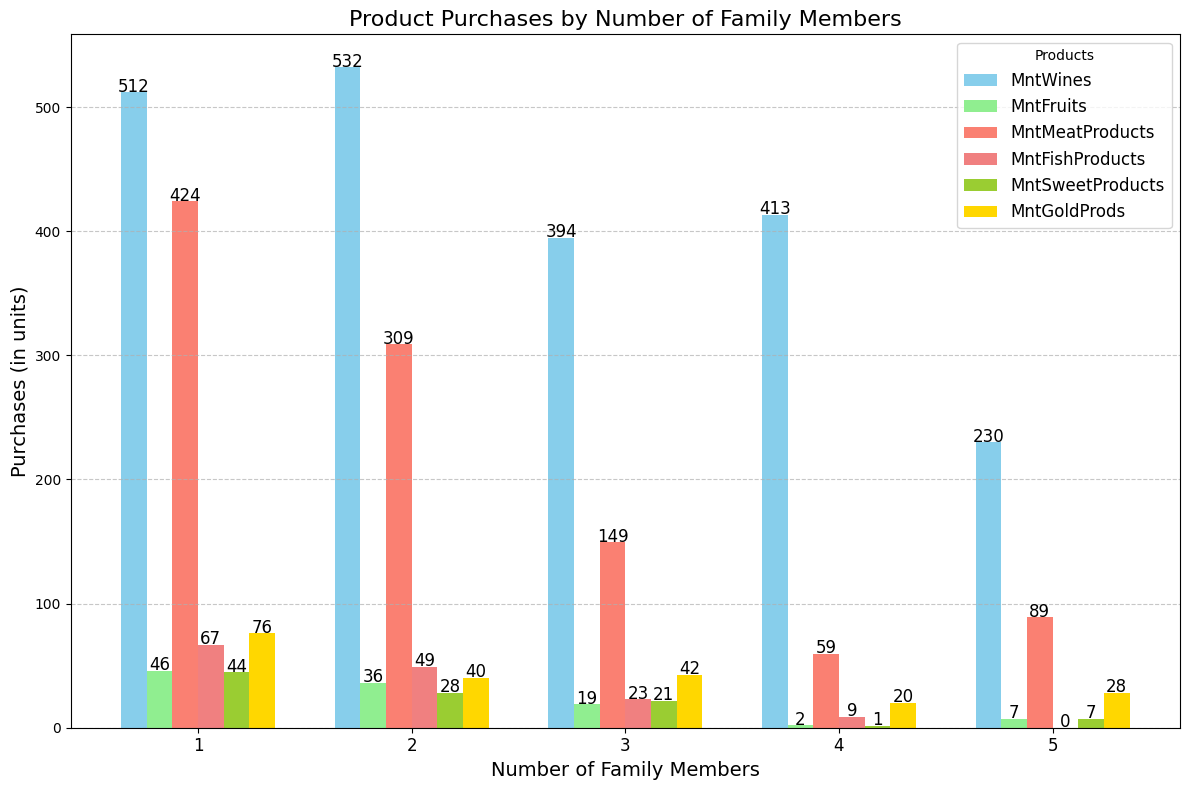

In [599]:
# Creating a bar chart with a larger figure size
plt.figure(figsize=(12, 8))  # Larger chart size for more space

# Defining the bar position and width
bar_width = 0.12
index = np.arange(len(familyhomemember_purchase))  # Position based on FamilyHomeMember category

# Creating the plot for each product
bars1 = plt.bar(index - 2.5*bar_width, familyhomemember_purchase['MntWines'], bar_width, label='MntWines', color='skyblue')
bars2 = plt.bar(index - 1.5*bar_width, familyhomemember_purchase['MntFruits'], bar_width, label='MntFruits', color='lightgreen')
bars3 = plt.bar(index - 0.5*bar_width, familyhomemember_purchase['MntMeatProducts'], bar_width, label='MntMeatProducts', color='salmon')
bars4 = plt.bar(index + 0.5*bar_width, familyhomemember_purchase['MntFishProducts'], bar_width, label='MntFishProducts', color='lightcoral')
bars5 = plt.bar(index + 1.5*bar_width, familyhomemember_purchase['MntSweetProducts'], bar_width, label='MntSweetProducts', color='yellowgreen')
bars6 = plt.bar(index + 2.5*bar_width, familyhomemember_purchase['MntGoldProds'], bar_width, label='MntGoldProds', color='gold')

# Adding labels and title
plt.xlabel('Number of Family Members', fontsize=14)
plt.ylabel('Purchases (in units)', fontsize=14)
plt.title('Product Purchases by Number of Family Members', fontsize=16)
plt.xticks(index, familyhomemember_purchase.index, fontsize=12)  # Displaying FamilyHomeMember labels
plt.legend(title='Products', fontsize=12)

# Adding numbers above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adding vertical space to avoid text overlap
                 f'{int(height)}', ha='center', fontsize=12)

# Adding labels for each product category
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Adding grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
# Saving the image
plt.savefig('histogram_familyhomemember_expend_champions.png')
plt.show()

Conclusion based on spending on various products (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) by number of family members (FamilyHomeMember):

1. 1 family member has the highest spending in almost all categories, especially for MntMeatProducts (meat), with spending of 424.0, and MntWines (wine), which is 512.0. They also spend quite a lot on MntFishProducts (fish products) and MntGoldProds (gold products).

2. 2 family members also spend a lot on MntWines (wine), which is 532.0, which is the highest spending among all categories, although their spending on other products is lower, such as MntMeatProducts (meat) with 309.0.

3. 3-member families showed lower spending compared to families with fewer members, especially for MntMeatProducts (meat) (140.0) and MntWines (wine) (392.0). Their spending on other categories was also lower.

4. 4-member families spent very little on almost all categories, with the lowest spending on MntFruits (fruits) and MntSweetProducts (sweet products). MntMeatProducts (meat) and MntFishProducts (fish products) were also very low.

5. 5-member families had the lowest spending in most categories, with the highest spending on MntGoldProds (gold products), at 28.0, but their spending on MntMeatProducts (meat) and other products was very low.

This conclusion suggests that families with 1 or 2 family members tend to spend more on products such as wine, meat, and fish, while families with more family members have lower spending, especially in the food and beverage product category.

#### CORRELATION

In [600]:
# Take multiple columns and save them to new variables
takecolumn = datachampions[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
takecolumn

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
5          520         42               98                0                42   
23         384          0              102               21                32   
27           5          1                3                3               263   
34         482         34              471              119                68   
40         421         76              536               82               178   
...        ...        ...              ...              ...               ...   
2194       297          0               38               13                 0   
2197       266         21              300               65                 8   
2198       322          3               50                4                 3   
2202       269        129              495              182                43   
2217       712         26              538               69                13   

      MntGoldProds  
5               14  
23               5  
27             362  
34              22  
40             102  
...            ...  
2194           152  
2197            44  
2198            42  
2202            29  
2217            80  

[214 rows x 6 columns]

In [601]:
takecolumn.corr(method='spearman')

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
MntWines          1.000000   0.141859         0.364655         0.092490   
MntFruits         0.141859   1.000000         0.626896         0.641067   
MntMeatProducts   0.364655   0.626896         1.000000         0.626376   
MntFishProducts   0.092490   0.641067         0.626376         1.000000   
MntSweetProducts  0.088813   0.542286         0.551547         0.571981   
MntGoldProds      0.040510   0.314542         0.272563         0.358970   

                  MntSweetProducts  MntGoldProds  
MntWines                  0.088813      0.040510  
MntFruits                 0.542286      0.314542  
MntMeatProducts           0.551547      0.272563  
MntFishProducts           0.571981      0.358970  
MntSweetProducts          1.000000      0.281138  
MntGoldProds              0.281138      1.000000

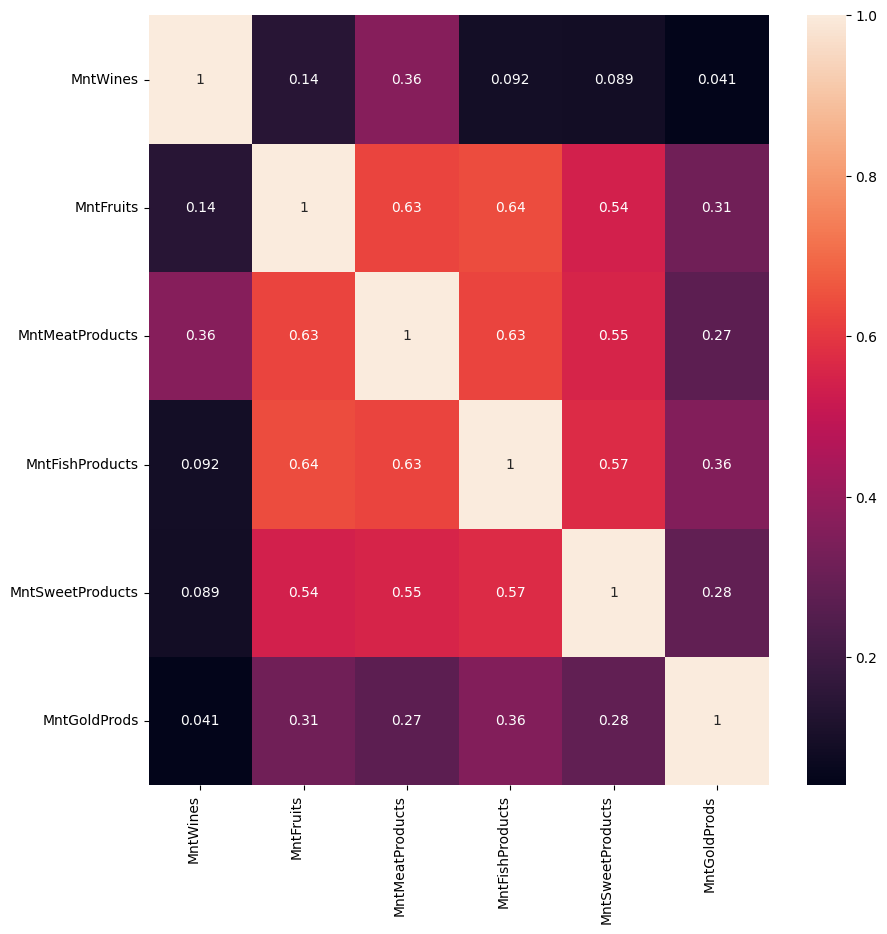

In [602]:
plt.figure(figsize=(10, 10))
sns.heatmap(takecolumn.corr(method='spearman'), annot=True)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # The y-axis label remains vertical.
plt.show()

Here is a brief analysis of the correlation matrix:

1. **Strongest correlations**:

 - **MntFruits and MntMeatProducts (0.626896)**: This indicates a moderately strong positive relationship between spending on fruits and meat products. Customers who tend to spend more on fruits also tend to spend more on meat products.

 - **MntFruits and MntFishProducts (0.641067)**: There is a strong positive correlation between spending on fruits and fish products, suggesting that customers who buy fruits are also more likely to purchase fish products.

2. **Moderately strong correlations**:

 - **MntMeatProducts and MntFishProducts (0.626376)**: This shows that customers who buy meat products also tend to buy fish products in moderately high amounts.

 - **MntFishProducts and MntSweetProducts (0.571981)**: This positive relationship indicates that customers who purchase fish products are also somewhat likely to purchase sweet products.

3. **Weaker correlations**:

 - **MntWines with other products (0.041 to 0.364655)**: Spending on wine has lower correlations with other products. The strongest correlation is with meat products, although still moderate.

 - **MntGoldProds with other products (0.040510 to 0.36)**: The correlation between spending on gold products and other product categories is relatively low, with the strongest correlation being with fish (0.36).

4. **No very strong correlations** between wine-related products (MntWines) or gold products (MntGoldProds) and other product categories. This suggests that customers who buy wine or gold may not share similar shopping patterns with those who buy other products.

Conclusion:

Spending on fruits, meat products, and fish products are moderately to strongly correlated, indicating that customers who buy one of these products are likely to buy others in the same category.
Spending on wine and gold products has weaker relationships with other categories, suggesting that customers who purchase these items have more distinct shopping patterns compared to those who buy other products.

### EDA SEGMENTATION CHAMPIONS CONCLUSION

1. Consumer Demographics
  - Generations:
     - Gen X and Millennials dominate the market, while Baby Boomers and Gen Z contribute to a lesser extent.
  - Education:
     - Most consumers hold a Bachelor’s degree, followed by Master’s and Doctorate levels.
  - Marital Status:
     - Married consumers are the largest group, followed by those in cohabitation arrangements.
  - Income:
     - Consumers in the Upper and Upper-Middle income categories dominate, while the Lower income group represents a minimal share.
  - Households:
     - The majority of consumers have no children at home (Kidhome = 0), but many have zero teenager in their household (Teenhome = 0) followed by one teenager in their household.
2. Purchase and Consumption Analysis
  - Median Purchases:
     - Consumers purchase more items from physical stores (median of 8 units) compared to online or catalog shopping.
     - Wine accounts for the highest spending, with a median purchase volume of 457 units.
  - Expenditures:
     - Consumers spend the most on wine (median expenditure of Rp15,632,000), while spending on fruits and sweets is significantly lower.
     - Baby Boomers and Gen Z exhibit high wine expenditures, Gen Z also has bigger take the unit then other generations.
  - Correlations:
     - Wine purchases show low correlation with other categories. In contrast, meat, fish, fruits, and sweets exhibit high purchasing correlations.
3. Consumer Segmentation
  - Generations:
     - Millennials have the highest total expenditures. Marketing strategies should cater to their preferences, particularly for wine and meat products.
  - Education:
     - Consumers with Doctorate degrees have the highest spending but represent a smaller segment. Retention strategies can focus on maintaining their loyalty.
  - Marital Status:
     - Married and cohabitation consumers exhibit the highest expenditures, highlighting the potential for household and family-oriented products.

### BUSINESS INSIGHTS FOR CUSTOMER SEGMENT CHAMPIONS

1. Focus on Dominant Generations (Gen X and Millennials)

 - Millennials have the highest spending, especially on premium products like wine and meat. Therefore, marketing strategies should focus more on Millennials, who tend to spend money on experiences and quality products.

 - Business Recommendations:

     - Create experience- and lifestyle-based marketing campaigns, such as promoting premium wine or food products that are suitable for casual or social events.
     - Offer products aligned with their shopping habits, such as premium wine or meat, that match their tastes and purchasing power.

2. Target Market Based on Education

 - Consumers with Doctorate degrees have the highest spending, even though they represent a smaller segment. They are more likely to be loyal and value quality and exclusivity.

 - Business Recommendations:
     - Focus retention strategies on consumers with Doctorate degrees by offering exclusive products or premium services that match their standards.
     - Provide more personalized products or services to maintain their loyalty, such as premium goods, exclusive delivery services, or access to special events.

3. Target Married and Cohabiting Couples

 - Married couples and those in cohabiting relationships show higher spending. This indicates a significant potential for household or family-related products.

 - Business Recommendations:
     - Focus offerings on household and family products, such as food and beverages suitable for family consumption, or products that support household life like home appliances or daily necessities.
     - Create loyalty programs or discounts for couples who buy in bulk or for products that are frequently used in households.

4. Understand Wine Purchase Preferences

 - Wine purchases dominate consumer spending, especially among Gen Z and Baby Boomers. Although Gen Z represents a smaller group, they spend significantly on this product.

 - Business Recommendations:
     - Launch marketing campaigns targeting Gen Z and Baby Boomers with various types of wine, catering to both beginners and more experienced consumers.
     - Develop wine promotion programs that offer special deals or access to premium products, taking a more modern and experience-focused approach for Gen Z.

5. Explore Product Bundling Based on Purchase Correlations

 - Wine purchases have low correlation with other categories, but categories like meat, fish, fruits, and sweets show high purchase correlations.

 - Business Recommendations:
     - Offer product bundles like wine packages with meat or fish to create more appealing offers for consumers who often purchase these products together.
     - Use purchase correlation data to develop bundling offers or special discounts that combine products with high correlation, such as family or dinner packages.

6. Develop Strategies Based on Income and Marital Status

 - Consumers with higher incomes (upper-middle and upper class) dominate the market, and those who are married or in cohabiting relationships tend to have higher spending.

 - Business Recommendations:
     - Focus on more premium and exclusive products and services that will attract higher-income consumers, such as products for larger households or items for special occasions.
     - Offer deals focused on family and household products, with items that can be used together or for family events.

7. Online and Offline Marketing Strategy

 - More purchases are made in physical stores compared to online shopping, although online remains an important channel.

 - Business Recommendations:
     - Enhance the offline shopping experience by providing an enjoyable shopping environment in physical stores, such as creating special wine or premium product sections.
     - Optimize online marketing by offering exclusive discounts or fast delivery for consumers who prefer shopping online, while still providing a satisfying in-store shopping experience.

In [603]:
# Menjadikan data_merge csv
data_merge.to_csv('data_merge.csv', index=False)